In [1]:
from plywood_gallery import ChapterConfig
ChapterConfig.clean_all(skip_warning=True)
ChapterConfig.generate_json()
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 30


Plywood Gallery v0.0.12
This path and all its child elements will be removed:/Users/jan-hendrik/projects/plywood-gallery-matplotlib-examples/examples/gallery_assets
Deleted '/Users/jan-hendrik/projects/plywood-gallery-matplotlib-examples/examples/gallery_assets' and all containing files and folder.
Successfully created /Users/jan-hendrik/projects/plywood-gallery-matplotlib-examples/examples/gallery_assets/gallery_parameters.json!🦫


In [2]:
ChapterConfig.set_chapter_name("01lines_bars_and_markers")

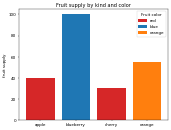

In [3]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==============
Bar color demo
==============

This is an example showing how to control bar color and legend entries
using the *color* and *label* parameters of `~matplotlib.pyplot.bar`.
Note that labels with a preceding underscore won't show up in the legend.
"""

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()


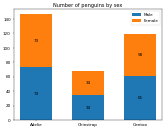

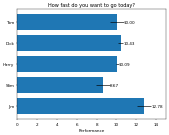

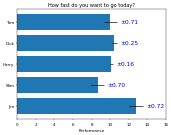

[Text(0, 0, '80.5 km/h'), Text(0, 0, '96.6 km/h'), Text(0, 0, '120.8 km/h')]

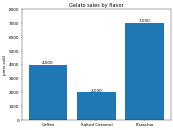

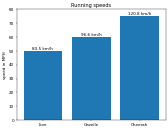

In [4]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==============
Bar Label Demo
==============

This example shows how to use the `~.Axes.bar_label` helper function
to create bar chart labels.

See also the :doc:`grouped bar
</gallery/lines_bars_and_markers/barchart>`,
:doc:`stacked bar
</gallery/lines_bars_and_markers/bar_stacked>` and
:doc:`horizontal bar chart
</gallery/lines_bars_and_markers/barh>` examples.
"""

import matplotlib.pyplot as plt
import numpy as np

# %%
# data from https://allisonhorst.github.io/palmerpenguins/

species = ('Adelie', 'Chinstrap', 'Gentoo')
sex_counts = {
    'Male': np.array([73, 34, 61]),
    'Female': np.array([73, 34, 58]),
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(3)

for sex, sex_count in sex_counts.items():
    p = ax.bar(species, sex_count, width, label=sex, bottom=bottom)
    bottom += sex_count

    ax.bar_label(p, label_type='center')

ax.set_title('Number of penguins by sex')
ax.legend()

plt.show()

# %%
# Horizontal bar chart

# Fixing random state for reproducibility
np.random.seed(19680801)

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

fig, ax = plt.subplots()

hbars = ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

# Label with specially formatted floats
ax.bar_label(hbars, fmt='%.2f')
ax.set_xlim(right=15)  # adjust xlim to fit labels

plt.show()

# %%
# Some of the more advanced things that one can do with bar labels

fig, ax = plt.subplots()

hbars = ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

# Label with given captions, custom padding and annotate options
ax.bar_label(hbars, labels=[f'±{e:.2f}' for e in error],
             padding=8, color='b', fontsize=14)
ax.set_xlim(right=16)

plt.show()

# %%
# Bar labels using {}-style format string

fruit_names = ['Coffee', 'Salted Caramel', 'Pistachio']
fruit_counts = [4000, 2000, 7000]

fig, ax = plt.subplots()
bar_container = ax.bar(fruit_names, fruit_counts)
ax.set(ylabel='pints sold', title='Gelato sales by flavor', ylim=(0, 8000))
ax.bar_label(bar_container, fmt='{:,.0f}')

# %%
# Bar labels using a callable

animal_names = ['Lion', 'Gazelle', 'Cheetah']
mph_speed = [50, 60, 75]

fig, ax = plt.subplots()
bar_container = ax.bar(animal_names, mph_speed)
ax.set(ylabel='speed in MPH', title='Running speeds', ylim=(0, 80))
ax.bar_label(bar_container, fmt=lambda x: f'{x * 1.61:.1f} km/h')

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.bar` / `matplotlib.pyplot.bar`
#    - `matplotlib.axes.Axes.barh` / `matplotlib.pyplot.barh`
#    - `matplotlib.axes.Axes.bar_label` / `matplotlib.pyplot.bar_label`


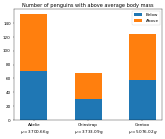

In [5]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=================
Stacked bar chart
=================

This is an example of creating a stacked bar plot
using `~matplotlib.pyplot.bar`.
"""

import matplotlib.pyplot as plt
import numpy as np

# data from https://allisonhorst.github.io/palmerpenguins/

species = (
    "Adelie\n $\\mu=$3700.66g",
    "Chinstrap\n $\\mu=$3733.09g",
    "Gentoo\n $\\mu=5076.02g$",
)
weight_counts = {
    "Below": np.array([70, 31, 58]),
    "Above": np.array([82, 37, 66]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(3)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Number of penguins with above average body mass")
ax.legend(loc="upper right")

plt.show()


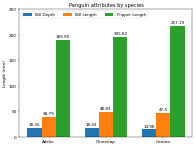

In [6]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=============================
Grouped bar chart with labels
=============================

This example shows a how to create a grouped bar chart and how to annotate
bars with labels.
"""

# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.bar` / `matplotlib.pyplot.bar`
#    - `matplotlib.axes.Axes.bar_label` / `matplotlib.pyplot.bar_label`


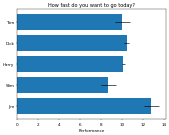

In [7]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
====================
Horizontal bar chart
====================

This example showcases a simple horizontal bar chart.
"""
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()


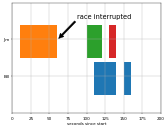

In [8]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===========
Broken Barh
===========

Make a "broken" horizontal bar plot, i.e., one with gaps
"""
import matplotlib.pyplot as plt

# Horizontal bar plot with gaps
fig, ax = plt.subplots()
ax.broken_barh([(110, 30), (150, 10)], (10, 9), facecolors='tab:blue')
ax.broken_barh([(10, 50), (100, 20), (130, 10)], (20, 9),
               facecolors=('tab:orange', 'tab:green', 'tab:red'))
ax.set_ylim(5, 35)
ax.set_xlim(0, 200)
ax.set_xlabel('seconds since start')
ax.set_yticks([15, 25], labels=['Bill', 'Jim'])     # Modify y-axis tick labels
ax.grid(True)                                       # Make grid lines visible
ax.annotate('race interrupted', (61, 25),
            xytext=(0.8, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=16,
            horizontalalignment='right', verticalalignment='top')

plt.show()


/var/folders/c3/3bzrl3qx043bknt1ycn3fcym0000gn/T/ipykernel_16841/1288172910.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  CapStyle.demo()


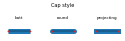

In [9]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=========
CapStyle
=========

The `matplotlib._enums.CapStyle` controls how Matplotlib draws the corners
where two different line segments meet. For more details, see the
`~matplotlib._enums.CapStyle` docs.
"""

import matplotlib.pyplot as plt

from matplotlib._enums import CapStyle

CapStyle.demo()
plt.show()


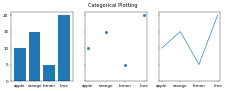

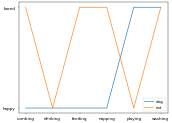

In [10]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==============================
Plotting categorical variables
==============================

You can pass categorical values (i.e. strings) directly as x- or y-values to
many plotting functions:
"""
import matplotlib.pyplot as plt

data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')


# %%
# This works on both axes:

cat = ["bored", "happy", "bored", "bored", "happy", "bored"]
dog = ["happy", "happy", "happy", "happy", "bored", "bored"]
activity = ["combing", "drinking", "feeding", "napping", "playing", "washing"]

fig, ax = plt.subplots()
ax.plot(activity, dog, label="dog")
ax.plot(activity, cat, label="cat")
ax.legend()

plt.show()


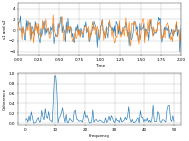

In [11]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=====================================
Plotting the coherence of two signals
=====================================

An example showing how to plot the coherence of two signals.
"""
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2

# Two signals with a coherent part at 10 Hz and a random part
s1 = np.sin(2 * np.pi * 10 * t) + nse1
s2 = np.sin(2 * np.pi * 10 * t) + nse2

fig, axs = plt.subplots(2, 1)
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('Coherence')

fig.tight_layout()
plt.show()


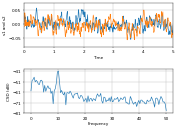

In [12]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
========
CSD Demo
========

Compute the cross spectral density of two signals
"""
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.5)

dt = 0.01
t = np.arange(0, 30, dt)

# Fixing random state for reproducibility
np.random.seed(19680801)


nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2
r = np.exp(-t / 0.05)

cnse1 = np.convolve(nse1, r, mode='same') * dt   # colored noise 1
cnse2 = np.convolve(nse2, r, mode='same') * dt   # colored noise 2

# two signals with a coherent part and a random part
s1 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse1
s2 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse2

ax1.plot(t, s1, t, s2)
ax1.set_xlim(0, 5)
ax1.set_xlabel('Time')
ax1.set_ylabel('s1 and s2')
ax1.grid(True)

cxy, f = ax2.csd(s1, s2, 256, 1. / dt)
ax2.set_ylabel('CSD (dB)')
plt.show()


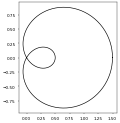

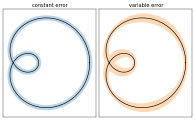

In [13]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=====================
Curve with error band
=====================

This example illustrates how to draw an error band around a parametrized curve.

A parametrized curve x(t), y(t) can directly be drawn using `~.Axes.plot`.
"""
# sphinx_gallery_thumbnail_number = 2

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import PathPatch
from matplotlib.path import Path

N = 400
t = np.linspace(0, 2 * np.pi, N)
r = 0.5 + np.cos(t)
x, y = r * np.cos(t), r * np.sin(t)

fig, ax = plt.subplots()
ax.plot(x, y, "k")
ax.set(aspect=1)

# %%
# An error band can be used to indicate the uncertainty of the curve.
# In this example we assume that the error can be given as a scalar *err*
# that describes the uncertainty perpendicular to the curve in every point.
#
# We visualize this error as a colored band around the path using a
# `.PathPatch`. The patch is created from two path segments *(xp, yp)*, and
# *(xn, yn)* that are shifted by +/- *err* perpendicular to the curve *(x, y)*.
#
# Note: This method of using a `.PathPatch` is suited to arbitrary curves in
# 2D. If you just have a standard y-vs.-x plot, you can use the simpler
# `~.Axes.fill_between` method (see also
# :doc:`/gallery/lines_bars_and_markers/fill_between_demo`).


def draw_error_band(ax, x, y, err, **kwargs):
    # Calculate normals via centered finite differences (except the first point
    # which uses a forward difference and the last point which uses a backward
    # difference).
    dx = np.concatenate([[x[1] - x[0]], x[2:] - x[:-2], [x[-1] - x[-2]]])
    dy = np.concatenate([[y[1] - y[0]], y[2:] - y[:-2], [y[-1] - y[-2]]])
    l = np.hypot(dx, dy)
    nx = dy / l
    ny = -dx / l

    # end points of errors
    xp = x + nx * err
    yp = y + ny * err
    xn = x - nx * err
    yn = y - ny * err

    vertices = np.block([[xp, xn[::-1]],
                         [yp, yn[::-1]]]).T
    codes = np.full(len(vertices), Path.LINETO)
    codes[0] = codes[len(xp)] = Path.MOVETO
    path = Path(vertices, codes)
    ax.add_patch(PathPatch(path, **kwargs))


_, axs = plt.subplots(1, 2, layout='constrained', sharex=True, sharey=True)
errs = [
    (axs[0], "constant error", 0.05),
    (axs[1], "variable error", 0.05 * np.sin(2 * t) ** 2 + 0.04),
]
for i, (ax, title, err) in enumerate(errs):
    ax.set(title=title, aspect=1, xticks=[], yticks=[])
    ax.plot(x, y, "k")
    draw_error_band(ax, x, y, err=err,
                    facecolor=f"C{i}", edgecolor="none", alpha=.3)

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.patches.PathPatch`
#    - `matplotlib.path.Path`


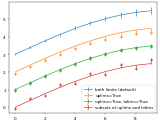

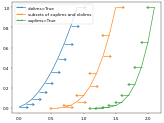

In [14]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
========================
Errorbar limit selection
========================

Illustration of selectively drawing lower and/or upper limit symbols on
errorbars using the parameters ``uplims``, ``lolims`` of `~.pyplot.errorbar`.

Alternatively, you can use 2xN values to draw errorbars in only one direction.
"""

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)

plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')

plt.errorbar(x, y + 2, yerr=yerr, uplims=True, label='uplims=True')

plt.errorbar(x, y + 1, yerr=yerr, uplims=True, lolims=True,
             label='uplims=True, lolims=True')

upperlimits = [True, False] * 5
lowerlimits = [False, True] * 5
plt.errorbar(x, y, yerr=yerr, uplims=upperlimits, lolims=lowerlimits,
             label='subsets of uplims and lolims')

plt.legend(loc='lower right')


# %%
# Similarly ``xuplims`` and ``xlolims`` can be used on the horizontal ``xerr``
# errorbars.

fig = plt.figure()
x = np.arange(10) / 10
y = (x + 0.1)**2

plt.errorbar(x, y, xerr=0.1, xlolims=True, label='xlolims=True')
y = (x + 0.1)**3

plt.errorbar(x + 0.6, y, xerr=0.1, xuplims=upperlimits, xlolims=lowerlimits,
             label='subsets of xuplims and xlolims')

y = (x + 0.1)**4
plt.errorbar(x + 1.2, y, xerr=0.1, xuplims=True, label='xuplims=True')

plt.legend()
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.errorbar` / `matplotlib.pyplot.errorbar`


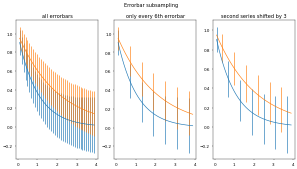

In [15]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
====================
Errorbar subsampling
====================

The parameter *errorevery* of `.Axes.errorbar` can be used to draw error bars
only on a subset of data points. This is particularly useful if there are many
data points with similar errors.
"""

import matplotlib.pyplot as plt
import numpy as np

# example data
x = np.arange(0.1, 4, 0.1)
y1 = np.exp(-1.0 * x)
y2 = np.exp(-0.5 * x)

# example variable error bar values
y1err = 0.1 + 0.1 * np.sqrt(x)
y2err = 0.1 + 0.1 * np.sqrt(x/2)


fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(12, 6))

ax0.set_title('all errorbars')
ax0.errorbar(x, y1, yerr=y1err)
ax0.errorbar(x, y2, yerr=y2err)

ax1.set_title('only every 6th errorbar')
ax1.errorbar(x, y1, yerr=y1err, errorevery=6)
ax1.errorbar(x, y2, yerr=y2err, errorevery=6)

ax2.set_title('second series shifted by 3')
ax2.errorbar(x, y1, yerr=y1err, errorevery=(0, 6))
ax2.errorbar(x, y2, yerr=y2err, errorevery=(3, 6))

fig.suptitle('Errorbar subsampling')
plt.show()


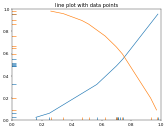

In [16]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
r"""
====================
EventCollection Demo
====================

Plot two curves, then use `.EventCollection`\s to mark the locations of the x
and y data points on the respective axes for each curve.
"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.collections import EventCollection

# Fixing random state for reproducibility
np.random.seed(19680801)

# create random data
xdata = np.random.random([2, 10])

# split the data into two parts
xdata1 = xdata[0, :]
xdata2 = xdata[1, :]

# sort the data so it makes clean curves
xdata1.sort()
xdata2.sort()

# create some y data points
ydata1 = xdata1 ** 2
ydata2 = 1 - xdata2 ** 3

# plot the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(xdata1, ydata1, color='tab:blue')
ax.plot(xdata2, ydata2, color='tab:orange')

# create the events marking the x data points
xevents1 = EventCollection(xdata1, color='tab:blue', linelength=0.05)
xevents2 = EventCollection(xdata2, color='tab:orange', linelength=0.05)

# create the events marking the y data points
yevents1 = EventCollection(ydata1, color='tab:blue', linelength=0.05,
                           orientation='vertical')
yevents2 = EventCollection(ydata2, color='tab:orange', linelength=0.05,
                           orientation='vertical')

# add the events to the axis
ax.add_collection(xevents1)
ax.add_collection(xevents2)
ax.add_collection(yevents1)
ax.add_collection(yevents2)

# set the limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

ax.set_title('line plot with data points')

# display the plot
plt.show()


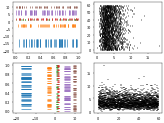

In [17]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==============
Eventplot demo
==============

An `~.axes.Axes.eventplot` showing sequences of events with various line
properties. The plot is shown in both horizontal and vertical orientations.
"""

import matplotlib.pyplot as plt
import numpy as np

import matplotlib

matplotlib.rcParams['font.size'] = 8.0

# Fixing random state for reproducibility
np.random.seed(19680801)


# create random data
data1 = np.random.random([6, 50])

# set different colors for each set of positions
colors1 = [f'C{i}' for i in range(6)]

# set different line properties for each set of positions
# note that some overlap
lineoffsets1 = [-15, -3, 1, 1.5, 6, 10]
linelengths1 = [5, 2, 1, 1, 3, 1.5]

fig, axs = plt.subplots(2, 2)

# create a horizontal plot
axs[0, 0].eventplot(data1, colors=colors1, lineoffsets=lineoffsets1,
                    linelengths=linelengths1)

# create a vertical plot
axs[1, 0].eventplot(data1, colors=colors1, lineoffsets=lineoffsets1,
                    linelengths=linelengths1, orientation='vertical')

# create another set of random data.
# the gamma distribution is only used for aesthetic purposes
data2 = np.random.gamma(4, size=[60, 50])

# use individual values for the parameters this time
# these values will be used for all data sets (except lineoffsets2, which
# sets the increment between each data set in this usage)
colors2 = 'black'
lineoffsets2 = 1
linelengths2 = 1

# create a horizontal plot
axs[0, 1].eventplot(data2, colors=colors2, lineoffsets=lineoffsets2,
                    linelengths=linelengths2)


# create a vertical plot
axs[1, 1].eventplot(data2, colors=colors2, lineoffsets=lineoffsets2,
                    linelengths=linelengths2, orientation='vertical')

plt.show()


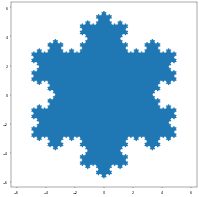

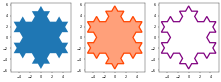

In [18]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==============
Filled polygon
==============

`~.Axes.fill()` draws a filled polygon based on lists of point
coordinates *x*, *y*.

This example uses the `Koch snowflake`_ as an example polygon.

.. _Koch snowflake: https://en.wikipedia.org/wiki/Koch_snowflake

"""

import matplotlib.pyplot as plt
import numpy as np


def koch_snowflake(order, scale=10):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.

    Parameters
    ----------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y


# %%
# Basic usage:

x, y = koch_snowflake(order=5)

plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(x, y)
plt.show()

# %%
# Use keyword arguments *facecolor* and *edgecolor* to modify the colors
# of the polygon. Since the *linewidth* of the edge is 0 in the default
# Matplotlib style, we have to set it as well for the edge to become visible.

x, y = koch_snowflake(order=2)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3),
                                    subplot_kw={'aspect': 'equal'})
ax1.fill(x, y)
ax2.fill(x, y, facecolor='lightsalmon', edgecolor='orangered', linewidth=3)
ax3.fill(x, y, facecolor='none', edgecolor='purple', linewidth=3)

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.fill` / `matplotlib.pyplot.fill`
#    - `matplotlib.axes.Axes.axis` / `matplotlib.pyplot.axis`


In [19]:
# THIS cbook EXAMPLE WAS REMOVED

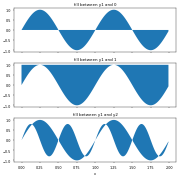

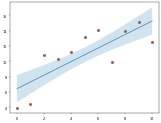

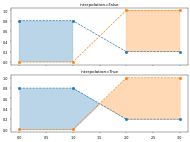

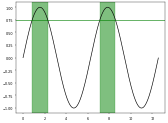

In [20]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==============================
Filling the area between lines
==============================

This example shows how to use `~.axes.Axes.fill_between` to color the area
between two lines.
"""

import matplotlib.pyplot as plt
import numpy as np

# %%
#
# Basic usage
# -----------
# The parameters *y1* and *y2* can be scalars, indicating a horizontal
# boundary at the given y-values. If only *y1* is given, *y2* defaults to 0.

x = np.arange(0.0, 2, 0.01)
y1 = np.sin(2 * np.pi * x)
y2 = 0.8 * np.sin(4 * np.pi * x)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(6, 6))

ax1.fill_between(x, y1)
ax1.set_title('fill between y1 and 0')

ax2.fill_between(x, y1, 1)
ax2.set_title('fill between y1 and 1')

ax3.fill_between(x, y1, y2)
ax3.set_title('fill between y1 and y2')
ax3.set_xlabel('x')
fig.tight_layout()

# %%
#
# Example: Confidence bands
# -------------------------
# A common application for `~.axes.Axes.fill_between` is the indication of
# confidence bands.
#
# `~.axes.Axes.fill_between` uses the colors of the color cycle as the fill
# color. These may be a bit strong when applied to fill areas. It is
# therefore often a good practice to lighten the color by making the area
# semi-transparent using *alpha*.

# sphinx_gallery_thumbnail_number = 2

N = 21
x = np.linspace(0, 10, 11)
y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]

# fit a linear curve and estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +
                          (x - x.mean())**2 / np.sum((x - x.mean())**2))

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.plot(x, y, 'o', color='tab:brown')

# %%
#
# Selectively filling horizontal regions
# --------------------------------------
# The parameter *where* allows to specify the x-ranges to fill. It's a boolean
# array with the same size as *x*.
#
# Only x-ranges of contiguous *True* sequences are filled. As a result the
# range between neighboring *True* and *False* values is never filled. This
# often undesired when the data points should represent a contiguous quantity.
# It is therefore recommended to set ``interpolate=True`` unless the
# x-distance of the data points is fine enough so that the above effect is not
# noticeable. Interpolation approximates the actual x position at which the
# *where* condition will change and extends the filling up to there.

x = np.array([0, 1, 2, 3])
y1 = np.array([0.8, 0.8, 0.2, 0.2])
y2 = np.array([0, 0, 1, 1])

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.set_title('interpolation=False')
ax1.plot(x, y1, 'o--')
ax1.plot(x, y2, 'o--')
ax1.fill_between(x, y1, y2, where=(y1 > y2), color='C0', alpha=0.3)
ax1.fill_between(x, y1, y2, where=(y1 < y2), color='C1', alpha=0.3)

ax2.set_title('interpolation=True')
ax2.plot(x, y1, 'o--')
ax2.plot(x, y2, 'o--')
ax2.fill_between(x, y1, y2, where=(y1 > y2), color='C0', alpha=0.3,
                 interpolate=True)
ax2.fill_between(x, y1, y2, where=(y1 <= y2), color='C1', alpha=0.3,
                 interpolate=True)
fig.tight_layout()

# %%
#
# .. note::
#
#    Similar gaps will occur if *y1* or *y2* are masked arrays. Since missing
#    values cannot be approximated, *interpolate* has no effect in this case.
#    The gaps around masked values can only be reduced by adding more data
#    points close to the masked values.

# %%
#
# Selectively marking horizontal regions across the whole Axes
# ------------------------------------------------------------
# The same selection mechanism can be applied to fill the full vertical height
# of the axes. To be independent of y-limits, we add a transform that
# interprets the x-values in data coordinates and the y-values in axes
# coordinates.
#
# The following example marks the regions in which the y-data are above a
# given threshold.

fig, ax = plt.subplots()
x = np.arange(0, 4 * np.pi, 0.01)
y = np.sin(x)
ax.plot(x, y, color='black')

threshold = 0.75
ax.axhline(threshold, color='green', lw=2, alpha=0.7)
ax.fill_between(x, 0, 1, where=y > threshold,
                color='green', alpha=0.5, transform=ax.get_xaxis_transform())

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.fill_between` / `matplotlib.pyplot.fill_between`
#    - `matplotlib.axes.Axes.get_xaxis_transform`


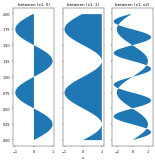

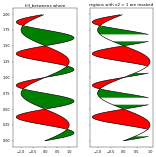

In [21]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==================
Fill Betweenx Demo
==================

Using `~.Axes.fill_betweenx` to color along the horizontal direction between
two curves.
"""
import matplotlib.pyplot as plt
import numpy as np

y = np.arange(0.0, 2, 0.01)
x1 = np.sin(2 * np.pi * y)
x2 = 1.2 * np.sin(4 * np.pi * y)

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, sharey=True, figsize=(6, 6))

ax1.fill_betweenx(y, 0, x1)
ax1.set_title('between (x1, 0)')

ax2.fill_betweenx(y, x1, 1)
ax2.set_title('between (x1, 1)')
ax2.set_xlabel('x')

ax3.fill_betweenx(y, x1, x2)
ax3.set_title('between (x1, x2)')

# %%
# Now fill between x1 and x2 where a logical condition is met. Note this is
# different than calling::
#
#   fill_between(y[where], x1[where], x2[where])
#
# because of edge effects over multiple contiguous regions.

fig, [ax, ax1] = plt.subplots(1, 2, sharey=True, figsize=(6, 6))
ax.plot(x1, y, x2, y, color='black')
ax.fill_betweenx(y, x1, x2, where=x2 >= x1, facecolor='green')
ax.fill_betweenx(y, x1, x2, where=x2 <= x1, facecolor='red')
ax.set_title('fill_betweenx where')

# Test support for masked arrays.
x2 = np.ma.masked_greater(x2, 1.0)
ax1.plot(x1, y, x2, y, color='black')
ax1.fill_betweenx(y, x1, x2, where=x2 >= x1, facecolor='green')
ax1.fill_betweenx(y, x1, x2, where=x2 <= x1, facecolor='red')
ax1.set_title('regions with x2 > 1 are masked')

# %%
# This example illustrates a problem; because of the data gridding, there are
# undesired unfilled triangles at the crossover points. A brute-force solution
# would be to interpolate all arrays to a very fine grid before plotting.

plt.show()


{}
{'facecolor': '#1f77b4', 'hatch': '/'}
{'facecolor': '#1f77b4', 'hatch': '/'}
v
{'facecolor': '#ff7f0e', 'hatch': '*'}
{'facecolor': '#ff7f0e', 'hatch': '*'}
v
{'facecolor': '#2ca02c', 'hatch': '+'}
{'facecolor': '#2ca02c', 'hatch': '+'}
v
{'facecolor': '#d62728', 'hatch': '|'}
{'facecolor': '#d62728', 'hatch': '|'}
v
{'edgecolor': 'w', 'orientation': 'h'}
{'facecolor': '#1f77b4'}
{'facecolor': '#1f77b4', 'edgecolor': 'w', 'orientation': 'h'}
h
{'facecolor': '#ff7f0e'}
{'facecolor': '#ff7f0e', 'edgecolor': 'w', 'orientation': 'h'}
h
{'facecolor': '#2ca02c'}
{'facecolor': '#2ca02c', 'edgecolor': 'w', 'orientation': 'h'}
h
{'facecolor': '#d62728'}
{'facecolor': '#d62728', 'edgecolor': 'w', 'orientation': 'h'}
h
{}
{'facecolor': '#1f77b4', 'hatch': '/'}
{'facecolor': '#1f77b4', 'hatch': '/'}
v
{'facecolor': '#ff7f0e', 'hatch': '*'}
{'facecolor': '#ff7f0e', 'hatch': '*'}
v
{'facecolor': '#2ca02c', 'hatch': '+'}
{'facecolor': '#2ca02c', 'hatch': '+'}
v
{'facecolor': '#d62728', 'hatch': '

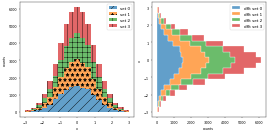

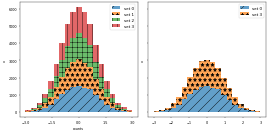

In [22]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=========================
Hatch-filled histograms
=========================

Hatching capabilities for plotting histograms.
"""

from functools import partial
import itertools

from cycler import cycler

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.ticker as mticker


def filled_hist(ax, edges, values, bottoms=None, orientation='v',
                **kwargs):
    """
    Draw a histogram as a stepped patch.

    Parameters
    ----------
    ax : Axes
        The axes to plot to

    edges : array
        A length n+1 array giving the left edges of each bin and the
        right edge of the last bin.

    values : array
        A length n array of bin counts or values

    bottoms : float or array, optional
        A length n array of the bottom of the bars.  If None, zero is used.

    orientation : {'v', 'h'}
       Orientation of the histogram.  'v' (default) has
       the bars increasing in the positive y-direction.

    **kwargs
        Extra keyword arguments are passed through to `.fill_between`.

    Returns
    -------
    ret : PolyCollection
        Artist added to the Axes
    """
    print(orientation)
    if orientation not in 'hv':
        raise ValueError(f"orientation must be in {{'h', 'v'}} "
                         f"not {orientation}")

    kwargs.setdefault('step', 'post')
    kwargs.setdefault('alpha', 0.7)
    edges = np.asarray(edges)
    values = np.asarray(values)
    if len(edges) - 1 != len(values):
        raise ValueError(f'Must provide one more bin edge than value not: '
                         f'{len(edges)=} {len(values)=}')

    if bottoms is None:
        bottoms = 0
    bottoms = np.broadcast_to(bottoms, values.shape)

    values = np.append(values, values[-1])
    bottoms = np.append(bottoms, bottoms[-1])
    if orientation == 'h':
        return ax.fill_betweenx(edges, values, bottoms,
                                **kwargs)
    elif orientation == 'v':
        return ax.fill_between(edges, values, bottoms,
                               **kwargs)
    else:
        raise AssertionError("you should never be here")


def stack_hist(ax, stacked_data, sty_cycle, bottoms=None,
               hist_func=None, labels=None,
               plot_func=None, plot_kwargs=None):
    """
    Parameters
    ----------
    ax : axes.Axes
        The axes to add artists too

    stacked_data : array or Mapping
        A (M, N) shaped array.  The first dimension will be iterated over to
        compute histograms row-wise

    sty_cycle : Cycler or operable of dict
        Style to apply to each set

    bottoms : array, default: 0
        The initial positions of the bottoms.

    hist_func : callable, optional
        Must have signature `bin_vals, bin_edges = f(data)`.
        `bin_edges` expected to be one longer than `bin_vals`

    labels : list of str, optional
        The label for each set.

        If not given and stacked data is an array defaults to 'default set {n}'

        If *stacked_data* is a mapping, and *labels* is None, default to the
        keys.

        If *stacked_data* is a mapping and *labels* is given then only the
        columns listed will be plotted.

    plot_func : callable, optional
        Function to call to draw the histogram must have signature:

          ret = plot_func(ax, edges, top, bottoms=bottoms,
                          label=label, **kwargs)

    plot_kwargs : dict, optional
        Any extra keyword arguments to pass through to the plotting function.
        This will be the same for all calls to the plotting function and will
        override the values in *sty_cycle*.

    Returns
    -------
    arts : dict
        Dictionary of artists keyed on their labels
    """
    # deal with default binning function
    if hist_func is None:
        hist_func = np.histogram

    # deal with default plotting function
    if plot_func is None:
        plot_func = filled_hist

    # deal with default
    if plot_kwargs is None:
        plot_kwargs = {}
    print(plot_kwargs)
    try:
        l_keys = stacked_data.keys()
        label_data = True
        if labels is None:
            labels = l_keys

    except AttributeError:
        label_data = False
        if labels is None:
            labels = itertools.repeat(None)

    if label_data:
        loop_iter = enumerate((stacked_data[lab], lab, s)
                              for lab, s in zip(labels, sty_cycle))
    else:
        loop_iter = enumerate(zip(stacked_data, labels, sty_cycle))

    arts = {}
    for j, (data, label, sty) in loop_iter:
        if label is None:
            label = f'dflt set {j}'
        label = sty.pop('label', label)
        vals, edges = hist_func(data)
        if bottoms is None:
            bottoms = np.zeros_like(vals)
        top = bottoms + vals
        print(sty)
        sty.update(plot_kwargs)
        print(sty)
        ret = plot_func(ax, edges, top, bottoms=bottoms,
                        label=label, **sty)
        bottoms = top
        arts[label] = ret
    ax.legend(fontsize=10)
    return arts


# set up histogram function to fixed bins
edges = np.linspace(-3, 3, 20, endpoint=True)
hist_func = partial(np.histogram, bins=edges)

# set up style cycles
color_cycle = cycler(facecolor=plt.rcParams['axes.prop_cycle'][:4])
label_cycle = cycler(label=[f'set {n}' for n in range(4)])
hatch_cycle = cycler(hatch=['/', '*', '+', '|'])

# Fixing random state for reproducibility
np.random.seed(19680801)

stack_data = np.random.randn(4, 12250)
dict_data = dict(zip((c['label'] for c in label_cycle), stack_data))

# %%
# Work with plain arrays

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4.5), tight_layout=True)
arts = stack_hist(ax1, stack_data, color_cycle + label_cycle + hatch_cycle,
                  hist_func=hist_func)

arts = stack_hist(ax2, stack_data, color_cycle,
                  hist_func=hist_func,
                  plot_kwargs=dict(edgecolor='w', orientation='h'))
ax1.set_ylabel('counts')
ax1.set_xlabel('x')
ax2.set_xlabel('counts')
ax2.set_ylabel('x')

# %%
# Work with labeled data

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4.5),
                               tight_layout=True, sharey=True)

arts = stack_hist(ax1, dict_data, color_cycle + hatch_cycle,
                  hist_func=hist_func)

arts = stack_hist(ax2, dict_data, color_cycle + hatch_cycle,
                  hist_func=hist_func, labels=['set 0', 'set 3'])
ax1.xaxis.set_major_locator(mticker.MaxNLocator(5))
ax1.set_xlabel('counts')
ax1.set_ylabel('x')
ax2.set_ylabel('x')

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.fill_betweenx` / `matplotlib.pyplot.fill_betweenx`
#    - `matplotlib.axes.Axes.fill_between` / `matplotlib.pyplot.fill_between`
#    - `matplotlib.axis.Axis.set_major_locator`


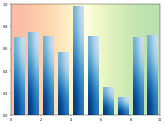

In [23]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
========================
Bar chart with gradients
========================

Matplotlib does not natively support gradients. However, we can emulate a
gradient-filled rectangle by an `.AxesImage` of the right size and coloring.

In particular, we use a colormap to generate the actual colors. It is then
sufficient to define the underlying values on the corners of the image and
let bicubic interpolation fill out the area. We define the gradient direction
by a unit vector *v*. The values at the corners are then obtained by the
lengths of the projections of the corner vectors on *v*.

A similar approach can be used to create a gradient background for an Axes.
In that case, it is helpful to use Axes coordinates (``extent=(0, 1, 0, 1),
transform=ax.transAxes``) to be independent of the data coordinates.
"""

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)


def gradient_image(ax, direction=0.3, cmap_range=(0, 1), **kwargs):
    """
    Draw a gradient image based on a colormap.

    Parameters
    ----------
    ax : Axes
        The axes to draw on.
    direction : float
        The direction of the gradient. This is a number in
        range 0 (=vertical) to 1 (=horizontal).
    cmap_range : float, float
        The fraction (cmin, cmax) of the colormap that should be
        used for the gradient, where the complete colormap is (0, 1).
    **kwargs
        Other parameters are passed on to `.Axes.imshow()`.
        In particular, *cmap*, *extent*, and *transform* may be useful.
    """
    phi = direction * np.pi / 2
    v = np.array([np.cos(phi), np.sin(phi)])
    X = np.array([[v @ [1, 0], v @ [1, 1]],
                  [v @ [0, 0], v @ [0, 1]]])
    a, b = cmap_range
    X = a + (b - a) / X.max() * X
    im = ax.imshow(X, interpolation='bicubic', clim=(0, 1),
                   aspect='auto', **kwargs)
    return im


def gradient_bar(ax, x, y, width=0.5, bottom=0):
    for left, top in zip(x, y):
        right = left + width
        gradient_image(ax, extent=(left, right, bottom, top),
                       cmap=plt.cm.Blues_r, cmap_range=(0, 0.8))


fig, ax = plt.subplots()
ax.set(xlim=(0, 10), ylim=(0, 1))

# background image
gradient_image(ax, direction=1, extent=(0, 1, 0, 1), transform=ax.transAxes,
               cmap=plt.cm.RdYlGn, cmap_range=(0.2, 0.8), alpha=0.5)

N = 10
x = np.arange(N) + 0.15
y = np.random.rand(N)
gradient_bar(ax, x, y, width=0.7)
plt.show()


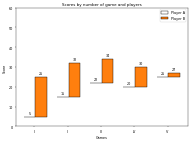

In [24]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=========
Hat graph
=========
This example shows how to create a `hat graph`_ and how to annotate it with
labels.

.. _hat graph: https://doi.org/10.1186/s41235-019-0182-3
"""
import matplotlib.pyplot as plt
import numpy as np


def hat_graph(ax, xlabels, values, group_labels):
    """
    Create a hat graph.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The Axes to plot into.
    xlabels : list of str
        The category names to be displayed on the x-axis.
    values : (M, N) array-like
        The data values.
        Rows are the groups (len(group_labels) == M).
        Columns are the categories (len(xlabels) == N).
    group_labels : list of str
        The group labels displayed in the legend.
    """

    def label_bars(heights, rects):
        """Attach a text label on top of each bar."""
        for height, rect in zip(heights, rects):
            ax.annotate(f'{height}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 4),  # 4 points vertical offset.
                        textcoords='offset points',
                        ha='center', va='bottom')

    values = np.asarray(values)
    x = np.arange(values.shape[1])
    ax.set_xticks(x, labels=xlabels)
    spacing = 0.3  # spacing between hat groups
    width = (1 - spacing) / values.shape[0]
    heights0 = values[0]
    for i, (heights, group_label) in enumerate(zip(values, group_labels)):
        style = {'fill': False} if i == 0 else {'edgecolor': 'black'}
        rects = ax.bar(x - spacing/2 + i * width, heights - heights0,
                       width, bottom=heights0, label=group_label, **style)
        label_bars(heights, rects)


# initialise labels and a numpy array make sure you have
# N labels of N number of values in the array
xlabels = ['I', 'II', 'III', 'IV', 'V']
playerA = np.array([5, 15, 22, 20, 25])
playerB = np.array([25, 32, 34, 30, 27])

fig, ax = plt.subplots()
hat_graph(ax, xlabels, [playerA, playerB], ['Player A', 'Player B'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Games')
ax.set_ylabel('Score')
ax.set_ylim(0, 60)
ax.set_title('Scores by number of game and players')
ax.legend()

fig.tight_layout()
plt.show()
# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.bar` / `matplotlib.pyplot.bar`
#    - `matplotlib.axes.Axes.annotate` / `matplotlib.pyplot.annotate`


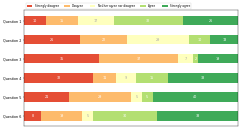

In [25]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=============================================
Discrete distribution as horizontal bar chart
=============================================

Stacked bar charts can be used to visualize discrete distributions.

This example visualizes the result of a survey in which people could rate
their agreement to questions on a five-element scale.

The horizontal stacking is achieved by calling `~.Axes.barh()` for each
category and passing the starting point as the cumulative sum of the
already drawn bars via the parameter ``left``.
"""

import matplotlib.pyplot as plt
import numpy as np

category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.barh` / `matplotlib.pyplot.barh`
#    - `matplotlib.axes.Axes.bar_label` / `matplotlib.pyplot.bar_label`
#    - `matplotlib.axes.Axes.legend` / `matplotlib.pyplot.legend`


/var/folders/c3/3bzrl3qx043bknt1ycn3fcym0000gn/T/ipykernel_16841/2155842793.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  JoinStyle.demo()


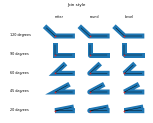

In [26]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=========
JoinStyle
=========

The `matplotlib._enums.JoinStyle` controls how Matplotlib draws the corners
where two different line segments meet. For more details, see the
`~matplotlib._enums.JoinStyle` docs.
"""

import matplotlib.pyplot as plt

from matplotlib._enums import JoinStyle

JoinStyle.demo()
plt.show()


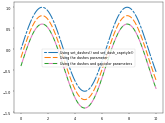

In [27]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==============================
Customizing dashed line styles
==============================

The dashing of a line is controlled via a dash sequence. It can be modified
using `.Line2D.set_dashes`.

The dash sequence is a series of on/off lengths in points, e.g.
``[3, 1]`` would be 3pt long lines separated by 1pt spaces.

Some functions like `.Axes.plot` support passing Line properties as keyword
arguments. In such a case, you can already set the dashing when creating the
line.

*Note*: The dash style can also be configured via a
:ref:`property_cycle <color_cycle>`
by passing a list of dash sequences using the keyword *dashes* to the
cycler. This is not shown within this example.

Other attributes of the dash may also be set either with the relevant method
(`~.Line2D.set_dash_capstyle`, `~.Line2D.set_dash_joinstyle`,
`~.Line2D.set_gapcolor`) or by passing the property through a plotting
function.
"""
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 500)
y = np.sin(x)

plt.rc('lines', linewidth=2.5)
fig, ax = plt.subplots()

# Using set_dashes() and set_capstyle() to modify dashing of an existing line.
line1, = ax.plot(x, y, label='Using set_dashes() and set_dash_capstyle()')
line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break.
line1.set_dash_capstyle('round')

# Using plot(..., dashes=...) to set the dashing when creating a line.
line2, = ax.plot(x, y - 0.2, dashes=[6, 2], label='Using the dashes parameter')

# Using plot(..., dashes=..., gapcolor=...) to set the dashing and
# alternating color when creating a line.
line3, = ax.plot(x, y - 0.4, dashes=[4, 4], gapcolor='tab:pink',
                 label='Using the dashes and gapcolor parameters')

ax.legend(handlelength=4)
plt.show()


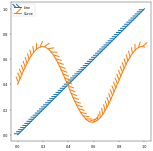

In [28]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==============================
Lines with a ticked patheffect
==============================

Ticks can be added along a line to mark one side as a barrier using
`~matplotlib.patheffects.TickedStroke`.  You can control the angle,
spacing, and length of the ticks.

The ticks will also appear appropriately in the legend.

"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import patheffects

# Plot a straight diagonal line with ticked style path
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot([0, 1], [0, 1], label="Line",
        path_effects=[patheffects.withTickedStroke(spacing=7, angle=135)])

# Plot a curved line with ticked style path
nx = 101
x = np.linspace(0.0, 1.0, nx)
y = 0.3*np.sin(x*8) + 0.4
ax.plot(x, y, label="Curve", path_effects=[patheffects.withTickedStroke()])

ax.legend()

plt.show()


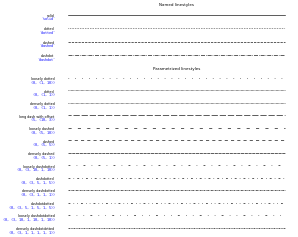

In [29]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==========
Linestyles
==========

Simple linestyles can be defined using the strings "solid", "dotted", "dashed"
or "dashdot". More refined control can be achieved by providing a dash tuple
``(offset, (on_off_seq))``. For example, ``(0, (3, 10, 1, 15))`` means
(3pt line, 10pt space, 1pt line, 15pt space) with no offset, while
``(5, (10, 3))``, means (10pt line, 3pt space), but skip the first 5pt line.
See also `.Line2D.set_linestyle`.

*Note*: The dash style can also be configured via `.Line2D.set_dashes`
as shown in :doc:`/gallery/lines_bars_and_markers/line_demo_dash_control`
and passing a list of dash sequences using the keyword *dashes* to the
cycler in :ref:`property_cycle <color_cycle>`.
"""
import matplotlib.pyplot as plt
import numpy as np

linestyle_str = [
     ('solid', 'solid'),      # Same as (0, ()) or '-'
     ('dotted', 'dotted'),    # Same as (0, (1, 1)) or ':'
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'

linestyle_tuple = [
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]


def plot_linestyles(ax, linestyles, title):
    X, Y = np.linspace(0, 100, 10), np.zeros(10)
    yticklabels = []

    for i, (name, linestyle) in enumerate(linestyles):
        ax.plot(X, Y+i, linestyle=linestyle, linewidth=1.5, color='black')
        yticklabels.append(name)

    ax.set_title(title)
    ax.set(ylim=(-0.5, len(linestyles)-0.5),
           yticks=np.arange(len(linestyles)),
           yticklabels=yticklabels)
    ax.tick_params(left=False, bottom=False, labelbottom=False)
    ax.spines[:].set_visible(False)

    # For each line style, add a text annotation with a small offset from
    # the reference point (0 in Axes coords, y tick value in Data coords).
    for i, (name, linestyle) in enumerate(linestyles):
        ax.annotate(repr(linestyle),
                    xy=(0.0, i), xycoords=ax.get_yaxis_transform(),
                    xytext=(-6, -12), textcoords='offset points',
                    color="blue", fontsize=8, ha="right", family="monospace")


fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10, 8), height_ratios=[1, 3])

plot_linestyles(ax0, linestyle_str[::-1], title='Named linestyles')
plot_linestyles(ax1, linestyle_tuple[::-1], title='Parametrized linestyles')

plt.tight_layout()
plt.show()


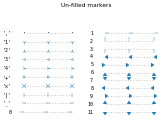

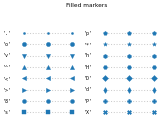

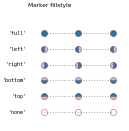

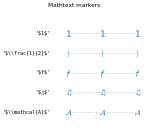

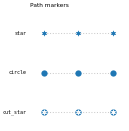

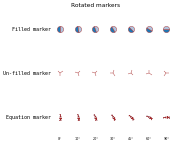

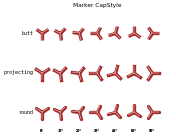

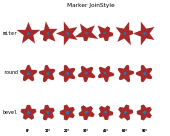

In [30]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
================
Marker reference
================

Matplotlib supports multiple categories of markers which are selected using
the ``marker`` parameter of plot commands:

- `Unfilled markers`_
- `Filled markers`_
- `Markers created from TeX symbols`_
- `Markers created from Paths`_

For a list of all markers see also the `matplotlib.markers` documentation.

For example usages see
:doc:`/gallery/lines_bars_and_markers/scatter_star_poly`.

.. redirect-from:: /gallery/shapes_and_collections/marker_path
"""

import matplotlib.pyplot as plt

from matplotlib.lines import Line2D
from matplotlib.markers import MarkerStyle
from matplotlib.transforms import Affine2D

text_style = dict(horizontalalignment='right', verticalalignment='center',
                  fontsize=12, fontfamily='monospace')
marker_style = dict(linestyle=':', color='0.8', markersize=10,
                    markerfacecolor="tab:blue", markeredgecolor="tab:blue")


def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()
    ax.invert_yaxis()


def split_list(a_list):
    i_half = len(a_list) // 2
    return a_list[:i_half], a_list[i_half:]


# %%
# Unfilled markers
# ================
# Unfilled markers are single-colored.

fig, axs = plt.subplots(ncols=2)
fig.suptitle('Un-filled markers', fontsize=14)

# Filter out filled markers and marker settings that do nothing.
unfilled_markers = [m for m, func in Line2D.markers.items()
                    if func != 'nothing' and m not in Line2D.filled_markers]

for ax, markers in zip(axs, split_list(unfilled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, repr(marker), **text_style)
        ax.plot([y] * 3, marker=marker, **marker_style)
    format_axes(ax)

# %%
# Filled markers
# ==============

fig, axs = plt.subplots(ncols=2)
fig.suptitle('Filled markers', fontsize=14)
for ax, markers in zip(axs, split_list(Line2D.filled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, repr(marker), **text_style)
        ax.plot([y] * 3, marker=marker, **marker_style)
    format_axes(ax)

# %%
# .. _marker_fill_styles:
#
# Marker fill styles
# ------------------
# The edge color and fill color of filled markers can be specified separately.
# Additionally, the ``fillstyle`` can be configured to be unfilled, fully
# filled, or half-filled in various directions. The half-filled styles use
# ``markerfacecoloralt`` as secondary fill color.

fig, ax = plt.subplots()
fig.suptitle('Marker fillstyle', fontsize=14)
fig.subplots_adjust(left=0.4)

filled_marker_style = dict(marker='o', linestyle=':', markersize=15,
                           color='darkgrey',
                           markerfacecolor='tab:blue',
                           markerfacecoloralt='lightsteelblue',
                           markeredgecolor='brown')

for y, fill_style in enumerate(Line2D.fillStyles):
    ax.text(-0.5, y, repr(fill_style), **text_style)
    ax.plot([y] * 3, fillstyle=fill_style, **filled_marker_style)
format_axes(ax)

# %%
# Markers created from TeX symbols
# ================================
#
# Use :ref:`MathText <mathtext>`, to use custom marker symbols,
# like e.g. ``"$\u266B$"``. For an overview over the STIX font symbols refer
# to the `STIX font table <http://www.stixfonts.org/allGlyphs.html>`_.
# Also see the :doc:`/gallery/text_labels_and_annotations/stix_fonts_demo`.


fig, ax = plt.subplots()
fig.suptitle('Mathtext markers', fontsize=14)
fig.subplots_adjust(left=0.4)

marker_style.update(markeredgecolor="none", markersize=15)
markers = ["$1$", r"$\frac{1}{2}$", "$f$", "$\u266B$", r"$\mathcal{A}$"]

for y, marker in enumerate(markers):
    # Escape dollars so that the text is written "as is", not as mathtext.
    ax.text(-0.5, y, repr(marker).replace("$", r"\$"), **text_style)
    ax.plot([y] * 3, marker=marker, **marker_style)
format_axes(ax)

# %%
# Markers created from Paths
# ==========================
#
# Any `~.path.Path` can be used as a marker. The following example shows two
# simple paths *star* and *circle*, and a more elaborate path of a circle with
# a cut-out star.

import numpy as np

import matplotlib.path as mpath

star = mpath.Path.unit_regular_star(6)
circle = mpath.Path.unit_circle()
# concatenate the circle with an internal cutout of the star
cut_star = mpath.Path(
    vertices=np.concatenate([circle.vertices, star.vertices[::-1, ...]]),
    codes=np.concatenate([circle.codes, star.codes]))

fig, ax = plt.subplots()
fig.suptitle('Path markers', fontsize=14)
fig.subplots_adjust(left=0.4)

markers = {'star': star, 'circle': circle, 'cut_star': cut_star}

for y, (name, marker) in enumerate(markers.items()):
    ax.text(-0.5, y, name, **text_style)
    ax.plot([y] * 3, marker=marker, **marker_style)
format_axes(ax)

# %%
# Advanced marker modifications with transform
# ============================================
#
# Markers can be modified by passing a transform to the MarkerStyle
# constructor. Following example shows how a supplied rotation is applied to
# several marker shapes.

common_style = {k: v for k, v in filled_marker_style.items() if k != 'marker'}
angles = [0, 10, 20, 30, 45, 60, 90]

fig, ax = plt.subplots()
fig.suptitle('Rotated markers', fontsize=14)

ax.text(-0.5, 0, 'Filled marker', **text_style)
for x, theta in enumerate(angles):
    t = Affine2D().rotate_deg(theta)
    ax.plot(x, 0, marker=MarkerStyle('o', 'left', t), **common_style)

ax.text(-0.5, 1, 'Un-filled marker', **text_style)
for x, theta in enumerate(angles):
    t = Affine2D().rotate_deg(theta)
    ax.plot(x, 1, marker=MarkerStyle('1', 'left', t), **common_style)

ax.text(-0.5, 2, 'Equation marker', **text_style)
for x, theta in enumerate(angles):
    t = Affine2D().rotate_deg(theta)
    eq = r'$\frac{1}{x}$'
    ax.plot(x, 2, marker=MarkerStyle(eq, 'left', t), **common_style)

for x, theta in enumerate(angles):
    ax.text(x, 2.5, f"{theta}°", horizontalalignment="center")
format_axes(ax)

fig.tight_layout()

# %%
# Setting marker cap style and join style
# =======================================
#
# Markers have default cap and join styles, but these can be
# customized when creating a MarkerStyle.

from matplotlib.markers import CapStyle, JoinStyle

marker_inner = dict(markersize=35,
                    markerfacecolor='tab:blue',
                    markerfacecoloralt='lightsteelblue',
                    markeredgecolor='brown',
                    markeredgewidth=8,
                    )

marker_outer = dict(markersize=35,
                    markerfacecolor='tab:blue',
                    markerfacecoloralt='lightsteelblue',
                    markeredgecolor='white',
                    markeredgewidth=1,
                    )

fig, ax = plt.subplots()
fig.suptitle('Marker CapStyle', fontsize=14)
fig.subplots_adjust(left=0.1)

for y, cap_style in enumerate(CapStyle):
    ax.text(-0.5, y, cap_style.name, **text_style)
    for x, theta in enumerate(angles):
        t = Affine2D().rotate_deg(theta)
        m = MarkerStyle('1', transform=t, capstyle=cap_style)
        ax.plot(x, y, marker=m, **marker_inner)
        ax.plot(x, y, marker=m, **marker_outer)
        ax.text(x, len(CapStyle) - .5, f'{theta}°', ha='center')
format_axes(ax)

# %%
# Modifying the join style:

fig, ax = plt.subplots()
fig.suptitle('Marker JoinStyle', fontsize=14)
fig.subplots_adjust(left=0.05)

for y, join_style in enumerate(JoinStyle):
    ax.text(-0.5, y, join_style.name, **text_style)
    for x, theta in enumerate(angles):
        t = Affine2D().rotate_deg(theta)
        m = MarkerStyle('*', transform=t, joinstyle=join_style)
        ax.plot(x, y, marker=m, **marker_inner)
        ax.text(x, len(JoinStyle) - .5, f'{theta}°', ha='center')
format_axes(ax)

plt.show()


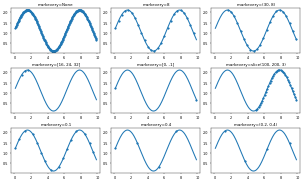

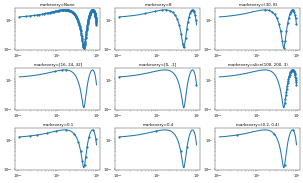

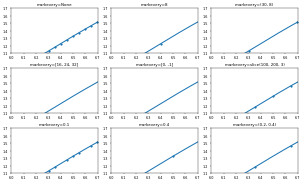

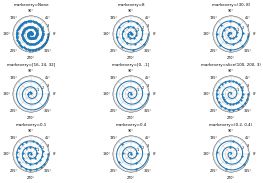

In [31]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==============
Markevery Demo
==============

The ``markevery`` property of `.Line2D` allows drawing markers at a subset of
data points.

The list of possible parameters is specified at `.Line2D.set_markevery`.
In short:

- A single integer N draws every N-th marker.
- A tuple of integers (start, N) draws every N-th marker, starting at data
  index *start*.
- A list of integers draws the markers at the specified indices.
- A slice draws the markers at the sliced indices.
- A float specifies the distance between markers as a fraction of the Axes
  diagonal in screen space. This will lead to a visually uniform distribution
  of the points along the line, irrespective of scales and zooming.
"""

import matplotlib.pyplot as plt
import numpy as np

# define a list of markevery cases to plot
cases = [
    None,
    8,
    (30, 8),
    [16, 24, 32],
    [0, -1],
    slice(100, 200, 3),
    0.1,
    0.4,
    (0.2, 0.4)
]

# data points
delta = 0.11
x = np.linspace(0, 10 - 2 * delta, 200) + delta
y = np.sin(x) + 1.0 + delta

# %%
# markevery with linear scales
# ----------------------------

fig, axs = plt.subplots(3, 3, figsize=(10, 6), layout='constrained')
for ax, markevery in zip(axs.flat, cases):
    ax.set_title(f'markevery={markevery}')
    ax.plot(x, y, 'o', ls='-', ms=4, markevery=markevery)

# %%
# markevery with log scales
# -------------------------
#
# Note that the log scale causes a visual asymmetry in the marker distance for
# when subsampling the data using an integer. In contrast, subsampling on
# fraction of figure size creates even distributions, because it's based on
# fractions of the Axes diagonal, not on data coordinates or data indices.

fig, axs = plt.subplots(3, 3, figsize=(10, 6), layout='constrained')
for ax, markevery in zip(axs.flat, cases):
    ax.set_title(f'markevery={markevery}')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(x, y, 'o', ls='-', ms=4, markevery=markevery)

# %%
# markevery on zoomed plots
# -------------------------
#
# Integer-based *markevery* specifications select points from the underlying
# data and are independent on the view. In contrast, float-based specifications
# are related to the Axes diagonal. While zooming does not change the Axes
# diagonal, it changes the displayed data range, and more points will be
# displayed when zooming.

fig, axs = plt.subplots(3, 3, figsize=(10, 6), layout='constrained')
for ax, markevery in zip(axs.flat, cases):
    ax.set_title(f'markevery={markevery}')
    ax.plot(x, y, 'o', ls='-', ms=4, markevery=markevery)
    ax.set_xlim((6, 6.7))
    ax.set_ylim((1.1, 1.7))

# %%
# markevery on polar plots
# ------------------------

r = np.linspace(0, 3.0, 200)
theta = 2 * np.pi * r

fig, axs = plt.subplots(3, 3, figsize=(10, 6), layout='constrained',
                        subplot_kw={'projection': 'polar'})
for ax, markevery in zip(axs.flat, cases):
    ax.set_title(f'markevery={markevery}')
    ax.plot(theta, r, 'o', ls='-', ms=4, markevery=markevery)

plt.show()


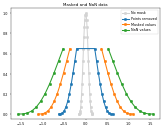

In [32]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==============================
Plotting masked and NaN values
==============================

Sometimes you need to plot data with missing values.

One possibility is to simply remove undesired data points. The line plotted
through the remaining data will be continuous, and not indicate where the
missing data is located.

If it is useful to have gaps in the line where the data is missing, then the
undesired points can be indicated using a `masked array`_ or by setting their
values to NaN. No marker will be drawn where either x or y are masked and, if
plotting with a line, it will be broken there.

.. _masked array:
   https://numpy.org/doc/stable/reference/maskedarray.generic.html

The following example illustrates the three cases:

1) Removing points.
2) Masking points.
3) Setting to NaN.
"""

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-np.pi/2, np.pi/2, 31)
y = np.cos(x)**3

# 1) remove points where y > 0.7
x2 = x[y <= 0.7]
y2 = y[y <= 0.7]

# 2) mask points where y > 0.7
y3 = np.ma.masked_where(y > 0.7, y)

# 3) set to NaN where y > 0.7
y4 = y.copy()
y4[y3 > 0.7] = np.nan

plt.plot(x*0.1, y, 'o-', color='lightgrey', label='No mask')
plt.plot(x2*0.4, y2, 'o-', label='Points removed')
plt.plot(x*0.7, y3, 'o-', label='Masked values')
plt.plot(x*1.0, y4, 'o-', label='NaN values')
plt.legend()
plt.title('Masked and NaN data')
plt.show()


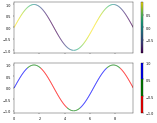

In [33]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==================
Multicolored lines
==================

This example shows how to make a multicolored line. In this example, the line
is colored based on its derivative.
"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.collections import LineCollection
from matplotlib.colors import BoundaryNorm, ListedColormap

x = np.linspace(0, 3 * np.pi, 500)
y = np.sin(x)
dydx = np.cos(0.5 * (x[:-1] + x[1:]))  # first derivative

# Create a set of line segments so that we can color them individually
# This creates the points as an N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[0].add_collection(lc)
fig.colorbar(line, ax=axs[0])

# Use a boundary norm instead
cmap = ListedColormap(['r', 'g', 'b'])
norm = BoundaryNorm([-1, -0.5, 0.5, 1], cmap.N)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[1].add_collection(lc)
fig.colorbar(line, ax=axs[1])

axs[0].set_xlim(x.min(), x.max())
axs[0].set_ylim(-1.1, 1.1)
plt.show()


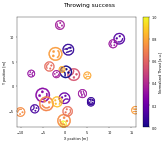

In [34]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==============================================
Mapping marker properties to multivariate data
==============================================

This example shows how to use different properties of markers to plot
multivariate datasets. Here we represent a successful baseball throw as a
smiley face with marker size mapped to the skill of thrower, marker rotation to
the take-off angle, and thrust to the marker color.
"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import Normalize
from matplotlib.markers import MarkerStyle
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D

SUCCESS_SYMBOLS = [
    TextPath((0, 0), "☹"),
    TextPath((0, 0), "😒"),
    TextPath((0, 0), "☺"),
]

N = 25
np.random.seed(42)
skills = np.random.uniform(5, 80, size=N) * 0.1 + 5
takeoff_angles = np.random.normal(0, 90, N)
thrusts = np.random.uniform(size=N)
successful = np.random.randint(0, 3, size=N)
positions = np.random.normal(size=(N, 2)) * 5
data = zip(skills, takeoff_angles, thrusts, successful, positions)

cmap = plt.colormaps["plasma"]
fig, ax = plt.subplots()
fig.suptitle("Throwing success", size=14)
for skill, takeoff, thrust, mood, pos in data:
    t = Affine2D().scale(skill).rotate_deg(takeoff)
    m = MarkerStyle(SUCCESS_SYMBOLS[mood], transform=t)
    ax.plot(pos[0], pos[1], marker=m, color=cmap(thrust))
fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(0, 1), cmap=cmap),
             ax=ax, label="Normalized Thrust [a.u.]")
ax.set_xlabel("X position [m]")
ax.set_ylabel("Y position [m]")

plt.show()


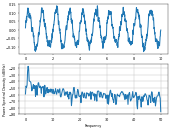

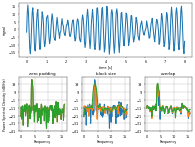

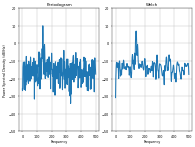

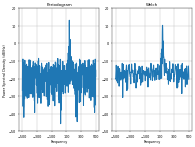

In [35]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
========
Psd Demo
========

Plotting Power Spectral Density (PSD) in Matplotlib.

The PSD is a common plot in the field of signal processing. NumPy has
many useful libraries for computing a PSD. Below we demo a few examples
of how this can be accomplished and visualized with Matplotlib.
"""
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.mlab as mlab

# Fixing random state for reproducibility
np.random.seed(19680801)

dt = 0.01
t = np.arange(0, 10, dt)
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)

cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]
s = 0.1 * np.sin(2 * np.pi * t) + cnse

fig, (ax0, ax1) = plt.subplots(2, 1)
ax0.plot(t, s)
ax1.psd(s, 512, 1 / dt)

plt.show()

# %%
# Compare this with the equivalent Matlab code to accomplish the same thing::
#
#     dt = 0.01;
#     t = [0:dt:10];
#     nse = randn(size(t));
#     r = exp(-t/0.05);
#     cnse = conv(nse, r)*dt;
#     cnse = cnse(1:length(t));
#     s = 0.1*sin(2*pi*t) + cnse;
#
#     subplot(211)
#     plot(t, s)
#     subplot(212)
#     psd(s, 512, 1/dt)
#
# Below we'll show a slightly more complex example that demonstrates
# how padding affects the resulting PSD.

dt = np.pi / 100.
fs = 1. / dt
t = np.arange(0, 8, dt)
y = 10. * np.sin(2 * np.pi * 4 * t) + 5. * np.sin(2 * np.pi * 4.25 * t)
y = y + np.random.randn(*t.shape)

# Plot the raw time series
fig, axs = plt.subplot_mosaic([
    ['signal', 'signal', 'signal'],
    ['zero padding', 'block size', 'overlap'],
], layout='constrained')

axs['signal'].plot(t, y)
axs['signal'].set_xlabel('time [s]')
axs['signal'].set_ylabel('signal')

# Plot the PSD with different amounts of zero padding. This uses the entire
# time series at once
axs['zero padding'].psd(y, NFFT=len(t), pad_to=len(t), Fs=fs)
axs['zero padding'].psd(y, NFFT=len(t), pad_to=len(t) * 2, Fs=fs)
axs['zero padding'].psd(y, NFFT=len(t), pad_to=len(t) * 4, Fs=fs)

# Plot the PSD with different block sizes, Zero pad to the length of the
# original data sequence.
axs['block size'].psd(y, NFFT=len(t), pad_to=len(t), Fs=fs)
axs['block size'].psd(y, NFFT=len(t) // 2, pad_to=len(t), Fs=fs)
axs['block size'].psd(y, NFFT=len(t) // 4, pad_to=len(t), Fs=fs)
axs['block size'].set_ylabel('')

# Plot the PSD with different amounts of overlap between blocks
axs['overlap'].psd(y, NFFT=len(t) // 2, pad_to=len(t), noverlap=0, Fs=fs)
axs['overlap'].psd(y, NFFT=len(t) // 2, pad_to=len(t),
                   noverlap=int(0.025 * len(t)), Fs=fs)
axs['overlap'].psd(y, NFFT=len(t) // 2, pad_to=len(t),
                   noverlap=int(0.1 * len(t)), Fs=fs)
axs['overlap'].set_ylabel('')
axs['overlap'].set_title('overlap')

for title, ax in axs.items():
    if title == 'signal':
        continue

    ax.set_title(title)
    ax.sharex(axs['zero padding'])
    ax.sharey(axs['zero padding'])

plt.show()


# %%
# This is a ported version of a MATLAB example from the signal
# processing toolbox that showed some difference at one time between
# Matplotlib's and MATLAB's scaling of the PSD.

fs = 1000
t = np.linspace(0, 0.3, 301)
A = np.array([2, 8]).reshape(-1, 1)
f = np.array([150, 140]).reshape(-1, 1)
xn = (A * np.sin(2 * np.pi * f * t)).sum(axis=0)
xn += 5 * np.random.randn(*t.shape)

fig, (ax0, ax1) = plt.subplots(ncols=2, layout='constrained')

yticks = np.arange(-50, 30, 10)
yrange = (yticks[0], yticks[-1])
xticks = np.arange(0, 550, 100)

ax0.psd(xn, NFFT=301, Fs=fs, window=mlab.window_none, pad_to=1024,
        scale_by_freq=True)
ax0.set_title('Periodogram')
ax0.set_yticks(yticks)
ax0.set_xticks(xticks)
ax0.grid(True)
ax0.set_ylim(yrange)

ax1.psd(xn, NFFT=150, Fs=fs, window=mlab.window_none, pad_to=512, noverlap=75,
        scale_by_freq=True)
ax1.set_title('Welch')
ax1.set_xticks(xticks)
ax1.set_yticks(yticks)
ax1.set_ylabel('')  # overwrite the y-label added by `psd`
ax1.grid(True)
ax1.set_ylim(yrange)

plt.show()

# %%
# This is a ported version of a MATLAB example from the signal
# processing toolbox that showed some difference at one time between
# Matplotlib's and MATLAB's scaling of the PSD.
#
# It uses a complex signal so we can see that complex PSD's work properly.

prng = np.random.RandomState(19680801)  # to ensure reproducibility

fs = 1000
t = np.linspace(0, 0.3, 301)
A = np.array([2, 8]).reshape(-1, 1)
f = np.array([150, 140]).reshape(-1, 1)
xn = (A * np.exp(2j * np.pi * f * t)).sum(axis=0) + 5 * prng.randn(*t.shape)

fig, (ax0, ax1) = plt.subplots(ncols=2, layout='constrained')

yticks = np.arange(-50, 30, 10)
yrange = (yticks[0], yticks[-1])
xticks = np.arange(-500, 550, 200)

ax0.psd(xn, NFFT=301, Fs=fs, window=mlab.window_none, pad_to=1024,
        scale_by_freq=True)
ax0.set_title('Periodogram')
ax0.set_yticks(yticks)
ax0.set_xticks(xticks)
ax0.grid(True)
ax0.set_ylim(yrange)

ax1.psd(xn, NFFT=150, Fs=fs, window=mlab.window_none, pad_to=512, noverlap=75,
        scale_by_freq=True)
ax1.set_title('Welch')
ax1.set_xticks(xticks)
ax1.set_yticks(yticks)
ax1.set_ylabel('')  # overwrite the y-label added by `psd`
ax1.grid(True)
ax1.set_ylim(yrange)

plt.show()


In [36]:
# THIS cbook EXAMPLE WAS REMOVED

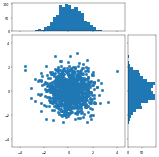

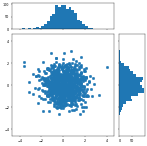

In [37]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
============================
Scatter plot with histograms
============================

Show the marginal distributions of a scatter plot as histograms at the sides of
the plot.

For a nice alignment of the main axes with the marginals, two options are shown
below:

.. contents::
   :local:

While `.Axes.inset_axes` may be a bit more complex, it allows correct handling
of main axes with a fixed aspect ratio.

An alternative method to produce a similar figure using the ``axes_grid1``
toolkit is shown in the :doc:`/gallery/axes_grid1/scatter_hist_locatable_axes`
example.  Finally, it is also possible to position all axes in absolute
coordinates using `.Figure.add_axes` (not shown here).

Let us first define a function that takes x and y data as input, as well
as three axes, the main axes for the scatter, and two marginal axes. It will
then create the scatter and histograms inside the provided axes.
"""

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

# some random data
x = np.random.randn(1000)
y = np.random.randn(1000)


def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')


# %%
#
# Defining the axes positions using a gridspec
# --------------------------------------------
#
# We define a gridspec with unequal width- and height-ratios to achieve desired
# layout.  Also see the :ref:`arranging_axes` tutorial.

# Start with a square Figure.
fig = plt.figure(figsize=(6, 6))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.
scatter_hist(x, y, ax, ax_histx, ax_histy)


# %%
#
# Defining the axes positions using inset_axes
# --------------------------------------------
#
# `~.Axes.inset_axes` can be used to position marginals *outside* the main
# axes.  The advantage of doing so is that the aspect ratio of the main axes
# can be fixed, and the marginals will always be drawn relative to the position
# of the axes.

# Create a Figure, which doesn't have to be square.
fig = plt.figure(layout='constrained')
# Create the main axes, leaving 25% of the figure space at the top and on the
# right to position marginals.
ax = fig.add_gridspec(top=0.75, right=0.75).subplots()
# The main axes' aspect can be fixed.
ax.set(aspect=1)
# Create marginal axes, which have 25% of the size of the main axes.  Note that
# the inset axes are positioned *outside* (on the right and the top) of the
# main axes, by specifying axes coordinates greater than 1.  Axes coordinates
# less than 0 would likewise specify positions on the left and the bottom of
# the main axes.
ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
# Draw the scatter plot and marginals.
scatter_hist(x, y, ax, ax_histx, ax_histy)

plt.show()


# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.figure.Figure.add_subplot`
#    - `matplotlib.figure.Figure.add_gridspec`
#    - `matplotlib.axes.Axes.inset_axes`
#    - `matplotlib.axes.Axes.scatter`
#    - `matplotlib.axes.Axes.hist`


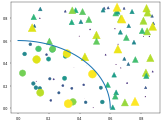

In [38]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==============
Scatter Masked
==============

Mask some data points and add a line demarking
masked regions.

"""
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


N = 100
r0 = 0.6
x = 0.9 * np.random.rand(N)
y = 0.9 * np.random.rand(N)
area = (20 * np.random.rand(N))**2  # 0 to 10 point radii
c = np.sqrt(area)
r = np.sqrt(x ** 2 + y ** 2)
area1 = np.ma.masked_where(r < r0, area)
area2 = np.ma.masked_where(r >= r0, area)
plt.scatter(x, y, s=area1, marker='^', c=c)
plt.scatter(x, y, s=area2, marker='o', c=c)
# Show the boundary between the regions:
theta = np.arange(0, np.pi / 2, 0.01)
plt.plot(r0 * np.cos(theta), r0 * np.sin(theta))

plt.show()


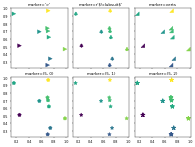

In [39]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===============
Marker examples
===============

Example with different ways to specify markers.

See also the `matplotlib.markers` documentation for a list of all markers and
:doc:`/gallery/lines_bars_and_markers/marker_reference` for more information
on configuring markers.

.. redirect-from:: /gallery/lines_bars_and_markers/scatter_custom_symbol
.. redirect-from:: /gallery/lines_bars_and_markers/scatter_symbol
.. redirect-from:: /gallery/lines_bars_and_markers/scatter_piecharts
"""
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

x = np.random.rand(10)
y = np.random.rand(10)
z = np.sqrt(x**2 + y**2)

fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, layout="constrained")

# Matplotlib marker symbol
axs[0, 0].scatter(x, y, s=80, c=z, marker=">")
axs[0, 0].set_title("marker='>'")

# marker from TeX: passing a TeX symbol name enclosed in $-signs
axs[0, 1].scatter(x, y, s=80, c=z, marker=r"$\clubsuit$")
axs[0, 1].set_title(r"marker=r'\$\clubsuit\$'")

# marker from path: passing a custom path of N vertices as a (N, 2) array-like
verts = [[-1, -1], [1, -1], [1, 1], [-1, -1]]
axs[0, 2].scatter(x, y, s=80, c=z, marker=verts)
axs[0, 2].set_title("marker=verts")

# regular pentagon marker
axs[1, 0].scatter(x, y, s=80, c=z, marker=(5, 0))
axs[1, 0].set_title("marker=(5, 0)")

# regular 5-pointed star marker
axs[1, 1].scatter(x, y, s=80, c=z, marker=(5, 1))
axs[1, 1].set_title("marker=(5, 1)")

# regular 5-pointed asterisk marker
axs[1, 2].scatter(x, y, s=80, c=z, marker=(5, 2))
axs[1, 2].set_title("marker=(5, 2)")

plt.show()


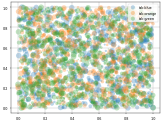

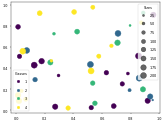

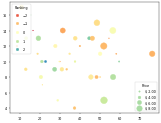

In [40]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===========================
Scatter plots with a legend
===========================

To create a scatter plot with a legend one may use a loop and create one
`~.Axes.scatter` plot per item to appear in the legend and set the ``label``
accordingly.

The following also demonstrates how transparency of the markers
can be adjusted by giving ``alpha`` a value between 0 and 1.
"""

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)


fig, ax = plt.subplots()
for color in ['tab:blue', 'tab:orange', 'tab:green']:
    n = 750
    x, y = np.random.rand(2, n)
    scale = 200.0 * np.random.rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()


# %%
# .. _automatedlegendcreation:
#
# Automated legend creation
# -------------------------
#
# Another option for creating a legend for a scatter is to use the
# `.PathCollection.legend_elements` method.  It will automatically try to
# determine a useful number of legend entries to be shown and return a tuple of
# handles and labels. Those can be passed to the call to `~.axes.Axes.legend`.


N = 45
x, y = np.random.rand(2, N)
c = np.random.randint(1, 5, size=N)
s = np.random.randint(10, 220, size=N)

fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=c, s=s)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

# produce a legend with a cross-section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")

plt.show()


# %%
# Further arguments to the `.PathCollection.legend_elements` method
# can be used to steer how many legend entries are to be created and how they
# should be labeled. The following shows how to use some of them.

volume = np.random.rayleigh(27, size=40)
amount = np.random.poisson(10, size=40)
ranking = np.random.normal(size=40)
price = np.random.uniform(1, 10, size=40)

fig, ax = plt.subplots()

# Because the price is much too small when being provided as size for ``s``,
# we normalize it to some useful point sizes, s=0.3*(price*3)**2
scatter = ax.scatter(volume, amount, c=ranking, s=0.3*(price*3)**2,
                     vmin=-3, vmax=3, cmap="Spectral")

# Produce a legend for the ranking (colors). Even though there are 40 different
# rankings, we only want to show 5 of them in the legend.
legend1 = ax.legend(*scatter.legend_elements(num=5),
                    loc="upper left", title="Ranking")
ax.add_artist(legend1)

# Produce a legend for the price (sizes). Because we want to show the prices
# in dollars, we use the *func* argument to supply the inverse of the function
# used to calculate the sizes from above. The *fmt* ensures to show the price
# in dollars. Note how we target at 5 elements here, but obtain only 4 in the
# created legend due to the automatic round prices that are chosen for us.
kw = dict(prop="sizes", num=5, color=scatter.cmap(0.7), fmt="$ {x:.2f}",
          func=lambda s: np.sqrt(s/.3)/3)
legend2 = ax.legend(*scatter.legend_elements(**kw),
                    loc="lower right", title="Price")

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.scatter` / `matplotlib.pyplot.scatter`
#    - `matplotlib.axes.Axes.legend` / `matplotlib.pyplot.legend`
#    - `matplotlib.collections.PathCollection.legend_elements`


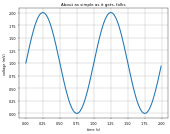

In [41]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===========
Simple Plot
===========

Create a simple plot.
"""

import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.plot` / `matplotlib.pyplot.plot`
#    - `matplotlib.pyplot.subplots`
#    - `matplotlib.figure.Figure.savefig`


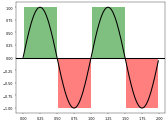

In [42]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==========================================================
Shade regions defined by a logical mask using fill_between
==========================================================
"""

import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 2, 0.01)
s = np.sin(2*np.pi*t)

fig, ax = plt.subplots()

ax.plot(t, s, color='black')
ax.axhline(0, color='black')

ax.fill_between(t, 1, where=s > 0, facecolor='green', alpha=.5)
ax.fill_between(t, -1, where=s < 0, facecolor='red', alpha=.5)

plt.show()


# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.fill_between`


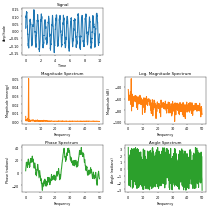

In [43]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
========================
Spectrum Representations
========================

The plots show different spectrum representations of a sine signal with
additive noise. A (frequency) spectrum of a discrete-time signal is calculated
by utilizing the fast Fourier transform (FFT).
"""
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

dt = 0.01  # sampling interval
Fs = 1 / dt  # sampling frequency
t = np.arange(0, 10, dt)

# generate noise:
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)
cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]

s = 0.1 * np.sin(4 * np.pi * t) + cnse  # the signal

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))

# plot time signal:
axs[0, 0].set_title("Signal")
axs[0, 0].plot(t, s, color='C0')
axs[0, 0].set_xlabel("Time")
axs[0, 0].set_ylabel("Amplitude")

# plot different spectrum types:
axs[1, 0].set_title("Magnitude Spectrum")
axs[1, 0].magnitude_spectrum(s, Fs=Fs, color='C1')

axs[1, 1].set_title("Log. Magnitude Spectrum")
axs[1, 1].magnitude_spectrum(s, Fs=Fs, scale='dB', color='C1')

axs[2, 0].set_title("Phase Spectrum ")
axs[2, 0].phase_spectrum(s, Fs=Fs, color='C2')

axs[2, 1].set_title("Angle Spectrum")
axs[2, 1].angle_spectrum(s, Fs=Fs, color='C2')

axs[0, 1].remove()  # don't display empty ax

fig.tight_layout()
plt.show()


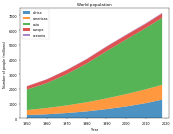

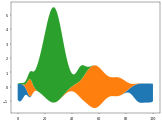

In [44]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===========================
Stackplots and streamgraphs
===========================
"""

# %%
# Stackplots
# ----------
#
# Stackplots draw multiple datasets as vertically stacked areas. This is
# useful when the individual data values and additionally their cumulative
# value are of interest.


import matplotlib.pyplot as plt
import numpy as np

# data from United Nations World Population Prospects (Revision 2019)
# https://population.un.org/wpp/, license: CC BY 3.0 IGO
year = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2018]
population_by_continent = {
    'africa': [228, 284, 365, 477, 631, 814, 1044, 1275],
    'americas': [340, 425, 519, 619, 727, 840, 943, 1006],
    'asia': [1394, 1686, 2120, 2625, 3202, 3714, 4169, 4560],
    'europe': [220, 253, 276, 295, 310, 303, 294, 293],
    'oceania': [12, 15, 19, 22, 26, 31, 36, 39],
}

fig, ax = plt.subplots()
ax.stackplot(year, population_by_continent.values(),
             labels=population_by_continent.keys(), alpha=0.8)
ax.legend(loc='upper left')
ax.set_title('World population')
ax.set_xlabel('Year')
ax.set_ylabel('Number of people (millions)')

plt.show()

# %%
# Streamgraphs
# ------------
#
# Using the *baseline* parameter, you can turn an ordinary stacked area plot
# with baseline 0 into a stream graph.


# Fixing random state for reproducibility
np.random.seed(19680801)


def gaussian_mixture(x, n=5):
    """Return a random mixture of *n* Gaussians, evaluated at positions *x*."""
    def add_random_gaussian(a):
        amplitude = 1 / (.1 + np.random.random())
        dx = x[-1] - x[0]
        x0 = (2 * np.random.random() - .5) * dx
        z = 10 / (.1 + np.random.random()) / dx
        a += amplitude * np.exp(-(z * (x - x0))**2)
    a = np.zeros_like(x)
    for j in range(n):
        add_random_gaussian(a)
    return a


x = np.linspace(0, 100, 101)
ys = [gaussian_mixture(x) for _ in range(3)]

fig, ax = plt.subplots()
ax.stackplot(x, ys, baseline='wiggle')
plt.show()


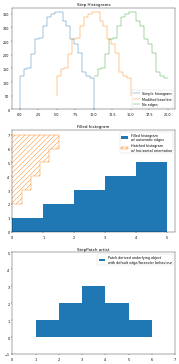

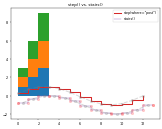

In [45]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===========
Stairs Demo
===========

This example demonstrates the use of `~.matplotlib.pyplot.stairs` for stepwise
constant functions. A common use case is histogram and histogram-like data
visualization.

"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import StepPatch

np.random.seed(0)
h, edges = np.histogram(np.random.normal(5, 3, 5000),
                        bins=np.linspace(0, 10, 20))

fig, axs = plt.subplots(3, 1, figsize=(7, 15))
axs[0].stairs(h, edges, label='Simple histogram')
axs[0].stairs(h, edges + 5, baseline=50, label='Modified baseline')
axs[0].stairs(h, edges + 10, baseline=None, label='No edges')
axs[0].set_title("Step Histograms")

axs[1].stairs(np.arange(1, 6, 1), fill=True,
              label='Filled histogram\nw/ automatic edges')
axs[1].stairs(np.arange(1, 6, 1)*0.3, np.arange(2, 8, 1),
              orientation='horizontal', hatch='//',
              label='Hatched histogram\nw/ horizontal orientation')
axs[1].set_title("Filled histogram")

patch = StepPatch(values=[1, 2, 3, 2, 1],
                  edges=range(1, 7),
                  label=('Patch derived underlying object\n'
                         'with default edge/facecolor behaviour'))
axs[2].add_patch(patch)
axs[2].set_xlim(0, 7)
axs[2].set_ylim(-1, 5)
axs[2].set_title("StepPatch artist")

for ax in axs:
    ax.legend()
plt.show()

# %%
# *baseline* can take an array to allow for stacked histogram plots
A = [[0, 0, 0],
     [1, 2, 3],
     [2, 4, 6],
     [3, 6, 9]]

for i in range(len(A) - 1):
    plt.stairs(A[i+1], baseline=A[i], fill=True)

# %%
# Comparison of `.pyplot.step` and `.pyplot.stairs`
# -------------------------------------------------
#
# `.pyplot.step` defines the positions of the steps as single values. The steps
# extend left/right/both ways from these reference values depending on the
# parameter *where*. The number of *x* and *y* values is the same.
#
# In contrast, `.pyplot.stairs` defines the positions of the steps via their
# bounds *edges*, which is one element longer than the step values.

bins = np.arange(14)
centers = bins[:-1] + np.diff(bins) / 2
y = np.sin(centers / 2)

plt.step(bins[:-1], y, where='post', label='step(where="post")')
plt.plot(bins[:-1], y, 'o--', color='grey', alpha=0.3)

plt.stairs(y - 1, bins, baseline=None, label='stairs()')
plt.plot(centers, y - 1, 'o--', color='grey', alpha=0.3)
plt.plot(np.repeat(bins, 2), np.hstack([y[0], np.repeat(y, 2), y[-1]]) - 1,
         'o', color='red', alpha=0.2)

plt.legend()
plt.title('step() vs. stairs()')
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.stairs` / `matplotlib.pyplot.stairs`
#    - `matplotlib.patches.StepPatch`


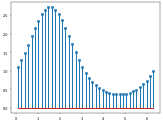

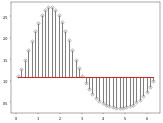

In [46]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=========
Stem Plot
=========

`~.pyplot.stem` plots vertical lines from a baseline to the y-coordinate and
places a marker at the tip.
"""
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.1, 2 * np.pi, 41)
y = np.exp(np.sin(x))

plt.stem(x, y)
plt.show()

# %%
#
# The position of the baseline can be adapted using *bottom*.
# The parameters *linefmt*, *markerfmt*, and *basefmt* control basic format
# properties of the plot. However, in contrast to `~.pyplot.plot` not all
# properties are configurable via keyword arguments. For more advanced
# control adapt the line objects returned by `.pyplot`.

markerline, stemlines, baseline = plt.stem(
    x, y, linefmt='grey', markerfmt='D', bottom=1.1)
markerline.set_markerfacecolor('none')
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.stem` / `matplotlib.pyplot.stem`


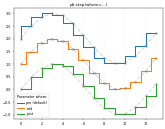

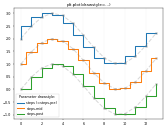

In [47]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=========
Step Demo
=========

This example demonstrates the use of `.pyplot.step` for piece-wise constant
curves. In particular, it illustrates the effect of the parameter *where*
on the step position.

.. note::

    For the common case that you know the edge positions, use `.pyplot.stairs`
    instead.

The circular markers created with `.pyplot.plot` show the actual data
positions so that it's easier to see the effect of *where*.

"""
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(14)
y = np.sin(x / 2)

plt.step(x, y + 2, label='pre (default)')
plt.plot(x, y + 2, 'o--', color='grey', alpha=0.3)

plt.step(x, y + 1, where='mid', label='mid')
plt.plot(x, y + 1, 'o--', color='grey', alpha=0.3)

plt.step(x, y, where='post', label='post')
plt.plot(x, y, 'o--', color='grey', alpha=0.3)

plt.grid(axis='x', color='0.95')
plt.legend(title='Parameter where:')
plt.title('plt.step(where=...)')
plt.show()

# %%
# The same behavior can be achieved by using the ``drawstyle`` parameter of
# `.pyplot.plot`.

plt.plot(x, y + 2, drawstyle='steps', label='steps (=steps-pre)')
plt.plot(x, y + 2, 'o--', color='grey', alpha=0.3)

plt.plot(x, y + 1, drawstyle='steps-mid', label='steps-mid')
plt.plot(x, y + 1, 'o--', color='grey', alpha=0.3)

plt.plot(x, y, drawstyle='steps-post', label='steps-post')
plt.plot(x, y, 'o--', color='grey', alpha=0.3)

plt.grid(axis='x', color='0.95')
plt.legend(title='Parameter drawstyle:')
plt.title('plt.plot(drawstyle=...)')
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.step` / `matplotlib.pyplot.step`
#    - `matplotlib.axes.Axes.plot` / `matplotlib.pyplot.plot`


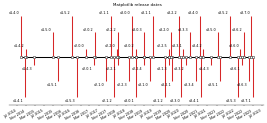

In [48]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===============================================
Creating a timeline with lines, dates, and text
===============================================

How to create a simple timeline using Matplotlib release dates.

Timelines can be created with a collection of dates and text. In this example,
we show how to create a simple timeline using the dates for recent releases
of Matplotlib. First, we'll pull the data from GitHub.
"""

from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.dates as mdates

try:
    # Try to fetch a list of Matplotlib releases and their dates
    # from https://api.github.com/repos/matplotlib/matplotlib/releases
    import json
    import urllib.request

    url = 'https://api.github.com/repos/matplotlib/matplotlib/releases'
    url += '?per_page=100'
    data = json.loads(urllib.request.urlopen(url, timeout=1).read().decode())

    dates = []
    names = []
    for item in data:
        if 'rc' not in item['tag_name'] and 'b' not in item['tag_name']:
            dates.append(item['published_at'].split("T")[0])
            names.append(item['tag_name'])
    # Convert date strings (e.g. 2014-10-18) to datetime
    dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

except Exception:
    # In case the above fails, e.g. because of missing internet connection
    # use the following lists as fallback.
    names = ['v2.2.4', 'v3.0.3', 'v3.0.2', 'v3.0.1', 'v3.0.0', 'v2.2.3',
             'v2.2.2', 'v2.2.1', 'v2.2.0', 'v2.1.2', 'v2.1.1', 'v2.1.0',
             'v2.0.2', 'v2.0.1', 'v2.0.0', 'v1.5.3', 'v1.5.2', 'v1.5.1',
             'v1.5.0', 'v1.4.3', 'v1.4.2', 'v1.4.1', 'v1.4.0']

    dates = ['2019-02-26', '2019-02-26', '2018-11-10', '2018-11-10',
             '2018-09-18', '2018-08-10', '2018-03-17', '2018-03-16',
             '2018-03-06', '2018-01-18', '2017-12-10', '2017-10-07',
             '2017-05-10', '2017-05-02', '2017-01-17', '2016-09-09',
             '2016-07-03', '2016-01-10', '2015-10-29', '2015-02-16',
             '2014-10-26', '2014-10-18', '2014-08-26']

    # Convert date strings (e.g. 2014-10-18) to datetime
    dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

# %%
# Next, we'll create a stem plot with some variation in levels as to
# distinguish even close-by events. We add markers on the baseline for visual
# emphasis on the one-dimensional nature of the timeline.
#
# For each event, we add a text label via `~.Axes.annotate`, which is offset
# in units of points from the tip of the event line.
#
# Note that Matplotlib will automatically plot datetime inputs.


# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), layout="constrained")
ax.set(title="Matplotlib release dates")

ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format x-axis with 4-month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y-axis and spines
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.1)
plt.show()


# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.annotate`
#    - `matplotlib.axes.Axes.vlines`
#    - `matplotlib.axis.Axis.set_major_locator`
#    - `matplotlib.axis.Axis.set_major_formatter`
#    - `matplotlib.dates.MonthLocator`
#    - `matplotlib.dates.DateFormatter`


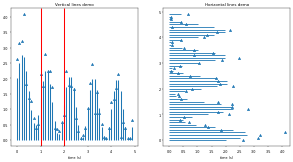

In [49]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=================
hlines and vlines
=================

This example showcases the functions hlines and vlines.
"""

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

t = np.arange(0.0, 5.0, 0.1)
s = np.exp(-t) + np.sin(2 * np.pi * t) + 1
nse = np.random.normal(0.0, 0.3, t.shape) * s

fig, (vax, hax) = plt.subplots(1, 2, figsize=(12, 6))

vax.plot(t, s + nse, '^')
vax.vlines(t, [0], s)
# By using ``transform=vax.get_xaxis_transform()`` the y coordinates are scaled
# such that 0 maps to the bottom of the axes and 1 to the top.
vax.vlines([1, 2], 0, 1, transform=vax.get_xaxis_transform(), colors='r')
vax.set_xlabel('time (s)')
vax.set_title('Vertical lines demo')

hax.plot(s + nse, t, '^')
hax.hlines(t, [0], s, lw=2)
hax.set_xlabel('time (s)')
hax.set_title('Horizontal lines demo')

plt.show()


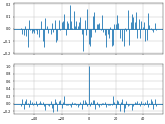

In [50]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
================================
Cross- and Auto-Correlation Demo
================================

Example use of cross-correlation (`~.Axes.xcorr`) and auto-correlation
(`~.Axes.acorr`) plots.
"""
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


x, y = np.random.randn(2, 100)
fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True)
ax1.xcorr(x, y, usevlines=True, maxlags=50, normed=True, lw=2)
ax1.grid(True)

ax2.acorr(x, usevlines=True, normed=True, maxlags=50, lw=2)
ax2.grid(True)

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.acorr` / `matplotlib.pyplot.acorr`
#    - `matplotlib.axes.Axes.xcorr` / `matplotlib.pyplot.xcorr`


In [51]:
ChapterConfig.set_chapter_name("02images_contours_and_fields")

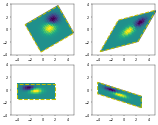

In [52]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
============================
Affine transform of an image
============================


Prepending an affine transformation (`~.transforms.Affine2D`) to the :ref:`data
transform <data-coords>` of an image allows to manipulate the image's shape and
orientation.  This is an example of the concept of :ref:`transform chaining
<transformation-pipeline>`.

The image of the output should have its boundary match the dashed yellow
rectangle.
"""

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.transforms as mtransforms


def get_image():
    delta = 0.25
    x = y = np.arange(-3.0, 3.0, delta)
    X, Y = np.meshgrid(x, y)
    Z1 = np.exp(-X**2 - Y**2)
    Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
    Z = (Z1 - Z2)
    return Z


def do_plot(ax, Z, transform):
    im = ax.imshow(Z, interpolation='none',
                   origin='lower',
                   extent=[-2, 4, -3, 2], clip_on=True)

    trans_data = transform + ax.transData
    im.set_transform(trans_data)

    # display intended extent of the image
    x1, x2, y1, y2 = im.get_extent()
    ax.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], "y--",
            transform=trans_data)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-4, 4)


# prepare image and figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
Z = get_image()

# image rotation
do_plot(ax1, Z, mtransforms.Affine2D().rotate_deg(30))

# image skew
do_plot(ax2, Z, mtransforms.Affine2D().skew_deg(30, 15))

# scale and reflection
do_plot(ax3, Z, mtransforms.Affine2D().scale(-1, .5))

# everything and a translation
do_plot(ax4, Z, mtransforms.Affine2D().
        rotate_deg(30).skew_deg(30, 15).scale(-1, .5).translate(.5, -1))

plt.show()


# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.imshow` / `matplotlib.pyplot.imshow`
#    - `matplotlib.transforms.Affine2D`


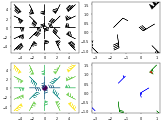

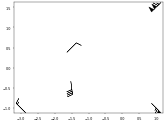

In [53]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==========
Wind Barbs
==========

Demonstration of wind barb plots.
"""
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 5)
X, Y = np.meshgrid(x, x)
U, V = 12 * X, 12 * Y

data = [(-1.5, .5, -6, -6),
        (1, -1, -46, 46),
        (-3, -1, 11, -11),
        (1, 1.5, 80, 80),
        (0.5, 0.25, 25, 15),
        (-1.5, -0.5, -5, 40)]

data = np.array(data, dtype=[('x', np.float32), ('y', np.float32),
                             ('u', np.float32), ('v', np.float32)])

fig1, axs1 = plt.subplots(nrows=2, ncols=2)
# Default parameters, uniform grid
axs1[0, 0].barbs(X, Y, U, V)

# Arbitrary set of vectors, make them longer and change the pivot point
# (point around which they're rotated) to be the middle
axs1[0, 1].barbs(
    data['x'], data['y'], data['u'], data['v'], length=8, pivot='middle')

# Showing colormapping with uniform grid.  Fill the circle for an empty barb,
# don't round the values, and change some of the size parameters
axs1[1, 0].barbs(
    X, Y, U, V, np.sqrt(U ** 2 + V ** 2), fill_empty=True, rounding=False,
    sizes=dict(emptybarb=0.25, spacing=0.2, height=0.3))

# Change colors as well as the increments for parts of the barbs
axs1[1, 1].barbs(data['x'], data['y'], data['u'], data['v'], flagcolor='r',
                 barbcolor=['b', 'g'], flip_barb=True,
                 barb_increments=dict(half=10, full=20, flag=100))

# Masked arrays are also supported
masked_u = np.ma.masked_array(data['u'])
masked_u[4] = 1000  # Bad value that should not be plotted when masked
masked_u[4] = np.ma.masked

# %%
# Identical plot to panel 2 in the first figure, but with the point at
# (0.5, 0.25) missing (masked)
fig2, ax2 = plt.subplots()
ax2.barbs(data['x'], data['y'], masked_u, data['v'], length=8, pivot='middle')

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.barbs` / `matplotlib.pyplot.barbs`


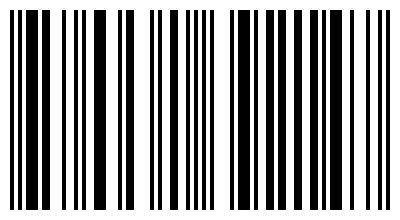

In [54]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=======
Barcode
=======
This demo shows how to produce a bar code.

The figure size is calculated so that the width in pixels is a multiple of the
number of data points to prevent interpolation artifacts. Additionally, the
``Axes`` is defined to span the whole figure and all ``Axis`` are turned off.

The data itself is rendered with `~.Axes.imshow` using

- ``code.reshape(1, -1)`` to turn the data into a 2D array with one row.
- ``imshow(..., aspect='auto')`` to allow for non-square pixels.
- ``imshow(..., interpolation='nearest')`` to prevent blurred edges. This
  should not happen anyway because we fine-tuned the figure width in pixels,
  but just to be safe.
"""

import matplotlib.pyplot as plt
import numpy as np

code = np.array([
    1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
    0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
    1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
    1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1])

pixel_per_bar = 4
dpi = 100

fig = plt.figure(figsize=(len(code) * pixel_per_bar / dpi, 2), dpi=dpi)
ax = fig.add_axes([0, 0, 1, 1])  # span the whole figure
ax.set_axis_off()
ax.imshow(code.reshape(1, -1), cmap='binary', aspect='auto',
          interpolation='nearest')
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.imshow` / `matplotlib.pyplot.imshow`
#    - `matplotlib.figure.Figure.add_axes`


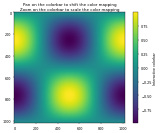

In [55]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
========================================
Interactive Adjustment of Colormap Range
========================================

Demonstration of how a colorbar can be used to interactively adjust the
range of colormapping on an image. To use the interactive feature, you must
be in either zoom mode (magnifying glass toolbar button) or
pan mode (4-way arrow toolbar button) and click inside the colorbar.

When zooming, the bounding box of the zoom region defines the new vmin and
vmax of the norm. Zooming using the right mouse button will expand the
vmin and vmax proportionally to the selected region, in the same manner that
one can zoom out on an axis. When panning, the vmin and vmax of the norm are
both shifted according to the direction of movement. The
Home/Back/Forward buttons can also be used to get back to a previous state.

.. redirect-from:: /gallery/userdemo/colormap_interactive_adjustment
"""
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0, 2 * np.pi, 1024)
data2d = np.sin(t)[:, np.newaxis] * np.cos(t)[np.newaxis, :]

fig, ax = plt.subplots()
im = ax.imshow(data2d)
ax.set_title('Pan on the colorbar to shift the color mapping\n'
             'Zoom on the colorbar to scale the color mapping')

fig.colorbar(im, ax=ax, label='Interactive colorbar')

plt.show()


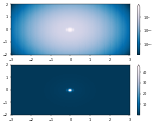

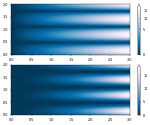

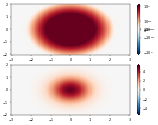

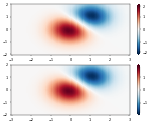

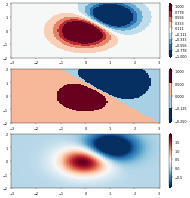

In [56]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=======================
Colormap normalizations
=======================

Demonstration of using norm to map colormaps onto data in non-linear ways.

.. redirect-from:: /gallery/userdemo/colormap_normalizations
"""

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.colors as colors

# %%
# Lognorm: Instead of pcolor log10(Z1) you can have colorbars that have
# the exponential labels using a norm.

N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]

# A low hump with a spike coming out of the top.  Needs to have
# z/colour axis on a log scale, so we see both hump and spike.
# A linear scale only shows the spike.

Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X * 10)**2 - (Y * 10)**2)
Z = Z1 + 50 * Z2

fig, ax = plt.subplots(2, 1)

pcm = ax[0].pcolor(X, Y, Z,
                   norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),
                   cmap='PuBu_r', shading='nearest')
fig.colorbar(pcm, ax=ax[0], extend='max')

pcm = ax[1].pcolor(X, Y, Z, cmap='PuBu_r', shading='nearest')
fig.colorbar(pcm, ax=ax[1], extend='max')


# %%
# PowerNorm: Here a power-law trend in X partially obscures a rectified
# sine wave in Y. We can remove the power law using a PowerNorm.

X, Y = np.mgrid[0:3:complex(0, N), 0:2:complex(0, N)]
Z1 = (1 + np.sin(Y * 10.)) * X**2

fig, ax = plt.subplots(2, 1)

pcm = ax[0].pcolormesh(X, Y, Z1, norm=colors.PowerNorm(gamma=1. / 2.),
                       cmap='PuBu_r', shading='nearest')
fig.colorbar(pcm, ax=ax[0], extend='max')

pcm = ax[1].pcolormesh(X, Y, Z1, cmap='PuBu_r', shading='nearest')
fig.colorbar(pcm, ax=ax[1], extend='max')

# %%
# SymLogNorm: two humps, one negative and one positive, The positive
# with 5-times the amplitude. Linearly, you cannot see detail in the
# negative hump.  Here we logarithmically scale the positive and
# negative data separately.
#
# Note that colorbar labels do not come out looking very good.

X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]
Z = 5 * np.exp(-X**2 - Y**2)

fig, ax = plt.subplots(2, 1)

pcm = ax[0].pcolormesh(X, Y, Z,
                       norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
                                              vmin=-1.0, vmax=1.0, base=10),
                       cmap='RdBu_r', shading='nearest')
fig.colorbar(pcm, ax=ax[0], extend='both')

pcm = ax[1].pcolormesh(X, Y, Z, cmap='RdBu_r', vmin=-np.max(Z),
                       shading='nearest')
fig.colorbar(pcm, ax=ax[1], extend='both')

# %%
# Custom Norm: An example with a customized normalization.  This one
# uses the example above, and normalizes the negative data differently
# from the positive.

X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

# Example of making your own norm.  Also see matplotlib.colors.
# From Joe Kington: This one gives two different linear ramps:


class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))


# %%
fig, ax = plt.subplots(2, 1)

pcm = ax[0].pcolormesh(X, Y, Z,
                       norm=MidpointNormalize(midpoint=0.),
                       cmap='RdBu_r', shading='nearest')
fig.colorbar(pcm, ax=ax[0], extend='both')

pcm = ax[1].pcolormesh(X, Y, Z, cmap='RdBu_r', vmin=-np.max(Z),
                       shading='nearest')
fig.colorbar(pcm, ax=ax[1], extend='both')

# %%
# BoundaryNorm: For this one you provide the boundaries for your colors,
# and the Norm puts the first color in between the first pair, the
# second color between the second pair, etc.

fig, ax = plt.subplots(3, 1, figsize=(8, 8))
ax = ax.flatten()
# even bounds gives a contour-like effect
bounds = np.linspace(-1, 1, 10)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
pcm = ax[0].pcolormesh(X, Y, Z,
                       norm=norm,
                       cmap='RdBu_r', shading='nearest')
fig.colorbar(pcm, ax=ax[0], extend='both', orientation='vertical')

# uneven bounds changes the colormapping:
bounds = np.array([-0.25, -0.125, 0, 0.5, 1])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
pcm = ax[1].pcolormesh(X, Y, Z, norm=norm, cmap='RdBu_r', shading='nearest')
fig.colorbar(pcm, ax=ax[1], extend='both', orientation='vertical')

pcm = ax[2].pcolormesh(X, Y, Z, cmap='RdBu_r', vmin=-np.max(Z1),
                       shading='nearest')
fig.colorbar(pcm, ax=ax[2], extend='both', orientation='vertical')

plt.show()


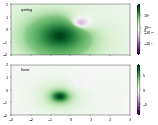

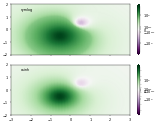

In [57]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==================================
Colormap normalizations SymLogNorm
==================================

Demonstration of using norm to map colormaps onto data in non-linear ways.

.. redirect-from:: /gallery/userdemo/colormap_normalization_symlognorm
"""

# %%
# Synthetic dataset consisting of two humps, one negative and one positive,
# the positive with 8-times the amplitude.
# Linearly, the negative hump is almost invisible,
# and it is very difficult to see any detail of its profile.
# With the logarithmic scaling applied to both positive and negative values,
# it is much easier to see the shape of each hump.
#
# See `~.colors.SymLogNorm`.

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.colors as colors


def rbf(x, y):
    return 1.0 / (1 + 5 * ((x ** 2) + (y ** 2)))

N = 200
gain = 8
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]
Z1 = rbf(X + 0.5, Y + 0.5)
Z2 = rbf(X - 0.5, Y - 0.5)
Z = gain * Z1 - Z2

shadeopts = {'cmap': 'PRGn', 'shading': 'gouraud'}
colormap = 'PRGn'
lnrwidth = 0.5

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True)

pcm = ax[0].pcolormesh(X, Y, Z,
                       norm=colors.SymLogNorm(linthresh=lnrwidth, linscale=1,
                                              vmin=-gain, vmax=gain, base=10),
                       **shadeopts)
fig.colorbar(pcm, ax=ax[0], extend='both')
ax[0].text(-2.5, 1.5, 'symlog')

pcm = ax[1].pcolormesh(X, Y, Z, vmin=-gain, vmax=gain,
                       **shadeopts)
fig.colorbar(pcm, ax=ax[1], extend='both')
ax[1].text(-2.5, 1.5, 'linear')


# %%
# In order to find the best visualization for any particular dataset,
# it may be necessary to experiment with multiple different color scales.
# As well as the `~.colors.SymLogNorm` scaling, there is also
# the option of using `~.colors.AsinhNorm` (experimental), which has a smoother
# transition between the linear and logarithmic regions of the transformation
# applied to the data values, "Z".
# In the plots below, it may be possible to see contour-like artifacts
# around each hump despite there being no sharp features
# in the dataset itself. The ``asinh`` scaling shows a smoother shading
# of each hump.

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True)

pcm = ax[0].pcolormesh(X, Y, Z,
                       norm=colors.SymLogNorm(linthresh=lnrwidth, linscale=1,
                                              vmin=-gain, vmax=gain, base=10),
                       **shadeopts)
fig.colorbar(pcm, ax=ax[0], extend='both')
ax[0].text(-2.5, 1.5, 'symlog')

pcm = ax[1].pcolormesh(X, Y, Z,
                       norm=colors.AsinhNorm(linear_width=lnrwidth,
                                             vmin=-gain, vmax=gain),
                       **shadeopts)
fig.colorbar(pcm, ax=ax[1], extend='both')
ax[1].text(-2.5, 1.5, 'asinh')


plt.show()


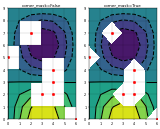

In [58]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===================
Contour Corner Mask
===================

Illustrate the difference between ``corner_mask=False`` and
``corner_mask=True`` for masked contour plots.  The default is controlled by
:rc:`contour.corner_mask`.
"""

import matplotlib.pyplot as plt
import numpy as np

# Data to plot.
x, y = np.meshgrid(np.arange(7), np.arange(10))
z = np.sin(0.5 * x) * np.cos(0.52 * y)

# Mask various z values.
mask = np.zeros_like(z, dtype=bool)
mask[2, 3:5] = True
mask[3:5, 4] = True
mask[7, 2] = True
mask[5, 0] = True
mask[0, 6] = True
z = np.ma.array(z, mask=mask)

corner_masks = [False, True]
fig, axs = plt.subplots(ncols=2)
for ax, corner_mask in zip(axs, corner_masks):
    cs = ax.contourf(x, y, z, corner_mask=corner_mask)
    ax.contour(cs, colors='k')
    ax.set_title(f'{corner_mask=}')

    # Plot grid.
    ax.grid(c='k', ls='-', alpha=0.3)

    # Indicate masked points with red circles.
    ax.plot(np.ma.array(x, mask=~mask), y, 'ro')

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.contour` / `matplotlib.pyplot.contour`
#    - `matplotlib.axes.Axes.contourf` / `matplotlib.pyplot.contourf`


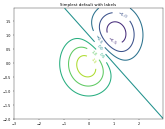

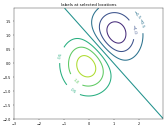

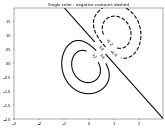

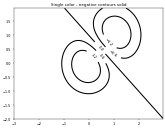

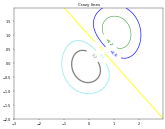

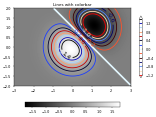

In [59]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
============
Contour Demo
============

Illustrate simple contour plotting, contours on an image with
a colorbar for the contours, and labelled contours.

See also the :doc:`contour image example
</gallery/images_contours_and_fields/contour_image>`.
"""

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.cm as cm

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

# %%
# Create a simple contour plot with labels using default colors.  The inline
# argument to clabel will control whether the labels are draw over the line
# segments of the contour, removing the lines beneath the label.

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Simplest default with labels')

# %%
# Contour labels can be placed manually by providing list of positions (in data
# coordinate).  See :doc:`/gallery/event_handling/ginput_manual_clabel_sgskip`
# for interactive placement.

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
manual_locations = [
    (-1, -1.4), (-0.62, -0.7), (-2, 0.5), (1.7, 1.2), (2.0, 1.4), (2.4, 1.7)]
ax.clabel(CS, inline=True, fontsize=10, manual=manual_locations)
ax.set_title('labels at selected locations')

# %%
# You can force all the contours to be the same color.

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, 6, colors='k')  # Negative contours default to dashed.
ax.clabel(CS, fontsize=9, inline=True)
ax.set_title('Single color - negative contours dashed')

# %%
# You can set negative contours to be solid instead of dashed:

plt.rcParams['contour.negative_linestyle'] = 'solid'
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, 6, colors='k')  # Negative contours default to dashed.
ax.clabel(CS, fontsize=9, inline=True)
ax.set_title('Single color - negative contours solid')

# %%
# And you can manually specify the colors of the contour

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, 6,
                linewidths=np.arange(.5, 4, .5),
                colors=('r', 'green', 'blue', (1, 1, 0), '#afeeee', '0.5'),
                )
ax.clabel(CS, fontsize=9, inline=True)
ax.set_title('Crazy lines')

# %%
# Or you can use a colormap to specify the colors; the default
# colormap will be used for the contour lines

fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear', origin='lower',
               cmap=cm.gray, extent=(-3, 3, -2, 2))
levels = np.arange(-1.2, 1.6, 0.2)
CS = ax.contour(Z, levels, origin='lower', cmap='flag', extend='both',
                linewidths=2, extent=(-3, 3, -2, 2))

# Thicken the zero contour.
CS.collections[6].set_linewidth(4)

ax.clabel(CS, levels[1::2],  # label every second level
          inline=True, fmt='%1.1f', fontsize=14)

# make a colorbar for the contour lines
CB = fig.colorbar(CS, shrink=0.8)

ax.set_title('Lines with colorbar')

# We can still add a colorbar for the image, too.
CBI = fig.colorbar(im, orientation='horizontal', shrink=0.8)

# This makes the original colorbar look a bit out of place,
# so let's improve its position.

l, b, w, h = ax.get_position().bounds
ll, bb, ww, hh = CB.ax.get_position().bounds
CB.ax.set_position([ll, b + 0.1*h, ww, h*0.8])

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.contour` / `matplotlib.pyplot.contour`
#    - `matplotlib.figure.Figure.colorbar` / `matplotlib.pyplot.colorbar`
#    - `matplotlib.axes.Axes.clabel` / `matplotlib.pyplot.clabel`
#    - `matplotlib.axes.Axes.get_position`
#    - `matplotlib.axes.Axes.set_position`


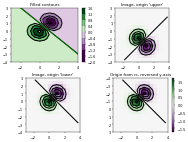

In [60]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=============
Contour Image
=============

Test combinations of contouring, filled contouring, and image plotting.
For contour labelling, see also the :doc:`contour demo example
</gallery/images_contours_and_fields/contour_demo>`.

The emphasis in this demo is on showing how to make contours register
correctly on images, and on how to get both of them oriented as desired.
In particular, note the usage of the :ref:`"origin" and "extent"
<imshow_extent>` keyword arguments to imshow and
contour.
"""
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm

# Default delta is large because that makes it fast, and it illustrates
# the correct registration between image and contours.
delta = 0.5

extent = (-3, 4, -4, 3)

x = np.arange(-3.0, 4.001, delta)
y = np.arange(-4.0, 3.001, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

# Boost the upper limit to avoid truncation errors.
levels = np.arange(-2.0, 1.601, 0.4)

norm = cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())
cmap = cm.PRGn

fig, _axs = plt.subplots(nrows=2, ncols=2)
fig.subplots_adjust(hspace=0.3)
axs = _axs.flatten()

cset1 = axs[0].contourf(X, Y, Z, levels, norm=norm,
                        cmap=cmap.resampled(len(levels) - 1))
# It is not necessary, but for the colormap, we need only the
# number of levels minus 1.  To avoid discretization error, use
# either this number or a large number such as the default (256).

# If we want lines as well as filled regions, we need to call
# contour separately; don't try to change the edgecolor or edgewidth
# of the polygons in the collections returned by contourf.
# Use levels output from previous call to guarantee they are the same.

cset2 = axs[0].contour(X, Y, Z, cset1.levels, colors='k')

# We don't really need dashed contour lines to indicate negative
# regions, so let's turn them off.

for c in cset2.collections:
    c.set_linestyle('solid')

# It is easier here to make a separate call to contour than
# to set up an array of colors and linewidths.
# We are making a thick green line as a zero contour.
# Specify the zero level as a tuple with only 0 in it.

cset3 = axs[0].contour(X, Y, Z, (0,), colors='g', linewidths=2)
axs[0].set_title('Filled contours')
fig.colorbar(cset1, ax=axs[0])


axs[1].imshow(Z, extent=extent, cmap=cmap, norm=norm)
axs[1].contour(Z, levels, colors='k', origin='upper', extent=extent)
axs[1].set_title("Image, origin 'upper'")

axs[2].imshow(Z, origin='lower', extent=extent, cmap=cmap, norm=norm)
axs[2].contour(Z, levels, colors='k', origin='lower', extent=extent)
axs[2].set_title("Image, origin 'lower'")

# We will use the interpolation "nearest" here to show the actual
# image pixels.
# Note that the contour lines don't extend to the edge of the box.
# This is intentional. The Z values are defined at the center of each
# image pixel (each color block on the following subplot), so the
# domain that is contoured does not extend beyond these pixel centers.
im = axs[3].imshow(Z, interpolation='nearest', extent=extent,
                   cmap=cmap, norm=norm)
axs[3].contour(Z, levels, colors='k', origin='image', extent=extent)
ylim = axs[3].get_ylim()
axs[3].set_ylim(ylim[::-1])
axs[3].set_title("Origin from rc, reversed y-axis")
fig.colorbar(im, ax=axs[3])

fig.tight_layout()
plt.show()


# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.contour` / `matplotlib.pyplot.contour`
#    - `matplotlib.axes.Axes.imshow` / `matplotlib.pyplot.imshow`
#    - `matplotlib.figure.Figure.colorbar` / `matplotlib.pyplot.colorbar`
#    - `matplotlib.colors.Normalize`


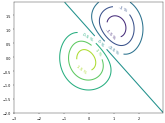

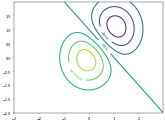

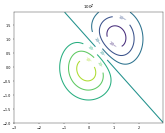

In [61]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==================
Contour Label Demo
==================

Illustrate some of the more advanced things that one can do with
contour labels.

See also the :doc:`contour demo example
</gallery/images_contours_and_fields/contour_demo>`.
"""

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.ticker as ticker

# %%
# Define our surface

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

# %%
# Make contour labels with custom level formatters


# This custom formatter removes trailing zeros, e.g. "1.0" becomes "1", and
# then adds a percent sign.
def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s} %"


# Basic contour plot
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

ax.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)

# %%
# Label contours with arbitrary strings using a dictionary

fig1, ax1 = plt.subplots()

# Basic contour plot
CS1 = ax1.contour(X, Y, Z)

fmt = {}
strs = ['first', 'second', 'third', 'fourth', 'fifth', 'sixth', 'seventh']
for l, s in zip(CS1.levels, strs):
    fmt[l] = s

# Label every other level using strings
ax1.clabel(CS1, CS1.levels[::2], inline=True, fmt=fmt, fontsize=10)

# %%
# Use a Formatter

fig2, ax2 = plt.subplots()

CS2 = ax2.contour(X, Y, 100**Z, locator=plt.LogLocator())
fmt = ticker.LogFormatterMathtext()
fmt.create_dummy_axis()
ax2.clabel(CS2, CS2.levels, fmt=fmt)
ax2.set_title("$100^Z$")

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.contour` / `matplotlib.pyplot.contour`
#    - `matplotlib.axes.Axes.clabel` / `matplotlib.pyplot.clabel`
#    - `matplotlib.ticker.LogFormatterMathtext`
#    - `matplotlib.ticker.TickHelper.create_dummy_axis`


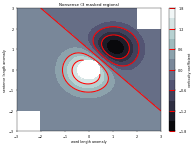

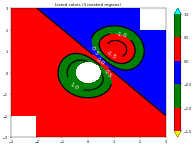

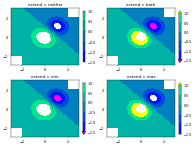

In [62]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=============
Contourf demo
=============

How to use the `.axes.Axes.contourf` method to create filled contour plots.
"""
import matplotlib.pyplot as plt
import numpy as np

origin = 'lower'

delta = 0.025

x = y = np.arange(-3.0, 3.01, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

nr, nc = Z.shape

# put NaNs in one corner:
Z[-nr // 6:, -nc // 6:] = np.nan
# contourf will convert these to masked


Z = np.ma.array(Z)
# mask another corner:
Z[:nr // 6, :nc // 6] = np.ma.masked

# mask a circle in the middle:
interior = np.sqrt(X**2 + Y**2) < 0.5
Z[interior] = np.ma.masked

# %%
# Automatic contour levels
# ------------------------
# We are using automatic selection of contour levels; this is usually not such
# a good idea, because they don't occur on nice boundaries, but we do it here
# for purposes of illustration.

fig1, ax2 = plt.subplots(layout='constrained')
CS = ax2.contourf(X, Y, Z, 10, cmap=plt.cm.bone, origin=origin)

# Note that in the following, we explicitly pass in a subset of the contour
# levels used for the filled contours.  Alternatively, we could pass in
# additional levels to provide extra resolution, or leave out the *levels*
# keyword argument to use all of the original levels.

CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='r', origin=origin)

ax2.set_title('Nonsense (3 masked regions)')
ax2.set_xlabel('word length anomaly')
ax2.set_ylabel('sentence length anomaly')

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('verbosity coefficient')
# Add the contour line levels to the colorbar
cbar.add_lines(CS2)

# %%
# Explicit contour levels
# -----------------------
# Now make a contour plot with the levels specified, and with the colormap
# generated automatically from a list of colors.

fig2, ax2 = plt.subplots(layout='constrained')
levels = [-1.5, -1, -0.5, 0, 0.5, 1]
CS3 = ax2.contourf(X, Y, Z, levels,
                   colors=('r', 'g', 'b'),
                   origin=origin,
                   extend='both')
# Our data range extends outside the range of levels; make
# data below the lowest contour level yellow, and above the
# highest level cyan:
CS3.cmap.set_under('yellow')
CS3.cmap.set_over('cyan')

CS4 = ax2.contour(X, Y, Z, levels,
                  colors=('k',),
                  linewidths=(3,),
                  origin=origin)
ax2.set_title('Listed colors (3 masked regions)')
ax2.clabel(CS4, fmt='%2.1f', colors='w', fontsize=14)

# Notice that the colorbar gets all the information it
# needs from the ContourSet object, CS3.
fig2.colorbar(CS3)

# %%
# Extension settings
# ------------------
# Illustrate all 4 possible "extend" settings:
extends = ["neither", "both", "min", "max"]
cmap = plt.colormaps["winter"].with_extremes(under="magenta", over="yellow")
# Note: contouring simply excludes masked or nan regions, so
# instead of using the "bad" colormap value for them, it draws
# nothing at all in them.  Therefore, the following would have
# no effect:
# cmap.set_bad("red")

fig, axs = plt.subplots(2, 2, layout="constrained")

for ax, extend in zip(axs.flat, extends):
    cs = ax.contourf(X, Y, Z, levels, cmap=cmap, extend=extend, origin=origin)
    fig.colorbar(cs, ax=ax, shrink=0.9)
    ax.set_title("extend = %s" % extend)
    ax.locator_params(nbins=4)

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.contour` / `matplotlib.pyplot.contour`
#    - `matplotlib.axes.Axes.contourf` / `matplotlib.pyplot.contourf`
#    - `matplotlib.axes.Axes.clabel` / `matplotlib.pyplot.clabel`
#    - `matplotlib.figure.Figure.colorbar` / `matplotlib.pyplot.colorbar`
#    - `matplotlib.colors.Colormap`
#    - `matplotlib.colors.Colormap.set_bad`
#    - `matplotlib.colors.Colormap.set_under`
#    - `matplotlib.colors.Colormap.set_over`


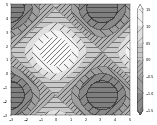

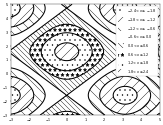

In [63]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=================
Contourf Hatching
=================

Demo filled contour plots with hatched patterns.
"""
import matplotlib.pyplot as plt
import numpy as np

# invent some numbers, turning the x and y arrays into simple
# 2d arrays, which make combining them together easier.
x = np.linspace(-3, 5, 150).reshape(1, -1)
y = np.linspace(-3, 5, 120).reshape(-1, 1)
z = np.cos(x) + np.sin(y)

# we no longer need x and y to be 2 dimensional, so flatten them.
x, y = x.flatten(), y.flatten()

# %%
# Plot 1: the simplest hatched plot with a colorbar

fig1, ax1 = plt.subplots()
cs = ax1.contourf(x, y, z, hatches=['-', '/', '\\', '//'],
                  cmap='gray', extend='both', alpha=0.5)
fig1.colorbar(cs)

# %%
# Plot 2: a plot of hatches without color with a legend

fig2, ax2 = plt.subplots()
n_levels = 6
ax2.contour(x, y, z, n_levels, colors='black', linestyles='-')
cs = ax2.contourf(x, y, z, n_levels, colors='none',
                  hatches=['.', '/', '\\', None, '\\\\', '*'],
                  extend='lower')

# create a legend for the contour set
artists, labels = cs.legend_elements(str_format='{:2.1f}'.format)
ax2.legend(artists, labels, handleheight=2, framealpha=1)
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.contour` / `matplotlib.pyplot.contour`
#    - `matplotlib.axes.Axes.contourf` / `matplotlib.pyplot.contourf`
#    - `matplotlib.figure.Figure.colorbar` / `matplotlib.pyplot.colorbar`
#    - `matplotlib.axes.Axes.legend` / `matplotlib.pyplot.legend`
#    - `matplotlib.contour.ContourSet`
#    - `matplotlib.contour.ContourSet.legend_elements`


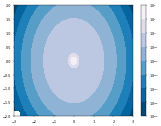

In [64]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
============================
Contourf and log color scale
============================

Demonstrate use of a log color scale in contourf
"""

import matplotlib.pyplot as plt
import numpy as np
from numpy import ma

from matplotlib import cm, ticker

N = 100
x = np.linspace(-3.0, 3.0, N)
y = np.linspace(-2.0, 2.0, N)

X, Y = np.meshgrid(x, y)

# A low hump with a spike coming out.
# Needs to have z/colour axis on a log scale, so we see both hump and spike.
# A linear scale only shows the spike.
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X * 10)**2 - (Y * 10)**2)
z = Z1 + 50 * Z2

# Put in some negative values (lower left corner) to cause trouble with logs:
z[:5, :5] = -1

# The following is not strictly essential, but it will eliminate
# a warning.  Comment it out to see the warning.
z = ma.masked_where(z <= 0, z)


# Automatic selection of levels works; setting the
# log locator tells contourf to use a log scale:
fig, ax = plt.subplots()
cs = ax.contourf(X, Y, z, locator=ticker.LogLocator(), cmap=cm.PuBu_r)

# Alternatively, you can manually set the levels
# and the norm:
# lev_exp = np.arange(np.floor(np.log10(z.min())-1),
#                    np.ceil(np.log10(z.max())+1))
# levs = np.power(10, lev_exp)
# cs = ax.contourf(X, Y, z, levs, norm=colors.LogNorm())

cbar = fig.colorbar(cs)

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.contourf` / `matplotlib.pyplot.contourf`
#    - `matplotlib.figure.Figure.colorbar` / `matplotlib.pyplot.colorbar`
#    - `matplotlib.axes.Axes.legend` / `matplotlib.pyplot.legend`
#    - `matplotlib.ticker.LogLocator`


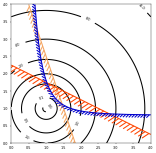

In [65]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==============================================
Contouring the solution space of optimizations
==============================================

Contour plotting is particularly handy when illustrating the solution
space of optimization problems.  Not only can `.axes.Axes.contour` be
used to represent the topography of the objective function, it can be
used to generate boundary curves of the constraint functions.  The
constraint lines can be drawn with
`~matplotlib.patheffects.TickedStroke` to distinguish the valid and
invalid sides of the constraint boundaries.

`.axes.Axes.contour` generates curves with larger values to the left
of the contour.  The angle parameter is measured zero ahead with
increasing values to the left.  Consequently, when using
`~matplotlib.patheffects.TickedStroke` to illustrate a constraint in
a typical optimization problem, the angle should be set between
zero and 180 degrees.

"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import patheffects

fig, ax = plt.subplots(figsize=(6, 6))

nx = 101
ny = 105

# Set up survey vectors
xvec = np.linspace(0.001, 4.0, nx)
yvec = np.linspace(0.001, 4.0, ny)

# Set up survey matrices.  Design disk loading and gear ratio.
x1, x2 = np.meshgrid(xvec, yvec)

# Evaluate some stuff to plot
obj = x1**2 + x2**2 - 2*x1 - 2*x2 + 2
g1 = -(3*x1 + x2 - 5.5)
g2 = -(x1 + 2*x2 - 4.5)
g3 = 0.8 + x1**-3 - x2

cntr = ax.contour(x1, x2, obj, [0.01, 0.1, 0.5, 1, 2, 4, 8, 16],
                  colors='black')
ax.clabel(cntr, fmt="%2.1f", use_clabeltext=True)

cg1 = ax.contour(x1, x2, g1, [0], colors='sandybrown')
plt.setp(cg1.collections,
         path_effects=[patheffects.withTickedStroke(angle=135)])

cg2 = ax.contour(x1, x2, g2, [0], colors='orangered')
plt.setp(cg2.collections,
         path_effects=[patheffects.withTickedStroke(angle=60, length=2)])

cg3 = ax.contour(x1, x2, g3, [0], colors='mediumblue')
plt.setp(cg3.collections,
         path_effects=[patheffects.withTickedStroke(spacing=7)])

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

plt.show()


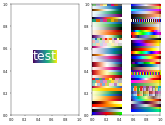

In [66]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==============
BboxImage Demo
==============

A `~matplotlib.image.BboxImage` can be used to position an image according to
a bounding box. This demo shows how to show an image inside a `.text.Text`'s
bounding box as well as how to manually create a bounding box for the image.
"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.image import BboxImage
from matplotlib.transforms import Bbox, TransformedBbox

fig, (ax1, ax2) = plt.subplots(ncols=2)

# ----------------------------
# Create a BboxImage with Text
# ----------------------------
txt = ax1.text(0.5, 0.5, "test", size=30, ha="center", color="w")
ax1.add_artist(
    BboxImage(txt.get_window_extent, data=np.arange(256).reshape((1, -1))))

# ------------------------------------
# Create a BboxImage for each colormap
# ------------------------------------
# List of all colormaps; skip reversed colormaps.
cmap_names = sorted(m for m in plt.colormaps if not m.endswith("_r"))

ncol = 2
nrow = len(cmap_names) // ncol + 1

xpad_fraction = 0.3
dx = 1 / (ncol + xpad_fraction * (ncol - 1))

ypad_fraction = 0.3
dy = 1 / (nrow + ypad_fraction * (nrow - 1))

for i, cmap_name in enumerate(cmap_names):
    ix, iy = divmod(i, nrow)
    bbox0 = Bbox.from_bounds(ix*dx*(1+xpad_fraction),
                             1 - iy*dy*(1+ypad_fraction) - dy,
                             dx, dy)
    bbox = TransformedBbox(bbox0, ax2.transAxes)
    ax2.add_artist(
        BboxImage(bbox, cmap=cmap_name, data=np.arange(256).reshape((1, -1))))

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.image.BboxImage`
#    - `matplotlib.transforms.Bbox`
#    - `matplotlib.transforms.TransformedBbox`
#    - `matplotlib.text.Text`


In [67]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=============
Figimage Demo
=============

This illustrates placing images directly in the figure, with no Axes objects.

"""
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
Z = np.arange(10000).reshape((100, 100))
Z[:, 50:] = 1

im1 = fig.figimage(Z, xo=50, yo=0, origin='lower')
im2 = fig.figimage(Z, xo=100, yo=100, alpha=.8, origin='lower')

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.figure.Figure`
#    - `matplotlib.figure.Figure.figimage` / `matplotlib.pyplot.figimage`


<Figure size 192x144 with 0 Axes>

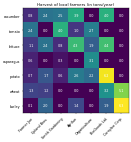

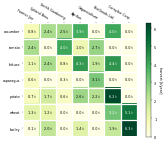

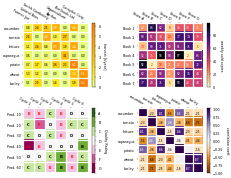

In [68]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===========================
Creating annotated heatmaps
===========================

It is often desirable to show data which depends on two independent
variables as a color coded image plot. This is often referred to as a
heatmap. If the data is categorical, this would be called a categorical
heatmap.

Matplotlib's `~matplotlib.axes.Axes.imshow` function makes
production of such plots particularly easy.

The following examples show how to create a heatmap with annotations.
We will start with an easy example and expand it to be usable as a
universal function.
"""


# %%
#
# A simple categorical heatmap
# ----------------------------
#
# We may start by defining some data. What we need is a 2D list or array
# which defines the data to color code. We then also need two lists or arrays
# of categories; of course the number of elements in those lists
# need to match the data along the respective axes.
# The heatmap itself is an `~matplotlib.axes.Axes.imshow` plot
# with the labels set to the categories we have.
# Note that it is important to set both, the tick locations
# (`~matplotlib.axes.Axes.set_xticks`) as well as the
# tick labels (`~matplotlib.axes.Axes.set_xticklabels`),
# otherwise they would become out of sync. The locations are just
# the ascending integer numbers, while the ticklabels are the labels to show.
# Finally, we can label the data itself by creating a `~matplotlib.text.Text`
# within each cell showing the value of that cell.


import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib as mpl

# sphinx_gallery_thumbnail_number = 2

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(farmers)), labels=farmers)
ax.set_yticks(np.arange(len(vegetables)), labels=vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()


# %%
# Using the helper function code style
# ------------------------------------
#
# As discussed in the :ref:`Coding styles <coding_styles>`
# one might want to reuse such code to create some kind of heatmap
# for different input data and/or on different axes.
# We create a function that takes the data and the row and column labels as
# input, and allows arguments that are used to customize the plot
#
# Here, in addition to the above we also want to create a colorbar and
# position the labels above of the heatmap instead of below it.
# The annotations shall get different colors depending on a threshold
# for better contrast against the pixel color.
# Finally, we turn the surrounding axes spines off and create
# a grid of white lines to separate the cells.


def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts


# %%
# The above now allows us to keep the actual plot creation pretty compact.
#

fig, ax = plt.subplots()

im, cbar = heatmap(harvest, vegetables, farmers, ax=ax,
                   cmap="YlGn", cbarlabel="harvest [t/year]")
texts = annotate_heatmap(im, valfmt="{x:.1f} t")

fig.tight_layout()
plt.show()


# %%
# Some more complex heatmap examples
# ----------------------------------
#
# In the following we show the versatility of the previously created
# functions by applying it in different cases and using different arguments.
#

np.random.seed(19680801)

fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 6))

# Replicate the above example with a different font size and colormap.

im, _ = heatmap(harvest, vegetables, farmers, ax=ax,
                cmap="Wistia", cbarlabel="harvest [t/year]")
annotate_heatmap(im, valfmt="{x:.1f}", size=7)

# Create some new data, give further arguments to imshow (vmin),
# use an integer format on the annotations and provide some colors.

data = np.random.randint(2, 100, size=(7, 7))
y = [f"Book {i}" for i in range(1, 8)]
x = [f"Store {i}" for i in list("ABCDEFG")]
im, _ = heatmap(data, y, x, ax=ax2, vmin=0,
                cmap="magma_r", cbarlabel="weekly sold copies")
annotate_heatmap(im, valfmt="{x:d}", size=7, threshold=20,
                 textcolors=("red", "white"))

# Sometimes even the data itself is categorical. Here we use a
# `matplotlib.colors.BoundaryNorm` to get the data into classes
# and use this to colorize the plot, but also to obtain the class
# labels from an array of classes.

data = np.random.randn(6, 6)
y = [f"Prod. {i}" for i in range(10, 70, 10)]
x = [f"Cycle {i}" for i in range(1, 7)]

qrates = list("ABCDEFG")
norm = matplotlib.colors.BoundaryNorm(np.linspace(-3.5, 3.5, 8), 7)
fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: qrates[::-1][norm(x)])

im, _ = heatmap(data, y, x, ax=ax3,
                cmap=mpl.colormaps["PiYG"].resampled(7), norm=norm,
                cbar_kw=dict(ticks=np.arange(-3, 4), format=fmt),
                cbarlabel="Quality Rating")

annotate_heatmap(im, valfmt=fmt, size=9, fontweight="bold", threshold=-1,
                 textcolors=("red", "black"))

# We can nicely plot a correlation matrix. Since this is bound by -1 and 1,
# we use those as vmin and vmax. We may also remove leading zeros and hide
# the diagonal elements (which are all 1) by using a
# `matplotlib.ticker.FuncFormatter`.

corr_matrix = np.corrcoef(harvest)
im, _ = heatmap(corr_matrix, vegetables, vegetables, ax=ax4,
                cmap="PuOr", vmin=-1, vmax=1,
                cbarlabel="correlation coeff.")


def func(x, pos):
    return f"{x:.2f}".replace("0.", ".").replace("1.00", "")

annotate_heatmap(im, valfmt=matplotlib.ticker.FuncFormatter(func), size=7)


plt.tight_layout()
plt.show()


# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.imshow` / `matplotlib.pyplot.imshow`
#    - `matplotlib.figure.Figure.colorbar` / `matplotlib.pyplot.colorbar`


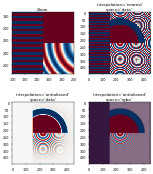

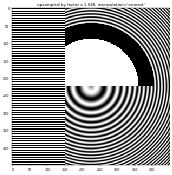

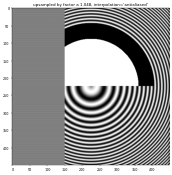

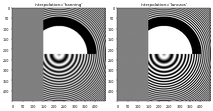

In [69]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==================
Image antialiasing
==================

Images are represented by discrete pixels, either on the screen or in an
image file.  When data that makes up the image has a different resolution
than its representation on the screen we will see aliasing effects.  How
noticeable these are depends on how much down-sampling takes place in
the change of resolution (if any).

When subsampling data, aliasing is reduced by smoothing first and then
subsampling the smoothed data.  In Matplotlib, we can do that
smoothing before mapping the data to colors, or we can do the smoothing
on the RGB(A) data in the final image.  The differences between these are
shown below, and controlled with the *interpolation_stage* keyword argument.

The default image interpolation in Matplotlib is 'antialiased', and
it is applied to the data.  This uses a
hanning interpolation on the data provided by the user for reduced aliasing
in most situations. Only when there is upsampling by a factor of 1, 2 or
>=3 is 'nearest' neighbor interpolation used.

Other anti-aliasing filters can be specified in `.Axes.imshow` using the
*interpolation* keyword argument.
"""

import matplotlib.pyplot as plt
import numpy as np

# %%
# First we generate a 450x450 pixel image with varying frequency content:
N = 450
x = np.arange(N) / N - 0.5
y = np.arange(N) / N - 0.5
aa = np.ones((N, N))
aa[::2, :] = -1

X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
f0 = 5
k = 100
a = np.sin(np.pi * 2 * (f0 * R + k * R**2 / 2))
# make the left hand side of this
a[:int(N / 2), :][R[:int(N / 2), :] < 0.4] = -1
a[:int(N / 2), :][R[:int(N / 2), :] < 0.3] = 1
aa[:, int(N / 3):] = a[:, int(N / 3):]
a = aa
# %%
# The following images are subsampled from 450 data pixels to either
# 125 pixels or 250 pixels (depending on your display).
# The Moiré patterns in the 'nearest' interpolation are caused by the
# high-frequency data being subsampled.  The 'antialiased' imaged
# still has some Moiré patterns as well, but they are greatly reduced.
#
# There are substantial differences between the 'data' interpolation and
# the 'rgba' interpolation.  The alternating bands of red and blue on the
# left third of the image are subsampled.  By interpolating in 'data' space
# (the default) the antialiasing filter makes the stripes close to white,
# because the average of -1 and +1 is zero, and zero is white in this
# colormap.
#
# Conversely, when the anti-aliasing occurs in 'rgba' space, the red and
# blue are combined visually to make purple.  This behaviour is more like a
# typical image processing package, but note that purple is not in the
# original colormap, so it is no longer possible to invert individual
# pixels back to their data value.

fig, axs = plt.subplots(2, 2, figsize=(5, 6), layout='constrained')
axs[0, 0].imshow(a, interpolation='nearest', cmap='RdBu_r')
axs[0, 0].set_xlim(100, 200)
axs[0, 0].set_ylim(275, 175)
axs[0, 0].set_title('Zoom')

for ax, interp, space in zip(axs.flat[1:],
                             ['nearest', 'antialiased', 'antialiased'],
                             ['data', 'data', 'rgba']):
    ax.imshow(a, interpolation=interp, interpolation_stage=space,
              cmap='RdBu_r')
    ax.set_title(f"interpolation='{interp}'\nspace='{space}'")
plt.show()

# %%
# Even up-sampling an image with 'nearest' interpolation will lead to Moiré
# patterns when the upsampling factor is not integer. The following image
# upsamples 500 data pixels to 530 rendered pixels. You may note a grid of
# 30 line-like artifacts which stem from the 524 - 500 = 24 extra pixels that
# had to be made up. Since interpolation is 'nearest' they are the same as a
# neighboring line of pixels and thus stretch the image locally so that it
# looks distorted.
fig, ax = plt.subplots(figsize=(6.8, 6.8))
ax.imshow(a, interpolation='nearest', cmap='gray')
ax.set_title("upsampled by factor a 1.048, interpolation='nearest'")
plt.show()

# %%
# Better antialiasing algorithms can reduce this effect:
fig, ax = plt.subplots(figsize=(6.8, 6.8))
ax.imshow(a, interpolation='antialiased', cmap='gray')
ax.set_title("upsampled by factor a 1.048, interpolation='antialiased'")
plt.show()

# %%
# Apart from the default 'hanning' antialiasing, `~.Axes.imshow` supports a
# number of different interpolation algorithms, which may work better or
# worse depending on the pattern.
fig, axs = plt.subplots(1, 2, figsize=(7, 4), layout='constrained')
for ax, interp in zip(axs, ['hanning', 'lanczos']):
    ax.imshow(a, interpolation=interp, cmap='gray')
    ax.set_title(f"interpolation='{interp}'")
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.imshow`


In [70]:
# THIS cbook EXAMPLE WAS REMOVED

In [71]:
# THIS cbook EXAMPLE WAS REMOVED

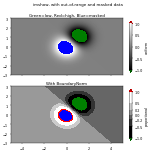

In [72]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
============
Image Masked
============

imshow with masked array input and out-of-range colors.

The second subplot illustrates the use of BoundaryNorm to
get a filled contour effect.
"""

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.colors as colors

# compute some interesting data
x0, x1 = -5, 5
y0, y1 = -3, 3
x = np.linspace(x0, x1, 500)
y = np.linspace(y0, y1, 500)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

# Set up a colormap:
palette = plt.cm.gray.with_extremes(over='r', under='g', bad='b')
# Alternatively, we could use
# palette.set_bad(alpha = 0.0)
# to make the bad region transparent.  This is the default.
# If you comment out all the palette.set* lines, you will see
# all the defaults; under and over will be colored with the
# first and last colors in the palette, respectively.
Zm = np.ma.masked_where(Z > 1.2, Z)

# By setting vmin and vmax in the norm, we establish the
# range to which the regular palette color scale is applied.
# Anything above that range is colored based on palette.set_over, etc.

# set up the Axes objects
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(6, 5.4))

# plot using 'continuous' colormap
im = ax1.imshow(Zm, interpolation='bilinear',
                cmap=palette,
                norm=colors.Normalize(vmin=-1.0, vmax=1.0),
                aspect='auto',
                origin='lower',
                extent=[x0, x1, y0, y1])
ax1.set_title('Green=low, Red=high, Blue=masked')
cbar = fig.colorbar(im, extend='both', shrink=0.9, ax=ax1)
cbar.set_label('uniform')
ax1.tick_params(axis='x', labelbottom=False)

# Plot using a small number of colors, with unevenly spaced boundaries.
im = ax2.imshow(Zm, interpolation='nearest',
                cmap=palette,
                norm=colors.BoundaryNorm([-1, -0.5, -0.2, 0, 0.2, 0.5, 1],
                                         ncolors=palette.N),
                aspect='auto',
                origin='lower',
                extent=[x0, x1, y0, y1])
ax2.set_title('With BoundaryNorm')
cbar = fig.colorbar(im, extend='both', spacing='proportional',
                    shrink=0.9, ax=ax2)
cbar.set_label('proportional')

fig.suptitle('imshow, with out-of-range and masked data')
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.imshow` / `matplotlib.pyplot.imshow`
#    - `matplotlib.figure.Figure.colorbar` / `matplotlib.pyplot.colorbar`
#    - `matplotlib.colors.BoundaryNorm`
#    - `matplotlib.colorbar.Colorbar.set_label`


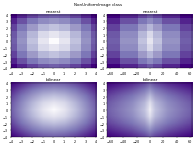

In [73]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
================
Image nonuniform
================

This illustrates the NonUniformImage class.  It is not
available via an Axes method, but it is easily added to an
Axes instance as shown here.
"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.image import NonUniformImage

interp = 'nearest'

# Linear x array for cell centers:
x = np.linspace(-4, 4, 9)

# Highly nonlinear x array:
x2 = x**3

y = np.linspace(-4, 4, 9)

z = np.sqrt(x[np.newaxis, :]**2 + y[:, np.newaxis]**2)

fig, axs = plt.subplots(nrows=2, ncols=2, layout='constrained')
fig.suptitle('NonUniformImage class', fontsize='large')
ax = axs[0, 0]
im = NonUniformImage(ax, interpolation=interp, extent=(-4, 4, -4, 4),
                     cmap=cm.Purples)
im.set_data(x, y, z)
ax.add_image(im)
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_title(interp)

ax = axs[0, 1]
im = NonUniformImage(ax, interpolation=interp, extent=(-64, 64, -4, 4),
                     cmap=cm.Purples)
im.set_data(x2, y, z)
ax.add_image(im)
ax.set_xlim(-64, 64)
ax.set_ylim(-4, 4)
ax.set_title(interp)

interp = 'bilinear'

ax = axs[1, 0]
im = NonUniformImage(ax, interpolation=interp, extent=(-4, 4, -4, 4),
                     cmap=cm.Purples)
im.set_data(x, y, z)
ax.add_image(im)
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_title(interp)

ax = axs[1, 1]
im = NonUniformImage(ax, interpolation=interp, extent=(-64, 64, -4, 4),
                     cmap=cm.Purples)
im.set_data(x2, y, z)
ax.add_image(im)
ax.set_xlim(-64, 64)
ax.set_ylim(-4, 4)
ax.set_title(interp)

plt.show()


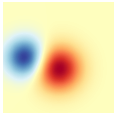

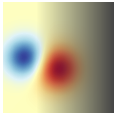

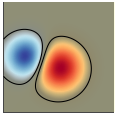

In [74]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==========================================
Blend transparency with color in 2D images
==========================================

Blend transparency with color to highlight parts of data with imshow.

A common use for `matplotlib.pyplot.imshow` is to plot a 2D statistical
map. The function makes it easy to visualize a 2D matrix as an image and add
transparency to the output. For example, one can plot a statistic (such as a
t-statistic) and color the transparency of each pixel according to its p-value.
This example demonstrates how you can achieve this effect.

First we will generate some data, in this case, we'll create two 2D "blobs"
in a 2D grid. One blob will be positive, and the other negative.
"""

import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 3
import numpy as np

from matplotlib.colors import Normalize


def normal_pdf(x, mean, var):
    return np.exp(-(x - mean)**2 / (2*var))


# Generate the space in which the blobs will live
xmin, xmax, ymin, ymax = (0, 100, 0, 100)
n_bins = 100
xx = np.linspace(xmin, xmax, n_bins)
yy = np.linspace(ymin, ymax, n_bins)

# Generate the blobs. The range of the values is roughly -.0002 to .0002
means_high = [20, 50]
means_low = [50, 60]
var = [150, 200]

gauss_x_high = normal_pdf(xx, means_high[0], var[0])
gauss_y_high = normal_pdf(yy, means_high[1], var[0])

gauss_x_low = normal_pdf(xx, means_low[0], var[1])
gauss_y_low = normal_pdf(yy, means_low[1], var[1])

weights = (np.outer(gauss_y_high, gauss_x_high)
           - np.outer(gauss_y_low, gauss_x_low))

# We'll also create a grey background into which the pixels will fade
greys = np.full((*weights.shape, 3), 70, dtype=np.uint8)

# First we'll plot these blobs using ``imshow`` without transparency.
vmax = np.abs(weights).max()
imshow_kwargs = {
    'vmax': vmax,
    'vmin': -vmax,
    'cmap': 'RdYlBu',
    'extent': (xmin, xmax, ymin, ymax),
}

fig, ax = plt.subplots()
ax.imshow(greys)
ax.imshow(weights, **imshow_kwargs)
ax.set_axis_off()

# %%
# Blending in transparency
# ========================
#
# The simplest way to include transparency when plotting data with
# `matplotlib.pyplot.imshow` is to pass an array matching the shape of
# the data to the ``alpha`` argument. For example, we'll create a gradient
# moving from left to right below.

# Create an alpha channel of linearly increasing values moving to the right.
alphas = np.ones(weights.shape)
alphas[:, 30:] = np.linspace(1, 0, 70)

# Create the figure and image
# Note that the absolute values may be slightly different
fig, ax = plt.subplots()
ax.imshow(greys)
ax.imshow(weights, alpha=alphas, **imshow_kwargs)
ax.set_axis_off()

# %%
# Using transparency to highlight values with high amplitude
# ==========================================================
#
# Finally, we'll recreate the same plot, but this time we'll use transparency
# to highlight the extreme values in the data. This is often used to highlight
# data points with smaller p-values. We'll also add in contour lines to
# highlight the image values.

# Create an alpha channel based on weight values
# Any value whose absolute value is > .0001 will have zero transparency
alphas = Normalize(0, .3, clip=True)(np.abs(weights))
alphas = np.clip(alphas, .4, 1)  # alpha value clipped at the bottom at .4

# Create the figure and image
# Note that the absolute values may be slightly different
fig, ax = plt.subplots()
ax.imshow(greys)
ax.imshow(weights, alpha=alphas, **imshow_kwargs)

# Add contour lines to further highlight different levels.
ax.contour(weights[::-1], levels=[-.1, .1], colors='k', linestyles='-')
ax.set_axis_off()
plt.show()

ax.contour(weights[::-1], levels=[-.0001, .0001], colors='k', linestyles='-')
ax.set_axis_off()
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.imshow` / `matplotlib.pyplot.imshow`
#    - `matplotlib.axes.Axes.contour` / `matplotlib.pyplot.contour`
#    - `matplotlib.colors.Normalize`
#    - `matplotlib.axes.Axes.set_axis_off`


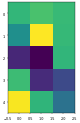

In [75]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==================================
Modifying the coordinate formatter
==================================

Modify the coordinate formatter to report the image "z" value of the nearest
pixel given x and y.  This functionality is built in by default; this example
just showcases how to customize the `~.axes.Axes.format_coord` function.
"""

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


X = 10*np.random.rand(5, 3)

fig, ax = plt.subplots()
ax.imshow(X)


def format_coord(x, y):
    col = round(x)
    row = round(y)
    nrows, ncols = X.shape
    if 0 <= col < ncols and 0 <= row < nrows:
        z = X[row, col]
        return f'x={x:1.4f}, y={y:1.4f}, z={z:1.4f}'
    else:
        return f'x={x:1.4f}, y={y:1.4f}'


ax.format_coord = format_coord
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.format_coord`
#    - `matplotlib.axes.Axes.imshow`


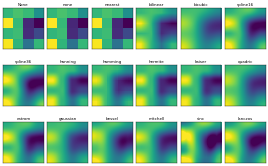

In [76]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=========================
Interpolations for imshow
=========================

This example displays the difference between interpolation methods for
`~.axes.Axes.imshow`.

If *interpolation* is None, it defaults to the :rc:`image.interpolation`.
If the interpolation is ``'none'``, then no interpolation is performed for the
Agg, ps and pdf backends. Other backends will default to ``'antialiased'``.

For the Agg, ps and pdf backends, ``interpolation='none'`` works well when a
big image is scaled down, while ``interpolation='nearest'`` works well when
a small image is scaled up.

See :doc:`/gallery/images_contours_and_fields/image_antialiasing` for a
discussion on the default ``interpolation='antialiased'`` option.
"""

import matplotlib.pyplot as plt
import numpy as np

methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

# Fixing random state for reproducibility
np.random.seed(19680801)

grid = np.random.rand(4, 4)

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))

plt.tight_layout()
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.imshow` / `matplotlib.pyplot.imshow`


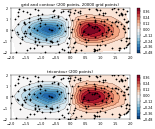

In [77]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=======================================
Contour plot of irregularly spaced data
=======================================

Comparison of a contour plot of irregularly spaced data interpolated
on a regular grid versus a tricontour plot for an unstructured triangular grid.

Since `~.axes.Axes.contour` and `~.axes.Axes.contourf` expect the data to live
on a regular grid, plotting a contour plot of irregularly spaced data requires
different methods. The two options are:

* Interpolate the data to a regular grid first. This can be done with on-board
  means, e.g. via `~.tri.LinearTriInterpolator` or using external functionality
  e.g. via `scipy.interpolate.griddata`. Then plot the interpolated data with
  the usual `~.axes.Axes.contour`.
* Directly use `~.axes.Axes.tricontour` or `~.axes.Axes.tricontourf` which will
  perform a triangulation internally.

This example shows both methods in action.
"""

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.tri as tri

np.random.seed(19680801)
npts = 200
ngridx = 100
ngridy = 200
x = np.random.uniform(-2, 2, npts)
y = np.random.uniform(-2, 2, npts)
z = x * np.exp(-x**2 - y**2)

fig, (ax1, ax2) = plt.subplots(nrows=2)

# -----------------------
# Interpolation on a grid
# -----------------------
# A contour plot of irregularly spaced data coordinates
# via interpolation on a grid.

# Create grid values first.
xi = np.linspace(-2.1, 2.1, ngridx)
yi = np.linspace(-2.1, 2.1, ngridy)

# Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

# Note that scipy.interpolate provides means to interpolate data on a grid
# as well. The following would be an alternative to the four lines above:
# from scipy.interpolate import griddata
# zi = griddata((x, y), z, (xi[None, :], yi[:, None]), method='linear')

ax1.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
cntr1 = ax1.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")

fig.colorbar(cntr1, ax=ax1)
ax1.plot(x, y, 'ko', ms=3)
ax1.set(xlim=(-2, 2), ylim=(-2, 2))
ax1.set_title('grid and contour (%d points, %d grid points)' %
              (npts, ngridx * ngridy))

# ----------
# Tricontour
# ----------
# Directly supply the unordered, irregularly spaced coordinates
# to tricontour.

ax2.tricontour(x, y, z, levels=14, linewidths=0.5, colors='k')
cntr2 = ax2.tricontourf(x, y, z, levels=14, cmap="RdBu_r")

fig.colorbar(cntr2, ax=ax2)
ax2.plot(x, y, 'ko', ms=3)
ax2.set(xlim=(-2, 2), ylim=(-2, 2))
ax2.set_title('tricontour (%d points)' % npts)

plt.subplots_adjust(hspace=0.5)
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.contour` / `matplotlib.pyplot.contour`
#    - `matplotlib.axes.Axes.contourf` / `matplotlib.pyplot.contourf`
#    - `matplotlib.axes.Axes.tricontour` / `matplotlib.pyplot.tricontour`
#    - `matplotlib.axes.Axes.tricontourf` / `matplotlib.pyplot.tricontourf`


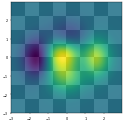

In [78]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
============
Layer Images
============

Layer images above one another using alpha blending
"""
import matplotlib.pyplot as plt
import numpy as np


def func3(x, y):
    return (1 - x / 2 + x**5 + y**3) * np.exp(-(x**2 + y**2))


# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

x = np.arange(-3.0, 3.0, dx)
y = np.arange(-3.0, 3.0, dy)
X, Y = np.meshgrid(x, y)

# when layering multiple images, the images need to have the same
# extent.  This does not mean they need to have the same shape, but
# they both need to render to the same coordinate system determined by
# xmin, xmax, ymin, ymax.  Note if you use different interpolations
# for the images their apparent extent could be different due to
# interpolation edge effects

extent = np.min(x), np.max(x), np.min(y), np.max(y)
fig = plt.figure(frameon=False)

Z1 = np.add.outer(range(8), range(8)) % 2  # chessboard
im1 = plt.imshow(Z1, cmap=plt.cm.gray, interpolation='nearest',
                 extent=extent)

Z2 = func3(X, Y)

im2 = plt.imshow(Z2, cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear',
                 extent=extent)

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.imshow` / `matplotlib.pyplot.imshow`


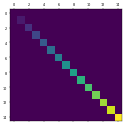

In [79]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===============================
Visualize matrices with matshow
===============================

`~.axes.Axes.matshow` visualizes a 2D matrix or array as color-coded image.
"""
import matplotlib.pyplot as plt
import numpy as np

# a 2D array with linearly increasing values on the diagonal
a = np.diag(range(15))

plt.matshow(a)

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.imshow` / `matplotlib.pyplot.imshow`


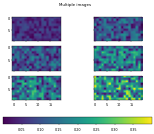

In [80]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===============
Multiple images
===============

Make a set of images with a single colormap, norm, and colorbar.
"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import colors

np.random.seed(19680801)
Nr = 3
Nc = 2

fig, axs = plt.subplots(Nr, Nc)
fig.suptitle('Multiple images')

images = []
for i in range(Nr):
    for j in range(Nc):
        # Generate data with a range that varies from one plot to the next.
        data = ((1 + i + j) / 10) * np.random.rand(10, 20)
        images.append(axs[i, j].imshow(data))
        axs[i, j].label_outer()

# Find the min and max of all colors for use in setting the color scale.
vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)

fig.colorbar(images[0], ax=axs, orientation='horizontal', fraction=.1)


# Make images respond to changes in the norm of other images (e.g. via the
# "edit axis, curves and images parameters" GUI on Qt), but be careful not to
# recurse infinitely!
def update(changed_image):
    for im in images:
        if (changed_image.get_cmap() != im.get_cmap()
                or changed_image.get_clim() != im.get_clim()):
            im.set_cmap(changed_image.get_cmap())
            im.set_clim(changed_image.get_clim())


for im in images:
    im.callbacks.connect('changed', update)

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.imshow` / `matplotlib.pyplot.imshow`
#    - `matplotlib.figure.Figure.colorbar` / `matplotlib.pyplot.colorbar`
#    - `matplotlib.colors.Normalize`
#    - `matplotlib.cm.ScalarMappable.set_cmap`
#    - `matplotlib.cm.ScalarMappable.set_norm`
#    - `matplotlib.cm.ScalarMappable.set_clim`
#    - `matplotlib.cbook.CallbackRegistry.connect`


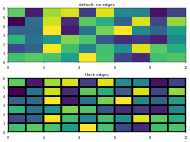

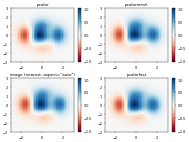

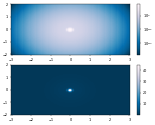

In [81]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===========
Pcolor demo
===========

Generating images with `~.axes.Axes.pcolor`.

Pcolor allows you to generate 2D image-style plots. Below we will show how
to do so in Matplotlib.
"""
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import LogNorm

# Fixing random state for reproducibility
np.random.seed(19680801)

# %%
# A simple pcolor demo
# --------------------

Z = np.random.rand(6, 10)

fig, (ax0, ax1) = plt.subplots(2, 1)

c = ax0.pcolor(Z)
ax0.set_title('default: no edges')

c = ax1.pcolor(Z, edgecolors='k', linewidths=4)
ax1.set_title('thick edges')

fig.tight_layout()
plt.show()

# %%
# Comparing pcolor with similar functions
# ---------------------------------------
#
# Demonstrates similarities between `~.axes.Axes.pcolor`,
# `~.axes.Axes.pcolormesh`, `~.axes.Axes.imshow` and
# `~.axes.Axes.pcolorfast` for drawing quadrilateral grids.
# Note that we call ``imshow`` with ``aspect="auto"`` so that it doesn't force
# the data pixels to be square (the default is ``aspect="equal"``).

# make these smaller to increase the resolution
dx, dy = 0.15, 0.05

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[-3:3+dy:dy, -3:3+dx:dx]
z = (1 - x/2 + x**5 + y**3) * np.exp(-x**2 - y**2)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
z_min, z_max = -abs(z).max(), abs(z).max()

fig, axs = plt.subplots(2, 2)

ax = axs[0, 0]
c = ax.pcolor(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('pcolor')
fig.colorbar(c, ax=ax)

ax = axs[0, 1]
c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('pcolormesh')
fig.colorbar(c, ax=ax)

ax = axs[1, 0]
c = ax.imshow(z, cmap='RdBu', vmin=z_min, vmax=z_max,
              extent=[x.min(), x.max(), y.min(), y.max()],
              interpolation='nearest', origin='lower', aspect='auto')
ax.set_title('image (nearest, aspect="auto")')
fig.colorbar(c, ax=ax)

ax = axs[1, 1]
c = ax.pcolorfast(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('pcolorfast')
fig.colorbar(c, ax=ax)

fig.tight_layout()
plt.show()


# %%
# Pcolor with a log scale
# -----------------------
#
# The following shows pcolor plots with a log scale.

N = 100
X, Y = np.meshgrid(np.linspace(-3, 3, N), np.linspace(-2, 2, N))

# A low hump with a spike coming out.
# Needs to have z/colour axis on a log scale, so we see both hump and spike.
# A linear scale only shows the spike.
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X * 10)**2 - (Y * 10)**2)
Z = Z1 + 50 * Z2

fig, (ax0, ax1) = plt.subplots(2, 1)

c = ax0.pcolor(X, Y, Z, shading='auto',
               norm=LogNorm(vmin=Z.min(), vmax=Z.max()), cmap='PuBu_r')
fig.colorbar(c, ax=ax0)

c = ax1.pcolor(X, Y, Z, cmap='PuBu_r', shading='auto')
fig.colorbar(c, ax=ax1)

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.pcolor` / `matplotlib.pyplot.pcolor`
#    - `matplotlib.axes.Axes.pcolormesh` / `matplotlib.pyplot.pcolormesh`
#    - `matplotlib.axes.Axes.pcolorfast`
#    - `matplotlib.axes.Axes.imshow` / `matplotlib.pyplot.imshow`
#    - `matplotlib.figure.Figure.colorbar` / `matplotlib.pyplot.colorbar`
#    - `matplotlib.colors.LogNorm`


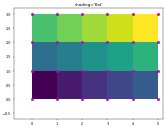

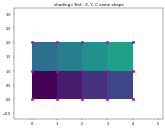

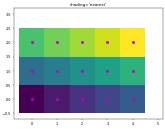

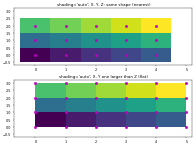

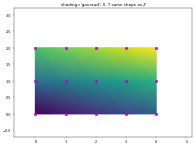

In [82]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
============================
pcolormesh grids and shading
============================

`.axes.Axes.pcolormesh` and `~.axes.Axes.pcolor` have a few options for
how grids are laid out and the shading between the grid points.

Generally, if *Z* has shape *(M, N)* then the grid *X* and *Y* can be
specified with either shape *(M+1, N+1)* or *(M, N)*, depending on the
argument for the ``shading`` keyword argument.  Note that below we specify
vectors *x* as either length N or N+1 and *y* as length M or M+1, and
`~.axes.Axes.pcolormesh` internally makes the mesh matrices *X* and *Y* from
the input vectors.

"""

import matplotlib.pyplot as plt
import numpy as np

# %%
# Flat Shading
# ------------
#
# The grid specification with the least assumptions is ``shading='flat'``
# and if the grid is one larger than the data in each dimension, i.e. has shape
# *(M+1, N+1)*.  In that case *X* and *Y* specify the corners of quadrilaterals
# that are colored with the values in *Z*. Here we specify the edges of the
# *(3, 5)* quadrilaterals with *X* and *Y* that are *(4, 6)*.

nrows = 3
ncols = 5
Z = np.arange(nrows * ncols).reshape(nrows, ncols)
x = np.arange(ncols + 1)
y = np.arange(nrows + 1)

fig, ax = plt.subplots()
ax.pcolormesh(x, y, Z, shading='flat', vmin=Z.min(), vmax=Z.max())


def _annotate(ax, x, y, title):
    # this all gets repeated below:
    X, Y = np.meshgrid(x, y)
    ax.plot(X.flat, Y.flat, 'o', color='m')
    ax.set_xlim(-0.7, 5.2)
    ax.set_ylim(-0.7, 3.2)
    ax.set_title(title)

_annotate(ax, x, y, "shading='flat'")


# %%
# Flat Shading, same shape grid
# -----------------------------
#
# Often, however, data is provided where *X* and *Y* match the shape of *Z*.
# While this makes sense for other ``shading`` types, it is not permitted
# when ``shading='flat'``. Historically, Matplotlib silently dropped the last
# row and column of *Z* in this case, to match Matlab's behavior. If this
# behavior is still desired, simply drop the last row and column manually:

x = np.arange(ncols)  # note *not* ncols + 1 as before
y = np.arange(nrows)
fig, ax = plt.subplots()
ax.pcolormesh(x, y, Z[:-1, :-1], shading='flat', vmin=Z.min(), vmax=Z.max())
_annotate(ax, x, y, "shading='flat': X, Y, C same shape")

# %%
# Nearest Shading, same shape grid
# --------------------------------
#
# Usually, dropping a row and column of data is not what the user means when
# they make *X*, *Y* and *Z* all the same shape.  For this case, Matplotlib
# allows ``shading='nearest'`` and centers the colored quadrilaterals on the
# grid points.
#
# If a grid that is not the correct shape is passed with ``shading='nearest'``
# an error is raised.

fig, ax = plt.subplots()
ax.pcolormesh(x, y, Z, shading='nearest', vmin=Z.min(), vmax=Z.max())
_annotate(ax, x, y, "shading='nearest'")

# %%
# Auto Shading
# ------------
#
# It's possible that the user would like the code to automatically choose which
# to use, in this case ``shading='auto'`` will decide whether to use 'flat' or
# 'nearest' shading based on the shapes of *X*, *Y* and *Z*.

fig, axs = plt.subplots(2, 1, layout='constrained')
ax = axs[0]
x = np.arange(ncols)
y = np.arange(nrows)
ax.pcolormesh(x, y, Z, shading='auto', vmin=Z.min(), vmax=Z.max())
_annotate(ax, x, y, "shading='auto'; X, Y, Z: same shape (nearest)")

ax = axs[1]
x = np.arange(ncols + 1)
y = np.arange(nrows + 1)
ax.pcolormesh(x, y, Z, shading='auto', vmin=Z.min(), vmax=Z.max())
_annotate(ax, x, y, "shading='auto'; X, Y one larger than Z (flat)")

# %%
# Gouraud Shading
# ---------------
#
# `Gouraud shading <https://en.wikipedia.org/wiki/Gouraud_shading>`_ can also
# be specified, where the color in the quadrilaterals is linearly interpolated
# between the grid points.  The shapes of *X*, *Y*, *Z* must be the same.

fig, ax = plt.subplots(layout='constrained')
x = np.arange(ncols)
y = np.arange(nrows)
ax.pcolormesh(x, y, Z, shading='gouraud', vmin=Z.min(), vmax=Z.max())
_annotate(ax, x, y, "shading='gouraud'; X, Y same shape as Z")

plt.show()
# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.pcolormesh` / `matplotlib.pyplot.pcolormesh`


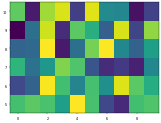

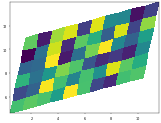

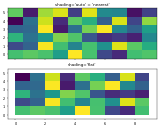

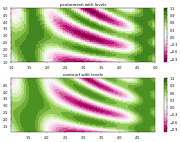

In [83]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==========
pcolormesh
==========

`.axes.Axes.pcolormesh` allows you to generate 2D image-style plots.
Note that it is faster than the similar `~.axes.Axes.pcolor`.

"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

# %%
# Basic pcolormesh
# ----------------
#
# We usually specify a pcolormesh by defining the edge of quadrilaterals and
# the value of the quadrilateral.  Note that here *x* and *y* each have one
# extra element than Z in the respective dimension.

np.random.seed(19680801)
Z = np.random.rand(6, 10)
x = np.arange(-0.5, 10, 1)  # len = 11
y = np.arange(4.5, 11, 1)  # len = 7

fig, ax = plt.subplots()
ax.pcolormesh(x, y, Z)

# %%
# Non-rectilinear pcolormesh
# --------------------------
#
# Note that we can also specify matrices for *X* and *Y* and have
# non-rectilinear quadrilaterals.

x = np.arange(-0.5, 10, 1)  # len = 11
y = np.arange(4.5, 11, 1)  # len = 7
X, Y = np.meshgrid(x, y)
X = X + 0.2 * Y  # tilt the coordinates.
Y = Y + 0.3 * X

fig, ax = plt.subplots()
ax.pcolormesh(X, Y, Z)

# %%
# Centered Coordinates
# ---------------------
#
# Often a user wants to pass *X* and *Y* with the same sizes as *Z* to
# `.axes.Axes.pcolormesh`. This is also allowed if ``shading='auto'`` is
# passed (default set by :rc:`pcolor.shading`). Pre Matplotlib 3.3,
# ``shading='flat'`` would drop the last column and row of *Z*, but now gives
# an error. If this is really what you want, then simply drop the last row and
# column of Z manually:

x = np.arange(10)  # len = 10
y = np.arange(6)  # len = 6
X, Y = np.meshgrid(x, y)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
axs[0].pcolormesh(X, Y, Z, vmin=np.min(Z), vmax=np.max(Z), shading='auto')
axs[0].set_title("shading='auto' = 'nearest'")
axs[1].pcolormesh(X, Y, Z[:-1, :-1], vmin=np.min(Z), vmax=np.max(Z),
                  shading='flat')
axs[1].set_title("shading='flat'")

# %%
# Making levels using Norms
# -------------------------
#
# Shows how to combine Normalization and Colormap instances to draw
# "levels" in `.axes.Axes.pcolor`, `.axes.Axes.pcolormesh`
# and `.axes.Axes.imshow` type plots in a similar
# way to the levels keyword argument to contour/contourf.

# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(1, 5 + dy, dy),
                slice(1, 5 + dx, dx)]

z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())


# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.colormaps['PiYG']
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax0, ax1) = plt.subplots(nrows=2)

im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')


# contours are *point* based plots, so convert our bound into point
# centers
cf = ax1.contourf(x[:-1, :-1] + dx/2.,
                  y[:-1, :-1] + dy/2., z, levels=levels,
                  cmap=cmap)
fig.colorbar(cf, ax=ax1)
ax1.set_title('contourf with levels')

# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
fig.tight_layout()

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.pcolormesh` / `matplotlib.pyplot.pcolormesh`
#    - `matplotlib.axes.Axes.contourf` / `matplotlib.pyplot.contourf`
#    - `matplotlib.figure.Figure.colorbar` / `matplotlib.pyplot.colorbar`
#    - `matplotlib.colors.BoundaryNorm`
#    - `matplotlib.ticker.MaxNLocator`


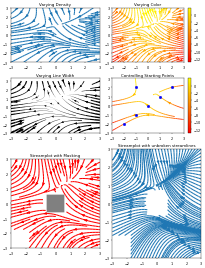

In [84]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==========
Streamplot
==========

A stream plot, or streamline plot, is used to display 2D vector fields. This
example shows a few features of the `~.axes.Axes.streamplot` function:

* Varying the color along a streamline.
* Varying the density of streamlines.
* Varying the line width along a streamline.
* Controlling the starting points of streamlines.
* Streamlines skipping masked regions and NaN values.
* Unbroken streamlines even when exceeding the limit of lines within a single
  grid cell.
"""
import matplotlib.pyplot as plt
import numpy as np

w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U**2 + V**2)

fig, axs = plt.subplots(3, 2, figsize=(7, 9), height_ratios=[1, 1, 2])
axs = axs.flat

#  Varying density along a streamline
axs[0].streamplot(X, Y, U, V, density=[0.5, 1])
axs[0].set_title('Varying Density')

# Varying color along a streamline
strm = axs[1].streamplot(X, Y, U, V, color=U, linewidth=2, cmap='autumn')
fig.colorbar(strm.lines)
axs[1].set_title('Varying Color')

#  Varying line width along a streamline
lw = 5*speed / speed.max()
axs[2].streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)
axs[2].set_title('Varying Line Width')

# Controlling the starting points of the streamlines
seed_points = np.array([[-2, -1, 0, 1, 2, -1], [-2, -1,  0, 1, 2, 2]])

strm = axs[3].streamplot(X, Y, U, V, color=U, linewidth=2,
                         cmap='autumn', start_points=seed_points.T)
fig.colorbar(strm.lines)
axs[3].set_title('Controlling Starting Points')

# Displaying the starting points with blue symbols.
axs[3].plot(seed_points[0], seed_points[1], 'bo')
axs[3].set(xlim=(-w, w), ylim=(-w, w))

# Create a mask
mask = np.zeros(U.shape, dtype=bool)
mask[40:60, 40:60] = True
U[:20, :20] = np.nan
U = np.ma.array(U, mask=mask)

axs[4].streamplot(X, Y, U, V, color='r')
axs[4].set_title('Streamplot with Masking')

axs[4].imshow(~mask, extent=(-w, w, -w, w), alpha=0.5, cmap='gray',
              aspect='auto')
axs[4].set_aspect('equal')

axs[5].streamplot(X, Y, U, V, broken_streamlines=False)
axs[5].set_title('Streamplot with unbroken streamlines')

plt.tight_layout()
plt.show()
# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.streamplot` / `matplotlib.pyplot.streamplot`
#    - `matplotlib.gridspec.GridSpec`


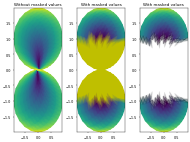

In [85]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=============
QuadMesh Demo
=============

`~.axes.Axes.pcolormesh` uses a `~matplotlib.collections.QuadMesh`,
a faster generalization of `~.axes.Axes.pcolor`, but with some restrictions.

This demo illustrates a bug in quadmesh with masked data.
"""

import numpy as np

from matplotlib import pyplot as plt

n = 12
x = np.linspace(-1.5, 1.5, n)
y = np.linspace(-1.5, 1.5, n * 2)
X, Y = np.meshgrid(x, y)
Qx = np.cos(Y) - np.cos(X)
Qz = np.sin(Y) + np.sin(X)
Z = np.sqrt(X**2 + Y**2) / 5
Z = (Z - Z.min()) / (Z.max() - Z.min())

# The color array can include masked values.
Zm = np.ma.masked_where(np.abs(Qz) < 0.5 * np.max(Qz), Z)

fig, axs = plt.subplots(nrows=1, ncols=3)
axs[0].pcolormesh(Qx, Qz, Z, shading='gouraud')
axs[0].set_title('Without masked values')

# You can control the color of the masked region.
cmap = plt.colormaps[plt.rcParams['image.cmap']].with_extremes(bad='y')
axs[1].pcolormesh(Qx, Qz, Zm, shading='gouraud', cmap=cmap)
axs[1].set_title('With masked values')

# Or use the default, which is transparent.
axs[2].pcolormesh(Qx, Qz, Zm, shading='gouraud')
axs[2].set_title('With masked values')

fig.tight_layout()
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.pcolormesh` / `matplotlib.pyplot.pcolormesh`


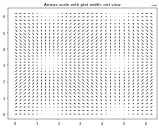

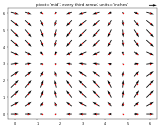

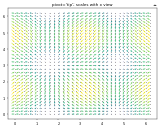

In [86]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=======================================
Advanced quiver and quiverkey functions
=======================================

Demonstrates some more advanced options for `~.axes.Axes.quiver`.  For a simple
example refer to :doc:`/gallery/images_contours_and_fields/quiver_simple_demo`.

Note: The plot autoscaling does not take into account the arrows, so
those on the boundaries may reach out of the picture.  This is not an easy
problem to solve in a perfectly general way.  The recommended workaround is to
manually set the Axes limits in such a case.
"""

import matplotlib.pyplot as plt
import numpy as np

X, Y = np.meshgrid(np.arange(0, 2 * np.pi, .2), np.arange(0, 2 * np.pi, .2))
U = np.cos(X)
V = np.sin(Y)

# %%

fig1, ax1 = plt.subplots()
ax1.set_title('Arrows scale with plot width, not view')
Q = ax1.quiver(X, Y, U, V, units='width')
qk = ax1.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')

# %%

fig2, ax2 = plt.subplots()
ax2.set_title("pivot='mid'; every third arrow; units='inches'")
Q = ax2.quiver(X[::3, ::3], Y[::3, ::3], U[::3, ::3], V[::3, ::3],
               pivot='mid', units='inches')
qk = ax2.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
ax2.scatter(X[::3, ::3], Y[::3, ::3], color='r', s=5)

# %%

# sphinx_gallery_thumbnail_number = 3

fig3, ax3 = plt.subplots()
ax3.set_title("pivot='tip'; scales with x view")
M = np.hypot(U, V)
Q = ax3.quiver(X, Y, U, V, M, units='x', pivot='tip', width=0.022,
               scale=1 / 0.15)
qk = ax3.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
ax3.scatter(X, Y, color='0.5', s=1)

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.quiver` / `matplotlib.pyplot.quiver`
#    - `matplotlib.axes.Axes.quiverkey` / `matplotlib.pyplot.quiverkey`


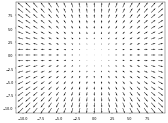

In [87]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==================
Quiver Simple Demo
==================

A simple example of a `~.axes.Axes.quiver` plot with a `~.axes.Axes.quiverkey`.

For more advanced options refer to
:doc:`/gallery/images_contours_and_fields/quiver_demo`.
"""
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(-10, 10, 1)
Y = np.arange(-10, 10, 1)
U, V = np.meshgrid(X, Y)

fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V)
ax.quiverkey(q, X=0.3, Y=1.1, U=10,
             label='Quiver key, length = 10', labelpos='E')

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.quiver` / `matplotlib.pyplot.quiver`
#    - `matplotlib.axes.Axes.quiverkey` / `matplotlib.pyplot.quiverkey`


In [88]:
# THIS cbook EXAMPLE WAS REMOVED

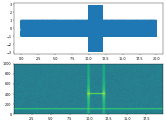

In [89]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
================
Spectrogram Demo
================

Demo of a spectrogram plot (`~.axes.Axes.specgram`).
"""
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

dt = 0.0005
t = np.arange(0.0, 20.0, dt)
s1 = np.sin(2 * np.pi * 100 * t)
s2 = 2 * np.sin(2 * np.pi * 400 * t)

# create a transient "chirp"
s2[t <= 10] = s2[12 <= t] = 0

# add some noise into the mix
nse = 0.01 * np.random.random(size=len(t))

x = s1 + s2 + nse  # the signal
NFFT = 1024  # the length of the windowing segments
Fs = int(1.0 / dt)  # the sampling frequency

fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.plot(t, x)
Pxx, freqs, bins, im = ax2.specgram(x, NFFT=NFFT, Fs=Fs, noverlap=900)
# The `specgram` method returns 4 objects. They are:
# - Pxx: the periodogram
# - freqs: the frequency vector
# - bins: the centers of the time bins
# - im: the .image.AxesImage instance representing the data in the plot
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.specgram` / `matplotlib.pyplot.specgram`


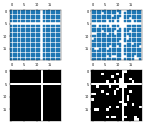

In [90]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=========
Spy Demos
=========

Plot the sparsity pattern of arrays.
"""

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, axs = plt.subplots(2, 2)
ax1 = axs[0, 0]
ax2 = axs[0, 1]
ax3 = axs[1, 0]
ax4 = axs[1, 1]

x = np.random.randn(20, 20)
x[5, :] = 0.
x[:, 12] = 0.

ax1.spy(x, markersize=5)
ax2.spy(x, precision=0.1, markersize=5)

ax3.spy(x)
ax4.spy(x, precision=0.1)

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.spy` / `matplotlib.pyplot.spy`


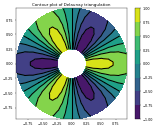

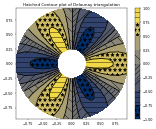

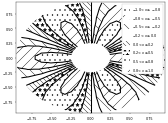

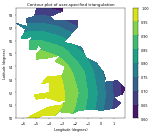

In [91]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===============
Tricontour Demo
===============

Contour plots of unstructured triangular grids.
"""
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.tri as tri

# %%
# Creating a Triangulation without specifying the triangles results in the
# Delaunay triangulation of the points.

# First create the x and y coordinates of the points.
n_angles = 48
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles

x = (radii * np.cos(angles)).flatten()
y = (radii * np.sin(angles)).flatten()
z = (np.cos(radii) * np.cos(3 * angles)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
                         y[triang.triangles].mean(axis=1))
                < min_radius)

# %%
# pcolor plot.

fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
tcf = ax1.tricontourf(triang, z)
fig1.colorbar(tcf)
ax1.tricontour(triang, z, colors='k')
ax1.set_title('Contour plot of Delaunay triangulation')


# %%
# You could also specify hatching patterns along with different cmaps.

fig2, ax2 = plt.subplots()
ax2.set_aspect("equal")
tcf = ax2.tricontourf(
    triang,
    z,
    hatches=["*", "-", "/", "//", "\\", None],
    cmap="cividis"
)
fig2.colorbar(tcf)
ax2.tricontour(triang, z, linestyles="solid", colors="k", linewidths=2.0)
ax2.set_title("Hatched Contour plot of Delaunay triangulation")

# %%
# You could also generate hatching patterns labeled with no color.

fig3, ax3 = plt.subplots()
n_levels = 7
tcf = ax3.tricontourf(
    triang,
    z,
    n_levels,
    colors="none",
    hatches=[".", "/", "\\", None, "\\\\", "*"],
)
ax3.tricontour(triang, z, n_levels, colors="black", linestyles="-")


# create a legend for the contour set
artists, labels = tcf.legend_elements(str_format="{:2.1f}".format)
ax3.legend(artists, labels, handleheight=2, framealpha=1)

# %%
# You can specify your own triangulation rather than perform a Delaunay
# triangulation of the points, where each triangle is given by the indices of
# the three points that make up the triangle, ordered in either a clockwise or
# anticlockwise manner.

xy = np.asarray([
    [-0.101, 0.872], [-0.080, 0.883], [-0.069, 0.888], [-0.054, 0.890],
    [-0.045, 0.897], [-0.057, 0.895], [-0.073, 0.900], [-0.087, 0.898],
    [-0.090, 0.904], [-0.069, 0.907], [-0.069, 0.921], [-0.080, 0.919],
    [-0.073, 0.928], [-0.052, 0.930], [-0.048, 0.942], [-0.062, 0.949],
    [-0.054, 0.958], [-0.069, 0.954], [-0.087, 0.952], [-0.087, 0.959],
    [-0.080, 0.966], [-0.085, 0.973], [-0.087, 0.965], [-0.097, 0.965],
    [-0.097, 0.975], [-0.092, 0.984], [-0.101, 0.980], [-0.108, 0.980],
    [-0.104, 0.987], [-0.102, 0.993], [-0.115, 1.001], [-0.099, 0.996],
    [-0.101, 1.007], [-0.090, 1.010], [-0.087, 1.021], [-0.069, 1.021],
    [-0.052, 1.022], [-0.052, 1.017], [-0.069, 1.010], [-0.064, 1.005],
    [-0.048, 1.005], [-0.031, 1.005], [-0.031, 0.996], [-0.040, 0.987],
    [-0.045, 0.980], [-0.052, 0.975], [-0.040, 0.973], [-0.026, 0.968],
    [-0.020, 0.954], [-0.006, 0.947], [ 0.003, 0.935], [ 0.006, 0.926],
    [ 0.005, 0.921], [ 0.022, 0.923], [ 0.033, 0.912], [ 0.029, 0.905],
    [ 0.017, 0.900], [ 0.012, 0.895], [ 0.027, 0.893], [ 0.019, 0.886],
    [ 0.001, 0.883], [-0.012, 0.884], [-0.029, 0.883], [-0.038, 0.879],
    [-0.057, 0.881], [-0.062, 0.876], [-0.078, 0.876], [-0.087, 0.872],
    [-0.030, 0.907], [-0.007, 0.905], [-0.057, 0.916], [-0.025, 0.933],
    [-0.077, 0.990], [-0.059, 0.993]])
x = np.degrees(xy[:, 0])
y = np.degrees(xy[:, 1])
x0 = -5
y0 = 52
z = np.exp(-0.01 * ((x - x0) ** 2 + (y - y0) ** 2))

triangles = np.asarray([
    [67, 66,  1], [65,  2, 66], [ 1, 66,  2], [64,  2, 65], [63,  3, 64],
    [60, 59, 57], [ 2, 64,  3], [ 3, 63,  4], [ 0, 67,  1], [62,  4, 63],
    [57, 59, 56], [59, 58, 56], [61, 60, 69], [57, 69, 60], [ 4, 62, 68],
    [ 6,  5,  9], [61, 68, 62], [69, 68, 61], [ 9,  5, 70], [ 6,  8,  7],
    [ 4, 70,  5], [ 8,  6,  9], [56, 69, 57], [69, 56, 52], [70, 10,  9],
    [54, 53, 55], [56, 55, 53], [68, 70,  4], [52, 56, 53], [11, 10, 12],
    [69, 71, 68], [68, 13, 70], [10, 70, 13], [51, 50, 52], [13, 68, 71],
    [52, 71, 69], [12, 10, 13], [71, 52, 50], [71, 14, 13], [50, 49, 71],
    [49, 48, 71], [14, 16, 15], [14, 71, 48], [17, 19, 18], [17, 20, 19],
    [48, 16, 14], [48, 47, 16], [47, 46, 16], [16, 46, 45], [23, 22, 24],
    [21, 24, 22], [17, 16, 45], [20, 17, 45], [21, 25, 24], [27, 26, 28],
    [20, 72, 21], [25, 21, 72], [45, 72, 20], [25, 28, 26], [44, 73, 45],
    [72, 45, 73], [28, 25, 29], [29, 25, 31], [43, 73, 44], [73, 43, 40],
    [72, 73, 39], [72, 31, 25], [42, 40, 43], [31, 30, 29], [39, 73, 40],
    [42, 41, 40], [72, 33, 31], [32, 31, 33], [39, 38, 72], [33, 72, 38],
    [33, 38, 34], [37, 35, 38], [34, 38, 35], [35, 37, 36]])

# %%
# Rather than create a Triangulation object, can simply pass x, y and triangles
# arrays to tripcolor directly.  It would be better to use a Triangulation
# object if the same triangulation was to be used more than once to save
# duplicated calculations.

fig4, ax4 = plt.subplots()
ax4.set_aspect('equal')
tcf = ax4.tricontourf(x, y, triangles, z)
fig4.colorbar(tcf)
ax4.set_title('Contour plot of user-specified triangulation')
ax4.set_xlabel('Longitude (degrees)')
ax4.set_ylabel('Latitude (degrees)')

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.tricontourf` / `matplotlib.pyplot.tricontourf`
#    - `matplotlib.tri.Triangulation`
#    - `matplotlib.figure.Figure.colorbar` / `matplotlib.pyplot.colorbar`
#    - `matplotlib.axes.Axes.legend` / `matplotlib.pyplot.legend`
#    - `matplotlib.contour.ContourSet.legend_elements`


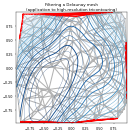

In [92]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==========================
Tricontour Smooth Delaunay
==========================

Demonstrates high-resolution tricontouring of a random set of points;
a `matplotlib.tri.TriAnalyzer` is used to improve the plot quality.

The initial data points and triangular grid for this demo are:

- a set of random points is instantiated, inside [-1, 1] x [-1, 1] square
- A Delaunay triangulation of these points is then computed, of which a
  random subset of triangles is masked out by the user (based on
  *init_mask_frac* parameter). This simulates invalidated data.

The proposed generic procedure to obtain a high resolution contouring of such
a data set is the following:

1. Compute an extended mask with a `matplotlib.tri.TriAnalyzer`, which will
   exclude badly shaped (flat) triangles from the border of the
   triangulation. Apply the mask to the triangulation (using set_mask).
2. Refine and interpolate the data using a `matplotlib.tri.UniformTriRefiner`.
3. Plot the refined data with `~.axes.Axes.tricontour`.

"""
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.tri import TriAnalyzer, Triangulation, UniformTriRefiner


# ----------------------------------------------------------------------------
# Analytical test function
# ----------------------------------------------------------------------------
def experiment_res(x, y):
    """An analytic function representing experiment results."""
    x = 2 * x
    r1 = np.sqrt((0.5 - x)**2 + (0.5 - y)**2)
    theta1 = np.arctan2(0.5 - x, 0.5 - y)
    r2 = np.sqrt((-x - 0.2)**2 + (-y - 0.2)**2)
    theta2 = np.arctan2(-x - 0.2, -y - 0.2)
    z = (4 * (np.exp((r1/10)**2) - 1) * 30 * np.cos(3 * theta1) +
         (np.exp((r2/10)**2) - 1) * 30 * np.cos(5 * theta2) +
         2 * (x**2 + y**2))
    return (np.max(z) - z) / (np.max(z) - np.min(z))

# ----------------------------------------------------------------------------
# Generating the initial data test points and triangulation for the demo
# ----------------------------------------------------------------------------
# User parameters for data test points

# Number of test data points, tested from 3 to 5000 for subdiv=3
n_test = 200

# Number of recursive subdivisions of the initial mesh for smooth plots.
# Values >3 might result in a very high number of triangles for the refine
# mesh: new triangles numbering = (4**subdiv)*ntri
subdiv = 3

# Float > 0. adjusting the proportion of (invalid) initial triangles which will
# be masked out. Enter 0 for no mask.
init_mask_frac = 0.0

# Minimum circle ratio - border triangles with circle ratio below this will be
# masked if they touch a border. Suggested value 0.01; use -1 to keep all
# triangles.
min_circle_ratio = .01

# Random points
random_gen = np.random.RandomState(seed=19680801)
x_test = random_gen.uniform(-1., 1., size=n_test)
y_test = random_gen.uniform(-1., 1., size=n_test)
z_test = experiment_res(x_test, y_test)

# meshing with Delaunay triangulation
tri = Triangulation(x_test, y_test)
ntri = tri.triangles.shape[0]

# Some invalid data are masked out
mask_init = np.zeros(ntri, dtype=bool)
masked_tri = random_gen.randint(0, ntri, int(ntri * init_mask_frac))
mask_init[masked_tri] = True
tri.set_mask(mask_init)


# ----------------------------------------------------------------------------
# Improving the triangulation before high-res plots: removing flat triangles
# ----------------------------------------------------------------------------
# masking badly shaped triangles at the border of the triangular mesh.
mask = TriAnalyzer(tri).get_flat_tri_mask(min_circle_ratio)
tri.set_mask(mask)

# refining the data
refiner = UniformTriRefiner(tri)
tri_refi, z_test_refi = refiner.refine_field(z_test, subdiv=subdiv)

# analytical 'results' for comparison
z_expected = experiment_res(tri_refi.x, tri_refi.y)

# for the demo: loading the 'flat' triangles for plot
flat_tri = Triangulation(x_test, y_test)
flat_tri.set_mask(~mask)


# ----------------------------------------------------------------------------
# Now the plots
# ----------------------------------------------------------------------------
# User options for plots
plot_tri = True          # plot of base triangulation
plot_masked_tri = True   # plot of excessively flat excluded triangles
plot_refi_tri = False    # plot of refined triangulation
plot_expected = False    # plot of analytical function values for comparison


# Graphical options for tricontouring
levels = np.arange(0., 1., 0.025)

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_title("Filtering a Delaunay mesh\n"
             "(application to high-resolution tricontouring)")

# 1) plot of the refined (computed) data contours:
ax.tricontour(tri_refi, z_test_refi, levels=levels, cmap='Blues',
              linewidths=[2.0, 0.5, 1.0, 0.5])
# 2) plot of the expected (analytical) data contours (dashed):
if plot_expected:
    ax.tricontour(tri_refi, z_expected, levels=levels, cmap='Blues',
                  linestyles='--')
# 3) plot of the fine mesh on which interpolation was done:
if plot_refi_tri:
    ax.triplot(tri_refi, color='0.97')
# 4) plot of the initial 'coarse' mesh:
if plot_tri:
    ax.triplot(tri, color='0.7')
# 4) plot of the unvalidated triangles from naive Delaunay Triangulation:
if plot_masked_tri:
    ax.triplot(flat_tri, color='red')

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.tricontour` / `matplotlib.pyplot.tricontour`
#    - `matplotlib.axes.Axes.tricontourf` / `matplotlib.pyplot.tricontourf`
#    - `matplotlib.axes.Axes.triplot` / `matplotlib.pyplot.triplot`
#    - `matplotlib.tri`
#    - `matplotlib.tri.Triangulation`
#    - `matplotlib.tri.TriAnalyzer`
#    - `matplotlib.tri.UniformTriRefiner`


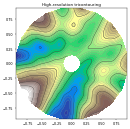

In [93]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
======================
Tricontour Smooth User
======================

Demonstrates high-resolution tricontouring on user-defined triangular grids
with `matplotlib.tri.UniformTriRefiner`.
"""
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.tri as tri


# ----------------------------------------------------------------------------
# Analytical test function
# ----------------------------------------------------------------------------
def function_z(x, y):
    r1 = np.sqrt((0.5 - x)**2 + (0.5 - y)**2)
    theta1 = np.arctan2(0.5 - x, 0.5 - y)
    r2 = np.sqrt((-x - 0.2)**2 + (-y - 0.2)**2)
    theta2 = np.arctan2(-x - 0.2, -y - 0.2)
    z = -(2 * (np.exp((r1 / 10)**2) - 1) * 30. * np.cos(7. * theta1) +
          (np.exp((r2 / 10)**2) - 1) * 30. * np.cos(11. * theta2) +
          0.7 * (x**2 + y**2))
    return (np.max(z) - z) / (np.max(z) - np.min(z))

# ----------------------------------------------------------------------------
# Creating a Triangulation
# ----------------------------------------------------------------------------
# First create the x and y coordinates of the points.
n_angles = 20
n_radii = 10
min_radius = 0.15
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles

x = (radii * np.cos(angles)).flatten()
y = (radii * np.sin(angles)).flatten()
z = function_z(x, y)

# Now create the Triangulation.
# (Creating a Triangulation without specifying the triangles results in the
# Delaunay triangulation of the points.)
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
                         y[triang.triangles].mean(axis=1))
                < min_radius)

# ----------------------------------------------------------------------------
# Refine data
# ----------------------------------------------------------------------------
refiner = tri.UniformTriRefiner(triang)
tri_refi, z_test_refi = refiner.refine_field(z, subdiv=3)

# ----------------------------------------------------------------------------
# Plot the triangulation and the high-res iso-contours
# ----------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.triplot(triang, lw=0.5, color='white')

levels = np.arange(0., 1., 0.025)
ax.tricontourf(tri_refi, z_test_refi, levels=levels, cmap='terrain')
ax.tricontour(tri_refi, z_test_refi, levels=levels,
              colors=['0.25', '0.5', '0.5', '0.5', '0.5'],
              linewidths=[1.0, 0.5, 0.5, 0.5, 0.5])

ax.set_title("High-resolution tricontouring")

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.tricontour` / `matplotlib.pyplot.tricontour`
#    - `matplotlib.axes.Axes.tricontourf` / `matplotlib.pyplot.tricontourf`
#    - `matplotlib.tri`
#    - `matplotlib.tri.Triangulation`
#    - `matplotlib.tri.UniformTriRefiner`


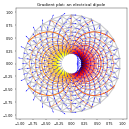

In [94]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
================
Trigradient Demo
================

Demonstrates computation of gradient with
`matplotlib.tri.CubicTriInterpolator`.
"""
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.tri import (CubicTriInterpolator, Triangulation,
                            UniformTriRefiner)


# ----------------------------------------------------------------------------
# Electrical potential of a dipole
# ----------------------------------------------------------------------------
def dipole_potential(x, y):
    """The electric dipole potential V, at position *x*, *y*."""
    r_sq = x**2 + y**2
    theta = np.arctan2(y, x)
    z = np.cos(theta)/r_sq
    return (np.max(z) - z) / (np.max(z) - np.min(z))


# ----------------------------------------------------------------------------
# Creating a Triangulation
# ----------------------------------------------------------------------------
# First create the x and y coordinates of the points.
n_angles = 30
n_radii = 10
min_radius = 0.2
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles

x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
V = dipole_potential(x, y)

# Create the Triangulation; no triangles specified so Delaunay triangulation
# created.
triang = Triangulation(x, y)

# Mask off unwanted triangles.
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
                         y[triang.triangles].mean(axis=1))
                < min_radius)

# ----------------------------------------------------------------------------
# Refine data - interpolates the electrical potential V
# ----------------------------------------------------------------------------
refiner = UniformTriRefiner(triang)
tri_refi, z_test_refi = refiner.refine_field(V, subdiv=3)

# ----------------------------------------------------------------------------
# Computes the electrical field (Ex, Ey) as gradient of electrical potential
# ----------------------------------------------------------------------------
tci = CubicTriInterpolator(triang, -V)
# Gradient requested here at the mesh nodes but could be anywhere else:
(Ex, Ey) = tci.gradient(triang.x, triang.y)
E_norm = np.sqrt(Ex**2 + Ey**2)

# ----------------------------------------------------------------------------
# Plot the triangulation, the potential iso-contours and the vector field
# ----------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.set_aspect('equal')
# Enforce the margins, and enlarge them to give room for the vectors.
ax.use_sticky_edges = False
ax.margins(0.07)

ax.triplot(triang, color='0.8')

levels = np.arange(0., 1., 0.01)
ax.tricontour(tri_refi, z_test_refi, levels=levels, cmap='hot',
              linewidths=[2.0, 1.0, 1.0, 1.0])
# Plots direction of the electrical vector field
ax.quiver(triang.x, triang.y, Ex/E_norm, Ey/E_norm,
          units='xy', scale=10., zorder=3, color='blue',
          width=0.007, headwidth=3., headlength=4.)

ax.set_title('Gradient plot: an electrical dipole')
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.tricontour` / `matplotlib.pyplot.tricontour`
#    - `matplotlib.axes.Axes.triplot` / `matplotlib.pyplot.triplot`
#    - `matplotlib.tri`
#    - `matplotlib.tri.Triangulation`
#    - `matplotlib.tri.CubicTriInterpolator`
#    - `matplotlib.tri.CubicTriInterpolator.gradient`
#    - `matplotlib.tri.UniformTriRefiner`
#    - `matplotlib.axes.Axes.quiver` / `matplotlib.pyplot.quiver`


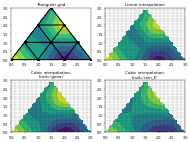

In [95]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==============
Triinterp Demo
==============

Interpolation from triangular grid to quad grid.
"""
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.tri as mtri

# Create triangulation.
x = np.asarray([0, 1, 2, 3, 0.5, 1.5, 2.5, 1, 2, 1.5])
y = np.asarray([0, 0, 0, 0, 1.0, 1.0, 1.0, 2, 2, 3.0])
triangles = [[0, 1, 4], [1, 2, 5], [2, 3, 6], [1, 5, 4], [2, 6, 5], [4, 5, 7],
             [5, 6, 8], [5, 8, 7], [7, 8, 9]]
triang = mtri.Triangulation(x, y, triangles)

# Interpolate to regularly-spaced quad grid.
z = np.cos(1.5 * x) * np.cos(1.5 * y)
xi, yi = np.meshgrid(np.linspace(0, 3, 20), np.linspace(0, 3, 20))

interp_lin = mtri.LinearTriInterpolator(triang, z)
zi_lin = interp_lin(xi, yi)

interp_cubic_geom = mtri.CubicTriInterpolator(triang, z, kind='geom')
zi_cubic_geom = interp_cubic_geom(xi, yi)

interp_cubic_min_E = mtri.CubicTriInterpolator(triang, z, kind='min_E')
zi_cubic_min_E = interp_cubic_min_E(xi, yi)

# Set up the figure
fig, axs = plt.subplots(nrows=2, ncols=2)
axs = axs.flatten()

# Plot the triangulation.
axs[0].tricontourf(triang, z)
axs[0].triplot(triang, 'ko-')
axs[0].set_title('Triangular grid')

# Plot linear interpolation to quad grid.
axs[1].contourf(xi, yi, zi_lin)
axs[1].plot(xi, yi, 'k-', lw=0.5, alpha=0.5)
axs[1].plot(xi.T, yi.T, 'k-', lw=0.5, alpha=0.5)
axs[1].set_title("Linear interpolation")

# Plot cubic interpolation to quad grid, kind=geom
axs[2].contourf(xi, yi, zi_cubic_geom)
axs[2].plot(xi, yi, 'k-', lw=0.5, alpha=0.5)
axs[2].plot(xi.T, yi.T, 'k-', lw=0.5, alpha=0.5)
axs[2].set_title("Cubic interpolation,\nkind='geom'")

# Plot cubic interpolation to quad grid, kind=min_E
axs[3].contourf(xi, yi, zi_cubic_min_E)
axs[3].plot(xi, yi, 'k-', lw=0.5, alpha=0.5)
axs[3].plot(xi.T, yi.T, 'k-', lw=0.5, alpha=0.5)
axs[3].set_title("Cubic interpolation,\nkind='min_E'")

fig.tight_layout()
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.tricontourf` / `matplotlib.pyplot.tricontourf`
#    - `matplotlib.axes.Axes.triplot` / `matplotlib.pyplot.triplot`
#    - `matplotlib.axes.Axes.contourf` / `matplotlib.pyplot.contourf`
#    - `matplotlib.axes.Axes.plot` / `matplotlib.pyplot.plot`
#    - `matplotlib.tri`
#    - `matplotlib.tri.LinearTriInterpolator`
#    - `matplotlib.tri.CubicTriInterpolator`
#    - `matplotlib.tri.Triangulation`


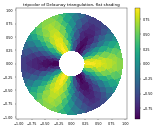

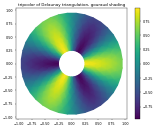

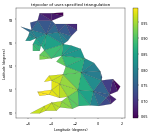

In [96]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==============
Tripcolor Demo
==============

Pseudocolor plots of unstructured triangular grids.
"""
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.tri as tri

# %%
# Creating a Triangulation without specifying the triangles results in the
# Delaunay triangulation of the points.

# First create the x and y coordinates of the points.
n_angles = 36
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles

x = (radii * np.cos(angles)).flatten()
y = (radii * np.sin(angles)).flatten()
z = (np.cos(radii) * np.cos(3 * angles)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
                         y[triang.triangles].mean(axis=1))
                < min_radius)

# %%
# tripcolor plot.

fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
tpc = ax1.tripcolor(triang, z, shading='flat')
fig1.colorbar(tpc)
ax1.set_title('tripcolor of Delaunay triangulation, flat shading')

# %%
# Illustrate Gouraud shading.

fig2, ax2 = plt.subplots()
ax2.set_aspect('equal')
tpc = ax2.tripcolor(triang, z, shading='gouraud')
fig2.colorbar(tpc)
ax2.set_title('tripcolor of Delaunay triangulation, gouraud shading')


# %%
# You can specify your own triangulation rather than perform a Delaunay
# triangulation of the points, where each triangle is given by the indices of
# the three points that make up the triangle, ordered in either a clockwise or
# anticlockwise manner.

xy = np.asarray([
    [-0.101, 0.872], [-0.080, 0.883], [-0.069, 0.888], [-0.054, 0.890],
    [-0.045, 0.897], [-0.057, 0.895], [-0.073, 0.900], [-0.087, 0.898],
    [-0.090, 0.904], [-0.069, 0.907], [-0.069, 0.921], [-0.080, 0.919],
    [-0.073, 0.928], [-0.052, 0.930], [-0.048, 0.942], [-0.062, 0.949],
    [-0.054, 0.958], [-0.069, 0.954], [-0.087, 0.952], [-0.087, 0.959],
    [-0.080, 0.966], [-0.085, 0.973], [-0.087, 0.965], [-0.097, 0.965],
    [-0.097, 0.975], [-0.092, 0.984], [-0.101, 0.980], [-0.108, 0.980],
    [-0.104, 0.987], [-0.102, 0.993], [-0.115, 1.001], [-0.099, 0.996],
    [-0.101, 1.007], [-0.090, 1.010], [-0.087, 1.021], [-0.069, 1.021],
    [-0.052, 1.022], [-0.052, 1.017], [-0.069, 1.010], [-0.064, 1.005],
    [-0.048, 1.005], [-0.031, 1.005], [-0.031, 0.996], [-0.040, 0.987],
    [-0.045, 0.980], [-0.052, 0.975], [-0.040, 0.973], [-0.026, 0.968],
    [-0.020, 0.954], [-0.006, 0.947], [ 0.003, 0.935], [ 0.006, 0.926],
    [ 0.005, 0.921], [ 0.022, 0.923], [ 0.033, 0.912], [ 0.029, 0.905],
    [ 0.017, 0.900], [ 0.012, 0.895], [ 0.027, 0.893], [ 0.019, 0.886],
    [ 0.001, 0.883], [-0.012, 0.884], [-0.029, 0.883], [-0.038, 0.879],
    [-0.057, 0.881], [-0.062, 0.876], [-0.078, 0.876], [-0.087, 0.872],
    [-0.030, 0.907], [-0.007, 0.905], [-0.057, 0.916], [-0.025, 0.933],
    [-0.077, 0.990], [-0.059, 0.993]])
x, y = np.rad2deg(xy).T

triangles = np.asarray([
    [67, 66,  1], [65,  2, 66], [ 1, 66,  2], [64,  2, 65], [63,  3, 64],
    [60, 59, 57], [ 2, 64,  3], [ 3, 63,  4], [ 0, 67,  1], [62,  4, 63],
    [57, 59, 56], [59, 58, 56], [61, 60, 69], [57, 69, 60], [ 4, 62, 68],
    [ 6,  5,  9], [61, 68, 62], [69, 68, 61], [ 9,  5, 70], [ 6,  8,  7],
    [ 4, 70,  5], [ 8,  6,  9], [56, 69, 57], [69, 56, 52], [70, 10,  9],
    [54, 53, 55], [56, 55, 53], [68, 70,  4], [52, 56, 53], [11, 10, 12],
    [69, 71, 68], [68, 13, 70], [10, 70, 13], [51, 50, 52], [13, 68, 71],
    [52, 71, 69], [12, 10, 13], [71, 52, 50], [71, 14, 13], [50, 49, 71],
    [49, 48, 71], [14, 16, 15], [14, 71, 48], [17, 19, 18], [17, 20, 19],
    [48, 16, 14], [48, 47, 16], [47, 46, 16], [16, 46, 45], [23, 22, 24],
    [21, 24, 22], [17, 16, 45], [20, 17, 45], [21, 25, 24], [27, 26, 28],
    [20, 72, 21], [25, 21, 72], [45, 72, 20], [25, 28, 26], [44, 73, 45],
    [72, 45, 73], [28, 25, 29], [29, 25, 31], [43, 73, 44], [73, 43, 40],
    [72, 73, 39], [72, 31, 25], [42, 40, 43], [31, 30, 29], [39, 73, 40],
    [42, 41, 40], [72, 33, 31], [32, 31, 33], [39, 38, 72], [33, 72, 38],
    [33, 38, 34], [37, 35, 38], [34, 38, 35], [35, 37, 36]])

xmid = x[triangles].mean(axis=1)
ymid = y[triangles].mean(axis=1)
x0 = -5
y0 = 52
zfaces = np.exp(-0.01 * ((xmid - x0) * (xmid - x0) +
                         (ymid - y0) * (ymid - y0)))

# %%
# Rather than create a Triangulation object, can simply pass x, y and triangles
# arrays to tripcolor directly.  It would be better to use a Triangulation
# object if the same triangulation was to be used more than once to save
# duplicated calculations.
# Can specify one color value per face rather than one per point by using the
# *facecolors* keyword argument.

fig3, ax3 = plt.subplots()
ax3.set_aspect('equal')
tpc = ax3.tripcolor(x, y, triangles, facecolors=zfaces, edgecolors='k')
fig3.colorbar(tpc)
ax3.set_title('tripcolor of user-specified triangulation')
ax3.set_xlabel('Longitude (degrees)')
ax3.set_ylabel('Latitude (degrees)')

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.tripcolor` / `matplotlib.pyplot.tripcolor`
#    - `matplotlib.tri`
#    - `matplotlib.tri.Triangulation`


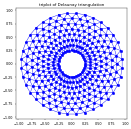

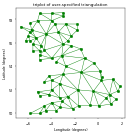

In [97]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
============
Triplot Demo
============

Creating and plotting unstructured triangular grids.
"""
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.tri as tri

# %%
# Creating a Triangulation without specifying the triangles results in the
# Delaunay triangulation of the points.

# First create the x and y coordinates of the points.
n_angles = 36
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles

x = (radii * np.cos(angles)).flatten()
y = (radii * np.sin(angles)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
                         y[triang.triangles].mean(axis=1))
                < min_radius)

# %%
# Plot the triangulation.

fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
ax1.triplot(triang, 'bo-', lw=1)
ax1.set_title('triplot of Delaunay triangulation')


# %%
# You can specify your own triangulation rather than perform a Delaunay
# triangulation of the points, where each triangle is given by the indices of
# the three points that make up the triangle, ordered in either a clockwise or
# anticlockwise manner.

xy = np.asarray([
    [-0.101, 0.872], [-0.080, 0.883], [-0.069, 0.888], [-0.054, 0.890],
    [-0.045, 0.897], [-0.057, 0.895], [-0.073, 0.900], [-0.087, 0.898],
    [-0.090, 0.904], [-0.069, 0.907], [-0.069, 0.921], [-0.080, 0.919],
    [-0.073, 0.928], [-0.052, 0.930], [-0.048, 0.942], [-0.062, 0.949],
    [-0.054, 0.958], [-0.069, 0.954], [-0.087, 0.952], [-0.087, 0.959],
    [-0.080, 0.966], [-0.085, 0.973], [-0.087, 0.965], [-0.097, 0.965],
    [-0.097, 0.975], [-0.092, 0.984], [-0.101, 0.980], [-0.108, 0.980],
    [-0.104, 0.987], [-0.102, 0.993], [-0.115, 1.001], [-0.099, 0.996],
    [-0.101, 1.007], [-0.090, 1.010], [-0.087, 1.021], [-0.069, 1.021],
    [-0.052, 1.022], [-0.052, 1.017], [-0.069, 1.010], [-0.064, 1.005],
    [-0.048, 1.005], [-0.031, 1.005], [-0.031, 0.996], [-0.040, 0.987],
    [-0.045, 0.980], [-0.052, 0.975], [-0.040, 0.973], [-0.026, 0.968],
    [-0.020, 0.954], [-0.006, 0.947], [ 0.003, 0.935], [ 0.006, 0.926],
    [ 0.005, 0.921], [ 0.022, 0.923], [ 0.033, 0.912], [ 0.029, 0.905],
    [ 0.017, 0.900], [ 0.012, 0.895], [ 0.027, 0.893], [ 0.019, 0.886],
    [ 0.001, 0.883], [-0.012, 0.884], [-0.029, 0.883], [-0.038, 0.879],
    [-0.057, 0.881], [-0.062, 0.876], [-0.078, 0.876], [-0.087, 0.872],
    [-0.030, 0.907], [-0.007, 0.905], [-0.057, 0.916], [-0.025, 0.933],
    [-0.077, 0.990], [-0.059, 0.993]])
x = np.degrees(xy[:, 0])
y = np.degrees(xy[:, 1])

triangles = np.asarray([
    [67, 66,  1], [65,  2, 66], [ 1, 66,  2], [64,  2, 65], [63,  3, 64],
    [60, 59, 57], [ 2, 64,  3], [ 3, 63,  4], [ 0, 67,  1], [62,  4, 63],
    [57, 59, 56], [59, 58, 56], [61, 60, 69], [57, 69, 60], [ 4, 62, 68],
    [ 6,  5,  9], [61, 68, 62], [69, 68, 61], [ 9,  5, 70], [ 6,  8,  7],
    [ 4, 70,  5], [ 8,  6,  9], [56, 69, 57], [69, 56, 52], [70, 10,  9],
    [54, 53, 55], [56, 55, 53], [68, 70,  4], [52, 56, 53], [11, 10, 12],
    [69, 71, 68], [68, 13, 70], [10, 70, 13], [51, 50, 52], [13, 68, 71],
    [52, 71, 69], [12, 10, 13], [71, 52, 50], [71, 14, 13], [50, 49, 71],
    [49, 48, 71], [14, 16, 15], [14, 71, 48], [17, 19, 18], [17, 20, 19],
    [48, 16, 14], [48, 47, 16], [47, 46, 16], [16, 46, 45], [23, 22, 24],
    [21, 24, 22], [17, 16, 45], [20, 17, 45], [21, 25, 24], [27, 26, 28],
    [20, 72, 21], [25, 21, 72], [45, 72, 20], [25, 28, 26], [44, 73, 45],
    [72, 45, 73], [28, 25, 29], [29, 25, 31], [43, 73, 44], [73, 43, 40],
    [72, 73, 39], [72, 31, 25], [42, 40, 43], [31, 30, 29], [39, 73, 40],
    [42, 41, 40], [72, 33, 31], [32, 31, 33], [39, 38, 72], [33, 72, 38],
    [33, 38, 34], [37, 35, 38], [34, 38, 35], [35, 37, 36]])

# %%
# Rather than create a Triangulation object, can simply pass x, y and triangles
# arrays to triplot directly.  It would be better to use a Triangulation object
# if the same triangulation was to be used more than once to save duplicated
# calculations.

fig2, ax2 = plt.subplots()
ax2.set_aspect('equal')
ax2.triplot(x, y, triangles, 'go-', lw=1.0)
ax2.set_title('triplot of user-specified triangulation')
ax2.set_xlabel('Longitude (degrees)')
ax2.set_ylabel('Latitude (degrees)')

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.triplot` / `matplotlib.pyplot.triplot`
#    - `matplotlib.tri`
#    - `matplotlib.tri.Triangulation`


In [98]:
# THIS cbook EXAMPLE WAS REMOVED

In [99]:
ChapterConfig.set_chapter_name("03subplots_axes_and_figures")

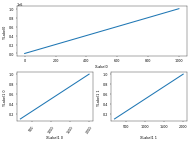

In [100]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===============
Aligning Labels
===============

Aligning xlabel and ylabel using `.Figure.align_xlabels` and
`.Figure.align_ylabels`

`.Figure.align_labels` wraps these two functions.

Note that the xlabel "XLabel1 1" would normally be much closer to the
x-axis, and "YLabel1 0" would be much closer to the y-axis of their
respective axes.
"""
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(2, 2)

ax = fig.add_subplot(gs[0, :])
ax.plot(np.arange(0, 1e6, 1000))
ax.set_ylabel('YLabel0')
ax.set_xlabel('XLabel0')

for i in range(2):
    ax = fig.add_subplot(gs[1, i])
    ax.plot(np.arange(1., 0., -0.1) * 2000., np.arange(1., 0., -0.1))
    ax.set_ylabel('YLabel1 %d' % i)
    ax.set_xlabel('XLabel1 %d' % i)
    if i == 0:
        ax.tick_params(axis='x', rotation=55)
fig.align_labels()  # same as fig.align_xlabels(); fig.align_ylabels()

plt.show()


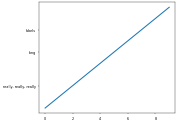

In [101]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===============================================
Programmatically controlling subplot adjustment
===============================================

.. note::

    This example is primarily intended to show some advanced concepts in
    Matplotlib.

    If you are only looking for having enough space for your labels, it is
    almost always simpler and good enough to either set the subplot parameters
    manually using `.Figure.subplots_adjust`, or use one of the automatic
    layout mechanisms
    (:ref:`constrainedlayout_guide` or
    :ref:`tight_layout_guide`).

This example describes a user-defined way to read out Artist sizes and
set the subplot parameters accordingly. Its main purpose is to illustrate
some advanced concepts like reading out text positions, working with
bounding boxes and transforms and using
:ref:`events <event-handling>`. But it can also serve as a starting
point if you want to automate the layouting and need more flexibility than
tight layout and constrained layout.

Below, we collect the bounding boxes of all y-labels and move the left border
of the subplot to the right so that it leaves enough room for the union of all
the bounding boxes.

There's one catch with calculating text bounding boxes:
Querying the text bounding boxes (`.Text.get_window_extent`) needs a
renderer (`.RendererBase` instance), to calculate the text size. This renderer
is only available after the figure has been drawn (`.Figure.draw`).

A solution to this is putting the adjustment logic in a draw callback.
This function is executed after the figure has been drawn. It can now check
if the subplot leaves enough room for the text. If not, the subplot parameters
are updated and second draw is triggered.

.. redirect-from:: /gallery/pyplots/auto_subplots_adjust
"""

import matplotlib.pyplot as plt

import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()
ax.plot(range(10))
ax.set_yticks([2, 5, 7], labels=['really, really, really', 'long', 'labels'])


def on_draw(event):
    bboxes = []
    for label in ax.get_yticklabels():
        # Bounding box in pixels
        bbox_px = label.get_window_extent()
        # Transform to relative figure coordinates. This is the inverse of
        # transFigure.
        bbox_fig = bbox_px.transformed(fig.transFigure.inverted())
        bboxes.append(bbox_fig)
    # the bbox that bounds all the bboxes, again in relative figure coords
    bbox = mtransforms.Bbox.union(bboxes)
    if fig.subplotpars.left < bbox.width:
        # Move the subplot left edge more to the right
        fig.subplots_adjust(left=1.1*bbox.width)  # pad a little
        fig.canvas.draw()


fig.canvas.mpl_connect('draw_event', on_draw)

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.artist.Artist.get_window_extent`
#    - `matplotlib.transforms.Bbox`
#    - `matplotlib.transforms.BboxBase.transformed`
#    - `matplotlib.transforms.BboxBase.union`
#    - `matplotlib.transforms.Transform.inverted`
#    - `matplotlib.figure.Figure.subplots_adjust`
#    - `matplotlib.figure.SubplotParams`
#    - `matplotlib.backend_bases.FigureCanvasBase.mpl_connect`


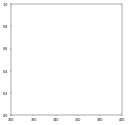

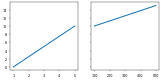

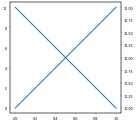

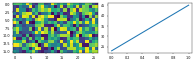

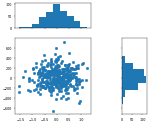

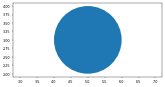

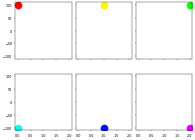

In [102]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===============
Axes box aspect
===============

This demo shows how to set the aspect of an Axes box directly via
`~.Axes.set_box_aspect`. The box aspect is the ratio between axes height
and axes width in physical units, independent of the data limits.
This is useful to e.g. produce a square plot, independent of the data it
contains, or to have a usual plot with the same axes dimensions next to
an image plot with fixed (data-)aspect.

The following lists a few use cases for `~.Axes.set_box_aspect`.
"""

# %%
# A square axes, independent of data
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#
# Produce a square axes, no matter what the data limits are.

import matplotlib.pyplot as plt
import numpy as np

fig1, ax = plt.subplots()

ax.set_xlim(300, 400)
ax.set_box_aspect(1)

plt.show()

# %%
# Shared square axes
# ~~~~~~~~~~~~~~~~~~
#
# Produce shared subplots that are squared in size.
#
fig2, (ax, ax2) = plt.subplots(ncols=2, sharey=True)

ax.plot([1, 5], [0, 10])
ax2.plot([100, 500], [10, 15])

ax.set_box_aspect(1)
ax2.set_box_aspect(1)

plt.show()

# %%
# Square twin axes
# ~~~~~~~~~~~~~~~~
#
# Produce a square axes, with a twin axes. The twinned axes takes over the
# box aspect of the parent.
#

fig3, ax = plt.subplots()

ax2 = ax.twinx()

ax.plot([0, 10])
ax2.plot([12, 10])

ax.set_box_aspect(1)

plt.show()


# %%
# Normal plot next to image
# ~~~~~~~~~~~~~~~~~~~~~~~~~
#
# When creating an image plot with fixed data aspect and the default
# ``adjustable="box"`` next to a normal plot, the axes would be unequal in
# height. `~.Axes.set_box_aspect` provides an easy solution to that by allowing
# to have the normal plot's axes use the images dimensions as box aspect.
#
# This example also shows that *constrained layout* interplays nicely with
# a fixed box aspect.

fig4, (ax, ax2) = plt.subplots(ncols=2, layout="constrained")

np.random.seed(19680801)  # Fixing random state for reproducibility
im = np.random.rand(16, 27)
ax.imshow(im)

ax2.plot([23, 45])
ax2.set_box_aspect(im.shape[0]/im.shape[1])

plt.show()

# %%
# Square joint/marginal plot
# ~~~~~~~~~~~~~~~~~~~~~~~~~~
#
# It may be desirable to show marginal distributions next to a plot of joint
# data. The following creates a square plot with the box aspect of the
# marginal axes being equal to the width- and height-ratios of the gridspec.
# This ensures that all axes align perfectly, independent on the size of the
# figure.

fig5, axs = plt.subplots(2, 2, sharex="col", sharey="row",
                         gridspec_kw=dict(height_ratios=[1, 3],
                                          width_ratios=[3, 1]))
axs[0, 1].set_visible(False)
axs[0, 0].set_box_aspect(1/3)
axs[1, 0].set_box_aspect(1)
axs[1, 1].set_box_aspect(3/1)

np.random.seed(19680801)  # Fixing random state for reproducibility
x, y = np.random.randn(2, 400) * [[.5], [180]]
axs[1, 0].scatter(x, y)
axs[0, 0].hist(x)
axs[1, 1].hist(y, orientation="horizontal")

plt.show()

# %%
# Square joint/marginal plot
# ~~~~~~~~~~~~~~~~~~~~~~~~~~
#
# When setting the box aspect, one may still set the data aspect as well.
# Here we create an Axes with a box twice as long as tall and use an "equal"
# data aspect for its contents, i.e. the circle actually stays circular.

fig6, ax = plt.subplots()

ax.add_patch(plt.Circle((5, 3), 1))
ax.set_aspect("equal", adjustable="datalim")
ax.set_box_aspect(0.5)
ax.autoscale()

plt.show()

# %%
# Box aspect for many subplots
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#
# It is possible to pass the box aspect to an Axes at initialization. The
# following creates a 2 by 3 subplot grid with all square Axes.

fig7, axs = plt.subplots(2, 3, subplot_kw=dict(box_aspect=1),
                         sharex=True, sharey=True, layout="constrained")

for i, ax in enumerate(axs.flat):
    ax.scatter(i % 3, -((i // 3) - 0.5)*200, c=[plt.cm.hsv(i / 6)], s=300)
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.set_box_aspect`


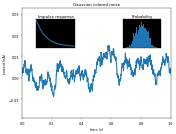

In [103]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=========
Axes Demo
=========

Example use of ``fig.add_axes`` to create inset axes within the main plot axes.

Please see also the :ref:`axes_grid_examples` section, and the following three
examples:

- :doc:`/gallery/subplots_axes_and_figures/zoom_inset_axes`
- :doc:`/gallery/axes_grid1/inset_locator_demo`
- :doc:`/gallery/axes_grid1/inset_locator_demo2`
"""
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)  # Fixing random state for reproducibility.

# create some data to use for the plot
dt = 0.001
t = np.arange(0.0, 10.0, dt)
r = np.exp(-t[:1000] / 0.05)  # impulse response
x = np.random.randn(len(t))
s = np.convolve(x, r)[:len(x)] * dt  # colored noise

fig, main_ax = plt.subplots()
main_ax.plot(t, s)
main_ax.set_xlim(0, 1)
main_ax.set_ylim(1.1 * np.min(s), 2 * np.max(s))
main_ax.set_xlabel('time (s)')
main_ax.set_ylabel('current (nA)')
main_ax.set_title('Gaussian colored noise')

# this is an inset axes over the main axes
right_inset_ax = fig.add_axes([.65, .6, .2, .2], facecolor='k')
right_inset_ax.hist(s, 400, density=True)
right_inset_ax.set(title='Probability', xticks=[], yticks=[])

# this is another inset axes over the main axes
left_inset_ax = fig.add_axes([.2, .6, .2, .2], facecolor='k')
left_inset_ax.plot(t[:len(r)], r)
left_inset_ax.set(title='Impulse response', xlim=(0, .2), xticks=[], yticks=[])

plt.show()


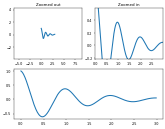

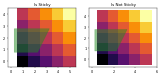

In [104]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
======================================================
Controlling view limits using margins and sticky_edges
======================================================

The first figure in this example shows how to zoom in and out of a
plot using `~.Axes.margins` instead of `~.Axes.set_xlim` and
`~.Axes.set_ylim`. The second figure demonstrates the concept of
edge "stickiness" introduced by certain methods and artists and how
to effectively work around that.

"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Polygon


def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)


t1 = np.arange(0.0, 3.0, 0.01)

ax1 = plt.subplot(212)
ax1.margins(0.05)           # Default margin is 0.05, value 0 means fit
ax1.plot(t1, f(t1))

ax2 = plt.subplot(221)
ax2.margins(2, 2)           # Values >0.0 zoom out
ax2.plot(t1, f(t1))
ax2.set_title('Zoomed out')

ax3 = plt.subplot(222)
ax3.margins(x=0, y=-0.25)   # Values in (-0.5, 0.0) zooms in to center
ax3.plot(t1, f(t1))
ax3.set_title('Zoomed in')

plt.show()


# %%
#
# On the "stickiness" of certain plotting methods
# """""""""""""""""""""""""""""""""""""""""""""""
#
# Some plotting functions make the axis limits "sticky" or immune to the will
# of the `~.Axes.margins` methods. For instance, `~.Axes.imshow` and
# `~.Axes.pcolor` expect the user to want the limits to be tight around the
# pixels shown in the plot. If this behavior is not desired, you need to set
# `~.Axes.use_sticky_edges` to `False`. Consider the following example:

y, x = np.mgrid[:5, 1:6]
poly_coords = [
    (0.25, 2.75), (3.25, 2.75),
    (2.25, 0.75), (0.25, 0.75)
]
fig, (ax1, ax2) = plt.subplots(ncols=2)

# Here we set the stickiness of the axes object...
# ax1 we'll leave as the default, which uses sticky edges
# and we'll turn off stickiness for ax2
ax2.use_sticky_edges = False

for ax, status in zip((ax1, ax2), ('Is', 'Is Not')):
    cells = ax.pcolor(x, y, x+y, cmap='inferno', shading='auto')  # sticky
    ax.add_patch(
        Polygon(poly_coords, color='forestgreen', alpha=0.5)
    )  # not sticky
    ax.margins(x=0.1, y=0.05)
    ax.set_aspect('equal')
    ax.set_title(f'{status} Sticky')

plt.show()


# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.margins` / `matplotlib.pyplot.margins`
#    - `matplotlib.axes.Axes.use_sticky_edges`
#    - `matplotlib.axes.Axes.pcolor` / `matplotlib.pyplot.pcolor`
#    - `matplotlib.patches.Polygon`


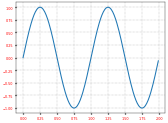

In [105]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==========
Axes Props
==========

You can control the axis tick and grid properties
"""

import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.grid(True, linestyle='-.')
ax.tick_params(labelcolor='r', labelsize='medium', width=3)

plt.show()


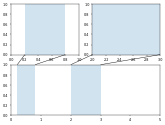

In [106]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
================
Axes Zoom Effect
================

"""

import matplotlib.pyplot as plt

from matplotlib.transforms import (Bbox, TransformedBbox,
                                   blended_transform_factory)
from mpl_toolkits.axes_grid1.inset_locator import (BboxConnector,
                                                   BboxConnectorPatch,
                                                   BboxPatch)


def connect_bbox(bbox1, bbox2,
                 loc1a, loc2a, loc1b, loc2b,
                 prop_lines, prop_patches=None):
    if prop_patches is None:
        prop_patches = {
            **prop_lines,
            "alpha": prop_lines.get("alpha", 1) * 0.2,
            "clip_on": False,
        }

    c1 = BboxConnector(
        bbox1, bbox2, loc1=loc1a, loc2=loc2a, clip_on=False, **prop_lines)
    c2 = BboxConnector(
        bbox1, bbox2, loc1=loc1b, loc2=loc2b, clip_on=False, **prop_lines)

    bbox_patch1 = BboxPatch(bbox1, **prop_patches)
    bbox_patch2 = BboxPatch(bbox2, **prop_patches)

    p = BboxConnectorPatch(bbox1, bbox2,
                           loc1a=loc1a, loc2a=loc2a, loc1b=loc1b, loc2b=loc2b,
                           clip_on=False,
                           **prop_patches)

    return c1, c2, bbox_patch1, bbox_patch2, p


def zoom_effect01(ax1, ax2, xmin, xmax, **kwargs):
    """
    Connect *ax1* and *ax2*. The *xmin*-to-*xmax* range in both axes will
    be marked.

    Parameters
    ----------
    ax1
        The main axes.
    ax2
        The zoomed axes.
    xmin, xmax
        The limits of the colored area in both plot axes.
    **kwargs
        Arguments passed to the patch constructor.
    """

    bbox = Bbox.from_extents(xmin, 0, xmax, 1)

    mybbox1 = TransformedBbox(bbox, ax1.get_xaxis_transform())
    mybbox2 = TransformedBbox(bbox, ax2.get_xaxis_transform())

    prop_patches = {**kwargs, "ec": "none", "alpha": 0.2}

    c1, c2, bbox_patch1, bbox_patch2, p = connect_bbox(
        mybbox1, mybbox2,
        loc1a=3, loc2a=2, loc1b=4, loc2b=1,
        prop_lines=kwargs, prop_patches=prop_patches)

    ax1.add_patch(bbox_patch1)
    ax2.add_patch(bbox_patch2)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)

    return c1, c2, bbox_patch1, bbox_patch2, p


def zoom_effect02(ax1, ax2, **kwargs):
    """
    ax1 : the main axes
    ax1 : the zoomed axes

    Similar to zoom_effect01.  The xmin & xmax will be taken from the
    ax1.viewLim.
    """

    tt = ax1.transScale + (ax1.transLimits + ax2.transAxes)
    trans = blended_transform_factory(ax2.transData, tt)

    mybbox1 = ax1.bbox
    mybbox2 = TransformedBbox(ax1.viewLim, trans)

    prop_patches = {**kwargs, "ec": "none", "alpha": 0.2}

    c1, c2, bbox_patch1, bbox_patch2, p = connect_bbox(
        mybbox1, mybbox2,
        loc1a=3, loc2a=2, loc1b=4, loc2b=1,
        prop_lines=kwargs, prop_patches=prop_patches)

    ax1.add_patch(bbox_patch1)
    ax2.add_patch(bbox_patch2)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)

    return c1, c2, bbox_patch1, bbox_patch2, p


axs = plt.figure().subplot_mosaic([
    ["zoom1", "zoom2"],
    ["main", "main"],
])

axs["main"].set(xlim=(0, 5))
zoom_effect01(axs["zoom1"], axs["main"], 0.2, 0.8)
axs["zoom2"].set(xlim=(2, 3))
zoom_effect02(axs["zoom2"], axs["main"])

plt.show()


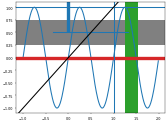

In [107]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
============
axhspan Demo
============

Create lines or rectangles that span the axes in either the horizontal or
vertical direction, and lines than span the axes with an arbitrary orientation.
"""

import matplotlib.pyplot as plt
import numpy as np

t = np.arange(-1, 2, .01)
s = np.sin(2 * np.pi * t)

fig, ax = plt.subplots()

ax.plot(t, s)
# Thick red horizontal line at y=0 that spans the xrange.
ax.axhline(linewidth=8, color='#d62728')
# Horizontal line at y=1 that spans the xrange.
ax.axhline(y=1)
# Vertical line at x=1 that spans the yrange.
ax.axvline(x=1)
# Thick blue vertical line at x=0 that spans the upper quadrant of the yrange.
ax.axvline(x=0, ymin=0.75, linewidth=8, color='#1f77b4')
# Default hline at y=.5 that spans the middle half of the axes.
ax.axhline(y=.5, xmin=0.25, xmax=0.75)
# Infinite black line going through (0, 0) to (1, 1).
ax.axline((0, 0), (1, 1), color='k')
# 50%-gray rectangle spanning the axes' width from y=0.25 to y=0.75.
ax.axhspan(0.25, 0.75, facecolor='0.5')
# Green rectangle spanning the axes' height from x=1.25 to x=1.55.
ax.axvspan(1.25, 1.55, facecolor='#2ca02c')

plt.show()


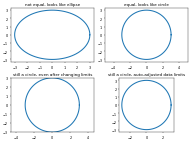

In [108]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=======================
Equal axis aspect ratio
=======================

How to set and adjust plots with equal axis aspect ratios.
"""

import matplotlib.pyplot as plt
import numpy as np

# Plot circle of radius 3.

an = np.linspace(0, 2 * np.pi, 100)
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(3 * np.cos(an), 3 * np.sin(an))
axs[0, 0].set_title('not equal, looks like ellipse', fontsize=10)

axs[0, 1].plot(3 * np.cos(an), 3 * np.sin(an))
axs[0, 1].axis('equal')
axs[0, 1].set_title('equal, looks like circle', fontsize=10)

axs[1, 0].plot(3 * np.cos(an), 3 * np.sin(an))
axs[1, 0].axis('equal')
axs[1, 0].set(xlim=(-3, 3), ylim=(-3, 3))
axs[1, 0].set_title('still a circle, even after changing limits', fontsize=10)

axs[1, 1].plot(3 * np.cos(an), 3 * np.sin(an))
axs[1, 1].set_aspect('equal', 'box')
axs[1, 1].set_title('still a circle, auto-adjusted data limits', fontsize=10)

fig.tight_layout()

plt.show()


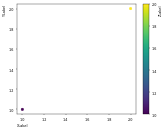

In [109]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===================
Axis Label Position
===================

Choose axis label position when calling `~.Axes.set_xlabel` and
`~.Axes.set_ylabel` as well as for colorbar.

"""
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

sc = ax.scatter([1, 2], [1, 2], c=[1, 2])
ax.set_ylabel('YLabel', loc='top')
ax.set_xlabel('XLabel', loc='left')
cbar = fig.colorbar(sc)
cbar.set_label("ZLabel", loc='top')

plt.show()


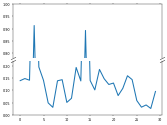

In [110]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===========
Broken Axis
===========

Broken axis example, where the y-axis will have a portion cut out.
"""

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)

pts = np.random.rand(30)*.2
# Now let's make two outlier points which are far away from everything.
pts[[3, 14]] += .8

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax1) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

# plot the same data on both axes
ax1.plot(pts)
ax2.plot(pts)

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(.78, 1.)  # outliers only
ax2.set_ylim(0, .22)  # most of the data

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)


plt.show()


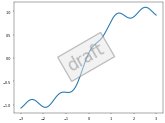

In [111]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
========================
Custom Figure subclasses
========================

You can pass a `.Figure` subclass to `.pyplot.figure` if you want to change
the default behavior of the figure.

This example defines a `.Figure` subclass ``WatermarkFigure`` that accepts an
additional parameter ``watermark`` to display a custom watermark text. The
figure is created using the ``FigureClass`` parameter of `.pyplot.figure`.
The additional ``watermark`` parameter is passed on to the subclass
constructor.
"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.figure import Figure


class WatermarkFigure(Figure):
    """A figure with a text watermark."""

    def __init__(self, *args, watermark=None, **kwargs):
        super().__init__(*args, **kwargs)

        if watermark is not None:
            bbox = dict(boxstyle='square', lw=3, ec='gray',
                        fc=(0.9, 0.9, .9, .5), alpha=0.5)
            self.text(0.5, 0.5, watermark,
                      ha='center', va='center', rotation=30,
                      fontsize=40, color='gray', alpha=0.5, bbox=bbox)


x = np.linspace(-3, 3, 201)
y = np.tanh(x) + 0.1 * np.cos(5 * x)

plt.figure(FigureClass=WatermarkFigure, watermark='draft')
plt.plot(x, y)


# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.pyplot.figure`
#    - `matplotlib.figure.Figure`
#    - `matplotlib.figure.Figure.text`


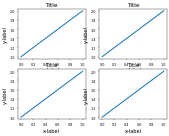

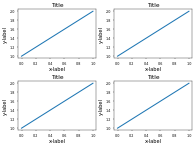

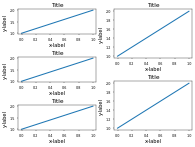

In [112]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=====================================
Resizing axes with constrained layout
=====================================

*Constrained layout* attempts to resize subplots in
a figure so that there are no overlaps between axes objects and labels
on the axes.

See :ref:`constrainedlayout_guide` for more details and
:ref:`tight_layout_guide` for an alternative.

"""

import matplotlib.pyplot as plt


def example_plot(ax):
    ax.plot([1, 2])
    ax.set_xlabel('x-label', fontsize=12)
    ax.set_ylabel('y-label', fontsize=12)
    ax.set_title('Title', fontsize=14)


# %%
# If we don't use *constrained layout*, then labels overlap the axes

fig, axs = plt.subplots(nrows=2, ncols=2, layout=None)

for ax in axs.flat:
    example_plot(ax)

# %%
# adding ``layout='constrained'`` automatically adjusts.

fig, axs = plt.subplots(nrows=2, ncols=2, layout='constrained')

for ax in axs.flat:
    example_plot(ax)

# %%
# Below is a more complicated example using nested gridspecs.

fig = plt.figure(layout='constrained')

import matplotlib.gridspec as gridspec

gs0 = gridspec.GridSpec(1, 2, figure=fig)

gs1 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[0])
for n in range(3):
    ax = fig.add_subplot(gs1[n])
    example_plot(ax)


gs2 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs0[1])
for n in range(2):
    ax = fig.add_subplot(gs2[n])
    example_plot(ax)

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.gridspec.GridSpec`
#    - `matplotlib.gridspec.GridSpecFromSubplotSpec`


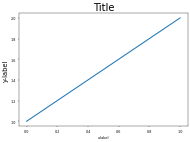

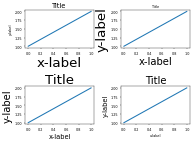

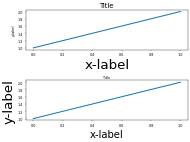

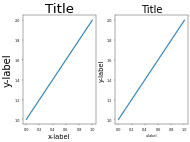

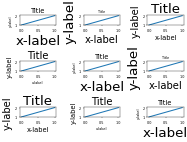

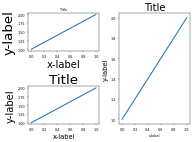

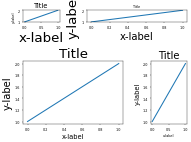

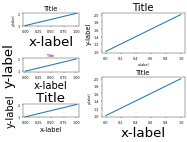

In [113]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===============================
Resizing axes with tight layout
===============================

`~.Figure.tight_layout` attempts to resize subplots in a figure so that there
are no overlaps between axes objects and labels on the axes.

See :ref:`tight_layout_guide` for more details and
:ref:`constrainedlayout_guide` for an alternative.

"""

import itertools
import warnings

import matplotlib.pyplot as plt

fontsizes = itertools.cycle([8, 16, 24, 32])


def example_plot(ax):
    ax.plot([1, 2])
    ax.set_xlabel('x-label', fontsize=next(fontsizes))
    ax.set_ylabel('y-label', fontsize=next(fontsizes))
    ax.set_title('Title', fontsize=next(fontsizes))


# %%

fig, ax = plt.subplots()
example_plot(ax)
fig.tight_layout()

# %%

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)
fig.tight_layout()

# %%

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
example_plot(ax1)
example_plot(ax2)
fig.tight_layout()

# %%

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
example_plot(ax1)
example_plot(ax2)
fig.tight_layout()

# %%

fig, axs = plt.subplots(nrows=3, ncols=3)
for ax in axs.flat:
    example_plot(ax)
fig.tight_layout()

# %%

plt.figure()
ax1 = plt.subplot(221)
ax2 = plt.subplot(223)
ax3 = plt.subplot(122)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
plt.tight_layout()

# %%

plt.figure()
ax1 = plt.subplot2grid((3, 3), (0, 0))
ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
ax4 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)
plt.tight_layout()

# %%

fig = plt.figure()

gs1 = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])
ax3 = fig.add_subplot(gs1[2])
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
gs1.tight_layout(fig, rect=[None, None, 0.45, None])

gs2 = fig.add_gridspec(2, 1)
ax4 = fig.add_subplot(gs2[0])
ax5 = fig.add_subplot(gs2[1])
example_plot(ax4)
example_plot(ax5)
with warnings.catch_warnings():
    # gs2.tight_layout cannot handle the subplots from the first gridspec
    # (gs1), so it will raise a warning. We are going to match the gridspecs
    # manually so we can filter the warning away.
    warnings.simplefilter("ignore", UserWarning)
    gs2.tight_layout(fig, rect=[0.45, None, None, None])

# now match the top and bottom of two gridspecs.
top = min(gs1.top, gs2.top)
bottom = max(gs1.bottom, gs2.bottom)

gs1.update(top=top, bottom=bottom)
gs2.update(top=top, bottom=bottom)

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.figure.Figure.tight_layout` /
#      `matplotlib.pyplot.tight_layout`
#    - `matplotlib.figure.Figure.add_gridspec`
#    - `matplotlib.figure.Figure.add_subplot`
#    - `matplotlib.pyplot.subplot2grid`


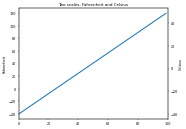

In [114]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=================================
Different scales on the same axes
=================================

Demo of how to display two scales on the left and right y-axis.

This example uses the Fahrenheit and Celsius scales.
"""
import matplotlib.pyplot as plt
import numpy as np


def fahrenheit2celsius(temp):
    """
    Returns temperature in Celsius given Fahrenheit temperature.
    """
    return (5. / 9.) * (temp - 32)


def make_plot():

    # Define a closure function to register as a callback
    def convert_ax_c_to_celsius(ax_f):
        """
        Update second axis according to first axis.
        """
        y1, y2 = ax_f.get_ylim()
        ax_c.set_ylim(fahrenheit2celsius(y1), fahrenheit2celsius(y2))
        ax_c.figure.canvas.draw()

    fig, ax_f = plt.subplots()
    ax_c = ax_f.twinx()

    # automatically update ylim of ax2 when ylim of ax1 changes.
    ax_f.callbacks.connect("ylim_changed", convert_ax_c_to_celsius)
    ax_f.plot(np.linspace(-40, 120, 100))
    ax_f.set_xlim(0, 100)

    ax_f.set_title('Two scales: Fahrenheit and Celsius')
    ax_f.set_ylabel('Fahrenheit')
    ax_c.set_ylabel('Celsius')

    plt.show()

make_plot()


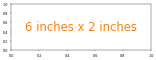

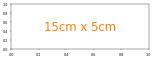

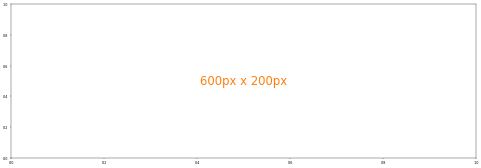

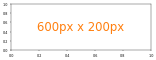

In [115]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==============================
Figure size in different units
==============================

The native figure size unit in Matplotlib is inches, deriving from print
industry standards. However, users may need to specify their figures in other
units like centimeters or pixels. This example illustrates how to do this
efficiently.
"""

# sphinx_gallery_thumbnail_number = 2

import matplotlib.pyplot as plt

text_kwargs = dict(ha='center', va='center', fontsize=28, color='C1')

# %%
# Figure size in inches (default)
# -------------------------------
#
plt.subplots(figsize=(6, 2))
plt.text(0.5, 0.5, '6 inches x 2 inches', **text_kwargs)
plt.show()


# %%
# Figure size in centimeter
# -------------------------
# Multiplying centimeter-based numbers with a conversion factor from cm to
# inches, gives the right numbers. Naming the conversion factor ``cm`` makes
# the conversion almost look like appending a unit to the number, which is
# nicely readable.
#
cm = 1/2.54  # centimeters in inches
plt.subplots(figsize=(15*cm, 5*cm))
plt.text(0.5, 0.5, '15cm x 5cm', **text_kwargs)
plt.show()


# %%
# Figure size in pixel
# --------------------
# Similarly, one can use a conversion from pixels.
#
# Note that you could break this if you use `~.pyplot.savefig` with a
# different explicit dpi value.
#
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
plt.subplots(figsize=(600*px, 200*px))
plt.text(0.5, 0.5, '600px x 200px', **text_kwargs)
plt.show()

# %%
# Quick interactive work is usually rendered to the screen, making pixels a
# good size of unit. But defining the conversion factor may feel a little
# tedious for quick iterations.
#
# Because of the default ``rcParams['figure.dpi'] = 100``, one can mentally
# divide the needed pixel value by 100 [#]_:
#
plt.subplots(figsize=(6, 2))
plt.text(0.5, 0.5, '600px x 200px', **text_kwargs)
plt.show()

# %%
# .. [#] Unfortunately, this does not work well for the ``matplotlib inline``
#        backend in Jupyter because that backend uses a different default of
#        ``rcParams['figure.dpi'] = 72``. Additionally, it saves the figure
#        with ``bbox_inches='tight'``, which crops the figure and makes the
#        actual size unpredictable.

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.pyplot.figure`
#    - `matplotlib.pyplot.subplots`
#    - `matplotlib.pyplot.subplot_mosaic`


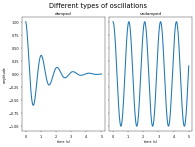

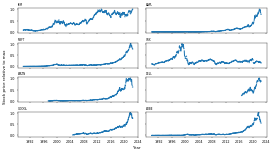

In [116]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=============================================
Figure labels: suptitle, supxlabel, supylabel
=============================================

Each axes can have a title (or actually three - one each with *loc* "left",
"center", and "right"), but is sometimes desirable to give a whole figure
(or `.SubFigure`) an overall title, using `.FigureBase.suptitle`.

We can also add figure-level x- and y-labels using `.FigureBase.supxlabel` and
`.FigureBase.supylabel`.
"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.cbook import get_sample_data

x = np.linspace(0.0, 5.0, 501)

fig, (ax1, ax2) = plt.subplots(1, 2, layout='constrained', sharey=True)
ax1.plot(x, np.cos(6*x) * np.exp(-x))
ax1.set_title('damped')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('amplitude')

ax2.plot(x, np.cos(6*x))
ax2.set_xlabel('time (s)')
ax2.set_title('undamped')

fig.suptitle('Different types of oscillations', fontsize=16)

# %%
# A global x- or y-label can be set using the `.FigureBase.supxlabel` and
# `.FigureBase.supylabel` methods.


with get_sample_data('Stocks.csv') as file:
    stocks = np.genfromtxt(
        file, delimiter=',', names=True, dtype=None,
        converters={0: lambda x: np.datetime64(x, 'D')}, skip_header=1)

fig, axs = plt.subplots(4, 2, figsize=(9, 5), layout='constrained',
                        sharex=True, sharey=True)
for nn, ax in enumerate(axs.flat):
    column_name = stocks.dtype.names[1+nn]
    y = stocks[column_name]
    line, = ax.plot(stocks['Date'], y / np.nanmax(y), lw=2.5)
    ax.set_title(column_name, fontsize='small', loc='left')
fig.supxlabel('Year')
fig.supylabel('Stock price relative to max')

plt.show()


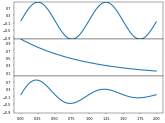

In [117]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==========================
Creating adjacent subplots
==========================

To create plots that share a common axis (visually) you can set the hspace
between the subplots to zero. Passing sharex=True when creating the subplots
will automatically turn off all x ticks and labels except those on the bottom
axis.

In this example the plots share a common x-axis, but you can follow the same
logic to supply a common y-axis.
"""
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 2.0, 0.01)

s1 = np.sin(2 * np.pi * t)
s2 = np.exp(-t)
s3 = s1 * s2

fig, axs = plt.subplots(3, 1, sharex=True)
# Remove vertical space between axes
fig.subplots_adjust(hspace=0)

# Plot each graph, and manually set the y tick values
axs[0].plot(t, s1)
axs[0].set_yticks(np.arange(-0.9, 1.0, 0.4))
axs[0].set_ylim(-1, 1)

axs[1].plot(t, s2)
axs[1].set_yticks(np.arange(0.1, 1.0, 0.2))
axs[1].set_ylim(0, 1)

axs[2].plot(t, s3)
axs[2].set_yticks(np.arange(-0.9, 1.0, 0.4))
axs[2].set_ylim(-1, 1)

plt.show()


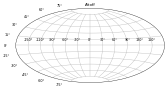

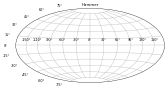

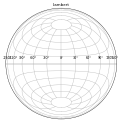

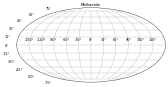

In [118]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
======================
Geographic Projections
======================

This shows 4 possible geographic projections.  Cartopy_ supports more
projections.

.. _Cartopy: https://scitools.org.uk/cartopy/
"""

import matplotlib.pyplot as plt

# %%

plt.figure()
plt.subplot(projection="aitoff")
plt.title("Aitoff")
plt.grid(True)

# %%

plt.figure()
plt.subplot(projection="hammer")
plt.title("Hammer")
plt.grid(True)

# %%

plt.figure()
plt.subplot(projection="lambert")
plt.title("Lambert")
plt.grid(True)

# %%

plt.figure()
plt.subplot(projection="mollweide")
plt.title("Mollweide")
plt.grid(True)

plt.show()


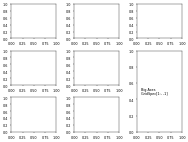

In [119]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==================================================
Combining two subplots using subplots and GridSpec
==================================================

Sometimes we want to combine two subplots in an axes layout created with
`~.Figure.subplots`.  We can get the `~.gridspec.GridSpec` from the axes
and then remove the covered axes and fill the gap with a new bigger axes.
Here we create a layout with the bottom two axes in the last column combined.

To start with this layout (rather than removing the overlapping axes) use
`~.pyplot.subplot_mosaic`.

See also :ref:`arranging_axes`.
"""

import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, nrows=3)
gs = axs[1, 2].get_gridspec()
# remove the underlying axes
for ax in axs[1:, -1]:
    ax.remove()
axbig = fig.add_subplot(gs[1:, -1])
axbig.annotate('Big Axes \nGridSpec[1:, -1]', (0.1, 0.5),
               xycoords='axes fraction', va='center')

fig.tight_layout()

plt.show()


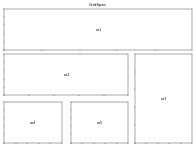

In [120]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=======================================================
Using Gridspec to make multi-column/row subplot layouts
=======================================================

`.GridSpec` is a flexible way to layout
subplot grids.  Here is an example with a 3x3 grid, and
axes spanning all three columns, two columns, and two rows.

"""
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec


def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure(layout="constrained")

gs = GridSpec(3, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax2 = fig.add_subplot(gs[1, :-1])
ax3 = fig.add_subplot(gs[1:, -1])
ax4 = fig.add_subplot(gs[-1, 0])
ax5 = fig.add_subplot(gs[-1, -2])

fig.suptitle("GridSpec")
format_axes(fig)

plt.show()


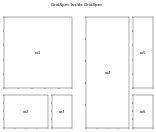

In [121]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
================
Nested Gridspecs
================

GridSpecs can be nested, so that a subplot from a parent GridSpec can
set the position for a nested grid of subplots.

Note that the same functionality can be achieved more directly with
`~.FigureBase.subfigures`; see
:doc:`/gallery/subplots_axes_and_figures/subfigures`.

"""
import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec


def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)


# gridspec inside gridspec
fig = plt.figure()

gs0 = gridspec.GridSpec(1, 2, figure=fig)

gs00 = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs0[0])

ax1 = fig.add_subplot(gs00[:-1, :])
ax2 = fig.add_subplot(gs00[-1, :-1])
ax3 = fig.add_subplot(gs00[-1, -1])

# the following syntax does the same as the GridSpecFromSubplotSpec call above:
gs01 = gs0[1].subgridspec(3, 3)

ax4 = fig.add_subplot(gs01[:, :-1])
ax5 = fig.add_subplot(gs01[:-1, -1])
ax6 = fig.add_subplot(gs01[-1, -1])

plt.suptitle("GridSpec Inside GridSpec")
format_axes(fig)

plt.show()


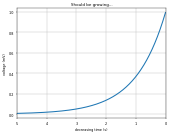

In [122]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===========
Invert Axes
===========

You can use decreasing axes by flipping the normal order of the axis
limits
"""

import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.01, 5.0, 0.01)
s = np.exp(-t)

fig, ax = plt.subplots()

ax.plot(t, s)
ax.set_xlim(5, 0)  # decreasing time
ax.set_xlabel('decreasing time (s)')
ax.set_ylabel('voltage (mV)')
ax.set_title('Should be growing...')
ax.grid(True)

plt.show()


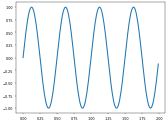

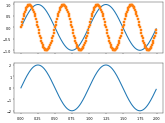

In [123]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===================================
Managing multiple figures in pyplot
===================================

`matplotlib.pyplot` uses the concept of a *current figure* and *current axes*.
Figures are identified via a figure number that is passed to `~.pyplot.figure`.
The figure with the given number is set as *current figure*. Additionally, if
no figure with the number exists, a new one is created.

.. note::

    We discourage working with multiple figures through the implicit pyplot
    interface because managing the *current figure* is cumbersome and
    error-prone. Instead, we recommend using the explicit approach and call
    methods on Figure and Axes instances. See :ref:`api_interfaces` for an
    explanation of the trade-offs between the implicit and explicit interfaces.

"""
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 2.0, 0.01)
s1 = np.sin(2*np.pi*t)
s2 = np.sin(4*np.pi*t)

# %%
# Create figure 1

plt.figure(1)
plt.subplot(211)
plt.plot(t, s1)
plt.subplot(212)
plt.plot(t, 2*s1)

# %%
# Create figure 2

plt.figure(2)
plt.plot(t, s2)

# %%
# Now switch back to figure 1 and make some changes

plt.figure(1)
plt.subplot(211)
plt.plot(t, s2, 's')
ax = plt.gca()
ax.set_xticklabels([])

plt.show()


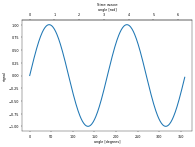

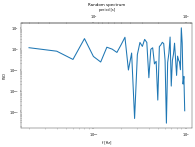

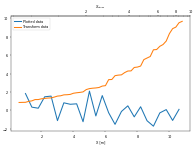

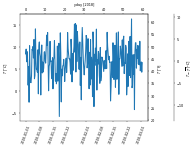

In [124]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==============
Secondary Axis
==============

Sometimes we want a secondary axis on a plot, for instance to convert
radians to degrees on the same plot.  We can do this by making a child
axes with only one axis visible via `.axes.Axes.secondary_xaxis` and
`.axes.Axes.secondary_yaxis`.  This secondary axis can have a different scale
than the main axis by providing both a forward and an inverse conversion
function in a tuple to the *functions* keyword argument:
"""

import datetime

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator

fig, ax = plt.subplots(layout='constrained')
x = np.arange(0, 360, 1)
y = np.sin(2 * x * np.pi / 180)
ax.plot(x, y)
ax.set_xlabel('angle [degrees]')
ax.set_ylabel('signal')
ax.set_title('Sine wave')


def deg2rad(x):
    return x * np.pi / 180


def rad2deg(x):
    return x * 180 / np.pi


secax = ax.secondary_xaxis('top', functions=(deg2rad, rad2deg))
secax.set_xlabel('angle [rad]')
plt.show()

# %%
# Here is the case of converting from wavenumber to wavelength in a
# log-log scale.
#
# .. note::
#
#   In this case, the xscale of the parent is logarithmic, so the child is
#   made logarithmic as well.

fig, ax = plt.subplots(layout='constrained')
x = np.arange(0.02, 1, 0.02)
np.random.seed(19680801)
y = np.random.randn(len(x)) ** 2
ax.loglog(x, y)
ax.set_xlabel('f [Hz]')
ax.set_ylabel('PSD')
ax.set_title('Random spectrum')


def one_over(x):
    """Vectorized 1/x, treating x==0 manually"""
    x = np.array(x, float)
    near_zero = np.isclose(x, 0)
    x[near_zero] = np.inf
    x[~near_zero] = 1 / x[~near_zero]
    return x


# the function "1/x" is its own inverse
inverse = one_over


secax = ax.secondary_xaxis('top', functions=(one_over, inverse))
secax.set_xlabel('period [s]')
plt.show()

# %%
# Sometime we want to relate the axes in a transform that is ad-hoc from
# the data, and is derived empirically.  In that case we can set the
# forward and inverse transforms functions to be linear interpolations from the
# one data set to the other.
#
# .. note::
#
#   In order to properly handle the data margins, the mapping functions
#   (``forward`` and ``inverse`` in this example) need to be defined beyond the
#   nominal plot limits.
#
#   In the specific case of the numpy linear interpolation, `numpy.interp`,
#   this condition can be arbitrarily enforced by providing optional keyword
#   arguments *left*, *right* such that values outside the data range are
#   mapped well outside the plot limits.

fig, ax = plt.subplots(layout='constrained')
xdata = np.arange(1, 11, 0.4)
ydata = np.random.randn(len(xdata))
ax.plot(xdata, ydata, label='Plotted data')

xold = np.arange(0, 11, 0.2)
# fake data set relating x coordinate to another data-derived coordinate.
# xnew must be monotonic, so we sort...
xnew = np.sort(10 * np.exp(-xold / 4) + np.random.randn(len(xold)) / 3)

ax.plot(xold[3:], xnew[3:], label='Transform data')
ax.set_xlabel('X [m]')
ax.legend()


def forward(x):
    return np.interp(x, xold, xnew)


def inverse(x):
    return np.interp(x, xnew, xold)


secax = ax.secondary_xaxis('top', functions=(forward, inverse))
secax.xaxis.set_minor_locator(AutoMinorLocator())
secax.set_xlabel('$X_{other}$')

plt.show()

# %%
# A final example translates np.datetime64 to yearday on the x axis and
# from Celsius to Fahrenheit on the y axis.  Note the addition of a
# third y axis, and that it can be placed using a float for the
# location argument

dates = [datetime.datetime(2018, 1, 1) + datetime.timedelta(hours=k * 6)
         for k in range(240)]
temperature = np.random.randn(len(dates)) * 4 + 6.7
fig, ax = plt.subplots(layout='constrained')

ax.plot(dates, temperature)
ax.set_ylabel(r'$T\ [^oC]$')
plt.xticks(rotation=70)


def date2yday(x):
    """Convert matplotlib datenum to days since 2018-01-01."""
    y = x - mdates.date2num(datetime.datetime(2018, 1, 1))
    return y


def yday2date(x):
    """Return a matplotlib datenum for *x* days after 2018-01-01."""
    y = x + mdates.date2num(datetime.datetime(2018, 1, 1))
    return y


secax_x = ax.secondary_xaxis('top', functions=(date2yday, yday2date))
secax_x.set_xlabel('yday [2018]')


def celsius_to_fahrenheit(x):
    return x * 1.8 + 32


def fahrenheit_to_celsius(x):
    return (x - 32) / 1.8


secax_y = ax.secondary_yaxis(
    'right', functions=(celsius_to_fahrenheit, fahrenheit_to_celsius))
secax_y.set_ylabel(r'$T\ [^oF]$')


def celsius_to_anomaly(x):
    return (x - np.mean(temperature))


def anomaly_to_celsius(x):
    return (x + np.mean(temperature))


# use of a float for the position:
secax_y2 = ax.secondary_yaxis(
    1.2, functions=(celsius_to_anomaly, anomaly_to_celsius))
secax_y2.set_ylabel(r'$T - \overline{T}\ [^oC]$')


plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.secondary_xaxis`
#    - `matplotlib.axes.Axes.secondary_yaxis`


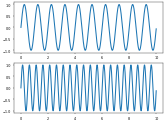

In [125]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
Sharing axis limits and views
=============================

It's common to make two or more plots which share an axis, e.g., two subplots
with time as a common axis.  When you pan and zoom around on one, you want the
other to move around with you.  To facilitate this, matplotlib Axes support a
``sharex`` and ``sharey`` attribute.  When you create a `~.pyplot.subplot` or
`~.pyplot.axes`, you can pass in a keyword indicating what axes you want to
share with.
"""

import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0, 10, 0.01)

ax1 = plt.subplot(211)
ax1.plot(t, np.sin(2*np.pi*t))

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(t, np.sin(4*np.pi*t))

plt.show()


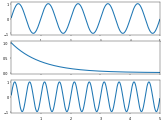

In [126]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===========
Shared axis
===========

You can share the x- or y-axis limits for one axis with another by
passing an `~.axes.Axes` instance as a *sharex* or *sharey* keyword argument.

Changing the axis limits on one axes will be reflected automatically
in the other, and vice-versa, so when you navigate with the toolbar
the Axes will follow each other on their shared axis.  Ditto for
changes in the axis scaling (e.g., log vs. linear).  However, it is
possible to have differences in tick labeling, e.g., you can selectively
turn off the tick labels on one Axes.

The example below shows how to customize the tick labels on the
various axes.  Shared axes share the tick locator, tick formatter,
view limits, and transformation (e.g., log, linear).  But the ticklabels
themselves do not share properties.  This is a feature and not a bug,
because you may want to make the tick labels smaller on the upper
axes, e.g., in the example below.

If you want to turn off the ticklabels for a given Axes (e.g., on
subplot(211) or subplot(212)), you cannot do the standard trick::

   setp(ax2, xticklabels=[])

because this changes the tick Formatter, which is shared among all
Axes.  But you can alter the visibility of the labels, which is a
property::

  setp(ax2.get_xticklabels(), visible=False)

"""
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.01, 5.0, 0.01)
s1 = np.sin(2 * np.pi * t)
s2 = np.exp(-t)
s3 = np.sin(4 * np.pi * t)

ax1 = plt.subplot(311)
plt.plot(t, s1)
plt.tick_params('x', labelsize=6)

# share x only
ax2 = plt.subplot(312, sharex=ax1)
plt.plot(t, s2)
# make these tick labels invisible
plt.tick_params('x', labelbottom=False)

# share x and y
ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)
plt.plot(t, s3)
plt.xlim(0.01, 5.0)
plt.show()


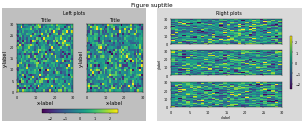

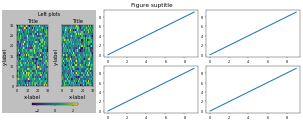

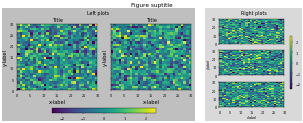

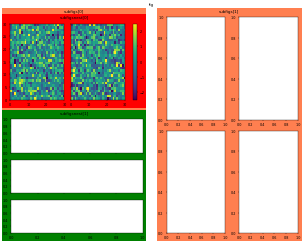

In [127]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=================
Figure subfigures
=================

Sometimes it is desirable to have a figure with two different layouts in it.
This can be achieved with
:doc:`nested gridspecs</gallery/subplots_axes_and_figures/gridspec_nested>`,
but having a virtual figure with its own artists is helpful, so
Matplotlib also has "subfigures", accessed by calling
`matplotlib.figure.Figure.add_subfigure` in a way that is analogous to
`matplotlib.figure.Figure.add_subplot`, or
`matplotlib.figure.Figure.subfigures` to make an array of subfigures.  Note
that subfigures can also have their own child subfigures.

.. note::
    ``subfigure`` is new in v3.4, and the API is still provisional.

"""
import matplotlib.pyplot as plt
import numpy as np


def example_plot(ax, fontsize=12, hide_labels=False):
    pc = ax.pcolormesh(np.random.randn(30, 30), vmin=-2.5, vmax=2.5)
    if not hide_labels:
        ax.set_xlabel('x-label', fontsize=fontsize)
        ax.set_ylabel('y-label', fontsize=fontsize)
        ax.set_title('Title', fontsize=fontsize)
    return pc

np.random.seed(19680808)
# gridspec inside gridspec
fig = plt.figure(layout='constrained', figsize=(10, 4))
subfigs = fig.subfigures(1, 2, wspace=0.07)

axsLeft = subfigs[0].subplots(1, 2, sharey=True)
subfigs[0].set_facecolor('0.75')
for ax in axsLeft:
    pc = example_plot(ax)
subfigs[0].suptitle('Left plots', fontsize='x-large')
subfigs[0].colorbar(pc, shrink=0.6, ax=axsLeft, location='bottom')

axsRight = subfigs[1].subplots(3, 1, sharex=True)
for nn, ax in enumerate(axsRight):
    pc = example_plot(ax, hide_labels=True)
    if nn == 2:
        ax.set_xlabel('xlabel')
    if nn == 1:
        ax.set_ylabel('ylabel')

subfigs[1].set_facecolor('0.85')
subfigs[1].colorbar(pc, shrink=0.6, ax=axsRight)
subfigs[1].suptitle('Right plots', fontsize='x-large')

fig.suptitle('Figure suptitle', fontsize='xx-large')

plt.show()

# %%
# It is possible to mix subplots and subfigures using
# `matplotlib.figure.Figure.add_subfigure`.  This requires getting
# the gridspec that the subplots are laid out on.

fig, axs = plt.subplots(2, 3, layout='constrained', figsize=(10, 4))
gridspec = axs[0, 0].get_subplotspec().get_gridspec()

# clear the left column for the subfigure:
for a in axs[:, 0]:
    a.remove()

# plot data in remaining axes:
for a in axs[:, 1:].flat:
    a.plot(np.arange(10))

# make the subfigure in the empty gridspec slots:
subfig = fig.add_subfigure(gridspec[:, 0])

axsLeft = subfig.subplots(1, 2, sharey=True)
subfig.set_facecolor('0.75')
for ax in axsLeft:
    pc = example_plot(ax)
subfig.suptitle('Left plots', fontsize='x-large')
subfig.colorbar(pc, shrink=0.6, ax=axsLeft, location='bottom')

fig.suptitle('Figure suptitle', fontsize='xx-large')
plt.show()

# %%
# Subfigures can have different widths and heights.  This is exactly the
# same example as the first example, but *width_ratios* has been changed:

fig = plt.figure(layout='constrained', figsize=(10, 4))
subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[2, 1])

axsLeft = subfigs[0].subplots(1, 2, sharey=True)
subfigs[0].set_facecolor('0.75')
for ax in axsLeft:
    pc = example_plot(ax)
subfigs[0].suptitle('Left plots', fontsize='x-large')
subfigs[0].colorbar(pc, shrink=0.6, ax=axsLeft, location='bottom')

axsRight = subfigs[1].subplots(3, 1, sharex=True)
for nn, ax in enumerate(axsRight):
    pc = example_plot(ax, hide_labels=True)
    if nn == 2:
        ax.set_xlabel('xlabel')
    if nn == 1:
        ax.set_ylabel('ylabel')

subfigs[1].set_facecolor('0.85')
subfigs[1].colorbar(pc, shrink=0.6, ax=axsRight)
subfigs[1].suptitle('Right plots', fontsize='x-large')

fig.suptitle('Figure suptitle', fontsize='xx-large')

plt.show()

# %%
# Subfigures can be also be nested:

fig = plt.figure(layout='constrained', figsize=(10, 8))

fig.suptitle('fig')

subfigs = fig.subfigures(1, 2, wspace=0.07)

subfigs[0].set_facecolor('coral')
subfigs[0].suptitle('subfigs[0]')

subfigs[1].set_facecolor('coral')
subfigs[1].suptitle('subfigs[1]')

subfigsnest = subfigs[0].subfigures(2, 1, height_ratios=[1, 1.4])
subfigsnest[0].suptitle('subfigsnest[0]')
subfigsnest[0].set_facecolor('r')
axsnest0 = subfigsnest[0].subplots(1, 2, sharey=True)
for nn, ax in enumerate(axsnest0):
    pc = example_plot(ax, hide_labels=True)
subfigsnest[0].colorbar(pc, ax=axsnest0)

subfigsnest[1].suptitle('subfigsnest[1]')
subfigsnest[1].set_facecolor('g')
axsnest1 = subfigsnest[1].subplots(3, 1, sharex=True)

axsRight = subfigs[1].subplots(2, 2)

plt.show()


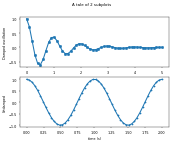

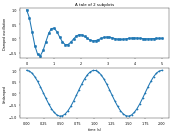

In [128]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=================
Multiple subplots
=================

Simple demo with multiple subplots.

For more options, see :doc:`/gallery/subplots_axes_and_figures/subplots_demo`.

.. redirect-from:: /gallery/subplots_axes_and_figures/subplot_demo
"""

import matplotlib.pyplot as plt
import numpy as np

# Create some fake data.
x1 = np.linspace(0.0, 5.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
x2 = np.linspace(0.0, 2.0)
y2 = np.cos(2 * np.pi * x2)

# %%
# `~.pyplot.subplots()` is the recommended method to generate simple subplot
# arrangements:

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('A tale of 2 subplots')

ax1.plot(x1, y1, 'o-')
ax1.set_ylabel('Damped oscillation')

ax2.plot(x2, y2, '.-')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Undamped')

plt.show()

# %%
# Subplots can also be generated one at a time using `~.pyplot.subplot()`:

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()


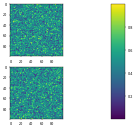

In [129]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=============================
Subplots spacings and margins
=============================

Adjusting the spacing of margins and subplots using `.pyplot.subplots_adjust`.

.. note::
   There is also a tool window to adjust the margins and spacings of displayed
   figures interactively.  It can be opened via the toolbar or by calling
   `.pyplot.subplot_tool`.

.. redirect-from:: /gallery/subplots_axes_and_figures/subplot_toolbar
"""

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

plt.subplot(211)
plt.imshow(np.random.random((100, 100)))
plt.subplot(212)
plt.imshow(np.random.random((100, 100)))

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)

plt.show()


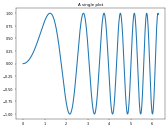

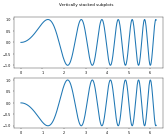

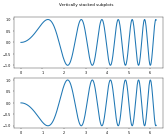

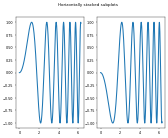

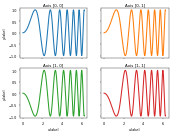

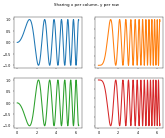

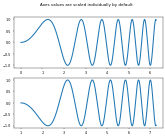

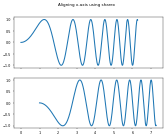

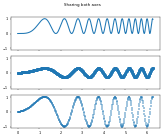

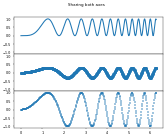

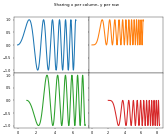

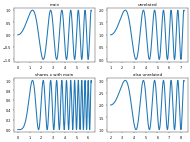

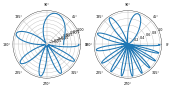

In [130]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=================================================
Creating multiple subplots using ``plt.subplots``
=================================================

`.pyplot.subplots` creates a figure and a grid of subplots with a single call,
while providing reasonable control over how the individual plots are created.
For more advanced use cases you can use `.GridSpec` for a more general subplot
layout or `.Figure.add_subplot` for adding subplots at arbitrary locations
within the figure.
"""

# sphinx_gallery_thumbnail_number = 11

import matplotlib.pyplot as plt
import numpy as np

# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# %%
# A figure with just one subplot
# """"""""""""""""""""""""""""""
#
# ``subplots()`` without arguments returns a `.Figure` and a single
# `~.axes.Axes`.
#
# This is actually the simplest and recommended way of creating a single
# Figure and Axes.

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('A single plot')

# %%
# Stacking subplots in one direction
# """"""""""""""""""""""""""""""""""
#
# The first two optional arguments of `.pyplot.subplots` define the number of
# rows and columns of the subplot grid.
#
# When stacking in one direction only, the returned ``axs`` is a 1D numpy array
# containing the list of created Axes.

fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x, y)
axs[1].plot(x, -y)

# %%
# If you are creating just a few Axes, it's handy to unpack them immediately to
# dedicated variables for each Axes. That way, we can use ``ax1`` instead of
# the more verbose ``axs[0]``.

fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
ax1.plot(x, y)
ax2.plot(x, -y)

# %%
# To obtain side-by-side subplots, pass parameters ``1, 2`` for one row and two
# columns.

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(x, y)
ax2.plot(x, -y)

# %%
# Stacking subplots in two directions
# """""""""""""""""""""""""""""""""""
#
# When stacking in two directions, the returned ``axs`` is a 2D NumPy array.
#
# If you have to set parameters for each subplot it's handy to iterate over
# all subplots in a 2D grid using ``for ax in axs.flat:``.

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# %%
# You can use tuple-unpacking also in 2D to assign all subplots to dedicated
# variables:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Sharing x per column, y per row')
ax1.plot(x, y)
ax2.plot(x, y**2, 'tab:orange')
ax3.plot(x, -y, 'tab:green')
ax4.plot(x, -y**2, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()

# %%
# Sharing axes
# """"""""""""
#
# By default, each Axes is scaled individually. Thus, if the ranges are
# different the tick values of the subplots do not align.

fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Axes values are scaled individually by default')
ax1.plot(x, y)
ax2.plot(x + 1, -y)

# %%
# You can use *sharex* or *sharey* to align the horizontal or vertical axis.

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Aligning x-axis using sharex')
ax1.plot(x, y)
ax2.plot(x + 1, -y)

# %%
# Setting *sharex* or *sharey* to ``True`` enables global sharing across the
# whole grid, i.e. also the y-axes of vertically stacked subplots have the
# same scale when using ``sharey=True``.

fig, axs = plt.subplots(3, sharex=True, sharey=True)
fig.suptitle('Sharing both axes')
axs[0].plot(x, y ** 2)
axs[1].plot(x, 0.3 * y, 'o')
axs[2].plot(x, y, '+')

# %%
# For subplots that are sharing axes one set of tick labels is enough. Tick
# labels of inner Axes are automatically removed by *sharex* and *sharey*.
# Still there remains an unused empty space between the subplots.
#
# To precisely control the positioning of the subplots, one can explicitly
# create a `.GridSpec` with `.Figure.add_gridspec`, and then call its
# `~.GridSpecBase.subplots` method.  For example, we can reduce the height
# between vertical subplots using ``add_gridspec(hspace=0)``.
#
# `.label_outer` is a handy method to remove labels and ticks from subplots
# that are not at the edge of the grid.

fig = plt.figure()
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
fig.suptitle('Sharing both axes')
axs[0].plot(x, y ** 2)
axs[1].plot(x, 0.3 * y, 'o')
axs[2].plot(x, y, '+')

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()

# %%
# Apart from ``True`` and ``False``, both *sharex* and *sharey* accept the
# values 'row' and 'col' to share the values only per row or column.

fig = plt.figure()
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Sharing x per column, y per row')
ax1.plot(x, y)
ax2.plot(x, y**2, 'tab:orange')
ax3.plot(x + 1, -y, 'tab:green')
ax4.plot(x + 2, -y**2, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()

# %%
# If you want a more complex sharing structure, you can first create the
# grid of axes with no sharing, and then call `.axes.Axes.sharex` or
# `.axes.Axes.sharey` to add sharing info a posteriori.

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title("main")
axs[1, 0].plot(x, y**2)
axs[1, 0].set_title("shares x with main")
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].plot(x + 1, y + 1)
axs[0, 1].set_title("unrelated")
axs[1, 1].plot(x + 2, y + 2)
axs[1, 1].set_title("also unrelated")
fig.tight_layout()

# %%
# Polar axes
# """"""""""
#
# The parameter *subplot_kw* of `.pyplot.subplots` controls the subplot
# properties (see also `.Figure.add_subplot`). In particular, this can be used
# to create a grid of polar Axes.

fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw=dict(projection='polar'))
ax1.plot(x, y)
ax2.plot(x, y ** 2)

plt.show()


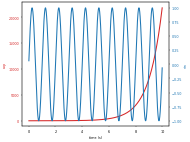

In [131]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===========================
Plots with different scales
===========================

Two plots on the same axes with different left and right scales.

The trick is to use *two different axes* that share the same *x* axis.
You can use separate `matplotlib.ticker` formatters and locators as
desired since the two axes are independent.

Such axes are generated by calling the `.Axes.twinx` method. Likewise,
`.Axes.twiny` is available to generate axes that share a *y* axis but
have different top and bottom scales.
"""
import matplotlib.pyplot as plt
import numpy as np

# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.twinx` / `matplotlib.pyplot.twinx`
#    - `matplotlib.axes.Axes.twiny` / `matplotlib.pyplot.twiny`
#    - `matplotlib.axes.Axes.tick_params` / `matplotlib.pyplot.tick_params`


In [132]:
# THIS cbook EXAMPLE WAS REMOVED

In [133]:
ChapterConfig.set_chapter_name("04statistics")

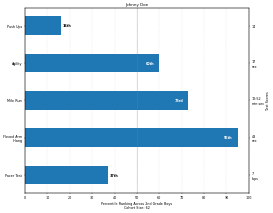

In [134]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===================================
Percentiles as horizontal bar chart
===================================

Bar charts are useful for visualizing counts, or summary statistics
with error bars. Also see the :doc:`/gallery/lines_bars_and_markers/barchart`
or the :doc:`/gallery/lines_bars_and_markers/barh` example for simpler versions
of those features.

This example comes from an application in which grade school gym
teachers wanted to be able to show parents how their child did across
a handful of fitness tests, and importantly, relative to how other
children did. To extract the plotting code for demo purposes, we'll
just make up some data for little Johnny Doe.
"""

from collections import namedtuple

import matplotlib.pyplot as plt
import numpy as np

Student = namedtuple('Student', ['name', 'grade', 'gender'])
Score = namedtuple('Score', ['value', 'unit', 'percentile'])


def to_ordinal(num):
    """Convert an integer to an ordinal string, e.g. 2 -> '2nd'."""
    suffixes = {str(i): v
                for i, v in enumerate(['th', 'st', 'nd', 'rd', 'th',
                                       'th', 'th', 'th', 'th', 'th'])}
    v = str(num)
    # special case early teens
    if v in {'11', '12', '13'}:
        return v + 'th'
    return v + suffixes[v[-1]]


def format_score(score):
    """
    Create score labels for the right y-axis as the test name followed by the
    measurement unit (if any), split over two lines.
    """
    return f'{score.value}\n{score.unit}' if score.unit else str(score.value)


def plot_student_results(student, scores_by_test, cohort_size):
    fig, ax1 = plt.subplots(figsize=(9, 7), layout='constrained')
    fig.canvas.manager.set_window_title('Eldorado K-8 Fitness Chart')

    ax1.set_title(student.name)
    ax1.set_xlabel(
        'Percentile Ranking Across {grade} Grade {gender}s\n'
        'Cohort Size: {cohort_size}'.format(
            grade=to_ordinal(student.grade),
            gender=student.gender.title(),
            cohort_size=cohort_size))

    test_names = list(scores_by_test.keys())
    percentiles = [score.percentile for score in scores_by_test.values()]

    rects = ax1.barh(test_names, percentiles, align='center', height=0.5)
    # Partition the percentile values to be able to draw large numbers in
    # white within the bar, and small numbers in black outside the bar.
    large_percentiles = [to_ordinal(p) if p > 40 else '' for p in percentiles]
    small_percentiles = [to_ordinal(p) if p <= 40 else '' for p in percentiles]
    ax1.bar_label(rects, small_percentiles,
                  padding=5, color='black', fontweight='bold')
    ax1.bar_label(rects, large_percentiles,
                  padding=-32, color='white', fontweight='bold')

    ax1.set_xlim([0, 100])
    ax1.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
    ax1.xaxis.grid(True, linestyle='--', which='major',
                   color='grey', alpha=.25)
    ax1.axvline(50, color='grey', alpha=0.25)  # median position

    # Set the right-hand Y-axis ticks and labels
    ax2 = ax1.twinx()
    # Set equal limits on both yaxis so that the ticks line up
    ax2.set_ylim(ax1.get_ylim())
    # Set the tick locations and labels
    ax2.set_yticks(
        np.arange(len(scores_by_test)),
        labels=[format_score(score) for score in scores_by_test.values()])

    ax2.set_ylabel('Test Scores')


student = Student(name='Johnny Doe', grade=2, gender='Boy')
scores_by_test = {
    'Pacer Test': Score(7, 'laps', percentile=37),
    'Flexed Arm\n Hang': Score(48, 'sec', percentile=95),
    'Mile Run': Score('12:52', 'min:sec', percentile=73),
    'Agility': Score(17, 'sec', percentile=60),
    'Push Ups': Score(14, '', percentile=16),
}

plot_student_results(student, scores_by_test, cohort_size=62)
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.bar` / `matplotlib.pyplot.bar`
#    - `matplotlib.axes.Axes.bar_label` / `matplotlib.pyplot.bar_label`
#    - `matplotlib.axes.Axes.twinx` / `matplotlib.pyplot.twinx`


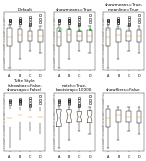

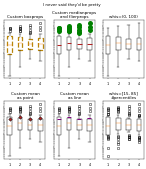

In [135]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=================================
Artist customization in box plots
=================================

This example demonstrates how to use the various keyword arguments to fully
customize box plots. The first figure demonstrates how to remove and add
individual components (note that the mean is the only value not shown by
default). The second figure demonstrates how the styles of the artists can be
customized. It also demonstrates how to set the limit of the whiskers to
specific percentiles (lower right axes)

A good general reference on boxplots and their history can be found here:
https://vita.had.co.nz/papers/boxplots.pdf

"""

import matplotlib.pyplot as plt
import numpy as np

# fake data
np.random.seed(19680801)
data = np.random.lognormal(size=(37, 4), mean=1.5, sigma=1.75)
labels = list('ABCD')
fs = 10  # fontsize

# %%
# Demonstrate how to toggle the display of different elements:

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(6, 6), sharey=True)
axs[0, 0].boxplot(data, labels=labels)
axs[0, 0].set_title('Default', fontsize=fs)

axs[0, 1].boxplot(data, labels=labels, showmeans=True)
axs[0, 1].set_title('showmeans=True', fontsize=fs)

axs[0, 2].boxplot(data, labels=labels, showmeans=True, meanline=True)
axs[0, 2].set_title('showmeans=True,\nmeanline=True', fontsize=fs)

axs[1, 0].boxplot(data, labels=labels, showbox=False, showcaps=False)
tufte_title = 'Tufte Style \n(showbox=False,\nshowcaps=False)'
axs[1, 0].set_title(tufte_title, fontsize=fs)

axs[1, 1].boxplot(data, labels=labels, notch=True, bootstrap=10000)
axs[1, 1].set_title('notch=True,\nbootstrap=10000', fontsize=fs)

axs[1, 2].boxplot(data, labels=labels, showfliers=False)
axs[1, 2].set_title('showfliers=False', fontsize=fs)

for ax in axs.flat:
    ax.set_yscale('log')
    ax.set_yticklabels([])

fig.subplots_adjust(hspace=0.4)
plt.show()


# %%
# Demonstrate how to customize the display different elements:

boxprops = dict(linestyle='--', linewidth=3, color='darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  markeredgecolor='none')
medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(6, 6), sharey=True)
axs[0, 0].boxplot(data, boxprops=boxprops)
axs[0, 0].set_title('Custom boxprops', fontsize=fs)

axs[0, 1].boxplot(data, flierprops=flierprops, medianprops=medianprops)
axs[0, 1].set_title('Custom medianprops\nand flierprops', fontsize=fs)

axs[0, 2].boxplot(data, whis=(0, 100))
axs[0, 2].set_title('whis=(0, 100)', fontsize=fs)

axs[1, 0].boxplot(data, meanprops=meanpointprops, meanline=False,
                  showmeans=True)
axs[1, 0].set_title('Custom mean\nas point', fontsize=fs)

axs[1, 1].boxplot(data, meanprops=meanlineprops, meanline=True,
                  showmeans=True)
axs[1, 1].set_title('Custom mean\nas line', fontsize=fs)

axs[1, 2].boxplot(data, whis=[15, 85])
axs[1, 2].set_title('whis=[15, 85]\n#percentiles', fontsize=fs)

for ax in axs.flat:
    ax.set_yscale('log')
    ax.set_yticklabels([])

fig.suptitle("I never said they'd be pretty")
fig.subplots_adjust(hspace=0.4)
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.boxplot` / `matplotlib.pyplot.boxplot`


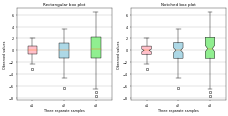

In [136]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=================================
Box plots with custom fill colors
=================================

This plot illustrates how to create two types of box plots
(rectangular and notched), and how to fill them with custom
colors by accessing the properties of the artists of the
box plots. Additionally, the ``labels`` parameter is used to
provide x-tick labels for each sample.

A good general reference on boxplots and their history can be found
here: http://vita.had.co.nz/papers/boxplots.pdf
"""

import matplotlib.pyplot as plt
import numpy as np

# Random test data
np.random.seed(19680801)
all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]
labels = ['x1', 'x2', 'x3']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot
bplot1 = ax1.boxplot(all_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Rectangular box plot')

# notch shape box plot
bplot2 = ax2.boxplot(all_data,
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax2.set_title('Notched box plot')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Three separate samples')
    ax.set_ylabel('Observed values')

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.boxplot` / `matplotlib.pyplot.boxplot`


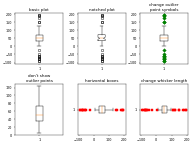

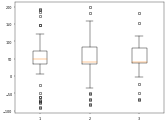

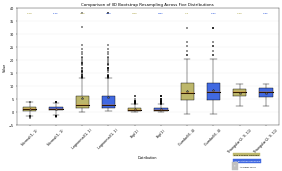

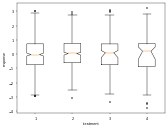

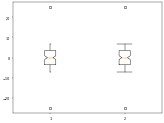

In [137]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
========
Boxplots
========

Visualizing boxplots with matplotlib.

The following examples show off how to visualize boxplots with
Matplotlib. There are many options to control their appearance and
the statistics that they use to summarize the data.

.. redirect-from:: /gallery/pyplots/boxplot_demo_pyplot
"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Polygon

# Fixing random state for reproducibility
np.random.seed(19680801)

# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

fig, axs = plt.subplots(2, 3)

# basic plot
axs[0, 0].boxplot(data)
axs[0, 0].set_title('basic plot')

# notched plot
axs[0, 1].boxplot(data, 1)
axs[0, 1].set_title('notched plot')

# change outlier point symbols
axs[0, 2].boxplot(data, 0, 'gD')
axs[0, 2].set_title('change outlier\npoint symbols')

# don't show outlier points
axs[1, 0].boxplot(data, 0, '')
axs[1, 0].set_title("don't show\noutlier points")

# horizontal boxes
axs[1, 1].boxplot(data, 0, 'rs', 0)
axs[1, 1].set_title('horizontal boxes')

# change whisker length
axs[1, 2].boxplot(data, 0, 'rs', 0, 0.75)
axs[1, 2].set_title('change whisker length')

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

# fake up some more data
spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low))
# Making a 2-D array only works if all the columns are the
# same length.  If they are not, then use a list instead.
# This is actually more efficient because boxplot converts
# a 2-D array into a list of vectors internally anyway.
data = [data, d2, d2[::2]]

# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.boxplot(data)

plt.show()


# %%
# Below we'll generate data from five different probability distributions,
# each with different characteristics. We want to play with how an IID
# bootstrap resample of the data preserves the distributional
# properties of the original sample, and a boxplot is one visual tool
# to make this assessment

random_dists = ['Normal(1, 1)', 'Lognormal(1, 1)', 'Exp(1)', 'Gumbel(6, 4)',
                'Triangular(2, 9, 11)']
N = 500

norm = np.random.normal(1, 1, N)
logn = np.random.lognormal(1, 1, N)
expo = np.random.exponential(1, N)
gumb = np.random.gumbel(6, 4, N)
tria = np.random.triangular(2, 9, 11, N)

# Generate some random indices that we'll use to resample the original data
# arrays. For code brevity, just use the same random indices for each array
bootstrap_indices = np.random.randint(0, N, N)
data = [
    norm, norm[bootstrap_indices],
    logn, logn[bootstrap_indices],
    expo, expo[bootstrap_indices],
    gumb, gumb[bootstrap_indices],
    tria, tria[bootstrap_indices],
]

fig, ax1 = plt.subplots(figsize=(10, 6))
fig.canvas.manager.set_window_title('A Boxplot Example')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(data, notch=False, sym='+', vert=True, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set(
    axisbelow=True,  # Hide the grid behind plot objects
    title='Comparison of IID Bootstrap Resampling Across Five Distributions',
    xlabel='Distribution',
    ylabel='Value',
)

# Now fill the boxes with desired colors
box_colors = ['darkkhaki', 'royalblue']
num_boxes = len(data)
medians = np.empty(num_boxes)
for i in range(num_boxes):
    box = bp['boxes'][i]
    box_x = []
    box_y = []
    for j in range(5):
        box_x.append(box.get_xdata()[j])
        box_y.append(box.get_ydata()[j])
    box_coords = np.column_stack([box_x, box_y])
    # Alternate between Dark Khaki and Royal Blue
    ax1.add_patch(Polygon(box_coords, facecolor=box_colors[i % 2]))
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    median_x = []
    median_y = []
    for j in range(2):
        median_x.append(med.get_xdata()[j])
        median_y.append(med.get_ydata()[j])
        ax1.plot(median_x, median_y, 'k')
    medians[i] = median_y[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
    ax1.plot(np.average(med.get_xdata()), np.average(data[i]),
             color='w', marker='*', markeredgecolor='k')

# Set the axes ranges and axes labels
ax1.set_xlim(0.5, num_boxes + 0.5)
top = 40
bottom = -5
ax1.set_ylim(bottom, top)
ax1.set_xticklabels(np.repeat(random_dists, 2),
                    rotation=45, fontsize=8)

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
pos = np.arange(num_boxes) + 1
upper_labels = [str(round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
for tick, label in zip(range(num_boxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], .95, upper_labels[tick],
             transform=ax1.get_xaxis_transform(),
             horizontalalignment='center', size='x-small',
             weight=weights[k], color=box_colors[k])

# Finally, add a basic legend
fig.text(0.80, 0.08, f'{N} Random Numbers',
         backgroundcolor=box_colors[0], color='black', weight='roman',
         size='x-small')
fig.text(0.80, 0.045, 'IID Bootstrap Resample',
         backgroundcolor=box_colors[1],
         color='white', weight='roman', size='x-small')
fig.text(0.80, 0.015, '*', color='white', backgroundcolor='silver',
         weight='roman', size='medium')
fig.text(0.815, 0.013, ' Average Value', color='black', weight='roman',
         size='x-small')

plt.show()

# %%
# Here we write a custom function to bootstrap confidence intervals.
# We can then use the boxplot along with this function to show these intervals.


def fake_bootstrapper(n):
    """
    This is just a placeholder for the user's method of
    bootstrapping the median and its confidence intervals.

    Returns an arbitrary median and confidence interval packed into a tuple.
    """
    if n == 1:
        med = 0.1
        ci = (-0.25, 0.25)
    else:
        med = 0.2
        ci = (-0.35, 0.50)
    return med, ci

inc = 0.1
e1 = np.random.normal(0, 1, size=500)
e2 = np.random.normal(0, 1, size=500)
e3 = np.random.normal(0, 1 + inc, size=500)
e4 = np.random.normal(0, 1 + 2*inc, size=500)

treatments = [e1, e2, e3, e4]
med1, ci1 = fake_bootstrapper(1)
med2, ci2 = fake_bootstrapper(2)
medians = [None, None, med1, med2]
conf_intervals = [None, None, ci1, ci2]

fig, ax = plt.subplots()
pos = np.arange(len(treatments)) + 1
bp = ax.boxplot(treatments, sym='k+', positions=pos,
                notch=True, bootstrap=5000,
                usermedians=medians,
                conf_intervals=conf_intervals)

ax.set_xlabel('treatment')
ax.set_ylabel('response')
plt.setp(bp['whiskers'], color='k', linestyle='-')
plt.setp(bp['fliers'], markersize=3.0)
plt.show()


# %%
# Here we customize the widths of the caps .

x = np.linspace(-7, 7, 140)
x = np.hstack([-25, x, 25])
fig, ax = plt.subplots()

ax.boxplot([x, x], notch=True, capwidths=[0.01, 0.2])

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.boxplot` / `matplotlib.pyplot.boxplot`
#    - `matplotlib.artist.Artist.set` / `matplotlib.pyplot.setp`


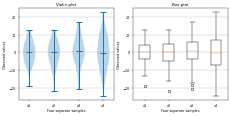

In [138]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===================================
Box plot vs. violin plot comparison
===================================

Note that although violin plots are closely related to Tukey's (1977)
box plots, they add useful information such as the distribution of the
sample data (density trace).

By default, box plots show data points outside 1.5 * the inter-quartile
range as outliers above or below the whiskers whereas violin plots show
the whole range of the data.

A good general reference on boxplots and their history can be found
here: http://vita.had.co.nz/papers/boxplots.pdf

Violin plots require matplotlib >= 1.4.

For more information on violin plots, the scikit-learn docs have a great
section: https://scikit-learn.org/stable/modules/density.html
"""

import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# Fixing random state for reproducibility
np.random.seed(19680801)


# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]

# plot violin plot
axs[0].violinplot(all_data,
                  showmeans=False,
                  showmedians=True)
axs[0].set_title('Violin plot')

# plot box plot
axs[1].boxplot(all_data)
axs[1].set_title('Box plot')

# adding horizontal grid lines
for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(all_data))],
                  labels=['x1', 'x2', 'x3', 'x4'])
    ax.set_xlabel('Four separate samples')
    ax.set_ylabel('Observed values')

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.boxplot` / `matplotlib.pyplot.boxplot`
#    - `matplotlib.axes.Axes.violinplot` / `matplotlib.pyplot.violinplot`


['label', 'mean', 'iqr', 'cilo', 'cihi', 'whishi', 'whislo', 'fliers', 'q1', 'med', 'q3']


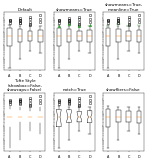

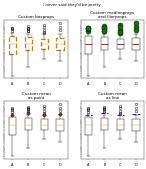

In [139]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=======================
Boxplot drawer function
=======================

This example demonstrates how to pass pre-computed box plot
statistics to the box plot drawer. The first figure demonstrates
how to remove and add individual components (note that the
mean is the only value not shown by default). The second
figure demonstrates how the styles of the artists can
be customized.

A good general reference on boxplots and their history can be found
here: http://vita.had.co.nz/papers/boxplots.pdf
"""

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.cbook as cbook

# fake data
np.random.seed(19680801)
data = np.random.lognormal(size=(37, 4), mean=1.5, sigma=1.75)
labels = list('ABCD')

# compute the boxplot stats
stats = cbook.boxplot_stats(data, labels=labels, bootstrap=10000)

# %%
# After we've computed the stats, we can go through and change anything.
# Just to prove it, I'll set the median of each set to the median of all
# the data, and double the means

for n in range(len(stats)):
    stats[n]['med'] = np.median(data)
    stats[n]['mean'] *= 2

print(list(stats[0]))

fs = 10  # fontsize

# %%
# Demonstrate how to toggle the display of different elements:

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(6, 6), sharey=True)
axs[0, 0].bxp(stats)
axs[0, 0].set_title('Default', fontsize=fs)

axs[0, 1].bxp(stats, showmeans=True)
axs[0, 1].set_title('showmeans=True', fontsize=fs)

axs[0, 2].bxp(stats, showmeans=True, meanline=True)
axs[0, 2].set_title('showmeans=True,\nmeanline=True', fontsize=fs)

axs[1, 0].bxp(stats, showbox=False, showcaps=False)
tufte_title = 'Tufte Style\n(showbox=False,\nshowcaps=False)'
axs[1, 0].set_title(tufte_title, fontsize=fs)

axs[1, 1].bxp(stats, shownotches=True)
axs[1, 1].set_title('notch=True', fontsize=fs)

axs[1, 2].bxp(stats, showfliers=False)
axs[1, 2].set_title('showfliers=False', fontsize=fs)

for ax in axs.flat:
    ax.set_yscale('log')
    ax.set_yticklabels([])

fig.subplots_adjust(hspace=0.4)
plt.show()

# %%
# Demonstrate how to customize the display different elements:

boxprops = dict(linestyle='--', linewidth=3, color='darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')
medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6, 6), sharey=True)
axs[0, 0].bxp(stats, boxprops=boxprops)
axs[0, 0].set_title('Custom boxprops', fontsize=fs)

axs[0, 1].bxp(stats, flierprops=flierprops, medianprops=medianprops)
axs[0, 1].set_title('Custom medianprops\nand flierprops', fontsize=fs)

axs[1, 0].bxp(stats, meanprops=meanpointprops, meanline=False,
              showmeans=True)
axs[1, 0].set_title('Custom mean\nas point', fontsize=fs)

axs[1, 1].bxp(stats, meanprops=meanlineprops, meanline=True,
              showmeans=True)
axs[1, 1].set_title('Custom mean\nas line', fontsize=fs)

for ax in axs.flat:
    ax.set_yscale('log')
    ax.set_yticklabels([])

fig.suptitle("I never said they'd be pretty")
fig.subplots_adjust(hspace=0.4)
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.bxp`
#    - `matplotlib.cbook.boxplot_stats`


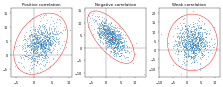

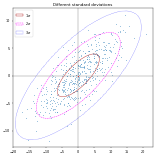

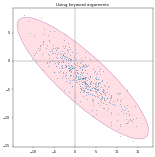

In [140]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
======================================================
Plot a confidence ellipse of a two-dimensional dataset
======================================================

This example shows how to plot a confidence ellipse of a
two-dimensional dataset, using its pearson correlation coefficient.

The approach that is used to obtain the correct geometry is
explained and proved here:

https://carstenschelp.github.io/2018/09/14/Plot_Confidence_Ellipse_001.html

The method avoids the use of an iterative eigen decomposition algorithm
and makes use of the fact that a normalized covariance matrix (composed of
pearson correlation coefficients and ones) is particularly easy to handle.
"""


import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

# %%
#
# The plotting function itself
# """"""""""""""""""""""""""""
#
# This function plots the confidence ellipse of the covariance of the given
# array-like variables x and y. The ellipse is plotted into the given
# axes-object ax.
#
# The radiuses of the ellipse can be controlled by n_std which is the number
# of standard deviations. The default value is 3 which makes the ellipse
# enclose 98.9% of the points if the data is normally distributed
# like in these examples (3 standard deviations in 1-D contain 99.7%
# of the data, which is 98.9% of the data in 2-D).


def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


# %%
#
# A helper function to create a correlated dataset
# """"""""""""""""""""""""""""""""""""""""""""""""
#
# Creates a random two-dimensional dataset with the specified
# two-dimensional mean (mu) and dimensions (scale).
# The correlation can be controlled by the param 'dependency',
# a 2x2 matrix.

def get_correlated_dataset(n, dependency, mu, scale):
    latent = np.random.randn(n, 2)
    dependent = latent.dot(dependency)
    scaled = dependent * scale
    scaled_with_offset = scaled + mu
    # return x and y of the new, correlated dataset
    return scaled_with_offset[:, 0], scaled_with_offset[:, 1]


# %%
#
# Positive, negative and weak correlation
# """""""""""""""""""""""""""""""""""""""
#
# Note that the shape for the weak correlation (right) is an ellipse,
# not a circle because x and y are differently scaled.
# However, the fact that x and y are uncorrelated is shown by
# the axes of the ellipse being aligned with the x- and y-axis
# of the coordinate system.

np.random.seed(0)

PARAMETERS = {
    'Positive correlation': [[0.85, 0.35],
                             [0.15, -0.65]],
    'Negative correlation': [[0.9, -0.4],
                             [0.1, -0.6]],
    'Weak correlation': [[1, 0],
                         [0, 1]],
}

mu = 2, 4
scale = 3, 5

fig, axs = plt.subplots(1, 3, figsize=(9, 3))
for ax, (title, dependency) in zip(axs, PARAMETERS.items()):
    x, y = get_correlated_dataset(800, dependency, mu, scale)
    ax.scatter(x, y, s=0.5)

    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)

    confidence_ellipse(x, y, ax, edgecolor='red')

    ax.scatter(mu[0], mu[1], c='red', s=3)
    ax.set_title(title)

plt.show()


# %%
#
# Different number of standard deviations
# """""""""""""""""""""""""""""""""""""""
#
# A plot with n_std = 3 (blue), 2 (purple) and 1 (red)

fig, ax_nstd = plt.subplots(figsize=(6, 6))

dependency_nstd = [[0.8, 0.75],
                   [-0.2, 0.35]]
mu = 0, 0
scale = 8, 5

ax_nstd.axvline(c='grey', lw=1)
ax_nstd.axhline(c='grey', lw=1)

x, y = get_correlated_dataset(500, dependency_nstd, mu, scale)
ax_nstd.scatter(x, y, s=0.5)

confidence_ellipse(x, y, ax_nstd, n_std=1,
                   label=r'$1\sigma$', edgecolor='firebrick')
confidence_ellipse(x, y, ax_nstd, n_std=2,
                   label=r'$2\sigma$', edgecolor='fuchsia', linestyle='--')
confidence_ellipse(x, y, ax_nstd, n_std=3,
                   label=r'$3\sigma$', edgecolor='blue', linestyle=':')

ax_nstd.scatter(mu[0], mu[1], c='red', s=3)
ax_nstd.set_title('Different standard deviations')
ax_nstd.legend()
plt.show()


# %%
#
# Using the keyword arguments
# """""""""""""""""""""""""""
#
# Use the keyword arguments specified for `matplotlib.patches.Patch` in order
# to have the ellipse rendered in different ways.

fig, ax_kwargs = plt.subplots(figsize=(6, 6))
dependency_kwargs = [[-0.8, 0.5],
                     [-0.2, 0.5]]
mu = 2, -3
scale = 6, 5

ax_kwargs.axvline(c='grey', lw=1)
ax_kwargs.axhline(c='grey', lw=1)

x, y = get_correlated_dataset(500, dependency_kwargs, mu, scale)
# Plot the ellipse with zorder=0 in order to demonstrate
# its transparency (caused by the use of alpha).
confidence_ellipse(x, y, ax_kwargs,
                   alpha=0.5, facecolor='pink', edgecolor='purple', zorder=0)

ax_kwargs.scatter(x, y, s=0.5)
ax_kwargs.scatter(mu[0], mu[1], c='red', s=3)
ax_kwargs.set_title('Using keyword arguments')

fig.subplots_adjust(hspace=0.25)
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.transforms.Affine2D`
#    - `matplotlib.patches.Ellipse`


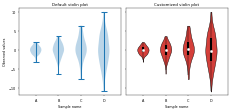

In [141]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=========================
Violin plot customization
=========================

This example demonstrates how to fully customize violin plots. The first plot
shows the default style by providing only the data. The second plot first
limits what Matplotlib draws with additional keyword arguments. Then a
simplified representation of a box plot is drawn on top. Lastly, the styles of
the artists of the violins are modified.

For more information on violin plots, the scikit-learn docs have a great
section: https://scikit-learn.org/stable/modules/density.html
"""

import matplotlib.pyplot as plt
import numpy as np


def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')


# create test data
np.random.seed(19680801)
data = [sorted(np.random.normal(0, std, 100)) for std in range(1, 5)]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)

ax1.set_title('Default violin plot')
ax1.set_ylabel('Observed values')
ax1.violinplot(data)

ax2.set_title('Customized violin plot')
parts = ax2.violinplot(
        data, showmeans=False, showmedians=False,
        showextrema=False)

for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax2.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax2.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

# set style for the axes
labels = ['A', 'B', 'C', 'D']
for ax in [ax1, ax2]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.violinplot` / `matplotlib.pyplot.violinplot`
#    - `matplotlib.axes.Axes.vlines` / `matplotlib.pyplot.vlines`


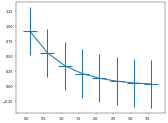

In [142]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=================
Errorbar function
=================

This exhibits the most basic use of the error bar method.
In this case, constant values are provided for the error
in both the x- and y-directions.
"""

import matplotlib.pyplot as plt
import numpy as np

# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

fig, ax = plt.subplots()
ax.errorbar(x, y, xerr=0.2, yerr=0.4)
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.errorbar` / `matplotlib.pyplot.errorbar`


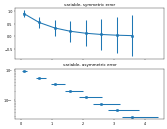

In [143]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=======================================
Different ways of specifying error bars
=======================================

Errors can be specified as a constant value (as shown in
:doc:`/gallery/statistics/errorbar`). However, this example demonstrates
how they vary by specifying arrays of error values.

If the raw ``x`` and ``y`` data have length N, there are two options:

Array of shape (N,):
    Error varies for each point, but the error values are
    symmetric (i.e. the lower and upper values are equal).

Array of shape (2, N):
    Error varies for each point, and the lower and upper limits
    (in that order) are different (asymmetric case)

In addition, this example demonstrates how to use log
scale with error bars.
"""

import matplotlib.pyplot as plt
import numpy as np

# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# example error bar values that vary with x-position
error = 0.1 + 0.2 * x

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)
ax0.errorbar(x, y, yerr=error, fmt='-o')
ax0.set_title('variable, symmetric error')

# error bar values w/ different -/+ errors that
# also vary with the x-position
lower_error = 0.4 * error
upper_error = error
asymmetric_error = [lower_error, upper_error]

ax1.errorbar(x, y, xerr=asymmetric_error, fmt='o')
ax1.set_title('variable, asymmetric error')
ax1.set_yscale('log')
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.errorbar` / `matplotlib.pyplot.errorbar`


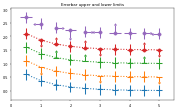

In [144]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==============================================
Including upper and lower limits in error bars
==============================================

In matplotlib, errors bars can have "limits". Applying limits to the
error bars essentially makes the error unidirectional. Because of that,
upper and lower limits can be applied in both the y- and x-directions
via the ``uplims``, ``lolims``, ``xuplims``, and ``xlolims`` parameters,
respectively. These parameters can be scalar or boolean arrays.

For example, if ``xlolims`` is ``True``, the x-error bars will only
extend from the data towards increasing values. If ``uplims`` is an
array filled with ``False`` except for the 4th and 7th values, all of the
y-error bars will be bidirectional, except the 4th and 7th bars, which
will extend from the data towards decreasing y-values.
"""

import matplotlib.pyplot as plt
import numpy as np

# example data
x = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
y = np.exp(-x)
xerr = 0.1
yerr = 0.2

# lower & upper limits of the error
lolims = np.array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0], dtype=bool)
uplims = np.array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1], dtype=bool)
ls = 'dotted'

fig, ax = plt.subplots(figsize=(7, 4))

# standard error bars
ax.errorbar(x, y, xerr=xerr, yerr=yerr, linestyle=ls)

# including upper limits
ax.errorbar(x, y + 0.5, xerr=xerr, yerr=yerr, uplims=uplims,
            linestyle=ls)

# including lower limits
ax.errorbar(x, y + 1.0, xerr=xerr, yerr=yerr, lolims=lolims,
            linestyle=ls)

# including upper and lower limits
ax.errorbar(x, y + 1.5, xerr=xerr, yerr=yerr,
            lolims=lolims, uplims=uplims,
            marker='o', markersize=8,
            linestyle=ls)

# Plot a series with lower and upper limits in both x & y
# constant x-error with varying y-error
xerr = 0.2
yerr = np.full_like(x, 0.2)
yerr[[3, 6]] = 0.3

# mock up some limits by modifying previous data
xlolims = lolims
xuplims = uplims
lolims = np.zeros_like(x)
uplims = np.zeros_like(x)
lolims[[6]] = True  # only limited at this index
uplims[[3]] = True  # only limited at this index

# do the plotting
ax.errorbar(x, y + 2.1, xerr=xerr, yerr=yerr,
            xlolims=xlolims, xuplims=xuplims,
            uplims=uplims, lolims=lolims,
            marker='o', markersize=8,
            linestyle='none')

# tidy up the figure
ax.set_xlim((0, 5.5))
ax.set_title('Errorbar upper and lower limits')
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.errorbar` / `matplotlib.pyplot.errorbar`


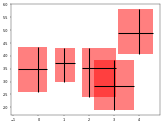

In [145]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
====================================================
Creating boxes from error bars using PatchCollection
====================================================

In this example, we snazz up a pretty standard error bar plot by adding
a rectangle patch defined by the limits of the bars in both the x- and
y- directions. To do this, we have to write our own custom function
called ``make_error_boxes``. Close inspection of this function will
reveal the preferred pattern in writing functions for matplotlib:

  1. an `~.axes.Axes` object is passed directly to the function
  2. the function operates on the ``Axes`` methods directly, not through
     the ``pyplot`` interface
  3. plotting keyword arguments that could be abbreviated are spelled out for
     better code readability in the future (for example we use *facecolor*
     instead of *fc*)
  4. the artists returned by the ``Axes`` plotting methods are then
     returned by the function so that, if desired, their styles
     can be modified later outside of the function (they are not
     modified in this example).
"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

# Number of data points
n = 5

# Dummy data
np.random.seed(19680801)
x = np.arange(0, n, 1)
y = np.random.rand(n) * 5.

# Dummy errors (above and below)
xerr = np.random.rand(2, n) + 0.1
yerr = np.random.rand(2, n) + 0.2


def make_error_boxes(ax, xdata, ydata, xerror, yerror, facecolor='r',
                     edgecolor='none', alpha=0.5):

    # Loop over data points; create box from errors at each point
    errorboxes = [Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum())
                  for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T)]

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha,
                         edgecolor=edgecolor)

    # Add collection to axes
    ax.add_collection(pc)

    # Plot errorbars
    artists = ax.errorbar(xdata, ydata, xerr=xerror, yerr=yerror,
                          fmt='none', ecolor='k')

    return artists


# Create figure and axes
fig, ax = plt.subplots(1)

# Call function to create error boxes
_ = make_error_boxes(ax, x, y, xerr, yerr)

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.errorbar` / `matplotlib.pyplot.errorbar`
#    - `matplotlib.axes.Axes.add_collection`
#    - `matplotlib.collections.PatchCollection`


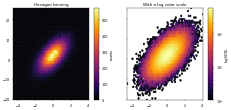

In [146]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=====================
Hexagonal binned plot
=====================

`~.Axes.hexbin` is a 2D histogram plot, in which the bins are hexagons and
the color represents the number of data points within each bin.
"""

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

n = 100_000
x = np.random.standard_normal(n)
y = 2.0 + 3.0 * x + 4.0 * np.random.standard_normal(n)
xlim = x.min(), x.max()
ylim = y.min(), y.max()

fig, (ax0, ax1) = plt.subplots(ncols=2, sharey=True, figsize=(9, 4))

hb = ax0.hexbin(x, y, gridsize=50, cmap='inferno')
ax0.set(xlim=xlim, ylim=ylim)
ax0.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax0, label='counts')

hb = ax1.hexbin(x, y, gridsize=50, bins='log', cmap='inferno')
ax1.set(xlim=xlim, ylim=ylim)
ax1.set_title("With a log color scale")
cb = fig.colorbar(hb, ax=ax1, label='log10(N)')

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.hexbin` / `matplotlib.pyplot.hexbin`


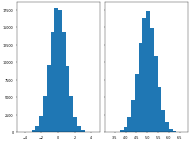

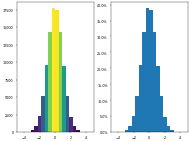

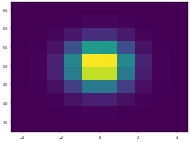

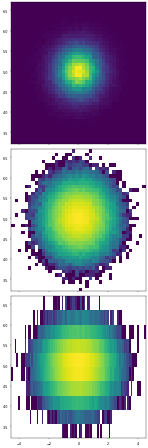

In [147]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==========
Histograms
==========

How to plot histograms with Matplotlib.
"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# Create a random number generator with a fixed seed for reproducibility
rng = np.random.default_rng(19680801)

# %%
# Generate data and plot a simple histogram
# -----------------------------------------
#
# To generate a 1D histogram we only need a single vector of numbers. For a 2D
# histogram we'll need a second vector. We'll generate both below, and show
# the histogram for each vector.

N_points = 100000
n_bins = 20

# Generate two normal distributions
dist1 = rng.standard_normal(N_points)
dist2 = 0.4 * rng.standard_normal(N_points) + 5

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(dist1, bins=n_bins)
axs[1].hist(dist2, bins=n_bins)


# %%
# Updating histogram colors
# -------------------------
#
# The histogram method returns (among other things) a ``patches`` object. This
# gives us access to the properties of the objects drawn. Using this, we can
# edit the histogram to our liking. Let's change the color of each bar
# based on its y value.

fig, axs = plt.subplots(1, 2, tight_layout=True)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(dist1, bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].hist(dist1, bins=n_bins, density=True)

# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))


# %%
# Plot a 2D histogram
# -------------------
#
# To plot a 2D histogram, one only needs two vectors of the same length,
# corresponding to each axis of the histogram.

fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(dist1, dist2)


# %%
# Customizing your histogram
# --------------------------
#
# Customizing a 2D histogram is similar to the 1D case, you can control
# visual components such as the bin size or color normalization.

fig, axs = plt.subplots(3, 1, figsize=(5, 15), sharex=True, sharey=True,
                        tight_layout=True)

# We can increase the number of bins on each axis
axs[0].hist2d(dist1, dist2, bins=40)

# As well as define normalization of the colors
axs[1].hist2d(dist1, dist2, bins=40, norm=colors.LogNorm())

# We can also define custom numbers of bins for each axis
axs[2].hist2d(dist1, dist2, bins=(80, 10), norm=colors.LogNorm())

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.hist` / `matplotlib.pyplot.hist`
#    - `matplotlib.pyplot.hist2d`
#    - `matplotlib.ticker.PercentFormatter`


In [148]:
# THIS ecdf EXAMPLE WAS REMOVED

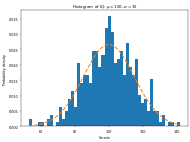

In [149]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==============================================
Some features of the histogram (hist) function
==============================================

In addition to the basic histogram, this demo shows a few optional features:

* Setting the number of data bins.
* The *density* parameter, which normalizes bin heights so that the integral of
  the histogram is 1. The resulting histogram is an approximation of the
  probability density function.

Selecting different bin counts and sizes can significantly affect the shape
of a histogram. The Astropy docs have a great section_ on how to select these
parameters.

.. _section: http://docs.astropy.org/en/stable/visualization/histogram.html
"""

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.hist` / `matplotlib.pyplot.hist`
#    - `matplotlib.axes.Axes.set_title`
#    - `matplotlib.axes.Axes.set_xlabel`
#    - `matplotlib.axes.Axes.set_ylabel`


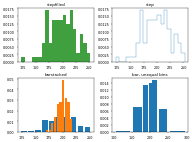

In [150]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
================================================================
Demo of the histogram function's different ``histtype`` settings
================================================================

* Histogram with step curve that has a color fill.
* Histogram with step curve with no fill.
* Histogram with custom and unequal bin widths.
* Two histograms with stacked bars.

Selecting different bin counts and sizes can significantly affect the
shape of a histogram. The Astropy docs have a great section on how to
select these parameters:
http://docs.astropy.org/en/stable/visualization/histogram.html
"""

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)

mu_x = 200
sigma_x = 25
x = np.random.normal(mu_x, sigma_x, size=100)

mu_w = 200
sigma_w = 10
w = np.random.normal(mu_w, sigma_w, size=100)

fig, axs = plt.subplots(nrows=2, ncols=2)

axs[0, 0].hist(x, 20, density=True, histtype='stepfilled', facecolor='g',
               alpha=0.75)
axs[0, 0].set_title('stepfilled')

axs[0, 1].hist(x, 20, density=True, histtype='step', facecolor='g',
               alpha=0.75)
axs[0, 1].set_title('step')

axs[1, 0].hist(x, density=True, histtype='barstacked', rwidth=0.8)
axs[1, 0].hist(w, density=True, histtype='barstacked', rwidth=0.8)
axs[1, 0].set_title('barstacked')

# Create a histogram by providing the bin edges (unequally spaced).
bins = [100, 150, 180, 195, 205, 220, 250, 300]
axs[1, 1].hist(x, bins, density=True, histtype='bar', rwidth=0.8)
axs[1, 1].set_title('bar, unequal bins')

fig.tight_layout()
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.hist` / `matplotlib.pyplot.hist`


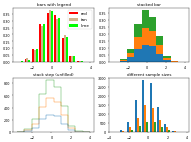

In [151]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=====================================================
The histogram (hist) function with multiple data sets
=====================================================

Plot histogram with multiple sample sets and demonstrate:

* Use of legend with multiple sample sets
* Stacked bars
* Step curve with no fill
* Data sets of different sample sizes

Selecting different bin counts and sizes can significantly affect the
shape of a histogram. The Astropy docs have a great section on how to
select these parameters:
http://docs.astropy.org/en/stable/visualization/histogram.html
"""

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)

n_bins = 10
x = np.random.randn(1000, 3)

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, density=True, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, density=True, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.hist` / `matplotlib.pyplot.hist`


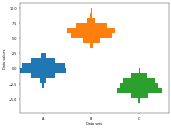

In [152]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==========================================
Producing multiple histograms side by side
==========================================

This example plots horizontal histograms of different samples along
a categorical x-axis. Additionally, the histograms are plotted to
be symmetrical about their x-position, thus making them very similar
to violin plots.

To make this highly specialized plot, we can't use the standard ``hist``
method. Instead, we use ``barh`` to draw the horizontal bars directly. The
vertical positions and lengths of the bars are computed via the
``np.histogram`` function. The histograms for all the samples are
computed using the same range (min and max values) and number of bins,
so that the bins for each sample are in the same vertical positions.

Selecting different bin counts and sizes can significantly affect the
shape of a histogram. The Astropy docs have a great section on how to
select these parameters:
http://docs.astropy.org/en/stable/visualization/histogram.html
"""

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)
number_of_bins = 20

# An example of three data sets to compare
number_of_data_points = 387
labels = ["A", "B", "C"]
data_sets = [np.random.normal(0, 1, number_of_data_points),
             np.random.normal(6, 1, number_of_data_points),
             np.random.normal(-3, 1, number_of_data_points)]

# Computed quantities to aid plotting
hist_range = (np.min(data_sets), np.max(data_sets))
binned_data_sets = [
    np.histogram(d, range=hist_range, bins=number_of_bins)[0]
    for d in data_sets
]
binned_maximums = np.max(binned_data_sets, axis=1)
x_locations = np.arange(0, sum(binned_maximums), np.max(binned_maximums))

# The bin_edges are the same for all of the histograms
bin_edges = np.linspace(hist_range[0], hist_range[1], number_of_bins + 1)
heights = np.diff(bin_edges)
centers = bin_edges[:-1] + heights / 2

# Cycle through and plot each histogram
fig, ax = plt.subplots()
for x_loc, binned_data in zip(x_locations, binned_data_sets):
    lefts = x_loc - 0.5 * binned_data
    ax.barh(centers, binned_data, height=heights, left=lefts)

ax.set_xticks(x_locations, labels)

ax.set_ylabel("Data values")
ax.set_xlabel("Data sets")

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.barh` / `matplotlib.pyplot.barh`


0.230 sec. elapsed
0.186 sec. elapsed


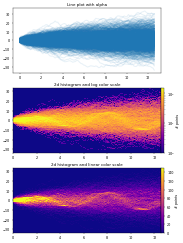

In [153]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=====================
Time Series Histogram
=====================

This example demonstrates how to efficiently visualize large numbers of time
series in a way that could potentially reveal hidden substructure and patterns
that are not immediately obvious, and display them in a visually appealing way.

In this example, we generate multiple sinusoidal "signal" series that are
buried under a larger number of random walk "noise/background" series. For an
unbiased Gaussian random walk with standard deviation of σ, the RMS deviation
from the origin after n steps is σ*sqrt(n). So in order to keep the sinusoids
visible on the same scale as the random walks, we scale the amplitude by the
random walk RMS. In addition, we also introduce a small random offset ``phi``
to shift the sines left/right, and some additive random noise to shift
individual data points up/down to make the signal a bit more "realistic" (you
wouldn't expect a perfect sine wave to appear in your data).

The first plot shows the typical way of visualizing multiple time series by
overlaying them on top of each other with ``plt.plot`` and a small value of
``alpha``. The second and third plots show how to reinterpret the data as a 2d
histogram, with optional interpolation between data points, by using
``np.histogram2d`` and ``plt.pcolormesh``.
"""
from copy import copy
import time

import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib

from matplotlib.colors import LogNorm

fig, axes = plt.subplots(nrows=3, figsize=(6, 8), layout='constrained')

# Make some data; a 1D random walk + small fraction of sine waves
num_series = 1000
num_points = 100
SNR = 0.10  # Signal to Noise Ratio
x = np.linspace(0, 4 * np.pi, num_points)
# Generate unbiased Gaussian random walks
Y = np.cumsum(np.random.randn(num_series, num_points), axis=-1)
# Generate sinusoidal signals
num_signal = round(SNR * num_series)
phi = (np.pi / 8) * np.random.randn(num_signal, 1)  # small random offset
Y[-num_signal:] = (
    np.sqrt(np.arange(num_points))[None, :]  # random walk RMS scaling factor
    * (np.sin(x[None, :] - phi)
       + 0.05 * np.random.randn(num_signal, num_points))  # small random noise
)


# Plot series using `plot` and a small value of `alpha`. With this view it is
# very difficult to observe the sinusoidal behavior because of how many
# overlapping series there are. It also takes a bit of time to run because so
# many individual artists need to be generated.
tic = time.time()
axes[0].plot(x, Y.T, color="C0", alpha=0.1)
toc = time.time()
axes[0].set_title("Line plot with alpha")
print(f"{toc-tic:.3f} sec. elapsed")


# Now we will convert the multiple time series into a histogram. Not only will
# the hidden signal be more visible, but it is also a much quicker procedure.
tic = time.time()
# Linearly interpolate between the points in each time series
num_fine = 800
x_fine = np.linspace(x.min(), x.max(), num_fine)
y_fine = np.empty((num_series, num_fine), dtype=float)
for i in range(num_series):
    y_fine[i, :] = np.interp(x_fine, x, Y[i, :])
y_fine = y_fine.flatten()
x_fine = np.matlib.repmat(x_fine, num_series, 1).flatten()


# Plot (x, y) points in 2d histogram with log colorscale
# It is pretty evident that there is some kind of structure under the noise
# You can tune vmax to make signal more visible
cmap = copy(plt.cm.plasma)
cmap.set_bad(cmap(0))
h, xedges, yedges = np.histogram2d(x_fine, y_fine, bins=[400, 100])
pcm = axes[1].pcolormesh(xedges, yedges, h.T, cmap=cmap,
                         norm=LogNorm(vmax=1.5e2), rasterized=True)
fig.colorbar(pcm, ax=axes[1], label="# points", pad=0)
axes[1].set_title("2d histogram and log color scale")

# Same data but on linear color scale
pcm = axes[2].pcolormesh(xedges, yedges, h.T, cmap=cmap,
                         vmax=1.5e2, rasterized=True)
fig.colorbar(pcm, ax=axes[2], label="# points", pad=0)
axes[2].set_title("2d histogram and linear color scale")

toc = time.time()
print(f"{toc-tic:.3f} sec. elapsed")
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.pcolormesh` / `matplotlib.pyplot.pcolormesh`
#    - `matplotlib.figure.Figure.colorbar`


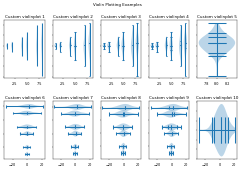

In [154]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==================
Violin plot basics
==================

Violin plots are similar to histograms and box plots in that they show
an abstract representation of the probability distribution of the
sample. Rather than showing counts of data points that fall into bins
or order statistics, violin plots use kernel density estimation (KDE) to
compute an empirical distribution of the sample. That computation
is controlled by several parameters. This example demonstrates how to
modify the number of points at which the KDE is evaluated (``points``)
and how to modify the bandwidth of the KDE (``bw_method``).

For more information on violin plots and KDE, the scikit-learn docs
have a great section: https://scikit-learn.org/stable/modules/density.html
"""

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


# fake data
fs = 10  # fontsize
pos = [1, 2, 4, 5, 7, 8]
data = [np.random.normal(0, std, size=100) for std in pos]

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10, 6))

axs[0, 0].violinplot(data, pos, points=20, widths=0.3,
                     showmeans=True, showextrema=True, showmedians=True)
axs[0, 0].set_title('Custom violinplot 1', fontsize=fs)

axs[0, 1].violinplot(data, pos, points=40, widths=0.5,
                     showmeans=True, showextrema=True, showmedians=True,
                     bw_method='silverman')
axs[0, 1].set_title('Custom violinplot 2', fontsize=fs)

axs[0, 2].violinplot(data, pos, points=60, widths=0.7, showmeans=True,
                     showextrema=True, showmedians=True, bw_method=0.5)
axs[0, 2].set_title('Custom violinplot 3', fontsize=fs)

axs[0, 3].violinplot(data, pos, points=60, widths=0.7, showmeans=True,
                     showextrema=True, showmedians=True, bw_method=0.5,
                     quantiles=[[0.1], [], [], [0.175, 0.954], [0.75], [0.25]])
axs[0, 3].set_title('Custom violinplot 4', fontsize=fs)

axs[0, 4].violinplot(data[-1:], pos[-1:], points=60, widths=0.7,
                     showmeans=True, showextrema=True, showmedians=True,
                     quantiles=[0.05, 0.1, 0.8, 0.9], bw_method=0.5)
axs[0, 4].set_title('Custom violinplot 5', fontsize=fs)

axs[1, 0].violinplot(data, pos, points=80, vert=False, widths=0.7,
                     showmeans=True, showextrema=True, showmedians=True)
axs[1, 0].set_title('Custom violinplot 6', fontsize=fs)

axs[1, 1].violinplot(data, pos, points=100, vert=False, widths=0.9,
                     showmeans=True, showextrema=True, showmedians=True,
                     bw_method='silverman')
axs[1, 1].set_title('Custom violinplot 7', fontsize=fs)

axs[1, 2].violinplot(data, pos, points=200, vert=False, widths=1.1,
                     showmeans=True, showextrema=True, showmedians=True,
                     bw_method=0.5)
axs[1, 2].set_title('Custom violinplot 8', fontsize=fs)

axs[1, 3].violinplot(data, pos, points=200, vert=False, widths=1.1,
                     showmeans=True, showextrema=True, showmedians=True,
                     quantiles=[[0.1], [], [], [0.175, 0.954], [0.75], [0.25]],
                     bw_method=0.5)
axs[1, 3].set_title('Custom violinplot 9', fontsize=fs)

axs[1, 4].violinplot(data[-1:], pos[-1:], points=200, vert=False, widths=1.1,
                     showmeans=True, showextrema=True, showmedians=True,
                     quantiles=[0.05, 0.1, 0.8, 0.9], bw_method=0.5)
axs[1, 4].set_title('Custom violinplot 10', fontsize=fs)


for ax in axs.flat:
    ax.set_yticklabels([])

fig.suptitle("Violin Plotting Examples")
fig.subplots_adjust(hspace=0.4)
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.violinplot` / `matplotlib.pyplot.violinplot`


In [155]:
ChapterConfig.set_chapter_name("05pie_and_polar_charts")

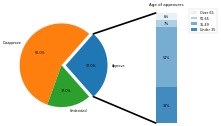

In [156]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==========
Bar of pie
==========

Make a "bar of pie" chart where the first slice of the pie is
"exploded" into a bar chart with a further breakdown of said slice's
characteristics. The example demonstrates using a figure with multiple
sets of axes and using the axes patches list to add two ConnectionPatches
to link the subplot charts.
"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [.27, .56, .17]
labels = ['Approve', 'Disapprove', 'Undecided']
explode = [0.1, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.33, .54, .07, .06]
age_labels = ['Under 35', '35-49', '50-65', 'Over 65']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Age of approvers')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.bar` / `matplotlib.pyplot.bar`
#    - `matplotlib.axes.Axes.pie` / `matplotlib.pyplot.pie`
#    - `matplotlib.patches.ConnectionPatch`


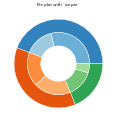

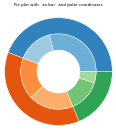

In [157]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=================
Nested pie charts
=================

The following examples show two ways to build a nested pie chart
in Matplotlib. Such charts are often referred to as donut charts.

See also the :doc:`/gallery/specialty_plots/leftventricle_bullseye` example.
"""

import matplotlib.pyplot as plt
import numpy as np

# %%
# The most straightforward way to build a pie chart is to use the
# `~matplotlib.axes.Axes.pie` method.
#
# In this case, pie takes values corresponding to counts in a group.
# We'll first generate some fake data, corresponding to three groups.
# In the inner circle, we'll treat each number as belonging to its
# own group. In the outer circle, we'll plot them as members of their
# original 3 groups.
#
# The effect of the donut shape is achieved by setting a ``width`` to
# the pie's wedges through the *wedgeprops* argument.


fig, ax = plt.subplots()

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

# %%
# However, you can accomplish the same output by using a bar plot on
# axes with a polar coordinate system. This may give more flexibility on
# the exact design of the plot.
#
# In this case, we need to map x-values of the bar chart onto radians of
# a circle. The cumulative sum of the values are used as the edges
# of the bars.

fig, ax = plt.subplots(subplot_kw=dict(projection="polar"))

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])
# Normalize vals to 2 pi
valsnorm = vals/np.sum(vals)*2*np.pi
# Obtain the ordinates of the bar edges
valsleft = np.cumsum(np.append(0, valsnorm.flatten()[:-1])).reshape(vals.shape)

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

ax.bar(x=valsleft[:, 0],
       width=valsnorm.sum(axis=1), bottom=1-size, height=size,
       color=outer_colors, edgecolor='w', linewidth=1, align="edge")

ax.bar(x=valsleft.flatten(),
       width=valsnorm.flatten(), bottom=1-2*size, height=size,
       color=inner_colors, edgecolor='w', linewidth=1, align="edge")

ax.set(title="Pie plot with `ax.bar` and polar coordinates")
ax.set_axis_off()
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.pie` / `matplotlib.pyplot.pie`
#    - `matplotlib.axes.Axes.bar` / `matplotlib.pyplot.bar`
#    - `matplotlib.projections.polar`
#    - ``Axes.set`` (`matplotlib.artist.Artist.set`)
#    - `matplotlib.axes.Axes.set_axis_off`


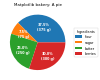

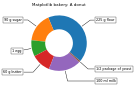

In [158]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==========================
Labeling a pie and a donut
==========================

Welcome to the Matplotlib bakery. We will create a pie and a donut
chart through the `pie method <matplotlib.axes.Axes.pie>` and
show how to label them with a `legend <matplotlib.axes.Axes.legend>`
as well as with `annotations <matplotlib.axes.Axes.annotate>`.
"""

# %%
# As usual we would start by defining the imports and create a figure with
# subplots.
# Now it's time for the pie. Starting with a pie recipe, we create the data
# and a list of labels from it.
#
# We can provide a function to the ``autopct`` argument, which will expand
# automatic percentage labeling by showing absolute values; we calculate
# the latter back from relative data and the known sum of all values.
#
# We then create the pie and store the returned objects for later.  The first
# returned element of the returned tuple is a list of the wedges.  Those are
# `matplotlib.patches.Wedge` patches, which can directly be used as the handles
# for a legend. We can use the legend's ``bbox_to_anchor`` argument to position
# the legend outside of the pie. Here we use the axes coordinates ``(1, 0, 0.5,
# 1)`` together with the location ``"center left"``; i.e. the left central
# point of the legend will be at the left central point of the bounding box,
# spanning from ``(1, 0)`` to ``(1.5, 1)`` in axes coordinates.

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["375 g flour",
          "75 g sugar",
          "250 g butter",
          "300 g berries"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d} g)"


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()


# %%
# Now it's time for the donut. Starting with a donut recipe, we transcribe
# the data to numbers (converting 1 egg to 50 g), and directly plot the pie.
# The pie? Wait... it's going to be donut, is it not?
# Well, as we see here, the donut is a pie, having a certain ``width`` set to
# the wedges, which is different from its radius. It's as easy as it gets.
# This is done via the ``wedgeprops`` argument.
#
# We then want to label the wedges via
# `annotations <matplotlib.axes.Axes.annotate>`. We first create some
# dictionaries of common properties, which we can later pass as keyword
# argument. We then iterate over all wedges and for each
#
# * calculate the angle of the wedge's center,
# * from that obtain the coordinates of the point at that angle on the
#   circumference,
# * determine the horizontal alignment of the text, depending on which side
#   of the circle the point lies,
# * update the connection style with the obtained angle to have the annotation
#   arrow point outwards from the donut,
# * finally, create the annotation with all the previously
#   determined parameters.


fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["225 g flour",
          "90 g sugar",
          "1 egg",
          "60 g butter",
          "100 ml milk",
          "1/2 package of yeast"]

data = [225, 90, 50, 60, 100, 5]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Matplotlib bakery: A donut")

plt.show()

# %%
# And here it is, the donut. Note however, that if we were to use this recipe,
# the ingredients would suffice for around 6 donuts - producing one huge
# donut is untested and might result in kitchen errors.


# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.pie` / `matplotlib.pyplot.pie`
#    - `matplotlib.axes.Axes.legend` / `matplotlib.pyplot.legend`


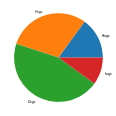

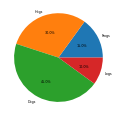

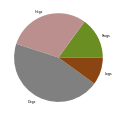

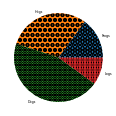

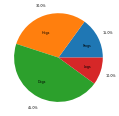

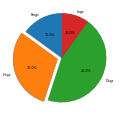

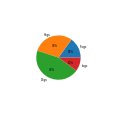

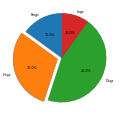

In [159]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
.. redirect-from:: gallery/pie_and_polar_charts/pie_demo2

==========
Pie charts
==========

Demo of plotting a pie chart.

This example illustrates various parameters of `~matplotlib.axes.Axes.pie`.
"""

# %%
# Label slices
# ------------
#
# Plot a pie chart of animals and label the slices. To add
# labels, pass a list of labels to the *labels* parameter

import matplotlib.pyplot as plt

labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

# %%
# Each slice of the pie chart is a `.patches.Wedge` object; therefore in
# addition to the customizations shown here, each wedge can be customized using
# the *wedgeprops* argument, as demonstrated in
# :doc:`/gallery/pie_and_polar_charts/nested_pie`.
#
# Auto-label slices
# -----------------
#
# Pass a function or format string to *autopct* to label slices.

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

# %%
# By default, the label values are obtained from the percent size of the slice.
#
# Color slices
# ------------
#
# Pass a list of colors to *colors* to set the color of each slice.

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,
       colors=['olivedrab', 'rosybrown', 'gray', 'saddlebrown'])

# %%
# Hatch slices
# ------------
#
# Pass a list of hatch patterns to *hatch* to set the pattern of each slice.

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, hatch=['**O', 'oO', 'O.O', '.||.'])

# %%
# Swap label and autopct text positions
# -------------------------------------
# Use the *labeldistance* and *pctdistance* parameters to position the *labels*
# and *autopct* text respectively.

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',
       pctdistance=1.25, labeldistance=.6)

# %%
# *labeldistance* and *pctdistance* are ratios of the radius; therefore they
# vary between ``0`` for the center of the pie and ``1`` for the edge of the
# pie, and can be set to greater than ``1`` to place text outside the pie.
#
# Explode, shade, and rotate slices
# ---------------------------------
#
# In addition to the basic pie chart, this demo shows a few optional features:
#
# * offsetting a slice using *explode*
# * add a drop-shadow using *shadow*
# * custom start angle using *startangle*
#
# This example orders the slices, separates (explodes) them, and rotates them.

explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)
plt.show()

# %%
# The default *startangle* is 0, which would start the first slice ("Frogs") on
# the positive x-axis. This example sets ``startangle = 90`` such that all the
# slices are rotated counter-clockwise by 90 degrees, and the frog slice starts
# on the positive y-axis.
#
# Controlling the size
# --------------------
#
# By changing the *radius* parameter, and often the text size for better visual
# appearance, the pie chart can be scaled.

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct='%.0f%%',
       textprops={'size': 'smaller'}, radius=0.5)
plt.show()

# %%
# Modifying the shadow
# --------------------
#
# The *shadow* parameter may optionally take a dictionary with arguments to
# the `.Shadow` patch. This can be used to modify the default shadow.

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}, startangle=90)
plt.show()

# %%
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.pie` / `matplotlib.pyplot.pie`


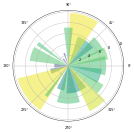

In [160]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=======================
Bar chart on polar axis
=======================

Demo of bar plot on a polar axis.
"""
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute pie slices
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
colors = plt.cm.viridis(radii / 10.)

ax = plt.subplot(projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.bar` / `matplotlib.pyplot.bar`
#    - `matplotlib.projections.polar`


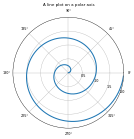

In [161]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==========
Polar plot
==========

Demo of a line plot on a polar axis.
"""
import matplotlib.pyplot as plt
import numpy as np

r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.plot` / `matplotlib.pyplot.plot`
#    - `matplotlib.projections.polar`
#    - `matplotlib.projections.polar.PolarAxes`
#    - `matplotlib.projections.polar.PolarAxes.set_rticks`
#    - `matplotlib.projections.polar.PolarAxes.set_rmax`
#    - `matplotlib.projections.polar.PolarAxes.set_rlabel_position`


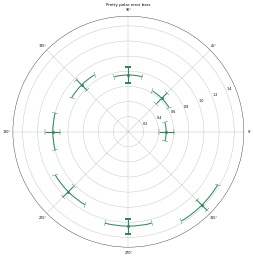

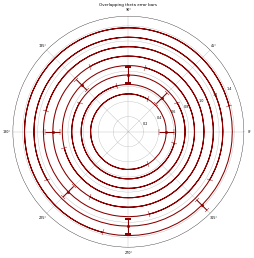

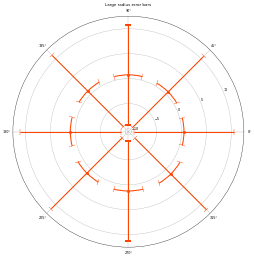

In [162]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=================================
Error bar rendering on polar axis
=================================

Demo of error bar plot in polar coordinates.
Theta error bars are curved lines ended with caps oriented towards the
center.
Radius error bars are straight lines oriented towards center with
perpendicular caps.
"""
import matplotlib.pyplot as plt
import numpy as np

theta = np.arange(0, 2 * np.pi, np.pi / 4)
r = theta / np.pi / 2 + 0.5

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.errorbar(theta, r, xerr=0.25, yerr=0.1, capsize=7, fmt="o", c="seagreen")
ax.set_title("Pretty polar error bars")
plt.show()

# %%
# Please acknowledge that large theta error bars will be overlapping.
# This may reduce readability of the output plot. See example figure below:

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.errorbar(theta, r, xerr=5.25, yerr=0.1, capsize=7, fmt="o", c="darkred")
ax.set_title("Overlapping theta error bars")
plt.show()

# %%
# On the other hand, large radius error bars will never overlap, they just
# lead to unwanted scale in the data, reducing the displayed range.

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.errorbar(theta, r, xerr=0.25, yerr=10.1, capsize=7, fmt="o", c="orangered")
ax.set_title("Large radius error bars")
plt.show()


# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.errorbar` / `matplotlib.pyplot.errorbar`
#    - `matplotlib.projections.polar`


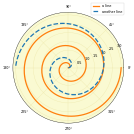

In [163]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
============
Polar legend
============

Using a legend on a polar-axis plot.
"""

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection="polar", facecolor="lightgoldenrodyellow")

r = np.linspace(0, 3, 301)
theta = 2 * np.pi * r
ax.plot(theta, r, color="tab:orange", lw=3, label="a line")
ax.plot(0.5 * theta, r, color="tab:blue", ls="--", lw=3, label="another line")
ax.tick_params(grid_color="palegoldenrod")
# For polar axes, it may be useful to move the legend slightly away from the
# axes center, to avoid overlap between the legend and the axes.  The following
# snippet places the legend's lower left corner just outside the polar axes
# at an angle of 67.5 degrees in polar coordinates.
angle = np.deg2rad(67.5)
ax.legend(loc="lower left",
          bbox_to_anchor=(.5 + np.cos(angle)/2, .5 + np.sin(angle)/2))

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.plot` / `matplotlib.pyplot.plot`
#    - `matplotlib.axes.Axes.legend` / `matplotlib.pyplot.legend`
#    - `matplotlib.projections.polar`
#    - `matplotlib.projections.polar.PolarAxes`


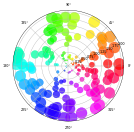

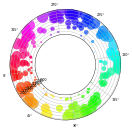

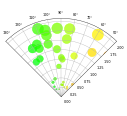

In [164]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==========================
Scatter plot on polar axis
==========================

Size increases radially in this example and color increases with angle
(just to verify the symbols are being scattered correctly).
"""
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute areas and colors
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)

# %%
# Scatter plot on polar axis, with offset origin
# ----------------------------------------------
#
# The main difference with the previous plot is the configuration of the origin
# radius, producing an annulus. Additionally, the theta zero location is set to
# rotate the plot.

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)

ax.set_rorigin(-2.5)
ax.set_theta_zero_location('W', offset=10)

# %%
# Scatter plot on polar axis confined to a sector
# -----------------------------------------------
#
# The main difference with the previous plots is the configuration of the
# theta start and end limits, producing a sector instead of a full circle.

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)

ax.set_thetamin(45)
ax.set_thetamax(135)

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.scatter` / `matplotlib.pyplot.scatter`
#    - `matplotlib.projections.polar`
#    - `matplotlib.projections.polar.PolarAxes.set_rorigin`
#    - `matplotlib.projections.polar.PolarAxes.set_theta_zero_location`
#    - `matplotlib.projections.polar.PolarAxes.set_thetamin`
#    - `matplotlib.projections.polar.PolarAxes.set_thetamax`


In [165]:
ChapterConfig.set_chapter_name("06text_labels_and_annotations")

In [166]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [167]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [168]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [169]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [170]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [171]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [172]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [173]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [174]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [175]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [176]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [177]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [178]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [179]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [180]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [181]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [182]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [183]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [184]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [185]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [186]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [187]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [188]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [189]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [190]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [191]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [192]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [193]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [194]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [195]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [196]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [197]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [198]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [199]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [200]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [201]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [202]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [203]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [204]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [205]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [206]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [207]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [208]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [209]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [210]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [211]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [212]:
# 06text_labels_and_annotations THIS Chapter WAS REMOVED

In [213]:
ChapterConfig.set_chapter_name("07color")

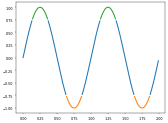

In [214]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
================
Color by y-value
================

Use masked arrays to plot a line with different colors by y-value.
"""
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2 * np.pi * t)

upper = 0.77
lower = -0.77

supper = np.ma.masked_where(s < upper, s)
slower = np.ma.masked_where(s > lower, s)
smiddle = np.ma.masked_where((s < lower) | (s > upper), s)

fig, ax = plt.subplots()
ax.plot(t, smiddle, t, slower, t, supper)
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.plot` / `matplotlib.pyplot.plot`


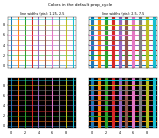

In [215]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
====================================
Colors in the default property cycle
====================================

Display the colors from the default prop_cycle, which is obtained from the
:ref:`rc parameters<customizing>`.
"""
import matplotlib.pyplot as plt
import numpy as np

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

lwbase = plt.rcParams['lines.linewidth']
thin = lwbase / 2
thick = lwbase * 3

fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
for icol in range(2):
    if icol == 0:
        lwx, lwy = thin, lwbase
    else:
        lwx, lwy = lwbase, thick
    for irow in range(2):
        for i, color in enumerate(colors):
            axs[irow, icol].axhline(i, color=color, lw=lwx)
            axs[irow, icol].axvline(i, color=color, lw=lwy)

    axs[1, icol].set_facecolor('k')
    axs[1, icol].xaxis.set_ticks(np.arange(0, 10, 2))
    axs[0, icol].set_title(f'line widths (pts): {lwx:g}, {lwy:g}',
                           fontsize='medium')

for irow in range(2):
    axs[irow, 0].yaxis.set_ticks(np.arange(0, 10, 2))

fig.suptitle('Colors in the default prop_cycle', fontsize='large')

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.axhline` / `matplotlib.pyplot.axhline`
#    - `matplotlib.axes.Axes.axvline` / `matplotlib.pyplot.axvline`
#    - `matplotlib.axes.Axes.set_facecolor`
#    - `matplotlib.figure.Figure.suptitle`


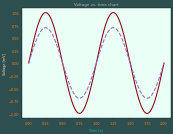

In [216]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==========
Color Demo
==========

Matplotlib recognizes the following formats to specify a color:

1) an RGB or RGBA tuple of float values in ``[0, 1]`` (e.g. ``(0.1, 0.2, 0.5)``
   or ``(0.1, 0.2, 0.5, 0.3)``).  RGBA is short for Red, Green, Blue, Alpha;
2) a hex RGB or RGBA string (e.g., ``'#0F0F0F'`` or ``'#0F0F0F0F'``);
3) a shorthand hex RGB or RGBA string, equivalent to the hex RGB or RGBA
   string obtained by duplicating each character, (e.g., ``'#abc'``, equivalent
   to ``'#aabbcc'``, or ``'#abcd'``, equivalent to ``'#aabbccdd'``);
4) a string representation of a float value in ``[0, 1]`` inclusive for gray
   level (e.g., ``'0.5'``);
5) a single letter string, i.e. one of
   ``{'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}``, which are short-hand notations
   for shades of blue, green, red, cyan, magenta, yellow, black, and white;
6) a X11/CSS4 ("html") color name, e.g. ``"blue"``;
7) a name from the `xkcd color survey <https://xkcd.com/color/rgb/>`__,
   prefixed with ``'xkcd:'`` (e.g., ``'xkcd:sky blue'``);
8) a "Cn" color spec, i.e. ``'C'`` followed by a number, which is an index into
   the default property cycle (:rc:`axes.prop_cycle`); the indexing is intended
   to occur at rendering time, and defaults to black if the cycle does not
   include color.
9) one of ``{'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
   'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'}`` which are
   the Tableau Colors from the 'tab10' categorical palette (which is the
   default color cycle);

For more information on colors in matplotlib see

* the :ref:`colors_def` tutorial;
* the `matplotlib.colors` API;
* the :doc:`/gallery/color/named_colors` example.
"""

import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0.0, 2.0, 201)
s = np.sin(2 * np.pi * t)

# 1) RGB tuple:
fig, ax = plt.subplots(facecolor=(.18, .31, .31))
# 2) hex string:
ax.set_facecolor('#eafff5')
# 3) gray level string:
ax.set_title('Voltage vs. time chart', color='0.7')
# 4) single letter color string
ax.set_xlabel('Time [s]', color='c')
# 5) a named color:
ax.set_ylabel('Voltage [mV]', color='peachpuff')
# 6) a named xkcd color:
ax.plot(t, s, 'xkcd:crimson')
# 7) Cn notation:
ax.plot(t, .7*s, color='C4', linestyle='--')
# 8) tab notation:
ax.tick_params(labelcolor='tab:orange')


plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.colors`
#    - `matplotlib.axes.Axes.plot`
#    - `matplotlib.axes.Axes.set_facecolor`
#    - `matplotlib.axes.Axes.set_title`
#    - `matplotlib.axes.Axes.set_xlabel`
#    - `matplotlib.axes.Axes.set_ylabel`
#    - `matplotlib.axes.Axes.tick_params`


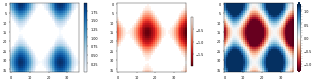

In [217]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
========
Colorbar
========

Use `~.Figure.colorbar` by specifying the mappable object (here
the `.AxesImage` returned by `~.axes.Axes.imshow`)
and the axes to attach the colorbar to.
"""

import matplotlib.pyplot as plt
import numpy as np

# setup some generic data
N = 37
x, y = np.mgrid[:N, :N]
Z = (np.cos(x*0.2) + np.sin(y*0.3))

# mask out the negative and positive values, respectively
Zpos = np.ma.masked_less(Z, 0)
Zneg = np.ma.masked_greater(Z, 0)

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(13, 3), ncols=3)

# plot just the positive data and save the
# color "mappable" object returned by ax1.imshow
pos = ax1.imshow(Zpos, cmap='Blues', interpolation='none')

# add the colorbar using the figure's method,
# telling which mappable we're talking about and
# which axes object it should be near
fig.colorbar(pos, ax=ax1)

# repeat everything above for the negative data
# you can specify location, anchor and shrink the colorbar
neg = ax2.imshow(Zneg, cmap='Reds_r', interpolation='none')
fig.colorbar(neg, ax=ax2, location='right', anchor=(0, 0.3), shrink=0.7)

# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = ax3.imshow(Z, cmap='RdBu', vmin=-1.2, vmax=1.2,
                             interpolation='none')
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=ax3, extend='both')
cbar.minorticks_on()
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.imshow` / `matplotlib.pyplot.imshow`
#    - `matplotlib.figure.Figure.colorbar` / `matplotlib.pyplot.colorbar`
#    - `matplotlib.colorbar.Colorbar.minorticks_on`
#    - `matplotlib.colorbar.Colorbar.minorticks_off`


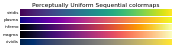

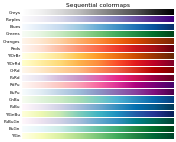

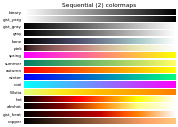

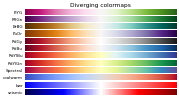

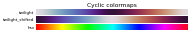

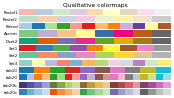

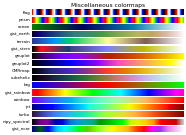

In [218]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==================
Colormap reference
==================

Reference for colormaps included with Matplotlib.

A reversed version of each of these colormaps is available by appending
``_r`` to the name, as shown in :ref:`reverse-cmap`.

See :ref:`colormaps` for an in-depth discussion about
colormaps, including colorblind-friendliness, and
:ref:`colormap-manipulation` for a guide to creating
colormaps.
"""

import matplotlib.pyplot as plt
import numpy as np

cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
            'gist_ncar'])]

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows-1)*0.1)*0.22
    fig, axs = plt.subplots(nrows=nrows, figsize=(6.4, figh))
    fig.subplots_adjust(top=1-.35/figh, bottom=.15/figh, left=0.2, right=0.99)

    axs[0].set_title(f"{cmap_category} colormaps", fontsize=14)

    for ax, cmap_name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=cmap_name)
        ax.text(-.01, .5, cmap_name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list)


# %%
# .. _reverse-cmap:
#
# Reversed colormaps
# ------------------
#
# Append ``_r`` to the name of any built-in colormap to get the reversed
# version:

plot_color_gradients("Original and reversed ", ['viridis', 'viridis_r'])

# %%
# The built-in reversed colormaps are generated using `.Colormap.reversed`.
# For an example, see :ref:`reversing-colormap`

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.colors`
#    - `matplotlib.axes.Axes.imshow`
#    - `matplotlib.figure.Figure.text`
#    - `matplotlib.axes.Axes.set_axis_off`


In [219]:
# THIS mpl.colormaps.register preamble EXAMPLE WAS REMOVED

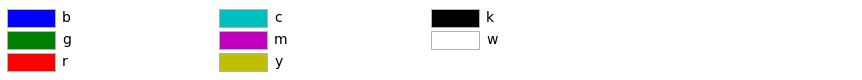

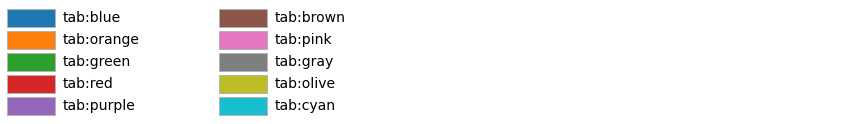

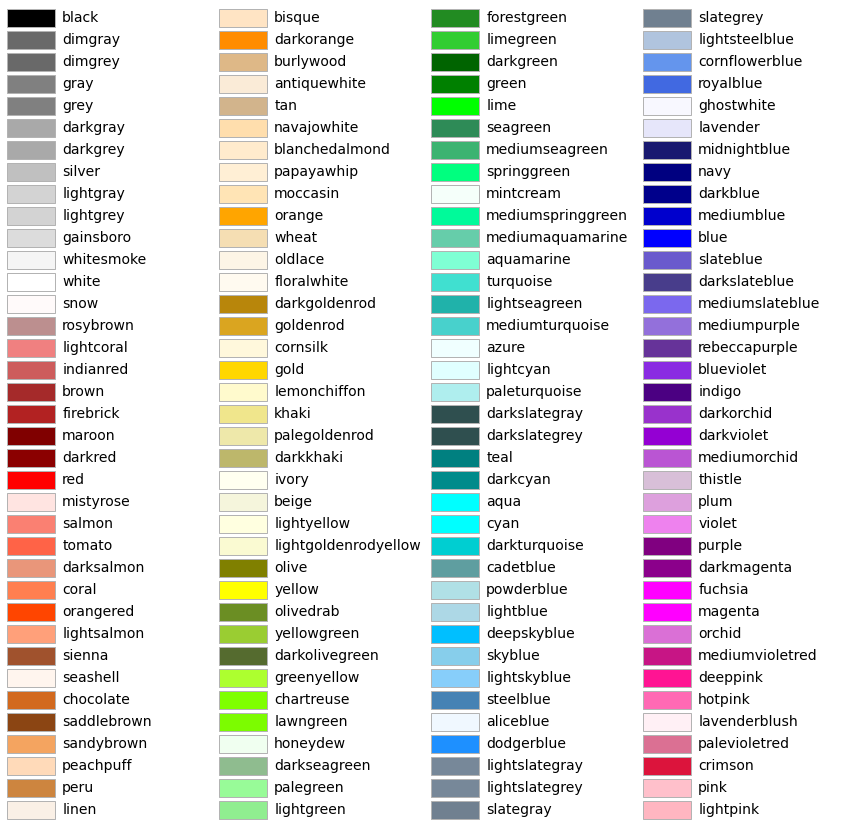

In [220]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
====================
List of named colors
====================

This plots a list of the named colors supported in matplotlib.
For more information on colors in matplotlib see

* the :ref:`colors_def` tutorial;
* the `matplotlib.colors` API;
* the :doc:`/gallery/color/color_demo`.

----------------------------
Helper Function for Plotting
----------------------------
First we define a helper function for making a table of colors, then we use it
on some common color categories.
"""

import math

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle


def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

# %%
# -----------
# Base colors
# -----------

plot_colortable(mcolors.BASE_COLORS, ncols=3, sort_colors=False)

# %%
# ---------------
# Tableau Palette
# ---------------

plot_colortable(mcolors.TABLEAU_COLORS, ncols=2, sort_colors=False)

# %%
# ----------
# CSS Colors
# ----------

# sphinx_gallery_thumbnail_number = 3
plot_colortable(mcolors.CSS4_COLORS)
plt.show()

# %%
# -----------
# XKCD Colors
# -----------
# XKCD colors are supported, but they produce a large figure, so we skip them
# for now. You can use the following code if desired::
#
#     xkcd_fig = plot_colortable(mcolors.XKCD_COLORS)
#     xkcd_fig.savefig("XKCD_Colors.png")
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.colors`
#    - `matplotlib.colors.rgb_to_hsv`
#    - `matplotlib.colors.to_rgba`
#    - `matplotlib.figure.Figure.get_size_inches`
#    - `matplotlib.figure.Figure.subplots_adjust`
#    - `matplotlib.axes.Axes.text`
#    - `matplotlib.patches.Rectangle`


In [221]:
# THIS PGF preamble EXAMPLE WAS REMOVED

In [222]:
ChapterConfig.set_chapter_name("08shapes_and_collections")

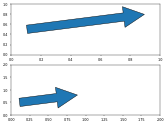

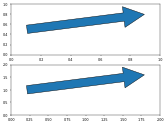

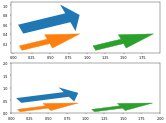

In [223]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===========
Arrow guide
===========

Adding arrow patches to plots.

Arrows are often used to annotate plots. This tutorial shows how to plot arrows
that behave differently when the data limits on a plot are changed. In general,
points on a plot can either be fixed in "data space" or "display space".
Something plotted in data space moves when the data limits are altered - an
example would be the points in a scatter plot. Something plotted in display
space stays static when data limits are altered - an example would be a
figure title or the axis labels.

Arrows consist of a head (and possibly a tail) and a stem drawn between a
start point and end point, called 'anchor points' from now on.
Here we show three use cases for plotting arrows, depending on whether the
head or anchor points need to be fixed in data or display space:

1. Head shape fixed in display space, anchor points fixed in data space
2. Head shape and anchor points fixed in display space
3. Entire patch fixed in data space

Below each use case is presented in turn.

.. redirect-from:: /gallery/text_labels_and_annotations/arrow_simple_demo
"""

import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

x_tail = 0.1
y_tail = 0.5
x_head = 0.9
y_head = 0.8
dx = x_head - x_tail
dy = y_head - y_tail


# %%
# Head shape fixed in display space and anchor points fixed in data space
# -----------------------------------------------------------------------
#
# This is useful if you are annotating a plot, and don't want the arrow
# to change shape or position if you pan or scale the plot.
#
# In this case we use `.patches.FancyArrowPatch`.
#
# Note that when the axis limits are changed, the arrow shape stays the same,
# but the anchor points move.

fig, axs = plt.subplots(nrows=2)
arrow = mpatches.FancyArrowPatch((x_tail, y_tail), (x_head, y_head),
                                 mutation_scale=100)
axs[0].add_patch(arrow)

arrow = mpatches.FancyArrowPatch((x_tail, y_tail), (x_head, y_head),
                                 mutation_scale=100)
axs[1].add_patch(arrow)
axs[1].set(xlim=(0, 2), ylim=(0, 2))

# %%
# Head shape and anchor points fixed in display space
# ---------------------------------------------------
#
# This is useful if you are annotating a plot, and don't want the arrow to
# change shape or position if you pan or scale the plot.
#
# In this case we use `.patches.FancyArrowPatch`, and pass the keyword argument
# ``transform=ax.transAxes`` where ``ax`` is the axes we are adding the patch
# to.
#
# Note that when the axis limits are changed, the arrow shape and location
# stay the same.

fig, axs = plt.subplots(nrows=2)
arrow = mpatches.FancyArrowPatch((x_tail, y_tail), (x_head, y_head),
                                 mutation_scale=100,
                                 transform=axs[0].transAxes)
axs[0].add_patch(arrow)

arrow = mpatches.FancyArrowPatch((x_tail, y_tail), (x_head, y_head),
                                 mutation_scale=100,
                                 transform=axs[1].transAxes)
axs[1].add_patch(arrow)
axs[1].set(xlim=(0, 2), ylim=(0, 2))


# %%
# Head shape and anchor points fixed in data space
# ------------------------------------------------
#
# In this case we use `.patches.Arrow`, or `.patches.FancyArrow` (the latter is
# in orange).
#
# Note that when the axis limits are changed, the arrow shape and location
# change.
#
# `.FancyArrow`'s API is relatively awkward, and requires in particular passing
# ``length_includes_head=True`` so that the arrow *tip* is ``(dx, dy)`` away
# from the arrow start.  It is only included in this reference because it is
# the arrow class returned by `.Axes.arrow` (in green).

fig, axs = plt.subplots(nrows=2)

arrow = mpatches.Arrow(x_tail, y_tail, dx, dy)
axs[0].add_patch(arrow)
arrow = mpatches.FancyArrow(x_tail, y_tail - .4, dx, dy,
                            width=.1, length_includes_head=True, color="C1")
axs[0].add_patch(arrow)
axs[0].arrow(x_tail + 1, y_tail - .4, dx, dy,
             width=.1, length_includes_head=True, color="C2")

arrow = mpatches.Arrow(x_tail, y_tail, dx, dy)
axs[1].add_patch(arrow)
arrow = mpatches.FancyArrow(x_tail, y_tail - .4, dx, dy,
                            width=.1, length_includes_head=True, color="C1")
axs[1].add_patch(arrow)
axs[1].arrow(x_tail + 1, y_tail - .4, dx, dy,
             width=.1, length_includes_head=True, color="C2")
axs[1].set(xlim=(0, 2), ylim=(0, 2))

# %%

plt.show()


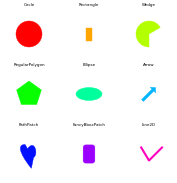

In [224]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
.. _artist_reference:

================================
Reference for Matplotlib artists
================================

This example displays several of Matplotlib's graphics primitives (artists).
A full list of artists is documented at :ref:`the artist API <artist-api>`.

See also :doc:`/gallery/shapes_and_collections/patch_collection`, which groups
all artists into a single `.PatchCollection` instead.

Copyright (c) 2010, Bartosz Telenczuk
BSD License
"""

import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.path as mpath

# Prepare the data for the PathPatch below.
Path = mpath.Path
codes, verts = zip(*[
    (Path.MOVETO, [0.018, -0.11]),
    (Path.CURVE4, [-0.031, -0.051]),
    (Path.CURVE4, [-0.115, 0.073]),
    (Path.CURVE4, [-0.03, 0.073]),
    (Path.LINETO, [-0.011, 0.039]),
    (Path.CURVE4, [0.043, 0.121]),
    (Path.CURVE4, [0.075, -0.005]),
    (Path.CURVE4, [0.035, -0.027]),
    (Path.CLOSEPOLY, [0.018, -0.11])])

artists = [
    mpatches.Circle((0, 0), 0.1, ec="none"),
    mpatches.Rectangle((-0.025, -0.05), 0.05, 0.1, ec="none"),
    mpatches.Wedge((0, 0), 0.1, 30, 270, ec="none"),
    mpatches.RegularPolygon((0, 0), 5, radius=0.1),
    mpatches.Ellipse((0, 0), 0.2, 0.1),
    mpatches.Arrow(-0.05, -0.05, 0.1, 0.1, width=0.1),
    mpatches.PathPatch(mpath.Path(verts, codes), ec="none"),
    mpatches.FancyBboxPatch((-0.025, -0.05), 0.05, 0.1, ec="none",
                            boxstyle=mpatches.BoxStyle("Round", pad=0.02)),
    mlines.Line2D([-0.06, 0.0, 0.1], [0.05, -0.05, 0.05], lw=5),
]

axs = plt.figure(figsize=(6, 6), layout="constrained").subplots(3, 3)
for i, (ax, artist) in enumerate(zip(axs.flat, artists)):
    artist.set(color=mpl.colormaps["hsv"](i / len(artists)))
    ax.add_artist(artist)
    ax.set(title=type(artist).__name__,
           aspect=1, xlim=(-.2, .2), ylim=(-.2, .2))
    ax.set_axis_off()
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.path`
#    - `matplotlib.path.Path`
#    - `matplotlib.lines`
#    - `matplotlib.lines.Line2D`
#    - `matplotlib.patches`
#    - `matplotlib.patches.Circle`
#    - `matplotlib.patches.Ellipse`
#    - `matplotlib.patches.Wedge`
#    - `matplotlib.patches.Rectangle`
#    - `matplotlib.patches.Arrow`
#    - `matplotlib.patches.PathPatch`
#    - `matplotlib.patches.FancyBboxPatch`
#    - `matplotlib.patches.RegularPolygon`
#    - `matplotlib.axes.Axes.add_artist`


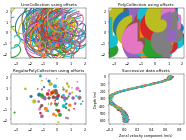

In [225]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=========================================================
Line, Poly and RegularPoly Collection with autoscaling
=========================================================

For the first two subplots, we will use spirals.  Their size will be set in
plot units, not data units.  Their positions will be set in data units by using
the *offsets* and *offset_transform* keyword arguments of the `.LineCollection`
and `.PolyCollection`.

The third subplot will make regular polygons, with the same
type of scaling and positioning as in the first two.

The last subplot illustrates the use of ``offsets=(xo, yo)``,
that is, a single tuple instead of a list of tuples, to generate
successively offset curves, with the offset given in data
units.  This behavior is available only for the LineCollection.
"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import collections, transforms

nverts = 50
npts = 100

# Make some spirals
r = np.arange(nverts)
theta = np.linspace(0, 2*np.pi, nverts)
xx = r * np.sin(theta)
yy = r * np.cos(theta)
spiral = np.column_stack([xx, yy])

# Fixing random state for reproducibility
rs = np.random.RandomState(19680801)

# Make some offsets
xyo = rs.randn(npts, 2)

# Make a list of colors cycling through the default series.
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.subplots_adjust(top=0.92, left=0.07, right=0.97,
                    hspace=0.3, wspace=0.3)


col = collections.LineCollection(
    [spiral], offsets=xyo, offset_transform=ax1.transData)
trans = fig.dpi_scale_trans + transforms.Affine2D().scale(1.0/72.0)
col.set_transform(trans)  # the points to pixels transform
# Note: the first argument to the collection initializer
# must be a list of sequences of (x, y) tuples; we have only
# one sequence, but we still have to put it in a list.
ax1.add_collection(col, autolim=True)
# autolim=True enables autoscaling.  For collections with
# offsets like this, it is neither efficient nor accurate,
# but it is good enough to generate a plot that you can use
# as a starting point.  If you know beforehand the range of
# x and y that you want to show, it is better to set them
# explicitly, leave out the *autolim* keyword argument (or set it to False),
# and omit the 'ax1.autoscale_view()' call below.

# Make a transform for the line segments such that their size is
# given in points:
col.set_color(colors)

ax1.autoscale_view()  # See comment above, after ax1.add_collection.
ax1.set_title('LineCollection using offsets')


# The same data as above, but fill the curves.
col = collections.PolyCollection(
    [spiral], offsets=xyo, offset_transform=ax2.transData)
trans = transforms.Affine2D().scale(fig.dpi/72.0)
col.set_transform(trans)  # the points to pixels transform
ax2.add_collection(col, autolim=True)
col.set_color(colors)


ax2.autoscale_view()
ax2.set_title('PolyCollection using offsets')

# 7-sided regular polygons

col = collections.RegularPolyCollection(
    7, sizes=np.abs(xx) * 10.0, offsets=xyo, offset_transform=ax3.transData)
trans = transforms.Affine2D().scale(fig.dpi / 72.0)
col.set_transform(trans)  # the points to pixels transform
ax3.add_collection(col, autolim=True)
col.set_color(colors)
ax3.autoscale_view()
ax3.set_title('RegularPolyCollection using offsets')


# Simulate a series of ocean current profiles, successively
# offset by 0.1 m/s so that they form what is sometimes called
# a "waterfall" plot or a "stagger" plot.

nverts = 60
ncurves = 20
offs = (0.1, 0.0)

yy = np.linspace(0, 2*np.pi, nverts)
ym = np.max(yy)
xx = (0.2 + (ym - yy) / ym) ** 2 * np.cos(yy - 0.4) * 0.5
segs = []
for i in range(ncurves):
    xxx = xx + 0.02*rs.randn(nverts)
    curve = np.column_stack([xxx, yy * 100])
    segs.append(curve)

col = collections.LineCollection(segs, offsets=offs)
ax4.add_collection(col, autolim=True)
col.set_color(colors)
ax4.autoscale_view()
ax4.set_title('Successive data offsets')
ax4.set_xlabel('Zonal velocity component (m/s)')
ax4.set_ylabel('Depth (m)')
# Reverse the y-axis so depth increases downward
ax4.set_ylim(ax4.get_ylim()[::-1])


plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.figure.Figure`
#    - `matplotlib.collections`
#    - `matplotlib.collections.LineCollection`
#    - `matplotlib.collections.RegularPolyCollection`
#    - `matplotlib.axes.Axes.add_collection`
#    - `matplotlib.axes.Axes.autoscale_view`
#    - `matplotlib.transforms.Affine2D`
#    - `matplotlib.transforms.Affine2D.scale`


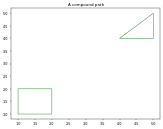

In [226]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=============
Compound path
=============

Make a compound path -- in this case two simple polygons, a rectangle
and a triangle.  Use ``CLOSEPOLY`` and ``MOVETO`` for the different parts of
the compound path
"""

import matplotlib.pyplot as plt

from matplotlib.patches import PathPatch
from matplotlib.path import Path

vertices = []
codes = []

codes = [Path.MOVETO] + [Path.LINETO]*3 + [Path.CLOSEPOLY]
vertices = [(1, 1), (1, 2), (2, 2), (2, 1), (0, 0)]

codes += [Path.MOVETO] + [Path.LINETO]*2 + [Path.CLOSEPOLY]
vertices += [(4, 4), (5, 5), (5, 4), (0, 0)]

path = Path(vertices, codes)

pathpatch = PathPatch(path, facecolor='none', edgecolor='green')

fig, ax = plt.subplots()
ax.add_patch(pathpatch)
ax.set_title('A compound path')

ax.autoscale_view()

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.path`
#    - `matplotlib.path.Path`
#    - `matplotlib.patches`
#    - `matplotlib.patches.PathPatch`
#    - `matplotlib.axes.Axes.add_patch`
#    - `matplotlib.axes.Axes.autoscale_view`


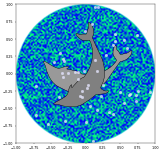

In [227]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
========
Dolphins
========

This example shows how to draw, and manipulate shapes given vertices
and nodes using the `~.path.Path`, `~.patches.PathPatch` and
`~matplotlib.transforms` classes.
"""

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.cm as cm
from matplotlib.patches import Circle, PathPatch
from matplotlib.path import Path
from matplotlib.transforms import Affine2D

# Fixing random state for reproducibility
np.random.seed(19680801)


r = np.random.rand(50)
t = np.random.rand(50) * np.pi * 2.0
x = r * np.cos(t)
y = r * np.sin(t)

fig, ax = plt.subplots(figsize=(6, 6))
circle = Circle((0, 0), 1, facecolor='none',
                edgecolor=(0, 0.8, 0.8), linewidth=3, alpha=0.5)
ax.add_patch(circle)

im = plt.imshow(np.random.random((100, 100)),
                origin='lower', cmap=cm.winter,
                interpolation='spline36',
                extent=([-1, 1, -1, 1]))
im.set_clip_path(circle)

plt.plot(x, y, 'o', color=(0.9, 0.9, 1.0), alpha=0.8)

# Dolphin from OpenClipart library by Andy Fitzsimon
#   <cc:License rdf:about="http://web.resource.org/cc/PublicDomain">
#     <cc:permits rdf:resource="http://web.resource.org/cc/Reproduction"/>
#     <cc:permits rdf:resource="http://web.resource.org/cc/Distribution"/>
#     <cc:permits rdf:resource="http://web.resource.org/cc/DerivativeWorks"/>
#   </cc:License>

dolphin = """
M -0.59739425,160.18173 C -0.62740401,160.18885 -0.57867129,160.11183
-0.57867129,160.11183 C -0.57867129,160.11183 -0.5438361,159.89315
-0.39514638,159.81496 C -0.24645668,159.73678 -0.18316813,159.71981
-0.18316813,159.71981 C -0.18316813,159.71981 -0.10322971,159.58124
-0.057804323,159.58725 C -0.029723983,159.58913 -0.061841603,159.60356
-0.071265813,159.62815 C -0.080250183,159.65325 -0.082918513,159.70554
-0.061841203,159.71248 C -0.040763903,159.7194 -0.0066711426,159.71091
0.077336307,159.73612 C 0.16879567,159.76377 0.28380306,159.86448
0.31516668,159.91533 C 0.3465303,159.96618 0.5011127,160.1771
0.5011127,160.1771 C 0.63668998,160.19238 0.67763022,160.31259
0.66556395,160.32668 C 0.65339985,160.34212 0.66350443,160.33642
0.64907098,160.33088 C 0.63463742,160.32533 0.61309688,160.297
0.5789627,160.29339 C 0.54348657,160.28968 0.52329693,160.27674
0.50728856,160.27737 C 0.49060916,160.27795 0.48965803,160.31565
0.46114204,160.33673 C 0.43329696,160.35786 0.4570711,160.39871
0.43309565,160.40685 C 0.4105108,160.41442 0.39416631,160.33027
0.3954995,160.2935 C 0.39683269,160.25672 0.43807996,160.21522
0.44567915,160.19734 C 0.45327833,160.17946 0.27946869,159.9424
-0.061852613,159.99845 C -0.083965233,160.0427 -0.26176109,160.06683
-0.26176109,160.06683 C -0.30127962,160.07028 -0.21167141,160.09731
-0.24649368,160.1011 C -0.32642366,160.11569 -0.34521187,160.06895
-0.40622293,160.0819 C -0.467234,160.09485 -0.56738444,160.17461
-0.59739425,160.18173
"""

vertices = []
codes = []
parts = dolphin.split()
i = 0
code_map = {
    'M': Path.MOVETO,
    'C': Path.CURVE4,
    'L': Path.LINETO,
}

while i < len(parts):
    path_code = code_map[parts[i]]
    npoints = Path.NUM_VERTICES_FOR_CODE[path_code]
    codes.extend([path_code] * npoints)
    vertices.extend([[*map(float, y.split(','))]
                     for y in parts[i + 1:][:npoints]])
    i += npoints + 1
vertices = np.array(vertices)
vertices[:, 1] -= 160

dolphin_path = Path(vertices, codes)
dolphin_patch = PathPatch(dolphin_path, facecolor=(0.6, 0.6, 0.6),
                          edgecolor=(0.0, 0.0, 0.0))
ax.add_patch(dolphin_patch)

vertices = Affine2D().rotate_deg(60).transform(vertices)
dolphin_path2 = Path(vertices, codes)
dolphin_patch2 = PathPatch(dolphin_path2, facecolor=(0.5, 0.5, 0.5),
                           edgecolor=(0.0, 0.0, 0.0))
ax.add_patch(dolphin_patch2)

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.path`
#    - `matplotlib.path.Path`
#    - `matplotlib.patches`
#    - `matplotlib.patches.PathPatch`
#    - `matplotlib.patches.Circle`
#    - `matplotlib.axes.Axes.add_patch`
#    - `matplotlib.transforms`
#    - `matplotlib.transforms.Affine2D`
#    - `matplotlib.transforms.Affine2D.rotate_deg`


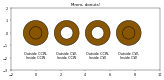

In [228]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
r"""
=============
Mmh Donuts!!!
=============

Draw donuts (miam!) using `~.path.Path`\s and `~.patches.PathPatch`\es.
This example shows the effect of the path's orientations in a compound path.
"""

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.patches as mpatches
import matplotlib.path as mpath


def wise(v):
    if v == 1:
        return "CCW"
    else:
        return "CW"


def make_circle(r):
    t = np.arange(0, np.pi * 2.0, 0.01)
    t = t.reshape((len(t), 1))
    x = r * np.cos(t)
    y = r * np.sin(t)
    return np.hstack((x, y))

Path = mpath.Path

fig, ax = plt.subplots()

inside_vertices = make_circle(0.5)
outside_vertices = make_circle(1.0)
codes = np.ones(
    len(inside_vertices), dtype=mpath.Path.code_type) * mpath.Path.LINETO
codes[0] = mpath.Path.MOVETO

for i, (inside, outside) in enumerate(((1, 1), (1, -1), (-1, 1), (-1, -1))):
    # Concatenate the inside and outside subpaths together, changing their
    # order as needed
    vertices = np.concatenate((outside_vertices[::outside],
                               inside_vertices[::inside]))
    # Shift the path
    vertices[:, 0] += i * 2.5
    # The codes will be all "LINETO" commands, except for "MOVETO"s at the
    # beginning of each subpath
    all_codes = np.concatenate((codes, codes))
    # Create the Path object
    path = mpath.Path(vertices, all_codes)
    # Add plot it
    patch = mpatches.PathPatch(path, facecolor='#885500', edgecolor='black')
    ax.add_patch(patch)

    ax.annotate(f"Outside {wise(outside)},\nInside {wise(inside)}",
                (i * 2.5, -1.5), va="top", ha="center")

ax.set_xlim(-2, 10)
ax.set_ylim(-3, 2)
ax.set_title('Mmm, donuts!')
ax.set_aspect(1.0)
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.path`
#    - `matplotlib.path.Path`
#    - `matplotlib.patches`
#    - `matplotlib.patches.PathPatch`
#    - `matplotlib.patches.Circle`
#    - `matplotlib.axes.Axes.add_patch`
#    - `matplotlib.axes.Axes.annotate`
#    - `matplotlib.axes.Axes.set_aspect`
#    - `matplotlib.axes.Axes.set_xlim`
#    - `matplotlib.axes.Axes.set_ylim`
#    - `matplotlib.axes.Axes.set_title`


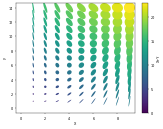

In [229]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==================
Ellipse Collection
==================

Drawing a collection of ellipses. While this would equally be possible using
a `~.collections.EllipseCollection` or `~.collections.PathCollection`, the use
of an `~.collections.EllipseCollection` allows for much shorter code.
"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.collections import EllipseCollection

x = np.arange(10)
y = np.arange(15)
X, Y = np.meshgrid(x, y)

XY = np.column_stack((X.ravel(), Y.ravel()))

ww = X / 10.0
hh = Y / 15.0
aa = X * 9


fig, ax = plt.subplots()

ec = EllipseCollection(ww, hh, aa, units='x', offsets=XY,
                       offset_transform=ax.transData)
ec.set_array((X + Y).ravel())
ax.add_collection(ec)
ax.autoscale_view()
ax.set_xlabel('X')
ax.set_ylabel('y')
cbar = plt.colorbar(ec)
cbar.set_label('X+Y')
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.collections`
#    - `matplotlib.collections.EllipseCollection`
#    - `matplotlib.axes.Axes.add_collection`
#    - `matplotlib.axes.Axes.autoscale_view`
#    - `matplotlib.cm.ScalarMappable.set_array`


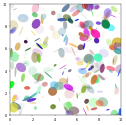

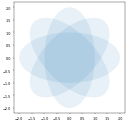

In [230]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
============
Ellipse Demo
============

Draw many ellipses. Here individual ellipses are drawn. Compare this
to the :doc:`Ellipse collection example
</gallery/shapes_and_collections/ellipse_collection>`.
"""
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Ellipse

# Fixing random state for reproducibility
np.random.seed(19680801)

NUM = 250

ells = [Ellipse(xy=np.random.rand(2) * 10,
                width=np.random.rand(), height=np.random.rand(),
                angle=np.random.rand() * 360)
        for i in range(NUM)]

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(np.random.rand())
    e.set_facecolor(np.random.rand(3))

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.show()

# %%
# ===============
# Ellipse Rotated
# ===============
#
# Draw many ellipses with different angles.
#

angle_step = 45  # degrees
angles = np.arange(0, 180, angle_step)

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})

for angle in angles:
    ellipse = Ellipse((0, 0), 4, 2, angle=angle, alpha=0.1)
    ax.add_artist(ellipse)

ax.set_xlim(-2.2, 2.2)
ax.set_ylim(-2.2, 2.2)

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.patches`
#    - `matplotlib.patches.Ellipse`
#    - `matplotlib.axes.Axes.add_artist`
#    - `matplotlib.artist.Artist.set_clip_box`
#    - `matplotlib.artist.Artist.set_alpha`
#    - `matplotlib.patches.Patch.set_facecolor`


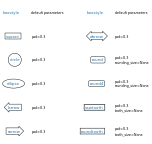

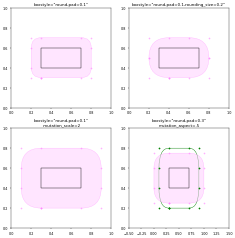

In [231]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===================
Drawing fancy boxes
===================

The following examples show how to plot boxes with different visual properties.
"""

import inspect

import matplotlib.pyplot as plt

import matplotlib.patches as mpatch
from matplotlib.patches import FancyBboxPatch
import matplotlib.transforms as mtransforms

# %%
# First we'll show some sample boxes with fancybox.

styles = mpatch.BoxStyle.get_styles()
ncol = 2
nrow = (len(styles) + 1) // ncol
axs = (plt.figure(figsize=(3 * ncol, 1 + nrow))
       .add_gridspec(1 + nrow, ncol, wspace=.5).subplots())
for ax in axs.flat:
    ax.set_axis_off()
for ax in axs[0, :]:
    ax.text(.2, .5, "boxstyle",
            transform=ax.transAxes, size="large", color="tab:blue",
            horizontalalignment="right", verticalalignment="center")
    ax.text(.4, .5, "default parameters",
            transform=ax.transAxes,
            horizontalalignment="left", verticalalignment="center")
for ax, (stylename, stylecls) in zip(axs[1:, :].T.flat, styles.items()):
    ax.text(.2, .5, stylename, bbox=dict(boxstyle=stylename, fc="w", ec="k"),
            transform=ax.transAxes, size="large", color="tab:blue",
            horizontalalignment="right", verticalalignment="center")
    ax.text(.4, .5, str(inspect.signature(stylecls))[1:-1].replace(", ", "\n"),
            transform=ax.transAxes,
            horizontalalignment="left", verticalalignment="center")


# %%
# Next we'll show off multiple fancy boxes at once.


def add_fancy_patch_around(ax, bb, **kwargs):
    fancy = FancyBboxPatch(bb.p0, bb.width, bb.height,
                           fc=(1, 0.8, 1, 0.5), ec=(1, 0.5, 1, 0.5),
                           **kwargs)
    ax.add_patch(fancy)
    return fancy


def draw_control_points_for_patches(ax):
    for patch in ax.patches:
        patch.axes.plot(*patch.get_path().vertices.T, ".",
                        c=patch.get_edgecolor())


fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Bbox object around which the fancy box will be drawn.
bb = mtransforms.Bbox([[0.3, 0.4], [0.7, 0.6]])

ax = axs[0, 0]
# a fancy box with round corners. pad=0.1
fancy = add_fancy_patch_around(ax, bb, boxstyle="round,pad=0.1")
ax.set(xlim=(0, 1), ylim=(0, 1), aspect=1,
       title='boxstyle="round,pad=0.1"')

ax = axs[0, 1]
# bbox=round has two optional arguments: pad and rounding_size.
# They can be set during the initialization.
fancy = add_fancy_patch_around(ax, bb, boxstyle="round,pad=0.1")
# The boxstyle and its argument can be later modified with set_boxstyle().
# Note that the old attributes are simply forgotten even if the boxstyle name
# is same.
fancy.set_boxstyle("round,pad=0.1,rounding_size=0.2")
# or: fancy.set_boxstyle("round", pad=0.1, rounding_size=0.2)
ax.set(xlim=(0, 1), ylim=(0, 1), aspect=1,
       title='boxstyle="round,pad=0.1,rounding_size=0.2"')

ax = axs[1, 0]
# mutation_scale determines the overall scale of the mutation, i.e. both pad
# and rounding_size is scaled according to this value.
fancy = add_fancy_patch_around(
    ax, bb, boxstyle="round,pad=0.1", mutation_scale=2)
ax.set(xlim=(0, 1), ylim=(0, 1), aspect=1,
       title='boxstyle="round,pad=0.1"\n mutation_scale=2')

ax = axs[1, 1]
# When the aspect ratio of the axes is not 1, the fancy box may not be what you
# expected (green).
fancy = add_fancy_patch_around(ax, bb, boxstyle="round,pad=0.2")
fancy.set(facecolor="none", edgecolor="green")
# You can compensate this by setting the mutation_aspect (pink).
fancy = add_fancy_patch_around(
    ax, bb, boxstyle="round,pad=0.3", mutation_aspect=0.5)
ax.set(xlim=(-.5, 1.5), ylim=(0, 1), aspect=2,
       title='boxstyle="round,pad=0.3"\nmutation_aspect=.5')

for ax in axs.flat:
    draw_control_points_for_patches(ax)
    # Draw the original bbox (using boxstyle=square with pad=0).
    fancy = add_fancy_patch_around(ax, bb, boxstyle="square,pad=0")
    fancy.set(edgecolor="black", facecolor="none", zorder=10)

fig.tight_layout()


plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.patches`
#    - `matplotlib.patches.FancyBboxPatch`
#    - `matplotlib.patches.BoxStyle`
#    - ``matplotlib.patches.BoxStyle.get_styles``
#    - `matplotlib.transforms.Bbox`
#    - `matplotlib.figure.Figure.text`
#    - `matplotlib.axes.Axes.text`


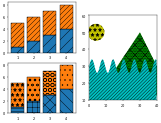

In [232]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==========
Hatch demo
==========

Hatches can be added to most polygons in Matplotlib, including `~.Axes.bar`,
`~.Axes.fill_between`, `~.Axes.contourf`, and children of `~.patches.Polygon`.
They are currently supported in the PS, PDF, SVG, OSX, and Agg backends. The WX
and Cairo backends do not currently support hatching.

See also :doc:`/gallery/images_contours_and_fields/contourf_hatching` for
an example using `~.Axes.contourf`, and
:doc:`/gallery/shapes_and_collections/hatch_style_reference` for swatches
of the existing hatches.

"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Ellipse, Polygon

x = np.arange(1, 5)
y1 = np.arange(1, 5)
y2 = np.ones(y1.shape) * 4

fig = plt.figure()
axs = fig.subplot_mosaic([['bar1', 'patches'], ['bar2', 'patches']])

axs['bar1'].bar(x, y1, edgecolor='black', hatch="/")
axs['bar1'].bar(x, y2, bottom=y1, edgecolor='black', hatch='//')

axs['bar2'].bar(x, y1, edgecolor='black', hatch=['--', '+', 'x', '\\'])
axs['bar2'].bar(x, y2, bottom=y1, edgecolor='black',
                hatch=['*', 'o', 'O', '.'])

x = np.arange(0, 40, 0.2)
axs['patches'].fill_between(x, np.sin(x) * 4 + 30, y2=0,
                            hatch='///', zorder=2, fc='c')
axs['patches'].add_patch(Ellipse((4, 50), 10, 10, fill=True,
                                 hatch='*', facecolor='y'))
axs['patches'].add_patch(Polygon([(10, 20), (30, 50), (50, 10)],
                                 hatch='\\/...', facecolor='g'))
axs['patches'].set_xlim([0, 40])
axs['patches'].set_ylim([10, 60])
axs['patches'].set_aspect(1)
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.patches`
#    - `matplotlib.patches.Ellipse`
#    - `matplotlib.patches.Polygon`
#    - `matplotlib.axes.Axes.add_patch`
#    - `matplotlib.patches.Patch.set_hatch`
#    - `matplotlib.axes.Axes.bar` / `matplotlib.pyplot.bar`


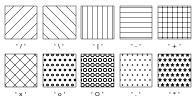

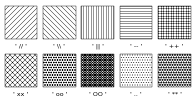

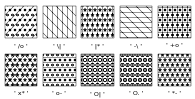

In [233]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=====================
Hatch style reference
=====================

Hatches can be added to most polygons in Matplotlib, including `~.Axes.bar`,
`~.Axes.fill_between`, `~.Axes.contourf`, and children of `~.patches.Polygon`.
They are currently supported in the PS, PDF, SVG, OSX, and Agg backends. The WX
and Cairo backends do not currently support hatching.

See also :doc:`/gallery/images_contours_and_fields/contourf_hatching` for
an example using `~.Axes.contourf`, and
:doc:`/gallery/shapes_and_collections/hatch_demo` for more usage examples.

"""
import matplotlib.pyplot as plt

from matplotlib.patches import Rectangle

fig, axs = plt.subplots(2, 5, layout='constrained', figsize=(6.4, 3.2))

hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']


def hatches_plot(ax, h):
    ax.add_patch(Rectangle((0, 0), 2, 2, fill=False, hatch=h))
    ax.text(1, -0.5, f"' {h} '", size=15, ha="center")
    ax.axis('equal')
    ax.axis('off')

for ax, h in zip(axs.flat, hatches):
    hatches_plot(ax, h)

# %%
# Hatching patterns can be repeated to increase the density.

fig, axs = plt.subplots(2, 5, layout='constrained', figsize=(6.4, 3.2))

hatches = ['//', '\\\\', '||', '--', '++', 'xx', 'oo', 'OO', '..', '**']

for ax, h in zip(axs.flat, hatches):
    hatches_plot(ax, h)

# %%
# Hatching patterns can be combined to create additional patterns.

fig, axs = plt.subplots(2, 5, layout='constrained', figsize=(6.4, 3.2))

hatches = ['/o', '\\|', '|*', '-\\', '+o', 'x*', 'o-', 'O|', 'O.', '*-']

for ax, h in zip(axs.flat, hatches):
    hatches_plot(ax, h)

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.patches`
#    - `matplotlib.patches.Rectangle`
#    - `matplotlib.axes.Axes.add_patch`
#    - `matplotlib.axes.Axes.text`


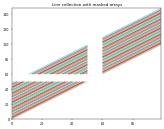

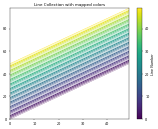

In [234]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=============================================
Plotting multiple lines with a LineCollection
=============================================

Matplotlib can efficiently draw multiple lines at once using a
`~.LineCollection`, as showcased below.
"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.collections import LineCollection

x = np.arange(100)
# Here are many sets of y to plot vs. x
ys = x[:50, np.newaxis] + x[np.newaxis, :]

segs = np.zeros((50, 100, 2))
segs[:, :, 1] = ys
segs[:, :, 0] = x

# Mask some values to test masked array support:
segs = np.ma.masked_where((segs > 50) & (segs < 60), segs)

# We need to set the plot limits, they will not autoscale
fig, ax = plt.subplots()
ax.set_xlim(x.min(), x.max())
ax.set_ylim(ys.min(), ys.max())

# *colors* is sequence of rgba tuples.
# *linestyle* is a string or dash tuple. Legal string values are
# solid|dashed|dashdot|dotted.  The dash tuple is (offset, onoffseq) where
# onoffseq is an even length tuple of on and off ink in points.  If linestyle
# is omitted, 'solid' is used.
# See `matplotlib.collections.LineCollection` for more information.
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

line_segments = LineCollection(segs, linewidths=(0.5, 1, 1.5, 2),
                               colors=colors, linestyle='solid')
ax.add_collection(line_segments)
ax.set_title('Line collection with masked arrays')
plt.show()

# %%
# In the following example, instead of passing a list of colors
# (``colors=colors``), we pass an array of values (``array=x``) that get
# colormapped.

N = 50
x = np.arange(N)
ys = [x + i for i in x]  # Many sets of y to plot vs. x
segs = [np.column_stack([x, y]) for y in ys]

fig, ax = plt.subplots()
ax.set_xlim(np.min(x), np.max(x))
ax.set_ylim(np.min(ys), np.max(ys))

line_segments = LineCollection(segs, array=x,
                               linewidths=(0.5, 1, 1.5, 2),
                               linestyles='solid')
ax.add_collection(line_segments)
axcb = fig.colorbar(line_segments)
axcb.set_label('Line Number')
ax.set_title('Line Collection with mapped colors')
plt.sci(line_segments)  # This allows interactive changing of the colormap.
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.collections`
#    - `matplotlib.collections.LineCollection`
#    - `matplotlib.cm.ScalarMappable.set_array`
#    - `matplotlib.axes.Axes.add_collection`
#    - `matplotlib.figure.Figure.colorbar` / `matplotlib.pyplot.colorbar`
#    - `matplotlib.pyplot.sci`


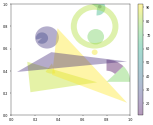

In [235]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
============================
Circles, Wedges and Polygons
============================

This example demonstrates how to use `.collections.PatchCollection`.

See also :doc:`/gallery/shapes_and_collections/artist_reference`, which instead
adds each artist separately to its own axes.
"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle, Polygon, Wedge

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, ax = plt.subplots()

resolution = 50  # the number of vertices
N = 3
x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
patches = []
for x1, y1, r in zip(x, y, radii):
    circle = Circle((x1, y1), r)
    patches.append(circle)

x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
theta1 = 360.0*np.random.rand(N)
theta2 = 360.0*np.random.rand(N)
for x1, y1, r, t1, t2 in zip(x, y, radii, theta1, theta2):
    wedge = Wedge((x1, y1), r, t1, t2)
    patches.append(wedge)

# Some limiting conditions on Wedge
patches += [
    Wedge((.3, .7), .1, 0, 360),             # Full circle
    Wedge((.7, .8), .2, 0, 360, width=0.05),  # Full ring
    Wedge((.8, .3), .2, 0, 45),              # Full sector
    Wedge((.8, .3), .2, 45, 90, width=0.10),  # Ring sector
]

for i in range(N):
    polygon = Polygon(np.random.rand(N, 2), closed=True)
    patches.append(polygon)

colors = 100 * np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.4)
p.set_array(colors)
ax.add_collection(p)
fig.colorbar(p, ax=ax)

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.patches`
#    - `matplotlib.patches.Circle`
#    - `matplotlib.patches.Wedge`
#    - `matplotlib.patches.Polygon`
#    - `matplotlib.collections.PatchCollection`
#    - `matplotlib.collections.Collection.set_array`
#    - `matplotlib.axes.Axes.add_collection`
#    - `matplotlib.figure.Figure.colorbar`


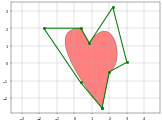

In [236]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
r"""
================
PathPatch object
================

This example shows how to create `~.path.Path` and `~.patches.PathPatch`
objects through Matplotlib's API.
"""

import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
import matplotlib.path as mpath

fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.path`
#    - `matplotlib.path.Path`
#    - `matplotlib.patches`
#    - `matplotlib.patches.PathPatch`
#    - `matplotlib.axes.Axes.add_patch`


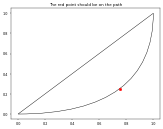

In [237]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
============
Bezier Curve
============

This example showcases the `~.patches.PathPatch` object to create a Bezier
polycurve path patch.
"""

import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
import matplotlib.path as mpath

Path = mpath.Path

fig, ax = plt.subplots()
pp1 = mpatches.PathPatch(
    Path([(0, 0), (1, 0), (1, 1), (0, 0)],
         [Path.MOVETO, Path.CURVE3, Path.CURVE3, Path.CLOSEPOLY]),
    fc="none", transform=ax.transData)

ax.add_patch(pp1)
ax.plot([0.75], [0.25], "ro")
ax.set_title('The red point should be on the path')

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.path`
#    - `matplotlib.path.Path`
#    - `matplotlib.patches`
#    - `matplotlib.patches.PathPatch`
#    - `matplotlib.axes.Axes.add_patch`


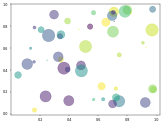

In [238]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
============
Scatter plot
============

This example showcases a simple scatter plot.
"""
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.scatter` / `matplotlib.pyplot.scatter`


In [239]:
ChapterConfig.set_chapter_name("09style_sheets")

In [240]:
# 09style_sheets THIS Chapter WAS REMOVED

In [241]:
# 09style_sheets THIS Chapter WAS REMOVED

In [242]:
# 09style_sheets THIS Chapter WAS REMOVED

In [243]:
# 09style_sheets THIS Chapter WAS REMOVED

In [244]:
# 09style_sheets THIS Chapter WAS REMOVED

In [245]:
# 09style_sheets THIS Chapter WAS REMOVED

In [246]:
# 09style_sheets THIS Chapter WAS REMOVED

In [247]:
ChapterConfig.set_chapter_name("10pyplots")

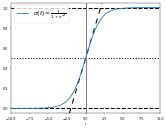

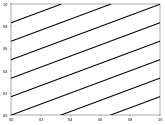

In [248]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==============
Infinite lines
==============

`~.axes.Axes.axvline` and `~.axes.Axes.axhline` draw infinite vertical /
horizontal lines, at given *x* / *y* positions. They are usually used to mark
special data values, e.g. in this example the center and limit values of the
sigmoid function.

`~.axes.Axes.axline` draws infinite straight lines in arbitrary directions.
"""

import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))

plt.axhline(y=0, color="black", linestyle="--")
plt.axhline(y=0.5, color="black", linestyle=":")
plt.axhline(y=1.0, color="black", linestyle="--")
plt.axvline(color="grey")
plt.axline((0, 0.5), slope=0.25, color="black", linestyle=(0, (5, 5)))
plt.plot(t, sig, linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlim(-10, 10)
plt.xlabel("t")
plt.legend(fontsize=14)
plt.show()

# %%
# `~.axes.Axes.axline` can also be used with a ``transform`` parameter, which
# applies to the point, but not to the slope. This can be useful for drawing
# diagonal grid lines with a fixed slope, which stay in place when the
# plot limits are moved.

for pos in np.linspace(-2, 1, 10):
    plt.axline((pos, 0), slope=0.5, color='k', transform=plt.gca().transAxes)

plt.ylim([0, 1])
plt.xlim([0, 1])
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.axhline` / `matplotlib.pyplot.axhline`
#    - `matplotlib.axes.Axes.axvline` / `matplotlib.pyplot.axvline`
#    - `matplotlib.axes.Axes.axline` / `matplotlib.pyplot.axline`


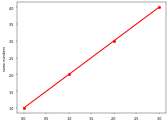

In [249]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===========
Simple plot
===========

A simple plot where a list of numbers are plotted against their index,
resulting in a straight line. Use a format string (here, 'o-r') to set the
markers (circles), linestyle (solid line) and color (red).

.. redirect-from:: /gallery/pyplots/fig_axes_labels_simple
.. redirect-from:: /gallery/pyplots/pyplot_formatstr
"""

import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], 'o-r')
plt.ylabel('some numbers')
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.pyplot.plot`
#    - `matplotlib.pyplot.ylabel`
#    - `matplotlib.pyplot.show`


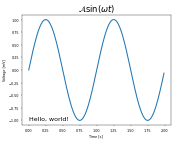

In [250]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==============================
Text and mathtext using pyplot
==============================

Set the special text objects `~.pyplot.title`, `~.pyplot.xlabel`, and
`~.pyplot.ylabel` through the dedicated pyplot functions.  Additional text
objects can be placed in the axes using `~.pyplot.text`.

You can use TeX-like mathematical typesetting in all texts; see also
:ref:`mathtext`.

.. redirect-from:: /gallery/pyplots/pyplot_mathtext
"""

import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2*np.pi*t)

plt.plot(t, s)
plt.text(0, -1, r'Hello, world!', fontsize=15)
plt.title(r'$\mathcal{A}\sin(\omega t)$', fontsize=20)
plt.xlabel('Time [s]')
plt.ylabel('Voltage [mV]')
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.pyplot.hist`
#    - `matplotlib.pyplot.xlabel`
#    - `matplotlib.pyplot.ylabel`
#    - `matplotlib.pyplot.text`
#    - `matplotlib.pyplot.grid`
#    - `matplotlib.pyplot.show`


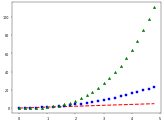

In [251]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===========================
Multiple lines using pyplot
===========================

Plot three datasets with a single call to `~matplotlib.pyplot.plot`.
"""

import matplotlib.pyplot as plt
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.plot` / `matplotlib.pyplot.plot`


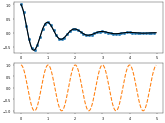

In [252]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=========================
Two subplots using pyplot
=========================

Create a figure with two subplots using `.pyplot.subplot`.
"""

import matplotlib.pyplot as plt
import numpy as np


def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)


t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), color='tab:blue', marker='o')
plt.plot(t2, f(t2), color='black')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), color='tab:orange', linestyle='--')
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.pyplot.figure`
#    - `matplotlib.pyplot.subplot`


In [253]:
ChapterConfig.set_chapter_name("11axes_grid1")

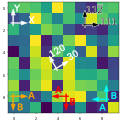

In [254]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
========================
Anchored Direction Arrow
========================

"""
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.font_manager as fm
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredDirectionArrows

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()
ax.imshow(np.random.random((10, 10)))

# Simple example
simple_arrow = AnchoredDirectionArrows(ax.transAxes, 'X', 'Y')
ax.add_artist(simple_arrow)

# High contrast arrow
high_contrast_part_1 = AnchoredDirectionArrows(
                            ax.transAxes,
                            '111', r'11$\overline{2}$',
                            loc='upper right',
                            arrow_props={'ec': 'w', 'fc': 'none', 'alpha': 1,
                                         'lw': 2}
                            )
ax.add_artist(high_contrast_part_1)

high_contrast_part_2 = AnchoredDirectionArrows(
                            ax.transAxes,
                            '111', r'11$\overline{2}$',
                            loc='upper right',
                            arrow_props={'ec': 'none', 'fc': 'k'},
                            text_props={'ec': 'w', 'fc': 'k', 'lw': 0.4}
                            )
ax.add_artist(high_contrast_part_2)

# Rotated arrow
fontprops = fm.FontProperties(family='serif')

rotated_arrow = AnchoredDirectionArrows(
                    ax.transAxes,
                    '30', '120',
                    loc='center',
                    color='w',
                    angle=30,
                    fontproperties=fontprops
                    )
ax.add_artist(rotated_arrow)

# Altering arrow directions
a1 = AnchoredDirectionArrows(
        ax.transAxes, 'A', 'B', loc='lower center',
        length=-0.15,
        sep_x=0.03, sep_y=0.03,
        color='r'
    )
ax.add_artist(a1)

a2 = AnchoredDirectionArrows(
        ax.transAxes, 'A', ' B', loc='lower left',
        aspect_ratio=-1,
        sep_x=0.01, sep_y=-0.02,
        color='orange'
        )
ax.add_artist(a2)


a3 = AnchoredDirectionArrows(
        ax.transAxes, ' A', 'B', loc='lower right',
        length=-0.15,
        aspect_ratio=-1,
        sep_y=-0.1, sep_x=0.04,
        color='cyan'
        )
ax.add_artist(a3)

plt.show()


In [255]:
# THIS cbook EXAMPLE WAS REMOVED

In [256]:
# THIS cbook EXAMPLE WAS REMOVED

In [257]:
# THIS cbook EXAMPLE WAS REMOVED

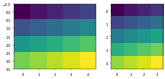

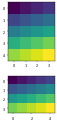

In [258]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
================================
HBoxDivider and VBoxDivider demo
================================

Using an `.HBoxDivider` to arrange subplots.

Note that both axes' location are adjusted so that they have
equal heights while maintaining their aspect ratios.

"""

import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.axes_grid1.axes_divider import HBoxDivider, VBoxDivider
import mpl_toolkits.axes_grid1.axes_size as Size

arr1 = np.arange(20).reshape((4, 5))
arr2 = np.arange(20).reshape((5, 4))

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(arr1)
ax2.imshow(arr2)

pad = 0.5  # pad in inches
divider = HBoxDivider(
    fig, 111,
    horizontal=[Size.AxesX(ax1), Size.Fixed(pad), Size.AxesX(ax2)],
    vertical=[Size.AxesY(ax1), Size.Scaled(1), Size.AxesY(ax2)])
ax1.set_axes_locator(divider.new_locator(0))
ax2.set_axes_locator(divider.new_locator(2))

plt.show()

# %%
# Using a `.VBoxDivider` to arrange subplots.
#
# Note that both axes' location are adjusted so that they have
# equal widths while maintaining their aspect ratios.

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.imshow(arr1)
ax2.imshow(arr2)

divider = VBoxDivider(
    fig, 111,
    horizontal=[Size.AxesX(ax1), Size.Scaled(1), Size.AxesX(ax2)],
    vertical=[Size.AxesY(ax1), Size.Fixed(pad), Size.AxesY(ax2)])

ax1.set_axes_locator(divider.new_locator(0))
ax2.set_axes_locator(divider.new_locator(2))

plt.show()


In [259]:
# THIS cbook EXAMPLE WAS REMOVED

In [260]:
# THIS cbook EXAMPLE WAS REMOVED

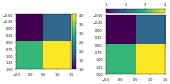

In [261]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=========================
Colorbar with AxesDivider
=========================

The `.axes_divider.make_axes_locatable` function takes an existing axes, adds
it to a new `.AxesDivider` and returns the `.AxesDivider`.  The `.append_axes`
method of the `.AxesDivider` can then be used to create a new axes on a given
side ("top", "right", "bottom", or "left") of the original axes. This example
uses `.append_axes` to add colorbars next to axes.
"""

import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.subplots_adjust(wspace=0.5)

im1 = ax1.imshow([[1, 2], [3, 4]])
ax1_divider = make_axes_locatable(ax1)
# Add an Axes to the right of the main Axes.
cax1 = ax1_divider.append_axes("right", size="7%", pad="2%")
cb1 = fig.colorbar(im1, cax=cax1)

im2 = ax2.imshow([[1, 2], [3, 4]])
ax2_divider = make_axes_locatable(ax2)
# Add an Axes above the main Axes.
cax2 = ax2_divider.append_axes("top", size="7%", pad="2%")
cb2 = fig.colorbar(im2, cax=cax2, orientation="horizontal")
# Change tick position to top (with the default tick position "bottom", ticks
# overlap the image).
cax2.xaxis.set_ticks_position("top")

plt.show()


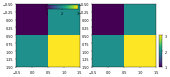

In [262]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==============================================================
Controlling the position and size of colorbars with Inset Axes
==============================================================

This example shows how to control the position, height, and width of
colorbars using `~mpl_toolkits.axes_grid1.inset_locator.inset_axes`.

Inset axes placement is controlled as for legends: either by providing a *loc*
option ("upper right", "best", ...), or by providing a locator with respect to
the parent bbox.  Parameters such as *bbox_to_anchor* and *borderpad* likewise
work in the same way, and are also demonstrated here.
"""

import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[6, 3])

im1 = ax1.imshow([[1, 2], [2, 3]])
axins1 = inset_axes(
    ax1,
    width="50%",  # width: 50% of parent_bbox width
    height="5%",  # height: 5%
    loc="upper right",
)
axins1.xaxis.set_ticks_position("bottom")
fig.colorbar(im1, cax=axins1, orientation="horizontal", ticks=[1, 2, 3])

im = ax2.imshow([[1, 2], [2, 3]])
axins = inset_axes(
    ax2,
    width="5%",  # width: 5% of parent_bbox width
    height="50%",  # height: 50%
    loc="lower left",
    bbox_to_anchor=(1.05, 0., 1, 1),
    bbox_transform=ax2.transAxes,
    borderpad=0,
)
fig.colorbar(im, cax=axins, ticks=[1, 2, 3])

plt.show()


In [263]:
# THIS cbook EXAMPLE WAS REMOVED

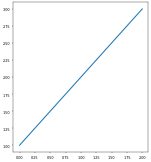

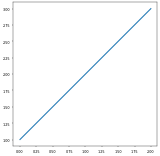

In [264]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===============================
Axes with a fixed physical size
===============================

Note that this can be accomplished with the main library for
Axes on Figures that do not change size: :ref:`fixed_size_axes`
"""

import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import Divider, Size

# %%


fig = plt.figure(figsize=(6, 6))

# The first items are for padding and the second items are for the axes.
# sizes are in inch.
h = [Size.Fixed(1.0), Size.Fixed(4.5)]
v = [Size.Fixed(0.7), Size.Fixed(5.)]

divider = Divider(fig, (0, 0, 1, 1), h, v, aspect=False)
# The width and height of the rectangle are ignored.

ax = fig.add_axes(divider.get_position(),
                  axes_locator=divider.new_locator(nx=1, ny=1))

ax.plot([1, 2, 3])

# %%


fig = plt.figure(figsize=(6, 6))

# The first & third items are for padding and the second items are for the
# axes. Sizes are in inches.
h = [Size.Fixed(1.0), Size.Scaled(1.), Size.Fixed(.2)]
v = [Size.Fixed(0.7), Size.Scaled(1.), Size.Fixed(.5)]

divider = Divider(fig, (0, 0, 1, 1), h, v, aspect=False)
# The width and height of the rectangle are ignored.

ax = fig.add_axes(divider.get_position(),
                  axes_locator=divider.new_locator(nx=1, ny=1))

ax.plot([1, 2, 3])

plt.show()


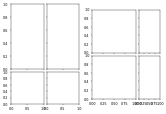

In [265]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=========================================
Setting a fixed aspect on ImageGrid cells
=========================================
"""

import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure()

grid1 = ImageGrid(fig, 121, (2, 2), axes_pad=0.1,
                  aspect=True, share_all=True)
for i in [0, 1]:
    grid1[i].set_aspect(2)

grid2 = ImageGrid(fig, 122, (2, 2), axes_pad=0.1,
                  aspect=True, share_all=True)
for i in [1, 3]:
    grid2[i].set_aspect(2)

plt.show()


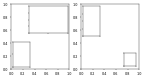

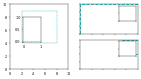

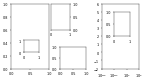

In [266]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==================
Inset locator demo
==================

"""

# %%
# The `.inset_locator`'s `~.inset_locator.inset_axes` allows
# easily placing insets in the corners of the axes by specifying a width and
# height and optionally a location (loc) that accepts locations as codes,
# similar to `~matplotlib.axes.Axes.legend`.
# By default, the inset is offset by some points from the axes,
# controlled via the *borderpad* parameter.

import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, (ax, ax2) = plt.subplots(1, 2, figsize=[5.5, 2.8])

# Create inset of width 1.3 inches and height 0.9 inches
# at the default upper right location
axins = inset_axes(ax, width=1.3, height=0.9)

# Create inset of width 30% and height 40% of the parent axes' bounding box
# at the lower left corner (loc=3)
axins2 = inset_axes(ax, width="30%", height="40%", loc=3)

# Create inset of mixed specifications in the second subplot;
# width is 30% of parent axes' bounding box and
# height is 1 inch at the upper left corner (loc=2)
axins3 = inset_axes(ax2, width="30%", height=1., loc=2)

# Create an inset in the lower right corner (loc=4) with borderpad=1, i.e.
# 10 points padding (as 10pt is the default fontsize) to the parent axes
axins4 = inset_axes(ax2, width="20%", height="20%", loc=4, borderpad=1)

# Turn ticklabels of insets off
for axi in [axins, axins2, axins3, axins4]:
    axi.tick_params(labelleft=False, labelbottom=False)

plt.show()


# %%
# The parameters *bbox_to_anchor* and *bbox_transform* can be used for a more
# fine-grained control over the inset position and size or even to position
# the inset at completely arbitrary positions.
# The *bbox_to_anchor* sets the bounding box in coordinates according to the
# *bbox_transform*.
#

fig = plt.figure(figsize=[5.5, 2.8])
ax = fig.add_subplot(121)

# We use the axes transform as bbox_transform. Therefore, the bounding box
# needs to be specified in axes coordinates ((0, 0) is the lower left corner
# of the axes, (1, 1) is the upper right corner).
# The bounding box (.2, .4, .6, .5) starts at (.2, .4) and ranges to (.8, .9)
# in those coordinates.
# Inside this bounding box an inset of half the bounding box' width and
# three quarters of the bounding box' height is created. The lower left corner
# of the inset is aligned to the lower left corner of the bounding box (loc=3).
# The inset is then offset by the default 0.5 in units of the font size.

axins = inset_axes(ax, width="50%", height="75%",
                   bbox_to_anchor=(.2, .4, .6, .5),
                   bbox_transform=ax.transAxes, loc=3)

# For visualization purposes we mark the bounding box by a rectangle
ax.add_patch(plt.Rectangle((.2, .4), .6, .5, ls="--", ec="c", fc="none",
                           transform=ax.transAxes))

# We set the axis limits to something other than the default, in order to not
# distract from the fact that axes coordinates are used here.
ax.set(xlim=(0, 10), ylim=(0, 10))


# Note how the two following insets are created at the same positions, one by
# use of the default parent axes' bbox and the other via a bbox in axes
# coordinates and the respective transform.
ax2 = fig.add_subplot(222)
axins2 = inset_axes(ax2, width="30%", height="50%")

ax3 = fig.add_subplot(224)
axins3 = inset_axes(ax3, width="100%", height="100%",
                    bbox_to_anchor=(.7, .5, .3, .5),
                    bbox_transform=ax3.transAxes)

# For visualization purposes we mark the bounding box by a rectangle
ax2.add_patch(plt.Rectangle((0, 0), 1, 1, ls="--", lw=2, ec="c", fc="none"))
ax3.add_patch(plt.Rectangle((.7, .5), .3, .5, ls="--", lw=2,
                            ec="c", fc="none"))

# Turn ticklabels off
for axi in [axins2, axins3, ax2, ax3]:
    axi.tick_params(labelleft=False, labelbottom=False)

plt.show()


# %%
# In the above the axes transform together with 4-tuple bounding boxes has been
# used as it mostly is useful to specify an inset relative to the axes it is
# an inset to. However, other use cases are equally possible. The following
# example examines some of those.
#

fig = plt.figure(figsize=[5.5, 2.8])
ax = fig.add_subplot(131)

# Create an inset outside the axes
axins = inset_axes(ax, width="100%", height="100%",
                   bbox_to_anchor=(1.05, .6, .5, .4),
                   bbox_transform=ax.transAxes, loc=2, borderpad=0)
axins.tick_params(left=False, right=True, labelleft=False, labelright=True)

# Create an inset with a 2-tuple bounding box. Note that this creates a
# bbox without extent. This hence only makes sense when specifying
# width and height in absolute units (inches).
axins2 = inset_axes(ax, width=0.5, height=0.4,
                    bbox_to_anchor=(0.33, 0.25),
                    bbox_transform=ax.transAxes, loc=3, borderpad=0)


ax2 = fig.add_subplot(133)
ax2.set_xscale("log")
ax2.set(xlim=(1e-6, 1e6), ylim=(-2, 6))

# Create inset in data coordinates using ax.transData as transform
axins3 = inset_axes(ax2, width="100%", height="100%",
                    bbox_to_anchor=(1e-2, 2, 1e3, 3),
                    bbox_transform=ax2.transData, loc=2, borderpad=0)

# Create an inset horizontally centered in figure coordinates and vertically
# bound to line up with the axes.
from matplotlib.transforms import blended_transform_factory  # noqa

transform = blended_transform_factory(fig.transFigure, ax2.transAxes)
axins4 = inset_axes(ax2, width="16%", height="34%",
                    bbox_to_anchor=(0, 0, 1, 1),
                    bbox_transform=transform, loc=8, borderpad=0)

plt.show()


In [267]:
# THIS cbook EXAMPLE WAS REMOVED

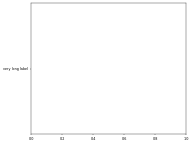

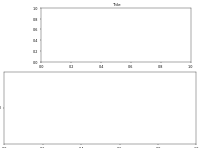

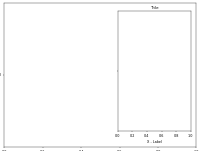

In [268]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
====================================
Make room for ylabel using axes_grid
====================================
"""

import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.axes_divider import make_axes_area_auto_adjustable

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.set_yticks([0.5], labels=["very long label"])

make_axes_area_auto_adjustable(ax)

# %%

fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 0.5])
ax2 = fig.add_axes([0, 0.5, 1, 0.5])

ax1.set_yticks([0.5], labels=["very long label"])
ax1.set_ylabel("Y label")

ax2.set_title("Title")

make_axes_area_auto_adjustable(ax1, pad=0.1, use_axes=[ax1, ax2])
make_axes_area_auto_adjustable(ax2, pad=0.1, use_axes=[ax1, ax2])

# %%

fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1])
divider = make_axes_locatable(ax1)

ax2 = divider.append_axes("right", "100%", pad=0.3, sharey=ax1)
ax2.tick_params(labelleft=False)
fig.add_axes(ax2)

divider.add_auto_adjustable_area(use_axes=[ax1], pad=0.1,
                                 adjust_dirs=["left"])
divider.add_auto_adjustable_area(use_axes=[ax2], pad=0.1,
                                 adjust_dirs=["right"])
divider.add_auto_adjustable_area(use_axes=[ax1, ax2], pad=0.1,
                                 adjust_dirs=["top", "bottom"])

ax1.set_yticks([0.5], labels=["very long label"])

ax2.set_title("Title")
ax2.set_xlabel("X - Label")

plt.show()


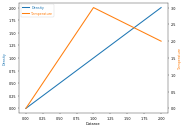

In [269]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===============
Parasite Simple
===============
"""

import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import host_subplot

host = host_subplot(111)
par = host.twinx()

host.set_xlabel("Distance")
host.set_ylabel("Density")
par.set_ylabel("Temperature")

p1, = host.plot([0, 1, 2], [0, 1, 2], label="Density")
p2, = par.plot([0, 1, 2], [0, 3, 2], label="Temperature")

host.legend(labelcolor="linecolor")

host.yaxis.get_label().set_color(p1.get_color())
par.yaxis.get_label().set_color(p2.get_color())

plt.show()


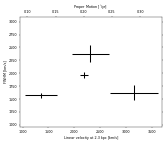

In [270]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
================
Parasite Simple2
================

"""
import matplotlib.pyplot as plt

import matplotlib.transforms as mtransforms
from mpl_toolkits.axes_grid1.parasite_axes import HostAxes

obs = [["01_S1", 3.88, 0.14, 1970, 63],
       ["01_S4", 5.6, 0.82, 1622, 150],
       ["02_S1", 2.4, 0.54, 1570, 40],
       ["03_S1", 4.1, 0.62, 2380, 170]]


fig = plt.figure()

ax_kms = fig.add_subplot(axes_class=HostAxes, aspect=1)

# angular proper motion("/yr) to linear velocity(km/s) at distance=2.3kpc
pm_to_kms = 1./206265.*2300*3.085e18/3.15e7/1.e5

aux_trans = mtransforms.Affine2D().scale(pm_to_kms, 1.)
ax_pm = ax_kms.twin(aux_trans)

for n, ds, dse, w, we in obs:
    time = ((2007 + (10. + 4/30.)/12) - 1988.5)
    v = ds / time * pm_to_kms
    ve = dse / time * pm_to_kms
    ax_kms.errorbar([v], [w], xerr=[ve], yerr=[we], color="k")


ax_kms.axis["bottom"].set_label("Linear velocity at 2.3 kpc [km/s]")
ax_kms.axis["left"].set_label("FWHM [km/s]")
ax_pm.axis["top"].set_label(r"Proper Motion [$''$/yr]")
ax_pm.axis["top"].label.set_visible(True)
ax_pm.axis["right"].major_ticklabels.set_visible(False)

ax_kms.set_xlim(950, 3700)
ax_kms.set_ylim(950, 3100)
# xlim and ylim of ax_pms will be automatically adjusted.

plt.show()


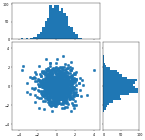

In [271]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==================================
Scatter Histogram (Locatable Axes)
==================================

Show the marginal distributions of a scatter plot as histograms at the sides of
the plot.

For a nice alignment of the main axes with the marginals, the axes positions
are defined by a ``Divider``, produced via `.make_axes_locatable`.  Note that
the ``Divider`` API allows setting axes sizes and pads in inches, which is its
main feature.

If one wants to set axes sizes and pads relative to the main Figure, see the
:doc:`/gallery/lines_bars_and_markers/scatter_hist` example.
"""

import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.axes_grid1 import make_axes_locatable

# Fixing random state for reproducibility
np.random.seed(19680801)

# the random data
x = np.random.randn(1000)
y = np.random.randn(1000)


fig, ax = plt.subplots(figsize=(5.5, 5.5))

# the scatter plot:
ax.scatter(x, y)

# Set aspect of the main axes.
ax.set_aspect(1.)

# create new axes on the right and on the top of the current axes
divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)
ax_histy = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

# now determine nice limits by hand:
binwidth = 0.25
xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
lim = (int(xymax/binwidth) + 1)*binwidth

bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(x, bins=bins)
ax_histy.hist(y, bins=bins, orientation='horizontal')

# the xaxis of ax_histx and yaxis of ax_histy are shared with ax,
# thus there is no need to manually adjust the xlim and ylim of these
# axis.

ax_histx.set_yticks([0, 50, 100])
ax_histy.set_xticks([0, 50, 100])

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `mpl_toolkits.axes_grid1.axes_divider.make_axes_locatable`
#    - `matplotlib.axes.Axes.set_aspect`
#    - `matplotlib.axes.Axes.scatter`
#    - `matplotlib.axes.Axes.hist`


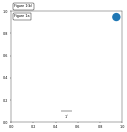

In [272]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=======================
Simple Anchored Artists
=======================

This example illustrates the use of the anchored helper classes found in
:mod:`matplotlib.offsetbox` and in :mod:`mpl_toolkits.axes_grid1`.
An implementation of a similar figure, but without use of the toolkit,
can be found in :doc:`/gallery/misc/anchored_artists`.
"""

import matplotlib.pyplot as plt


def draw_text(ax):
    """
    Draw two text-boxes, anchored by different corners to the upper-left
    corner of the figure.
    """
    from matplotlib.offsetbox import AnchoredText
    at = AnchoredText("Figure 1a",
                      loc='upper left', prop=dict(size=8), frameon=True,
                      )
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)

    at2 = AnchoredText("Figure 1(b)",
                       loc='lower left', prop=dict(size=8), frameon=True,
                       bbox_to_anchor=(0., 1.),
                       bbox_transform=ax.transAxes
                       )
    at2.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at2)


def draw_circle(ax):
    """
    Draw a circle in axis coordinates
    """
    from matplotlib.patches import Circle
    from mpl_toolkits.axes_grid1.anchored_artists import AnchoredDrawingArea
    ada = AnchoredDrawingArea(20, 20, 0, 0,
                              loc='upper right', pad=0., frameon=False)
    p = Circle((10, 10), 10)
    ada.da.add_artist(p)
    ax.add_artist(ada)


def draw_sizebar(ax):
    """
    Draw a horizontal bar with length of 0.1 in data coordinates,
    with a fixed label underneath.
    """
    from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
    asb = AnchoredSizeBar(ax.transData,
                          0.1,
                          r"1$^{\prime}$",
                          loc='lower center',
                          pad=0.1, borderpad=0.5, sep=5,
                          frameon=False)
    ax.add_artist(asb)


fig, ax = plt.subplots()
ax.set_aspect(1.)

draw_text(ax)
draw_circle(ax)
draw_sizebar(ax)

plt.show()


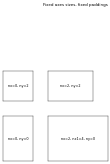

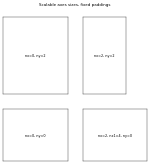

In [273]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=====================
Simple Axes Divider 1
=====================

See also :ref:`axes_grid`.
"""

import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import Divider, Size


def label_axes(ax, text):
    """Place a label at the center of an Axes, and remove the axis ticks."""
    ax.text(.5, .5, text, transform=ax.transAxes,
            horizontalalignment="center", verticalalignment="center")
    ax.tick_params(bottom=False, labelbottom=False,
                   left=False, labelleft=False)


# %%
# Fixed axes sizes; fixed paddings.

fig = plt.figure(figsize=(6, 6))
fig.suptitle("Fixed axes sizes, fixed paddings")

# Sizes are in inches.
horiz = [Size.Fixed(1.), Size.Fixed(.5), Size.Fixed(1.5), Size.Fixed(.5)]
vert = [Size.Fixed(1.5), Size.Fixed(.5), Size.Fixed(1.)]

rect = (0.1, 0.1, 0.8, 0.8)
# Divide the axes rectangle into a grid with sizes specified by horiz * vert.
div = Divider(fig, rect, horiz, vert, aspect=False)

# The rect parameter will actually be ignored and overridden by axes_locator.
ax1 = fig.add_axes(rect, axes_locator=div.new_locator(nx=0, ny=0))
label_axes(ax1, "nx=0, ny=0")
ax2 = fig.add_axes(rect, axes_locator=div.new_locator(nx=0, ny=2))
label_axes(ax2, "nx=0, ny=2")
ax3 = fig.add_axes(rect, axes_locator=div.new_locator(nx=2, ny=2))
label_axes(ax3, "nx=2, ny=2")
ax4 = fig.add_axes(rect, axes_locator=div.new_locator(nx=2, nx1=4, ny=0))
label_axes(ax4, "nx=2, nx1=4, ny=0")

# %%
# Axes sizes that scale with the figure size; fixed paddings.

fig = plt.figure(figsize=(6, 6))
fig.suptitle("Scalable axes sizes, fixed paddings")

horiz = [Size.Scaled(1.5), Size.Fixed(.5), Size.Scaled(1.), Size.Scaled(.5)]
vert = [Size.Scaled(1.), Size.Fixed(.5), Size.Scaled(1.5)]

rect = (0.1, 0.1, 0.8, 0.8)
# Divide the axes rectangle into a grid with sizes specified by horiz * vert.
div = Divider(fig, rect, horiz, vert, aspect=False)

# The rect parameter will actually be ignored and overridden by axes_locator.
ax1 = fig.add_axes(rect, axes_locator=div.new_locator(nx=0, ny=0))
label_axes(ax1, "nx=0, ny=0")
ax2 = fig.add_axes(rect, axes_locator=div.new_locator(nx=0, ny=2))
label_axes(ax2, "nx=0, ny=2")
ax3 = fig.add_axes(rect, axes_locator=div.new_locator(nx=2, ny=2))
label_axes(ax3, "nx=2, ny=2")
ax4 = fig.add_axes(rect, axes_locator=div.new_locator(nx=2, nx1=4, ny=0))
label_axes(ax4, "nx=2, nx1=4, ny=0")

plt.show()


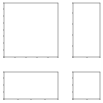

In [274]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=====================
Simple axes divider 3
=====================

See also :ref:`axes_grid`.
"""

import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import Divider
import mpl_toolkits.axes_grid1.axes_size as Size

fig = plt.figure(figsize=(5.5, 4))

# the rect parameter will be ignored as we will set axes_locator
rect = (0.1, 0.1, 0.8, 0.8)
ax = [fig.add_axes(rect, label="%d" % i) for i in range(4)]


horiz = [Size.AxesX(ax[0]), Size.Fixed(.5), Size.AxesX(ax[1])]
vert = [Size.AxesY(ax[0]), Size.Fixed(.5), Size.AxesY(ax[2])]

# divide the axes rectangle into grid whose size is specified by horiz * vert
divider = Divider(fig, rect, horiz, vert, aspect=False)


ax[0].set_axes_locator(divider.new_locator(nx=0, ny=0))
ax[1].set_axes_locator(divider.new_locator(nx=2, ny=0))
ax[2].set_axes_locator(divider.new_locator(nx=0, ny=2))
ax[3].set_axes_locator(divider.new_locator(nx=2, ny=2))

ax[0].set_xlim(0, 2)
ax[1].set_xlim(0, 1)

ax[0].set_ylim(0, 1)
ax[2].set_ylim(0, 2)

divider.set_aspect(1.)

for ax1 in ax:
    ax1.tick_params(labelbottom=False, labelleft=False)

plt.show()


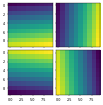

In [275]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
================
Simple ImageGrid
================

Align multiple images using `~mpl_toolkits.axes_grid1.axes_grid.ImageGrid`.
"""

import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.axes_grid1 import ImageGrid

im1 = np.arange(100).reshape((10, 10))
im2 = im1.T
im3 = np.flipud(im1)
im4 = np.fliplr(im2)

fig = plt.figure(figsize=(4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [im1, im2, im3, im4]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()


In [276]:
# THIS cbook EXAMPLE WAS REMOVED

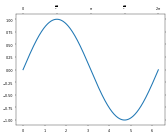

In [277]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
================
Simple Axisline4
================

"""
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.axes_grid1 import host_subplot

ax = host_subplot(111)
xx = np.arange(0, 2*np.pi, 0.01)
ax.plot(xx, np.sin(xx))

ax2 = ax.twin()  # ax2 is responsible for "top" axis and "right" axis
ax2.set_xticks([0., .5*np.pi, np.pi, 1.5*np.pi, 2*np.pi],
               labels=["$0$", r"$\frac{1}{2}\pi$",
                       r"$\pi$", r"$\frac{3}{2}\pi$", r"$2\pi$"])

ax2.axis["right"].major_ticklabels.set_visible(False)
ax2.axis["top"].major_ticklabels.set_visible(True)

plt.show()


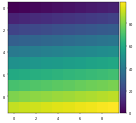

In [278]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===============
Simple Colorbar
===============

"""
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.axes_grid1 import make_axes_locatable

ax = plt.subplot()
im = ax.imshow(np.arange(100).reshape((10, 10)))

# create an Axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)

plt.show()


In [279]:
ChapterConfig.set_chapter_name("12axisartist")

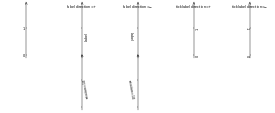

In [280]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==============
Axis Direction
==============
"""

import matplotlib.pyplot as plt

import mpl_toolkits.axisartist as axisartist


def setup_axes(fig, pos):
    ax = fig.add_subplot(pos, axes_class=axisartist.Axes)

    ax.set_ylim(-0.1, 1.5)
    ax.set_yticks([0, 1])

    ax.axis[:].set_visible(False)

    ax.axis["x"] = ax.new_floating_axis(1, 0.5)
    ax.axis["x"].set_axisline_style("->", size=1.5)

    return ax


plt.rcParams.update({
    "axes.titlesize": "medium",
    "axes.titley": 1.1,
})

fig = plt.figure(figsize=(10, 4))
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.05, right=0.95)

ax1 = setup_axes(fig, 251)
ax1.axis["x"].set_axis_direction("left")

ax2 = setup_axes(fig, 252)
ax2.axis["x"].label.set_text("Label")
ax2.axis["x"].toggle(ticklabels=False)
ax2.axis["x"].set_axislabel_direction("+")
ax2.set_title("label direction=$+$")

ax3 = setup_axes(fig, 253)
ax3.axis["x"].label.set_text("Label")
ax3.axis["x"].toggle(ticklabels=False)
ax3.axis["x"].set_axislabel_direction("-")
ax3.set_title("label direction=$-$")

ax4 = setup_axes(fig, 254)
ax4.axis["x"].set_ticklabel_direction("+")
ax4.set_title("ticklabel direction=$+$")

ax5 = setup_axes(fig, 255)
ax5.axis["x"].set_ticklabel_direction("-")
ax5.set_title("ticklabel direction=$-$")

ax7 = setup_axes(fig, 257)
ax7.axis["x"].label.set_text("rotation=10")
ax7.axis["x"].label.set_rotation(10)
ax7.axis["x"].toggle(ticklabels=False)

ax8 = setup_axes(fig, 258)
ax8.axis["x"].set_axislabel_direction("-")
ax8.axis["x"].label.set_text("rotation=10")
ax8.axis["x"].label.set_rotation(10)
ax8.axis["x"].toggle(ticklabels=False)

plt.show()


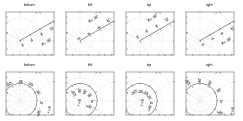

In [281]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===================
axis_direction demo
===================
"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.projections import PolarAxes
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist as axisartist
import mpl_toolkits.axisartist.angle_helper as angle_helper
import mpl_toolkits.axisartist.grid_finder as grid_finder
from mpl_toolkits.axisartist.grid_helper_curvelinear import \
    GridHelperCurveLinear


def setup_axes(fig, rect):
    """Polar projection, but in a rectangular box."""
    # see demo_curvelinear_grid.py for details
    grid_helper = GridHelperCurveLinear(
        Affine2D().scale(np.pi/180., 1.) + PolarAxes.PolarTransform(),
        extreme_finder=angle_helper.ExtremeFinderCycle(
            20, 20,
            lon_cycle=360, lat_cycle=None,
            lon_minmax=None, lat_minmax=(0, np.inf),
        ),
        grid_locator1=angle_helper.LocatorDMS(12),
        grid_locator2=grid_finder.MaxNLocator(5),
        tick_formatter1=angle_helper.FormatterDMS(),
    )
    ax = fig.add_subplot(
        rect, axes_class=axisartist.Axes, grid_helper=grid_helper,
        aspect=1, xlim=(-5, 12), ylim=(-5, 10))
    ax.axis[:].toggle(ticklabels=False)
    ax.grid(color=".9")
    return ax


def add_floating_axis1(ax):
    ax.axis["lat"] = axis = ax.new_floating_axis(0, 30)
    axis.label.set_text(r"$\theta = 30^{\circ}$")
    axis.label.set_visible(True)
    return axis


def add_floating_axis2(ax):
    ax.axis["lon"] = axis = ax.new_floating_axis(1, 6)
    axis.label.set_text(r"$r = 6$")
    axis.label.set_visible(True)
    return axis


fig = plt.figure(figsize=(8, 4), layout="constrained")

for i, d in enumerate(["bottom", "left", "top", "right"]):
    ax = setup_axes(fig, rect=241+i)
    axis = add_floating_axis1(ax)
    axis.set_axis_direction(d)
    ax.set(title=d)

for i, d in enumerate(["bottom", "left", "top", "right"]):
    ax = setup_axes(fig, rect=245+i)
    axis = add_floating_axis2(ax)
    axis.set_axis_direction(d)
    ax.set(title=d)

plt.show()


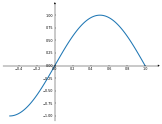

In [282]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
================
Axis line styles
================

This example shows some configurations for axis style.

Note: The `mpl_toolkits.axisartist` axes classes may be confusing for new
users. If the only aim is to obtain arrow heads at the ends of the axes,
rather check out the :doc:`/gallery/spines/centered_spines_with_arrows`
example.
"""

import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.axisartist.axislines import AxesZero

fig = plt.figure()
ax = fig.add_subplot(axes_class=AxesZero)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

x = np.linspace(-0.5, 1., 100)
ax.plot(x, np.sin(x*np.pi))

plt.show()


In [283]:
# THIS __name__ EXAMPLE WAS REMOVED

In [284]:
# THIS __name__ EXAMPLE WAS REMOVED

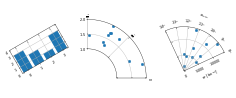

In [285]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==========================
``floating_axes`` features
==========================

Demonstration of features of the :mod:`.floating_axes` module:

* Using `~.axes.Axes.scatter` and `~.axes.Axes.bar` with changing the shape of
  the plot.
* Using `~.floating_axes.GridHelperCurveLinear` to rotate the plot and set the
  plot boundary.
* Using `~.Figure.add_subplot` to create a subplot using the return value from
  `~.floating_axes.GridHelperCurveLinear`.
* Making a sector plot by adding more features to
  `~.floating_axes.GridHelperCurveLinear`.
"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.projections import PolarAxes
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.angle_helper as angle_helper
import mpl_toolkits.axisartist.floating_axes as floating_axes
from mpl_toolkits.axisartist.grid_finder import (DictFormatter, FixedLocator,
                                                 MaxNLocator)

# Fixing random state for reproducibility
np.random.seed(19680801)


def setup_axes1(fig, rect):
    """
    A simple one.
    """
    tr = Affine2D().scale(2, 1).rotate_deg(30)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(-0.5, 3.5, 0, 4),
        grid_locator1=MaxNLocator(nbins=4),
        grid_locator2=MaxNLocator(nbins=4))

    ax1 = fig.add_subplot(
        rect, axes_class=floating_axes.FloatingAxes, grid_helper=grid_helper)
    ax1.grid()

    aux_ax = ax1.get_aux_axes(tr)

    return ax1, aux_ax


def setup_axes2(fig, rect):
    """
    With custom locator and formatter.
    Note that the extreme values are swapped.
    """
    tr = PolarAxes.PolarTransform()

    pi = np.pi
    angle_ticks = [(0, r"$0$"),
                   (.25*pi, r"$\frac{1}{4}\pi$"),
                   (.5*pi, r"$\frac{1}{2}\pi$")]
    grid_locator1 = FixedLocator([v for v, s in angle_ticks])
    tick_formatter1 = DictFormatter(dict(angle_ticks))

    grid_locator2 = MaxNLocator(2)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(.5*pi, 0, 2, 1),
        grid_locator1=grid_locator1,
        grid_locator2=grid_locator2,
        tick_formatter1=tick_formatter1,
        tick_formatter2=None)

    ax1 = fig.add_subplot(
        rect, axes_class=floating_axes.FloatingAxes, grid_helper=grid_helper)
    ax1.grid()

    # create a parasite axes whose transData in RA, cz
    aux_ax = ax1.get_aux_axes(tr)

    aux_ax.patch = ax1.patch  # for aux_ax to have a clip path as in ax
    ax1.patch.zorder = 0.9  # but this has a side effect that the patch is
    # drawn twice, and possibly over some other
    # artists. So, we decrease the zorder a bit to
    # prevent this.

    return ax1, aux_ax


def setup_axes3(fig, rect):
    """
    Sometimes, things like axis_direction need to be adjusted.
    """

    # rotate a bit for better orientation
    tr_rotate = Affine2D().translate(-95, 0)

    # scale degree to radians
    tr_scale = Affine2D().scale(np.pi/180., 1.)

    tr = tr_rotate + tr_scale + PolarAxes.PolarTransform()

    grid_locator1 = angle_helper.LocatorHMS(4)
    tick_formatter1 = angle_helper.FormatterHMS()

    grid_locator2 = MaxNLocator(3)

    # Specify theta limits in degrees
    ra0, ra1 = 8.*15, 14.*15
    # Specify radial limits
    cz0, cz1 = 0, 14000
    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(ra0, ra1, cz0, cz1),
        grid_locator1=grid_locator1,
        grid_locator2=grid_locator2,
        tick_formatter1=tick_formatter1,
        tick_formatter2=None)

    ax1 = fig.add_subplot(
        rect, axes_class=floating_axes.FloatingAxes, grid_helper=grid_helper)

    # adjust axis
    ax1.axis["left"].set_axis_direction("bottom")
    ax1.axis["right"].set_axis_direction("top")

    ax1.axis["bottom"].set_visible(False)
    ax1.axis["top"].set_axis_direction("bottom")
    ax1.axis["top"].toggle(ticklabels=True, label=True)
    ax1.axis["top"].major_ticklabels.set_axis_direction("top")
    ax1.axis["top"].label.set_axis_direction("top")

    ax1.axis["left"].label.set_text(r"cz [km$^{-1}$]")
    ax1.axis["top"].label.set_text(r"$\alpha_{1950}$")
    ax1.grid()

    # create a parasite axes whose transData in RA, cz
    aux_ax = ax1.get_aux_axes(tr)

    aux_ax.patch = ax1.patch  # for aux_ax to have a clip path as in ax
    ax1.patch.zorder = 0.9  # but this has a side effect that the patch is
    # drawn twice, and possibly over some other
    # artists. So, we decrease the zorder a bit to
    # prevent this.

    return ax1, aux_ax


# %%
fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(wspace=0.3, left=0.05, right=0.95)

ax1, aux_ax1 = setup_axes1(fig, 131)
aux_ax1.bar([0, 1, 2, 3], [3, 2, 1, 3])

ax2, aux_ax2 = setup_axes2(fig, 132)
theta = np.random.rand(10)*.5*np.pi
radius = np.random.rand(10) + 1.
aux_ax2.scatter(theta, radius)

ax3, aux_ax3 = setup_axes3(fig, 133)

theta = (8 + np.random.rand(10)*(14 - 8))*15.  # in degrees
radius = np.random.rand(10)*14000.
aux_ax3.scatter(theta, radius)

plt.show()


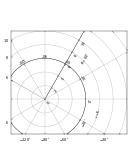

In [286]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==================
floating_axis demo
==================

Axis within rectangular frame.

The following code demonstrates how to put a floating polar curve within a
rectangular box. In order to get a better sense of polar curves, please look at
:doc:`/gallery/axisartist/demo_curvelinear_grid`.
"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.projections import PolarAxes
from matplotlib.transforms import Affine2D
from mpl_toolkits.axisartist import GridHelperCurveLinear, HostAxes
import mpl_toolkits.axisartist.angle_helper as angle_helper


def curvelinear_test2(fig):
    """Polar projection, but in a rectangular box."""
    # see demo_curvelinear_grid.py for details
    tr = Affine2D().scale(np.pi / 180., 1.) + PolarAxes.PolarTransform()

    extreme_finder = angle_helper.ExtremeFinderCycle(20,
                                                     20,
                                                     lon_cycle=360,
                                                     lat_cycle=None,
                                                     lon_minmax=None,
                                                     lat_minmax=(0, np.inf),
                                                     )

    grid_locator1 = angle_helper.LocatorDMS(12)

    tick_formatter1 = angle_helper.FormatterDMS()

    grid_helper = GridHelperCurveLinear(tr,
                                        extreme_finder=extreme_finder,
                                        grid_locator1=grid_locator1,
                                        tick_formatter1=tick_formatter1
                                        )

    ax1 = fig.add_subplot(axes_class=HostAxes, grid_helper=grid_helper)

    # Now creates floating axis

    # floating axis whose first coordinate (theta) is fixed at 60
    ax1.axis["lat"] = axis = ax1.new_floating_axis(0, 60)
    axis.label.set_text(r"$\theta = 60^{\circ}$")
    axis.label.set_visible(True)

    # floating axis whose second coordinate (r) is fixed at 6
    ax1.axis["lon"] = axis = ax1.new_floating_axis(1, 6)
    axis.label.set_text(r"$r = 6$")

    ax1.set_aspect(1.)
    ax1.set_xlim(-5, 12)
    ax1.set_ylim(-5, 10)

    ax1.grid(True)


fig = plt.figure(figsize=(5, 5))
curvelinear_test2(fig)
plt.show()


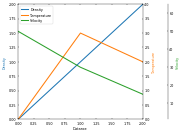

In [287]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==================
Parasite Axes demo
==================

Create a parasite axes. Such axes would share the x scale with a host axes,
but show a different scale in y direction.

This approach uses `mpl_toolkits.axes_grid1.parasite_axes.HostAxes` and
`mpl_toolkits.axes_grid1.parasite_axes.ParasiteAxes`.

The standard and recommended approach is to use instead standard Matplotlib
axes, as shown in the :doc:`/gallery/spines/multiple_yaxis_with_spines`
example.

An alternative approach using `mpl_toolkits.axes_grid1` and
`mpl_toolkits.axisartist` is shown in the
:doc:`/gallery/axisartist/demo_parasite_axes2` example.
"""

import matplotlib.pyplot as plt

from mpl_toolkits.axisartist.parasite_axes import HostAxes

fig = plt.figure()

host = fig.add_axes([0.15, 0.1, 0.65, 0.8], axes_class=HostAxes)
par1 = host.get_aux_axes(viewlim_mode=None, sharex=host)
par2 = host.get_aux_axes(viewlim_mode=None, sharex=host)

host.axis["right"].set_visible(False)

par1.axis["right"].set_visible(True)
par1.axis["right"].major_ticklabels.set_visible(True)
par1.axis["right"].label.set_visible(True)

par2.axis["right2"] = par2.new_fixed_axis(loc="right", offset=(60, 0))

p1, = host.plot([0, 1, 2], [0, 1, 2], label="Density")
p2, = par1.plot([0, 1, 2], [0, 3, 2], label="Temperature")
p3, = par2.plot([0, 1, 2], [50, 30, 15], label="Velocity")

host.set(xlim=(0, 2), ylim=(0, 2), xlabel="Distance", ylabel="Density")
par1.set(ylim=(0, 4), ylabel="Temperature")
par2.set(ylim=(1, 65), ylabel="Velocity")

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right2"].label.set_color(p3.get_color())

plt.show()


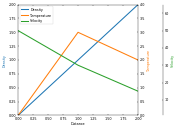

In [288]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==================
Parasite axis demo
==================

This example demonstrates the use of parasite axis to plot multiple datasets
onto one single plot.

Notice how in this example, *par1* and *par2* are both obtained by calling
``twinx()``, which ties their x-limits with the host's x-axis. From there, each
of those two axis behave separately from each other: different datasets can be
plotted, and the y-limits are adjusted separately.

This approach uses `mpl_toolkits.axes_grid1.parasite_axes.host_subplot` and
`mpl_toolkits.axisartist.axislines.Axes`.

The standard and recommended approach is to use instead standard Matplotlib
axes, as shown in the :doc:`/gallery/spines/multiple_yaxis_with_spines`
example.

An alternative approach using `mpl_toolkits.axes_grid1.parasite_axes.HostAxes`
and `mpl_toolkits.axes_grid1.parasite_axes.ParasiteAxes` is shown in the
:doc:`/gallery/axisartist/demo_parasite_axes` example.
"""

import matplotlib.pyplot as plt

from mpl_toolkits import axisartist
from mpl_toolkits.axes_grid1 import host_subplot

host = host_subplot(111, axes_class=axisartist.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

par2.axis["right"] = par2.new_fixed_axis(loc="right", offset=(60, 0))

par1.axis["right"].toggle(all=True)
par2.axis["right"].toggle(all=True)

p1, = host.plot([0, 1, 2], [0, 1, 2], label="Density")
p2, = par1.plot([0, 1, 2], [0, 3, 2], label="Temperature")
p3, = par2.plot([0, 1, 2], [50, 30, 15], label="Velocity")

host.set(xlim=(0, 2), ylim=(0, 2), xlabel="Distance", ylabel="Density")
par1.set(ylim=(0, 4), ylabel="Temperature")
par2.set(ylim=(1, 65), ylabel="Velocity")

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right"].label.set_color(p3.get_color())

plt.show()


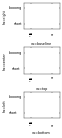

In [289]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===================
Ticklabel alignment
===================

"""


import matplotlib.pyplot as plt

import mpl_toolkits.axisartist as axisartist


def setup_axes(fig, pos):
    ax = fig.add_subplot(pos, axes_class=axisartist.Axes)
    ax.set_yticks([0.2, 0.8], labels=["short", "loooong"])
    ax.set_xticks([0.2, 0.8], labels=[r"$\frac{1}{2}\pi$", r"$\pi$"])
    return ax


fig = plt.figure(figsize=(3, 5))
fig.subplots_adjust(left=0.5, hspace=0.7)

ax = setup_axes(fig, 311)
ax.set_ylabel("ha=right")
ax.set_xlabel("va=baseline")

ax = setup_axes(fig, 312)
ax.axis["left"].major_ticklabels.set_ha("center")
ax.axis["bottom"].major_ticklabels.set_va("top")
ax.set_ylabel("ha=center")
ax.set_xlabel("va=top")

ax = setup_axes(fig, 313)
ax.axis["left"].major_ticklabels.set_ha("left")
ax.axis["bottom"].major_ticklabels.set_va("bottom")
ax.set_ylabel("ha=left")
ax.set_xlabel("va=bottom")

plt.show()


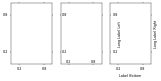

In [290]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===================
Ticklabel direction
===================

"""

import matplotlib.pyplot as plt

import mpl_toolkits.axisartist.axislines as axislines


def setup_axes(fig, pos):
    ax = fig.add_subplot(pos, axes_class=axislines.Axes)
    ax.set_yticks([0.2, 0.8])
    ax.set_xticks([0.2, 0.8])
    return ax


fig = plt.figure(figsize=(6, 3))
fig.subplots_adjust(bottom=0.2)

ax = setup_axes(fig, 131)
for axis in ax.axis.values():
    axis.major_ticks.set_tick_out(True)
# or you can simply do "ax.axis[:].major_ticks.set_tick_out(True)"

ax = setup_axes(fig, 132)
ax.axis["left"].set_axis_direction("right")
ax.axis["bottom"].set_axis_direction("top")
ax.axis["right"].set_axis_direction("left")
ax.axis["top"].set_axis_direction("bottom")

ax = setup_axes(fig, 133)
ax.axis["left"].set_axis_direction("right")
ax.axis[:].major_ticks.set_tick_out(True)

ax.axis["left"].label.set_text("Long Label Left")
ax.axis["bottom"].label.set_text("Label Bottom")
ax.axis["right"].label.set_text("Long Label Right")
ax.axis["right"].label.set_visible(True)
ax.axis["left"].label.set_pad(0)
ax.axis["bottom"].label.set_pad(10)

plt.show()


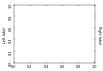

In [291]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=====================
Simple axis direction
=====================

"""
import matplotlib.pyplot as plt

import mpl_toolkits.axisartist as axisartist

fig = plt.figure(figsize=(4, 2.5))
ax1 = fig.add_subplot(axes_class=axisartist.Axes)
fig.subplots_adjust(right=0.8)

ax1.axis["left"].major_ticklabels.set_axis_direction("top")
ax1.axis["left"].label.set_text("Left label")

ax1.axis["right"].label.set_visible(True)
ax1.axis["right"].label.set_text("Right label")
ax1.axis["right"].label.set_axis_direction("left")

plt.show()


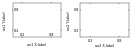

In [292]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==========================================
Simple axis tick label and tick directions
==========================================

First subplot moves the tick labels to inside the spines.
Second subplot moves the ticks to inside the spines.
These effects can be obtained for a standard Axes by `~.Axes.tick_params`.
"""

import matplotlib.pyplot as plt

import mpl_toolkits.axisartist as axisartist


def setup_axes(fig, pos):
    ax = fig.add_subplot(pos, axes_class=axisartist.Axes)
    ax.set_yticks([0.2, 0.8])
    ax.set_xticks([0.2, 0.8])
    return ax


fig = plt.figure(figsize=(5, 2))
fig.subplots_adjust(wspace=0.4, bottom=0.3)

ax1 = setup_axes(fig, 121)
ax1.set_xlabel("ax1 X-label")
ax1.set_ylabel("ax1 Y-label")

ax1.axis[:].invert_ticklabel_direction()

ax2 = setup_axes(fig, 122)
ax2.set_xlabel("ax2 X-label")
ax2.set_ylabel("ax2 Y-label")

ax2.axis[:].major_ticks.set_tick_out(False)

plt.show()


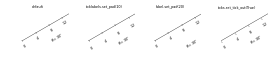

In [293]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===============
Simple Axis Pad
===============

"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.projections import PolarAxes
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist as axisartist
import mpl_toolkits.axisartist.angle_helper as angle_helper
import mpl_toolkits.axisartist.grid_finder as grid_finder
from mpl_toolkits.axisartist.grid_helper_curvelinear import \
    GridHelperCurveLinear


def setup_axes(fig, rect):
    """Polar projection, but in a rectangular box."""

    # see demo_curvelinear_grid.py for details
    tr = Affine2D().scale(np.pi/180., 1.) + PolarAxes.PolarTransform()

    extreme_finder = angle_helper.ExtremeFinderCycle(20, 20,
                                                     lon_cycle=360,
                                                     lat_cycle=None,
                                                     lon_minmax=None,
                                                     lat_minmax=(0, np.inf),
                                                     )

    grid_locator1 = angle_helper.LocatorDMS(12)
    grid_locator2 = grid_finder.MaxNLocator(5)

    tick_formatter1 = angle_helper.FormatterDMS()

    grid_helper = GridHelperCurveLinear(tr,
                                        extreme_finder=extreme_finder,
                                        grid_locator1=grid_locator1,
                                        grid_locator2=grid_locator2,
                                        tick_formatter1=tick_formatter1
                                        )

    ax1 = fig.add_subplot(
        rect, axes_class=axisartist.Axes, grid_helper=grid_helper)
    ax1.axis[:].set_visible(False)
    ax1.set_aspect(1.)
    ax1.set_xlim(-5, 12)
    ax1.set_ylim(-5, 10)

    return ax1


def add_floating_axis1(ax1):
    ax1.axis["lat"] = axis = ax1.new_floating_axis(0, 30)
    axis.label.set_text(r"$\theta = 30^{\circ}$")
    axis.label.set_visible(True)

    return axis


def add_floating_axis2(ax1):
    ax1.axis["lon"] = axis = ax1.new_floating_axis(1, 6)
    axis.label.set_text(r"$r = 6$")
    axis.label.set_visible(True)

    return axis


fig = plt.figure(figsize=(9, 3.))
fig.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.99,
                    wspace=0.01, hspace=0.01)


def ann(ax1, d):
    if plt.rcParams["text.usetex"]:
        d = d.replace("_", r"\_")

    ax1.annotate(d, (0.5, 1), (5, -5),
                 xycoords="axes fraction", textcoords="offset points",
                 va="top", ha="center")


ax1 = setup_axes(fig, rect=141)
axis = add_floating_axis1(ax1)
ann(ax1, r"default")

ax1 = setup_axes(fig, rect=142)
axis = add_floating_axis1(ax1)
axis.major_ticklabels.set_pad(10)
ann(ax1, r"ticklabels.set_pad(10)")

ax1 = setup_axes(fig, rect=143)
axis = add_floating_axis1(ax1)
axis.label.set_pad(20)
ann(ax1, r"label.set_pad(20)")

ax1 = setup_axes(fig, rect=144)
axis = add_floating_axis1(ax1)
axis.major_ticks.set_tick_out(True)
ann(ax1, "ticks.set_tick_out(True)")

plt.show()


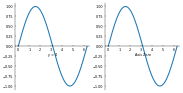

In [294]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=============================
Custom spines with axisartist
=============================

This example showcases the use of :mod:`.axisartist` to draw spines at custom
positions (here, at ``y = 0``).

Note, however, that it is simpler to achieve this effect using standard
`.Spine` methods, as demonstrated in
:doc:`/gallery/spines/centered_spines_with_arrows`.

.. redirect-from:: /gallery/axisartist/simple_axisline2
"""

import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits import axisartist

fig = plt.figure(figsize=(6, 3), layout="constrained")
# To construct axes of two different classes, we need to use gridspec (or
# MATLAB-style add_subplot calls).
gs = fig.add_gridspec(1, 2)


ax0 = fig.add_subplot(gs[0, 0], axes_class=axisartist.Axes)
# Make a new axis along the first (x) axis which passes through y=0.
ax0.axis["y=0"] = ax0.new_floating_axis(nth_coord=0, value=0,
                                        axis_direction="bottom")
ax0.axis["y=0"].toggle(all=True)
ax0.axis["y=0"].label.set_text("y = 0")
# Make other axis invisible.
ax0.axis["bottom", "top", "right"].set_visible(False)


# Alternatively, one can use AxesZero, which automatically sets up two
# additional axis, named "xzero" (the y=0 axis) and "yzero" (the x=0 axis).
ax1 = fig.add_subplot(gs[0, 1], axes_class=axisartist.axislines.AxesZero)
# "xzero" and "yzero" default to invisible; make xzero axis visible.
ax1.axis["xzero"].set_visible(True)
ax1.axis["xzero"].label.set_text("Axis Zero")
# Make other axis invisible.
ax1.axis["bottom", "top", "right"].set_visible(False)


# Draw some sample data.
x = np.arange(0, 2*np.pi, 0.01)
ax0.plot(x, np.sin(x))
ax1.plot(x, np.sin(x))

plt.show()


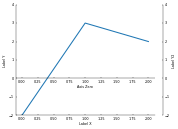

In [295]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===============
Simple Axisline
===============

"""

import matplotlib.pyplot as plt

from mpl_toolkits.axisartist.axislines import AxesZero

fig = plt.figure()
fig.subplots_adjust(right=0.85)
ax = fig.add_subplot(axes_class=AxesZero)

# make right and top axis invisible
ax.axis["right"].set_visible(False)
ax.axis["top"].set_visible(False)

# make xzero axis (horizontal axis line through y=0) visible.
ax.axis["xzero"].set_visible(True)
ax.axis["xzero"].label.set_text("Axis Zero")

ax.set_ylim(-2, 4)
ax.set_xlabel("Label X")
ax.set_ylabel("Label Y")
# Or:
# ax.axis["bottom"].label.set_text("Label X")
# ax.axis["left"].label.set_text("Label Y")

# make new (right-side) yaxis, but with some offset
ax.axis["right2"] = ax.new_fixed_axis(loc="right", offset=(20, 0))
ax.axis["right2"].label.set_text("Label Y2")

ax.plot([-2, 3, 2])
plt.show()


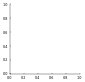

In [296]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
================
Simple Axisline3
================

"""
import matplotlib.pyplot as plt

from mpl_toolkits.axisartist.axislines import Axes

fig = plt.figure(figsize=(3, 3))

ax = fig.add_subplot(axes_class=Axes)

ax.axis["right"].set_visible(False)
ax.axis["top"].set_visible(False)

plt.show()


In [297]:
ChapterConfig.set_chapter_name("13showcase")

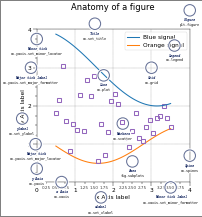

In [298]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===================
Anatomy of a figure
===================

This figure shows the name of several matplotlib elements composing a figure
"""


import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

royal_blue = [0, 20/256, 82/256]


# make the figure

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.add_axes([0.2, 0.17, 0.68, 0.7], aspect=1)

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter("{x:.2f}")

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0, length=10, labelsize=14)
ax.tick_params(which='minor', width=1.0, length=5, labelsize=10,
               labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c='C0', lw=2.5, label="Blue signal", zorder=10)
ax.plot(X, Y2, c='C1', lw=2.5, label="Orange signal")
ax.plot(X[::3], Y3[::3], linewidth=0, markersize=9,
        marker='s', markerfacecolor='none', markeredgecolor='C4',
        markeredgewidth=2.5)

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("x Axis label", fontsize=14)
ax.set_ylabel("y Axis label", fontsize=14)
ax.legend(loc="upper right", fontsize=14)


# Annotate the figure

def annotate(x, y, text, code):
    # Circle marker
    c = Circle((x, y), radius=0.15, clip_on=False, zorder=10, linewidth=2.5,
               edgecolor=royal_blue + [0.6], facecolor='none',
               path_effects=[withStroke(linewidth=7, foreground='white')])
    ax.add_artist(c)

    # use path_effects as a background for the texts
    # draw the path_effects and the colored text separately so that the
    # path_effects cannot clip other texts
    for path_effects in [[withStroke(linewidth=7, foreground='white')], []]:
        color = 'white' if path_effects else royal_blue
        ax.text(x, y-0.2, text, zorder=100,
                ha='center', va='top', weight='bold', color=color,
                style='italic', fontfamily='Courier New',
                path_effects=path_effects)

        color = 'white' if path_effects else 'black'
        ax.text(x, y-0.33, code, zorder=100,
                ha='center', va='top', weight='normal', color=color,
                fontfamily='monospace', fontsize='medium',
                path_effects=path_effects)


annotate(3.5, -0.13, "Minor tick label", "ax.xaxis.set_minor_formatter")
annotate(-0.03, 1.0, "Major tick", "ax.yaxis.set_major_locator")
annotate(0.00, 3.75, "Minor tick", "ax.yaxis.set_minor_locator")
annotate(-0.15, 3.00, "Major tick label", "ax.yaxis.set_major_formatter")
annotate(1.68, -0.39, "xlabel", "ax.set_xlabel")
annotate(-0.38, 1.67, "ylabel", "ax.set_ylabel")
annotate(1.52, 4.15, "Title", "ax.set_title")
annotate(1.75, 2.80, "Line", "ax.plot")
annotate(2.25, 1.54, "Markers", "ax.scatter")
annotate(3.00, 3.00, "Grid", "ax.grid")
annotate(3.60, 3.58, "Legend", "ax.legend")
annotate(2.5, 0.55, "Axes", "fig.subplots")
annotate(4, 4.5, "Figure", "plt.figure")
annotate(0.65, 0.01, "x Axis", "ax.xaxis")
annotate(0, 0.36, "y Axis", "ax.yaxis")
annotate(4.0, 0.7, "Spine", "ax.spines")

# frame around figure
fig.patch.set(linewidth=4, edgecolor='0.5')
plt.show()


# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.pyplot.figure`
#    - `matplotlib.axes.Axes.text`
#    - `matplotlib.axis.Axis.set_minor_formatter`
#    - `matplotlib.axis.Axis.set_major_locator`
#    - `matplotlib.axis.Axis.set_minor_locator`
#    - `matplotlib.patches.Circle`
#    - `matplotlib.patheffects.withStroke`
#    - `matplotlib.ticker.FuncFormatter`


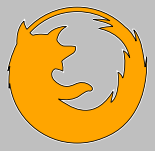

In [299]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=======
Firefox
=======

This example shows how to create the Firefox logo with path and patches.
"""

import re

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.patches as patches
from matplotlib.path import Path

# From: https://dmitrybaranovskiy.github.io/raphael/icons/#firefox
firefox = "M28.4,22.469c0.479-0.964,0.851-1.991,1.095-3.066c0.953-3.661,0.666-6.854,0.666-6.854l-0.327,2.104c0,0-0.469-3.896-1.044-5.353c-0.881-2.231-1.273-2.214-1.274-2.21c0.542,1.379,0.494,2.169,0.483,2.288c-0.01-0.016-0.019-0.032-0.027-0.047c-0.131-0.324-0.797-1.819-2.225-2.878c-2.502-2.481-5.943-4.014-9.745-4.015c-4.056,0-7.705,1.745-10.238,4.525C5.444,6.5,5.183,5.938,5.159,5.317c0,0-0.002,0.002-0.006,0.005c0-0.011-0.003-0.021-0.003-0.031c0,0-1.61,1.247-1.436,4.612c-0.299,0.574-0.56,1.172-0.777,1.791c-0.375,0.817-0.75,2.004-1.059,3.746c0,0,0.133-0.422,0.399-0.988c-0.064,0.482-0.103,0.971-0.116,1.467c-0.09,0.845-0.118,1.865-0.039,3.088c0,0,0.032-0.406,0.136-1.021c0.834,6.854,6.667,12.165,13.743,12.165l0,0c1.86,0,3.636-0.37,5.256-1.036C24.938,27.771,27.116,25.196,28.4,22.469zM16.002,3.356c2.446,0,4.73,0.68,6.68,1.86c-2.274-0.528-3.433-0.261-3.423-0.248c0.013,0.015,3.384,0.589,3.981,1.411c0,0-1.431,0-2.856,0.41c-0.065,0.019,5.242,0.663,6.327,5.966c0,0-0.582-1.213-1.301-1.42c0.473,1.439,0.351,4.17-0.1,5.528c-0.058,0.174-0.118-0.755-1.004-1.155c0.284,2.037-0.018,5.268-1.432,6.158c-0.109,0.07,0.887-3.189,0.201-1.93c-4.093,6.276-8.959,2.539-10.934,1.208c1.585,0.388,3.267,0.108,4.242-0.559c0.982-0.672,1.564-1.162,2.087-1.047c0.522,0.117,0.87-0.407,0.464-0.872c-0.405-0.466-1.392-1.105-2.725-0.757c-0.94,0.247-2.107,1.287-3.886,0.233c-1.518-0.899-1.507-1.63-1.507-2.095c0-0.366,0.257-0.88,0.734-1.028c0.58,0.062,1.044,0.214,1.537,0.466c0.005-0.135,0.006-0.315-0.001-0.519c0.039-0.077,0.015-0.311-0.047-0.596c-0.036-0.287-0.097-0.582-0.19-0.851c0.01-0.002,0.017-0.007,0.021-0.021c0.076-0.344,2.147-1.544,2.299-1.659c0.153-0.114,0.55-0.378,0.506-1.183c-0.015-0.265-0.058-0.294-2.232-0.286c-0.917,0.003-1.425-0.894-1.589-1.245c0.222-1.231,0.863-2.11,1.919-2.704c0.02-0.011,0.015-0.021-0.008-0.027c0.219-0.127-2.524-0.006-3.76,1.604C9.674,8.045,9.219,7.95,8.71,7.95c-0.638,0-1.139,0.07-1.603,0.187c-0.05,0.013-0.122,0.011-0.208-0.001C6.769,8.04,6.575,7.88,6.365,7.672c0.161-0.18,0.324-0.356,0.495-0.526C9.201,4.804,12.43,3.357,16.002,3.356z"  # noqa


def svg_parse(path):
    commands = {'M': (Path.MOVETO,),
                'L': (Path.LINETO,),
                'Q': (Path.CURVE3,)*2,
                'C': (Path.CURVE4,)*3,
                'Z': (Path.CLOSEPOLY,)}
    vertices = []
    codes = []
    cmd_values = re.split("([A-Za-z])", path)[1:]  # Split over commands.
    for cmd, values in zip(cmd_values[::2], cmd_values[1::2]):
        # Numbers are separated either by commas, or by +/- signs (but not at
        # the beginning of the string).
        points = ([*map(float, re.split(",|(?<!^)(?=[+-])", values))] if values
                  else [(0., 0.)])  # Only for "z/Z" (CLOSEPOLY).
        points = np.reshape(points, (-1, 2))
        if cmd.islower():
            points += vertices[-1][-1]
        codes.extend(commands[cmd.upper()])
        vertices.append(points)
    return np.array(codes), np.concatenate(vertices)


# SVG to Matplotlib
codes, verts = svg_parse(firefox)
path = Path(verts, codes)

xmin, ymin = verts.min(axis=0) - 1
xmax, ymax = verts.max(axis=0) + 1

fig = plt.figure(figsize=(5, 5), facecolor="0.75")  # gray background
ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1,
                  xlim=(xmin, xmax),  # centering
                  ylim=(ymax, ymin),  # centering, upside down
                  xticks=[], yticks=[])  # no ticks

# White outline (width = 6)
ax.add_patch(patches.PathPatch(path, facecolor='none', edgecolor='w', lw=6))
# Actual shape with black outline
ax.add_patch(patches.PathPatch(path, facecolor='orange', edgecolor='k', lw=2))

plt.show()  # Display


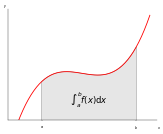

In [300]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==================================
Integral as the area under a curve
==================================

Although this is a simple example, it demonstrates some important tweaks:

* A simple line plot with custom color and line width.
* A shaded region created using a Polygon patch.
* A text label with mathtext rendering.
* figtext calls to label the x- and y-axes.
* Use of axis spines to hide the top and right spines.
* Custom tick placement and labels.
"""
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Polygon


def func(x):
    return (x - 3) * (x - 5) * (x - 7) + 85


a, b = 2, 9  # integral limits
x = np.linspace(0, 10)
y = func(x)

fig, ax = plt.subplots()
ax.plot(x, y, 'r', linewidth=2)
ax.set_ylim(bottom=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = func(ix)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

ax.text(0.5 * (a + b), 30, r"$\int_a^b f(x)\mathrm{d}x$",
        horizontalalignment='center', fontsize=20)

fig.text(0.9, 0.05, '$x$')
fig.text(0.1, 0.9, '$y$')

ax.spines[['top', 'right']].set_visible(False)
ax.set_xticks([a, b], labels=['$a$', '$b$'])
ax.set_yticks([])

plt.show()


In [301]:
# THIS __name__ EXAMPLE WAS REMOVED

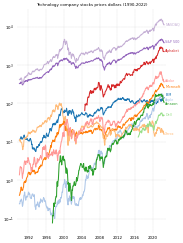

In [302]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==========================
Stock prices over 32 years
==========================

.. redirect-from:: /gallery/showcase/bachelors_degrees_by_gender

A graph of multiple time series that demonstrates custom styling of plot frame,
tick lines, tick labels, and line graph properties. It also uses custom
placement of text labels along the right edge as an alternative to a
conventional legend.

Note: The third-party mpl style dufte_ produces similar-looking plots with less
code.

.. _dufte: https://github.com/nschloe/dufte
"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.cbook import get_sample_data
import matplotlib.transforms as mtransforms

with get_sample_data('Stocks.csv') as file:
    stock_data = np.genfromtxt(
        file, delimiter=',', names=True, dtype=None,
        converters={0: lambda x: np.datetime64(x, 'D')}, skip_header=1)

fig, ax = plt.subplots(1, 1, figsize=(6, 8), layout='constrained')

# These are the colors that will be used in the plot
ax.set_prop_cycle(color=[
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
    '#17becf', '#9edae5'])

stocks_name = ['IBM', 'Apple', 'Microsoft', 'Xerox', 'Amazon', 'Dell',
               'Alphabet', 'Adobe', 'S&P 500', 'NASDAQ']
stocks_ticker = ['IBM', 'AAPL', 'MSFT', 'XRX', 'AMZN', 'DELL', 'GOOGL',
                 'ADBE', 'GSPC', 'IXIC']

# Manually adjust the label positions vertically (units are points = 1/72 inch)
y_offsets = {k: 0 for k in stocks_ticker}
y_offsets['IBM'] = 5
y_offsets['AAPL'] = -5
y_offsets['AMZN'] = -6

for nn, column in enumerate(stocks_ticker):
    # Plot each line separately with its own color.
    # don't include any data with NaN.
    good = np.nonzero(np.isfinite(stock_data[column]))
    line, = ax.plot(stock_data['Date'][good], stock_data[column][good], lw=2.5)

    # Add a text label to the right end of every line. Most of the code below
    # is adding specific offsets y position because some labels overlapped.
    y_pos = stock_data[column][-1]

    # Use an offset transform, in points, for any text that needs to be nudged
    # up or down.
    offset = y_offsets[column] / 72
    trans = mtransforms.ScaledTranslation(0, offset, fig.dpi_scale_trans)
    trans = ax.transData + trans

    # Again, make sure that all labels are large enough to be easily read
    # by the viewer.
    ax.text(np.datetime64('2022-10-01'), y_pos, stocks_name[nn],
            color=line.get_color(), transform=trans)

ax.set_xlim(np.datetime64('1989-06-01'), np.datetime64('2023-01-01'))

fig.suptitle("Technology company stocks prices dollars (1990-2022)",
             ha="center")

# Remove the plot frame lines. They are unnecessary here.
ax.spines[:].set_visible(False)

# Ensure that the axis ticks only show up on the bottom and left of the plot.
# Ticks on the right and top of the plot are generally unnecessary.
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.set_yscale('log')

# Provide tick lines across the plot to help your viewers trace along
# the axis ticks. Make sure that the lines are light and small so they
# don't obscure the primary data lines.
ax.grid(True, 'major', 'both', ls='--', lw=.5, c='k', alpha=.3)

# Remove the tick marks; they are unnecessary with the tick lines we just
# plotted. Make sure your axis ticks are large enough to be easily read.
# You don't want your viewers squinting to read your plot.
ax.tick_params(axis='both', which='both', labelsize='large',
               bottom=False, top=False, labelbottom=True,
               left=False, right=False, labelleft=True)

# Finally, save the figure as a PNG.
# You can also save it as a PDF, JPEG, etc.
# Just change the file extension in this call.
# fig.savefig('stock-prices.png', bbox_inches='tight')
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.pyplot.subplots`
#    - `matplotlib.axes.Axes.text`
#    - `matplotlib.axis.XAxis.tick_bottom`
#    - `matplotlib.axis.YAxis.tick_left`
#    - `matplotlib.artist.Artist.set_visible`


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

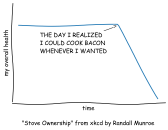

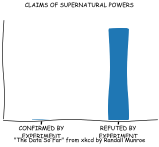

In [303]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
====
XKCD
====

Shows how to create an xkcd-like plot.
"""
import matplotlib.pyplot as plt
import numpy as np

# %%

with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Munroe
    # https://xkcd.com/418/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines[['top', 'right']].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    ax.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    ax.plot(data)

    ax.set_xlabel('time')
    ax.set_ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Munroe',
        ha='center')

# %%

with plt.xkcd():
    # Based on "The Data So Far" from XKCD by Randall Munroe
    # https://xkcd.com/373/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.bar([0, 1], [0, 100], 0.25)
    ax.spines[['top', 'right']].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
    ax.set_xlim([-0.5, 1.5])
    ax.set_yticks([])
    ax.set_ylim([0, 110])

    ax.set_title("CLAIMS OF SUPERNATURAL POWERS")

    fig.text(
        0.5, 0.05,
        '"The Data So Far" from xkcd by Randall Munroe',
        ha='center')

plt.show()


In [304]:
ChapterConfig.set_chapter_name("14animation")

In [305]:
# 14animation THIS Chapter WAS REMOVED

In [306]:
# 14animation THIS Chapter WAS REMOVED

In [307]:
# 14animation THIS Chapter WAS REMOVED

In [308]:
# 14animation THIS Chapter WAS REMOVED

In [309]:
# 14animation THIS Chapter WAS REMOVED

In [310]:
# 14animation THIS Chapter WAS REMOVED

In [311]:
# 14animation THIS Chapter WAS REMOVED

In [312]:
# 14animation THIS Chapter WAS REMOVED

In [313]:
# 14animation THIS Chapter WAS REMOVED

In [314]:
# 14animation THIS Chapter WAS REMOVED

In [315]:
# 14animation THIS Chapter WAS REMOVED

In [316]:
# 14animation THIS Chapter WAS REMOVED

In [317]:
# 14animation THIS Chapter WAS REMOVED

In [318]:
# 14animation THIS Chapter WAS REMOVED

In [319]:
# 14animation THIS Chapter WAS REMOVED

In [320]:
ChapterConfig.set_chapter_name("15event_handling")

In [321]:
# 15event_handling THIS Chapter WAS REMOVED

In [322]:
# 15event_handling THIS Chapter WAS REMOVED

In [323]:
# 15event_handling THIS Chapter WAS REMOVED

In [324]:
# 15event_handling THIS Chapter WAS REMOVED

In [325]:
# 15event_handling THIS Chapter WAS REMOVED

In [326]:
# 15event_handling THIS Chapter WAS REMOVED

In [327]:
# 15event_handling THIS Chapter WAS REMOVED

In [328]:
# 15event_handling THIS Chapter WAS REMOVED

In [329]:
# 15event_handling THIS Chapter WAS REMOVED

In [330]:
# 15event_handling THIS Chapter WAS REMOVED

In [331]:
# 15event_handling THIS Chapter WAS REMOVED

In [332]:
# 15event_handling THIS Chapter WAS REMOVED

In [333]:
# 15event_handling THIS Chapter WAS REMOVED

In [334]:
# 15event_handling THIS Chapter WAS REMOVED

In [335]:
# 15event_handling THIS Chapter WAS REMOVED

In [336]:
# 15event_handling THIS Chapter WAS REMOVED

In [337]:
# 15event_handling THIS Chapter WAS REMOVED

In [338]:
# 15event_handling THIS Chapter WAS REMOVED

In [339]:
# 15event_handling THIS Chapter WAS REMOVED

In [340]:
# 15event_handling THIS Chapter WAS REMOVED

In [341]:
# 15event_handling THIS Chapter WAS REMOVED

In [342]:
ChapterConfig.set_chapter_name("16misc")

In [343]:
# 16misc THIS Chapter WAS REMOVED

In [344]:
# 16misc THIS Chapter WAS REMOVED

In [345]:
# 16misc THIS Chapter WAS REMOVED

In [346]:
# 16misc THIS Chapter WAS REMOVED

In [347]:
# 16misc THIS Chapter WAS REMOVED

In [348]:
# 16misc THIS Chapter WAS REMOVED

In [349]:
# 16misc THIS Chapter WAS REMOVED

In [350]:
# 16misc THIS Chapter WAS REMOVED

In [351]:
# 16misc THIS Chapter WAS REMOVED

In [352]:
# 16misc THIS Chapter WAS REMOVED

In [353]:
# 16misc THIS Chapter WAS REMOVED

In [354]:
# 16misc THIS Chapter WAS REMOVED

In [355]:
# 16misc THIS Chapter WAS REMOVED

In [356]:
# 16misc THIS Chapter WAS REMOVED

In [357]:
# 16misc THIS Chapter WAS REMOVED

In [358]:
# 16misc THIS Chapter WAS REMOVED

In [359]:
# 16misc THIS Chapter WAS REMOVED

In [360]:
# 16misc THIS Chapter WAS REMOVED

In [361]:
# 16misc THIS Chapter WAS REMOVED

In [362]:
# 16misc THIS Chapter WAS REMOVED

In [363]:
# 16misc THIS Chapter WAS REMOVED

In [364]:
# 16misc THIS Chapter WAS REMOVED

In [365]:
# 16misc THIS Chapter WAS REMOVED

In [366]:
# 16misc THIS Chapter WAS REMOVED

In [367]:
# 16misc THIS Chapter WAS REMOVED

In [368]:
# 16misc THIS Chapter WAS REMOVED

In [369]:
# 16misc THIS Chapter WAS REMOVED

In [370]:
# 16misc THIS Chapter WAS REMOVED

In [371]:
# 16misc THIS Chapter WAS REMOVED

In [372]:
# 16misc THIS Chapter WAS REMOVED

In [373]:
# 16misc THIS Chapter WAS REMOVED

In [374]:
ChapterConfig.set_chapter_name("17mplot3d")

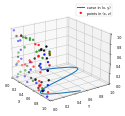

In [375]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=======================
Plot 2D data on 3D plot
=======================

Demonstrates using ax.plot's *zdir* keyword to plot 2D data on
selective axes of a 3D plot.
"""

import matplotlib.pyplot as plt
import numpy as np

ax = plt.figure().add_subplot(projection='3d')

# Plot a sin curve using the x and y axes.
x = np.linspace(0, 1, 100)
y = np.sin(x * 2 * np.pi) / 2 + 0.5
ax.plot(x, y, zs=0, zdir='z', label='curve in (x, y)')

# Plot scatterplot data (20 2D points per colour) on the x and z axes.
colors = ('r', 'g', 'b', 'k')

# Fixing random state for reproducibility
np.random.seed(19680801)

x = np.random.sample(20 * len(colors))
y = np.random.sample(20 * len(colors))
c_list = []
for c in colors:
    c_list.extend([c] * 20)
# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x, y) points are plotted on the x and z axes.
ax.scatter(x, y, zs=0, zdir='y', c=c_list, label='points in (x, z)')

# Make legend, set axes limits and labels
ax.legend()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=20., azim=-35, roll=0)

plt.show()


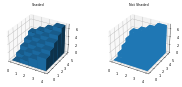

In [376]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=====================
Demo of 3D bar charts
=====================

A basic demo of how to plot 3D bars with and without shading.
"""

import matplotlib.pyplot as plt
import numpy as np

# set up the figure and axes
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# fake data
_x = np.arange(4)
_y = np.arange(5)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = x + y
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded')

ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
ax2.set_title('Not Shaded')

plt.show()


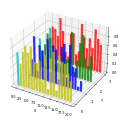

In [377]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
========================================
Create 2D bar graphs in different planes
========================================

Demonstrates making a 3D plot which has 2D bar graphs projected onto
planes y=0, y=1, etc.
"""

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

colors = ['r', 'g', 'b', 'y']
yticks = [3, 2, 1, 0]
for c, k in zip(colors, yticks):
    # Generate the random data for the y=k 'layer'.
    xs = np.arange(20)
    ys = np.random.rand(20)

    # You can provide either a single color or an array with the same length as
    # xs and ys. To demonstrate this, we color the first bar of each set cyan.
    cs = [c] * len(xs)
    cs[0] = 'c'

    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# On the y-axis let's only label the discrete values that we have data for.
ax.set_yticks(yticks)

plt.show()


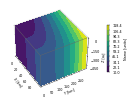

In [378]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===================
3D box surface plot
===================

Given data on a gridded volume ``X``, ``Y``, ``Z``, this example plots the
data values on the volume surfaces.

The strategy is to select the data from each surface and plot
contours separately using `.axes3d.Axes3D.contourf` with appropriate
parameters *zdir* and *offset*.
"""

import matplotlib.pyplot as plt
import numpy as np

# Define dimensions
Nx, Ny, Nz = 100, 300, 500
X, Y, Z = np.meshgrid(np.arange(Nx), np.arange(Ny), -np.arange(Nz))

# Create fake data
data = (((X+100)**2 + (Y-20)**2 + 2*Z)/1000+1)

kw = {
    'vmin': data.min(),
    'vmax': data.max(),
    'levels': np.linspace(data.min(), data.max(), 10),
}

# Create a figure with 3D ax
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')

# Plot contour surfaces
_ = ax.contourf(
    X[:, :, 0], Y[:, :, 0], data[:, :, 0],
    zdir='z', offset=0, **kw
)
_ = ax.contourf(
    X[0, :, :], data[0, :, :], Z[0, :, :],
    zdir='y', offset=0, **kw
)
C = ax.contourf(
    data[:, -1, :], Y[:, -1, :], Z[:, -1, :],
    zdir='x', offset=X.max(), **kw
)
# --


# Set limits of the plot from coord limits
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
zmin, zmax = Z.min(), Z.max()
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

# Plot edges
edges_kw = dict(color='0.4', linewidth=1, zorder=1e3)
ax.plot([xmax, xmax], [ymin, ymax], 0, **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], 0, **edges_kw)
ax.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

# Set labels and zticks
ax.set(
    xlabel='X [km]',
    ylabel='Y [km]',
    zlabel='Z [m]',
    zticks=[0, -150, -300, -450],
)

# Set zoom and angle view
ax.view_init(40, -30, 0)
ax.set_box_aspect(None, zoom=0.9)

# Colorbar
fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='Name [units]')

# Show Figure
plt.show()


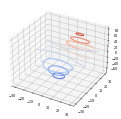

In [379]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=================================
Plot contour (level) curves in 3D
=================================

This is like a contour plot in 2D except that the ``f(x, y)=c`` curve is
plotted on the plane ``z=c``.
"""

import matplotlib.pyplot as plt

from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

ax.contour(X, Y, Z, cmap=cm.coolwarm)  # Plot contour curves

plt.show()


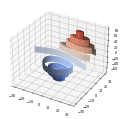

In [380]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===========================================================
Plot contour (level) curves in 3D using the extend3d option
===========================================================

This modification of the :doc:`contour3d` example uses ``extend3d=True`` to
extend the curves vertically into 'ribbons'.
"""

import matplotlib.pyplot as plt

from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.contour(X, Y, Z, extend3d=True, cmap=cm.coolwarm)

plt.show()


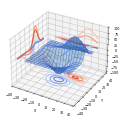

In [381]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=====================================
Project contour profiles onto a graph
=====================================
Demonstrates displaying a 3D surface while also projecting contour 'profiles'
onto the 'walls' of the graph.
See :doc:`contourf3d_2` for the filled version.
"""

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

# Plot the 3D surface
ax.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph.
ax.contour(X, Y, Z, zdir='z', offset=-100, cmap='coolwarm')
ax.contour(X, Y, Z, zdir='x', offset=-40, cmap='coolwarm')
ax.contour(X, Y, Z, zdir='y', offset=40, cmap='coolwarm')

ax.set(xlim=(-40, 40), ylim=(-40, 40), zlim=(-100, 100),
       xlabel='X', ylabel='Y', zlabel='Z')

plt.show()


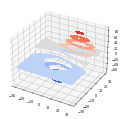

In [382]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===============
Filled contours
===============

`.Axes3D.contourf` differs from `.Axes3D.contour` in that it creates filled
contours, i.e. a discrete number of colours are used to shade the domain.

This is like a `.Axes.contourf` plot in 2D except that the shaded region
corresponding to the level c is graphed on the plane ``z=c``.
"""

import matplotlib.pyplot as plt

from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.contourf(X, Y, Z, cmap=cm.coolwarm)

plt.show()


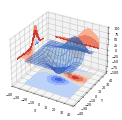

In [383]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===================================
Project filled contour onto a graph
===================================
Demonstrates displaying a 3D surface while also projecting filled contour
'profiles' onto the 'walls' of the graph.
See :doc:`contour3d_3` for the unfilled version.
"""

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

# Plot the 3D surface
ax.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph
ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap='coolwarm')
ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap='coolwarm')
ax.contourf(X, Y, Z, zdir='y', offset=40, cmap='coolwarm')

ax.set(xlim=(-40, 40), ylim=(-40, 40), zlim=(-100, 100),
       xlabel='X', ylabel='Y', zlabel='Z')

plt.show()


In [384]:
# THIS cbook EXAMPLE WAS REMOVED

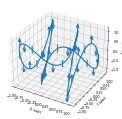

In [385]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
============
3D errorbars
============

An example of using errorbars with upper and lower limits in mplot3d.
"""

import matplotlib.pyplot as plt
import numpy as np

ax = plt.figure().add_subplot(projection='3d')

# setting up a parametric curve
t = np.arange(0, 2*np.pi+.1, 0.01)
x, y, z = np.sin(t), np.cos(3*t), np.sin(5*t)

estep = 15
i = np.arange(t.size)
zuplims = (i % estep == 0) & (i // estep % 3 == 0)
zlolims = (i % estep == 0) & (i // estep % 3 == 2)

ax.errorbar(x, y, z, 0.2, zuplims=zuplims, zlolims=zlolims, errorevery=estep)

ax.set_xlabel("X label")
ax.set_ylabel("Y label")
ax.set_zlabel("Z label")

plt.show()


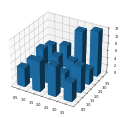

In [386]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==============================
Create 3D histogram of 2D data
==============================

Demo of a histogram for 2D data as a bar graph in 3D.
"""

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = np.random.rand(2, 100) * 4
hist, xedges, yedges = np.histogram2d(x, y, bins=4, range=[[0, 4], [0, 4]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()


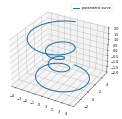

In [387]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
================
Parametric curve
================

This example demonstrates plotting a parametric curve in 3D.
"""

import matplotlib.pyplot as plt
import numpy as np

ax = plt.figure().add_subplot(projection='3d')

# Prepare arrays x, y, z
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()


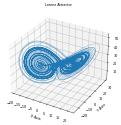

In [388]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
================
Lorenz attractor
================

This is an example of plotting Edward Lorenz's 1963 `"Deterministic Nonperiodic
Flow"`_ in a 3-dimensional space using mplot3d.

.. _"Deterministic Nonperiodic Flow":
   https://journals.ametsoc.org/view/journals/atsc/20/2/1520-0469_1963_020_0130_dnf_2_0_co_2.xml

.. note::
   Because this is a simple non-linear ODE, it would be more easily done using
   SciPy's ODE solver, but this approach depends only upon NumPy.
"""

import matplotlib.pyplot as plt
import numpy as np


def lorenz(xyz, *, s=10, r=28, b=2.667):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot])


dt = 0.01
num_steps = 10000

xyzs = np.empty((num_steps + 1, 3))  # Need one more for the initial values
xyzs[0] = (0., 1., 1.05)  # Set initial values
# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i]) * dt

# Plot
ax = plt.figure().add_subplot(projection='3d')

ax.plot(*xyzs.T, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()


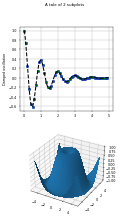

In [389]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=============================
2D and 3D axes in same figure
=============================

This example shows a how to plot a 2D and a 3D plot on the same figure.
"""

import matplotlib.pyplot as plt
import numpy as np


def f(t):
    return np.cos(2*np.pi*t) * np.exp(-t)


# Set up a figure twice as tall as it is wide
fig = plt.figure(figsize=plt.figaspect(2.))
fig.suptitle('A tale of 2 subplots')

# First subplot
ax = fig.add_subplot(2, 1, 1)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
t3 = np.arange(0.0, 2.0, 0.01)

ax.plot(t1, f(t1), 'bo',
        t2, f(t2), 'k--', markerfacecolor='green')
ax.grid(True)
ax.set_ylabel('Damped oscillation')

# Second subplot
ax = fig.add_subplot(2, 1, 2, projection='3d')

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1, 1)

plt.show()


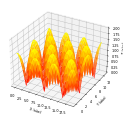

In [390]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=========================
Automatic text offsetting
=========================

This example demonstrates mplot3d's offset text display.
As one rotates the 3D figure, the offsets should remain oriented the
same way as the axis label, and should also be located "away"
from the center of the plot.

This demo triggers the display of the offset text for the x- and
y-axis by adding 1e5 to X and Y. Anything less would not
automatically trigger it.
"""

import matplotlib.pyplot as plt
import numpy as np

ax = plt.figure().add_subplot(projection='3d')

X, Y = np.mgrid[0:6*np.pi:0.25, 0:4*np.pi:0.25]
Z = np.sqrt(np.abs(np.cos(X) + np.cos(Y)))

ax.plot_surface(X + 1e5, Y + 1e5, Z, cmap='autumn', cstride=2, rstride=2)

ax.set_xlabel("X label")
ax.set_ylabel("Y label")
ax.set_zlabel("Z label")
ax.set_zlim(0, 2)

plt.show()


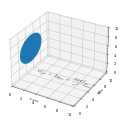

In [391]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
============================
Draw flat objects in 3D plot
============================

Demonstrate using `.pathpatch_2d_to_3d` to 'draw' shapes and text on a 3D plot.
"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle, PathPatch
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D
import mpl_toolkits.mplot3d.art3d as art3d


def text3d(ax, xyz, s, zdir="z", size=None, angle=0, usetex=False, **kwargs):
    """
    Plots the string *s* on the axes *ax*, with position *xyz*, size *size*,
    and rotation angle *angle*. *zdir* gives the axis which is to be treated as
    the third dimension. *usetex* is a boolean indicating whether the string
    should be run through a LaTeX subprocess or not.  Any additional keyword
    arguments are forwarded to `.transform_path`.

    Note: zdir affects the interpretation of xyz.
    """
    x, y, z = xyz
    if zdir == "y":
        xy1, z1 = (x, z), y
    elif zdir == "x":
        xy1, z1 = (y, z), x
    else:
        xy1, z1 = (x, y), z

    text_path = TextPath((0, 0), s, size=size, usetex=usetex)
    trans = Affine2D().rotate(angle).translate(xy1[0], xy1[1])

    p1 = PathPatch(trans.transform_path(text_path), **kwargs)
    ax.add_patch(p1)
    art3d.pathpatch_2d_to_3d(p1, z=z1, zdir=zdir)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Draw a circle on the x=0 'wall'
p = Circle((5, 5), 3)
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=0, zdir="x")

# Manually label the axes
text3d(ax, (4, -2, 0), "X-axis", zdir="z", size=.5, usetex=False,
       ec="none", fc="k")
text3d(ax, (12, 4, 0), "Y-axis", zdir="z", size=.5, usetex=False,
       angle=np.pi / 2, ec="none", fc="k")
text3d(ax, (12, 10, 4), "Z-axis", zdir="y", size=.5, usetex=False,
       angle=np.pi / 2, ec="none", fc="k")

# Write a Latex formula on the z=0 'floor'
text3d(ax, (1, 5, 0),
       r"$\displaystyle G_{\mu\nu} + \Lambda g_{\mu\nu} = "
       r"\frac{8\pi G}{c^4} T_{\mu\nu}  $",
       zdir="z", size=1, usetex=True,
       ec="none", fc="k")

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)

plt.show()


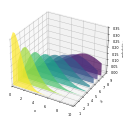

In [392]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=============================================
Generate polygons to fill under 3D line graph
=============================================

Demonstrate how to create polygons which fill the space under a line
graph. In this example polygons are semi-transparent, creating a sort
of 'jagged stained glass' effect.
"""

import math

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.collections import PolyCollection

# Fixing random state for reproducibility
np.random.seed(19680801)


def polygon_under_graph(x, y):
    """
    Construct the vertex list which defines the polygon filling the space under
    the (x, y) line graph. This assumes x is in ascending order.
    """
    return [(x[0], 0.), *zip(x, y), (x[-1], 0.)]


ax = plt.figure().add_subplot(projection='3d')

x = np.linspace(0., 10., 31)
lambdas = range(1, 9)

# verts[i] is a list of (x, y) pairs defining polygon i.
gamma = np.vectorize(math.gamma)
verts = [polygon_under_graph(x, l**x * np.exp(-l) / gamma(x + 1))
         for l in lambdas]
facecolors = plt.colormaps['viridis_r'](np.linspace(0, 1, len(verts)))

poly = PolyCollection(verts, facecolors=facecolors, alpha=.7)
ax.add_collection3d(poly, zs=lambdas, zdir='y')

ax.set(xlim=(0, 10), ylim=(1, 9), zlim=(0, 0.35),
       xlabel='x', ylabel=r'$\lambda$', zlabel='probability')

plt.show()


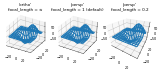

In [393]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
========================
3D plot projection types
========================

Demonstrates the different camera projections for 3D plots, and the effects of
changing the focal length for a perspective projection. Note that Matplotlib
corrects for the 'zoom' effect of changing the focal length.

The default focal length of 1 corresponds to a Field of View (FOV) of 90 deg.
An increased focal length between 1 and infinity "flattens" the image, while a
decreased focal length between 1 and 0 exaggerates the perspective and gives
the image more apparent depth. In the limiting case, a focal length of
infinity corresponds to an orthographic projection after correction of the
zoom effect.

You can calculate focal length from a FOV via the equation:

.. math::

    1 / \\tan (\\mathrm{FOV} / 2)

Or vice versa:

.. math::

    \\mathrm{FOV} = 2 \\arctan (1 / \\mathrm{focal length})

"""

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d

fig, axs = plt.subplots(1, 3, subplot_kw={'projection': '3d'})

# Get the test data
X, Y, Z = axes3d.get_test_data(0.05)

# Plot the data
for ax in axs:
    ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

# Set the orthographic projection.
axs[0].set_proj_type('ortho')  # FOV = 0 deg
axs[0].set_title("'ortho'\nfocal_length = ∞", fontsize=10)

# Set the perspective projections
axs[1].set_proj_type('persp')  # FOV = 90 deg
axs[1].set_title("'persp'\nfocal_length = 1 (default)", fontsize=10)

axs[2].set_proj_type('persp', focal_length=0.2)  # FOV = 157.4 deg
axs[2].set_title("'persp'\nfocal_length = 0.2", fontsize=10)

plt.show()


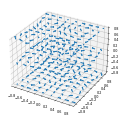

In [394]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==============
3D quiver plot
==============

Demonstrates plotting directional arrows at points on a 3D meshgrid.
"""

import matplotlib.pyplot as plt
import numpy as np

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

# Make the direction data for the arrows
u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True)

plt.show()


In [395]:
# THIS angle EXAMPLE WAS REMOVED

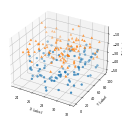

In [396]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==============
3D scatterplot
==============

Demonstration of a basic scatterplot in 3D.
"""

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


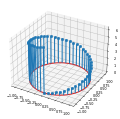

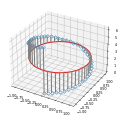

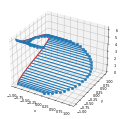

In [397]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=======
3D stem
=======

Demonstration of a stem plot in 3D, which plots vertical lines from a baseline
to the *z*-coordinate and places a marker at the tip.
"""

import matplotlib.pyplot as plt
import numpy as np

theta = np.linspace(0, 2*np.pi)
x = np.cos(theta - np.pi/2)
y = np.sin(theta - np.pi/2)
z = theta

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.stem(x, y, z)

plt.show()

# %%
#
# The position of the baseline can be adapted using *bottom*. The parameters
# *linefmt*, *markerfmt*, and *basefmt* control basic format properties of the
# plot. However, in contrast to `~.axes3d.Axes3D.plot` not all properties are
# configurable via keyword arguments. For more advanced control adapt the line
# objects returned by `~mpl_toolkits.mplot3d.axes3d.Axes3D.stem`.

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
markerline, stemlines, baseline = ax.stem(
    x, y, z, linefmt='grey', markerfmt='D', bottom=np.pi)
markerline.set_markerfacecolor('none')

plt.show()

# %%
#
# The orientation of the stems and baseline can be changed using *orientation*.
# This determines in which direction the stems are projected from the head
# points, towards the *bottom* baseline.
#
# For examples, by setting ``orientation='x'``, the stems are projected along
# the *x*-direction, and the baseline is in the *yz*-plane.

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
markerline, stemlines, baseline = ax.stem(x, y, z, bottom=-1, orientation='x')
ax.set(xlabel='x', ylabel='y', zlabel='z')

plt.show()


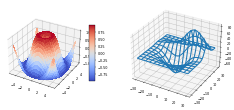

In [398]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
====================
3D plots as subplots
====================

Demonstrate including 3D plots as subplots.
"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()


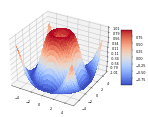

In [399]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=====================
3D surface (colormap)
=====================

Demonstrates plotting a 3D surface colored with the coolwarm colormap.
The surface is made opaque by using ``antialiased=False``.

Also demonstrates using the `.LinearLocator` and custom formatting for the
z axis tick labels.
"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.pyplot.subplots`
#    - `matplotlib.axis.Axis.set_major_formatter`
#    - `matplotlib.axis.Axis.set_major_locator`
#    - `matplotlib.ticker.LinearLocator`
#    - `matplotlib.ticker.StrMethodFormatter`


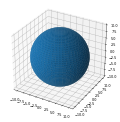

In [400]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
========================
3D surface (solid color)
========================

Demonstrates a very basic plot of a 3D surface using a solid color.
"""

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax.plot_surface(x, y, z)

# Set an equal aspect ratio
ax.set_aspect('equal')

plt.show()


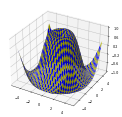

In [401]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=========================
3D surface (checkerboard)
=========================

Demonstrates plotting a 3D surface colored in a checkerboard pattern.
"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.ticker import LinearLocator

ax = plt.figure().add_subplot(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
xlen = len(X)
Y = np.arange(-5, 5, 0.25)
ylen = len(Y)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Create an empty array of strings with the same shape as the meshgrid, and
# populate it with two colors in a checkerboard pattern.
colortuple = ('y', 'b')
colors = np.empty(X.shape, dtype=str)
for y in range(ylen):
    for x in range(xlen):
        colors[y, x] = colortuple[(x + y) % len(colortuple)]

# Plot the surface with face colors taken from the array we made.
surf = ax.plot_surface(X, Y, Z, facecolors=colors, linewidth=0)

# Customize the z axis.
ax.set_zlim(-1, 1)
ax.zaxis.set_major_locator(LinearLocator(6))

plt.show()


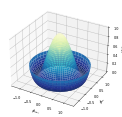

In [402]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=================================
3D surface with polar coordinates
=================================

Demonstrates plotting a surface defined in polar coordinates.
Uses the reversed version of the YlGnBu colormap.
Also demonstrates writing axis labels with latex math mode.

Example contributed by Armin Moser.
"""

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1.25, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
Z = ((R**2 - 1)**2)

# Express the mesh in the cartesian system.
X, Y = R*np.cos(P), R*np.sin(P)

# Plot the surface.
ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r)

# Tweak the limits and add latex math labels.
ax.set_zlim(0, 1)
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$V(\phi)$')

plt.show()


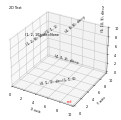

In [403]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
======================
Text annotations in 3D
======================

Demonstrates the placement of text annotations on a 3D plot.

Functionality shown:

- Using the `~.Axes3D.text` function with three types of *zdir* values: None,
  an axis name (ex. 'x'), or a direction tuple (ex. (1, 1, 0)).
- Using the `~.Axes3D.text` function with the color keyword.
- Using the `.text2D` function to place text on a fixed position on the ax
  object.
"""

import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')

# Demo 1: zdir
zdirs = (None, 'x', 'y', 'z', (1, 1, 0), (1, 1, 1))
xs = (1, 4, 4, 9, 4, 1)
ys = (2, 5, 8, 10, 1, 2)
zs = (10, 3, 8, 9, 1, 8)

for zdir, x, y, z in zip(zdirs, xs, ys, zs):
    label = '(%d, %d, %d), dir=%s' % (x, y, z, zdir)
    ax.text(x, y, z, label, zdir)

# Demo 2: color
ax.text(9, 0, 0, "red", color='red')

# Demo 3: text2D
# Placement 0, 0 would be the bottom left, 1, 1 would be the top right.
ax.text2D(0.05, 0.95, "2D Text", transform=ax.transAxes)

# Tweaking display region and labels
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()


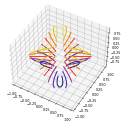

In [404]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==========================
Triangular 3D contour plot
==========================

Contour plots of unstructured triangular grids.

The data used is the same as in the second plot of :doc:`trisurf3d_2`.
:doc:`tricontourf3d` shows the filled version of this example.
"""

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.tri as tri

n_angles = 48
n_radii = 8
min_radius = 0.25

# Create the mesh in polar coordinates and compute x, y, z.
radii = np.linspace(min_radius, 0.95, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi/n_angles

x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
z = (np.cos(radii)*np.cos(3*angles)).flatten()

# Create a custom triangulation.
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
                         y[triang.triangles].mean(axis=1))
                < min_radius)

ax = plt.figure().add_subplot(projection='3d')
ax.tricontour(triang, z, cmap=plt.cm.CMRmap)

# Customize the view angle so it's easier to understand the plot.
ax.view_init(elev=45.)

plt.show()


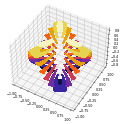

In [405]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=================================
Triangular 3D filled contour plot
=================================

Filled contour plots of unstructured triangular grids.

The data used is the same as in the second plot of :doc:`trisurf3d_2`.
:doc:`tricontour3d` shows the unfilled version of this example.
"""

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.tri as tri

# First create the x, y, z coordinates of the points.
n_angles = 48
n_radii = 8
min_radius = 0.25

# Create the mesh in polar coordinates and compute x, y, z.
radii = np.linspace(min_radius, 0.95, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi/n_angles

x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
z = (np.cos(radii)*np.cos(3*angles)).flatten()

# Create a custom triangulation.
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
                         y[triang.triangles].mean(axis=1))
                < min_radius)

ax = plt.figure().add_subplot(projection='3d')
ax.tricontourf(triang, z, cmap=plt.cm.CMRmap)

# Customize the view angle so it's easier to understand the plot.
ax.view_init(elev=45.)

plt.show()


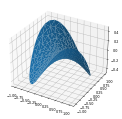

In [406]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
======================
Triangular 3D surfaces
======================

Plot a 3D surface with a triangular mesh.
"""

import matplotlib.pyplot as plt
import numpy as np

n_radii = 8
n_angles = 36

# Make radii and angles spaces (radius r=0 omitted to eliminate duplication).
radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)[..., np.newaxis]

# Convert polar (radii, angles) coords to cartesian (x, y) coords.
# (0, 0) is manually added at this stage,  so there will be no duplicate
# points in the (x, y) plane.
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

# Compute z to make the pringle surface.
z = np.sin(-x*y)

ax = plt.figure().add_subplot(projection='3d')

ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)

plt.show()


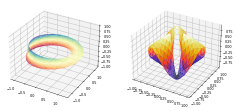

In [407]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===========================
More triangular 3D surfaces
===========================

Two additional examples of plotting surfaces with triangular mesh.

The first demonstrates use of plot_trisurf's triangles argument, and the
second sets a `.Triangulation` object's mask and passes the object directly
to plot_trisurf.
"""

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.tri as mtri

fig = plt.figure(figsize=plt.figaspect(0.5))

# ==========
# First plot
# ==========

# Make a mesh in the space of parameterisation variables u and v
u = np.linspace(0, 2.0 * np.pi, endpoint=True, num=50)
v = np.linspace(-0.5, 0.5, endpoint=True, num=10)
u, v = np.meshgrid(u, v)
u, v = u.flatten(), v.flatten()

# This is the Mobius mapping, taking a u, v pair and returning an x, y, z
# triple
x = (1 + 0.5 * v * np.cos(u / 2.0)) * np.cos(u)
y = (1 + 0.5 * v * np.cos(u / 2.0)) * np.sin(u)
z = 0.5 * v * np.sin(u / 2.0)

# Triangulate parameter space to determine the triangles
tri = mtri.Triangulation(u, v)

# Plot the surface.  The triangles in parameter space determine which x, y, z
# points are connected by an edge.
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap=plt.cm.Spectral)
ax.set_zlim(-1, 1)


# ===========
# Second plot
# ===========

# Make parameter spaces radii and angles.
n_angles = 36
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi/n_angles

# Map radius, angle pairs to x, y, z points.
x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
z = (np.cos(radii)*np.cos(3*angles)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = mtri.Triangulation(x, y)

# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = xmid**2 + ymid**2 < min_radius**2
triang.set_mask(mask)

# Plot the surface.
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_trisurf(triang, z, cmap=plt.cm.CMRmap)


plt.show()


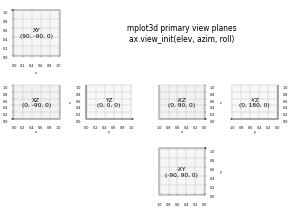

In [408]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
======================
Primary 3D view planes
======================

This example generates an "unfolded" 3D plot that shows each of the primary 3D
view planes. The elevation, azimuth, and roll angles required for each view are
labeled. You could print out this image and fold it into a box where each plane
forms a side of the box.
"""

import matplotlib.pyplot as plt


def annotate_axes(ax, text, fontsize=18):
    ax.text(x=0.5, y=0.5, z=0.5, s=text,
            va="center", ha="center", fontsize=fontsize, color="black")

# (plane, (elev, azim, roll))
views = [('XY',   (90, -90, 0)),
         ('XZ',    (0, -90, 0)),
         ('YZ',    (0,   0, 0)),
         ('-XY', (-90,  90, 0)),
         ('-XZ',   (0,  90, 0)),
         ('-YZ',   (0, 180, 0))]

layout = [['XY',  '.',   'L',   '.'],
          ['XZ', 'YZ', '-XZ', '-YZ'],
          ['.',   '.', '-XY',   '.']]
fig, axd = plt.subplot_mosaic(layout, subplot_kw={'projection': '3d'},
                              figsize=(12, 8.5))
for plane, angles in views:
    axd[plane].set_xlabel('x')
    axd[plane].set_ylabel('y')
    axd[plane].set_zlabel('z')
    axd[plane].set_proj_type('ortho')
    axd[plane].view_init(elev=angles[0], azim=angles[1], roll=angles[2])
    axd[plane].set_box_aspect(None, zoom=1.25)

    label = f'{plane}\n{angles}'
    annotate_axes(axd[plane], label, fontsize=14)

for plane in ('XY', '-XY'):
    axd[plane].set_zticklabels([])
    axd[plane].set_zlabel('')
for plane in ('XZ', '-XZ'):
    axd[plane].set_yticklabels([])
    axd[plane].set_ylabel('')
for plane in ('YZ', '-YZ'):
    axd[plane].set_xticklabels([])
    axd[plane].set_xlabel('')

label = 'mplot3d primary view planes\n' + 'ax.view_init(elev, azim, roll)'
annotate_axes(axd['L'], label, fontsize=18)
axd['L'].set_axis_off()

plt.show()


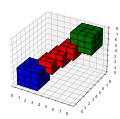

In [409]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==========================
3D voxel / volumetric plot
==========================

Demonstrates plotting 3D volumetric objects with `.Axes3D.voxels`.
"""

import matplotlib.pyplot as plt
import numpy as np

# prepare some coordinates
x, y, z = np.indices((8, 8, 8))

# draw cuboids in the top left and bottom right corners, and a link between
# them
cube1 = (x < 3) & (y < 3) & (z < 3)
cube2 = (x >= 5) & (y >= 5) & (z >= 5)
link = abs(x - y) + abs(y - z) + abs(z - x) <= 2

# combine the objects into a single boolean array
voxelarray = cube1 | cube2 | link

# set the colors of each object
colors = np.empty(voxelarray.shape, dtype=object)
colors[link] = 'red'
colors[cube1] = 'blue'
colors[cube2] = 'green'

# and plot everything
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(voxelarray, facecolors=colors, edgecolor='k')

plt.show()


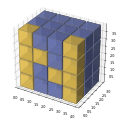

In [410]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===============================
3D voxel plot of the NumPy logo
===============================

Demonstrates using `.Axes3D.voxels` with uneven coordinates.
"""

import matplotlib.pyplot as plt
import numpy as np


def explode(data):
    size = np.array(data.shape)*2
    data_e = np.zeros(size - 1, dtype=data.dtype)
    data_e[::2, ::2, ::2] = data
    return data_e

# build up the numpy logo
n_voxels = np.zeros((4, 3, 4), dtype=bool)
n_voxels[0, 0, :] = True
n_voxels[-1, 0, :] = True
n_voxels[1, 0, 2] = True
n_voxels[2, 0, 1] = True
facecolors = np.where(n_voxels, '#FFD65DC0', '#7A88CCC0')
edgecolors = np.where(n_voxels, '#BFAB6E', '#7D84A6')
filled = np.ones(n_voxels.shape)

# upscale the above voxel image, leaving gaps
filled_2 = explode(filled)
fcolors_2 = explode(facecolors)
ecolors_2 = explode(edgecolors)

# Shrink the gaps
x, y, z = np.indices(np.array(filled_2.shape) + 1).astype(float) // 2
x[0::2, :, :] += 0.05
y[:, 0::2, :] += 0.05
z[:, :, 0::2] += 0.05
x[1::2, :, :] += 0.95
y[:, 1::2, :] += 0.95
z[:, :, 1::2] += 0.95

ax = plt.figure().add_subplot(projection='3d')
ax.voxels(x, y, z, filled_2, facecolors=fcolors_2, edgecolors=ecolors_2)
ax.set_aspect('equal')

plt.show()


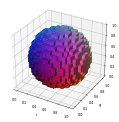

In [411]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==========================================
3D voxel / volumetric plot with RGB colors
==========================================

Demonstrates using `.Axes3D.voxels` to visualize parts of a color space.
"""

import matplotlib.pyplot as plt
import numpy as np


def midpoints(x):
    sl = ()
    for _ in range(x.ndim):
        x = (x[sl + np.index_exp[:-1]] + x[sl + np.index_exp[1:]]) / 2.0
        sl += np.index_exp[:]
    return x

# prepare some coordinates, and attach rgb values to each
r, g, b = np.indices((17, 17, 17)) / 16.0
rc = midpoints(r)
gc = midpoints(g)
bc = midpoints(b)

# define a sphere about [0.5, 0.5, 0.5]
sphere = (rc - 0.5)**2 + (gc - 0.5)**2 + (bc - 0.5)**2 < 0.5**2

# combine the color components
colors = np.zeros(sphere.shape + (3,))
colors[..., 0] = rc
colors[..., 1] = gc
colors[..., 2] = bc

# and plot everything
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(r, g, b, sphere,
          facecolors=colors,
          edgecolors=np.clip(2*colors - 0.5, 0, 1),  # brighter
          linewidth=0.5)
ax.set(xlabel='r', ylabel='g', zlabel='b')
ax.set_aspect('equal')

plt.show()


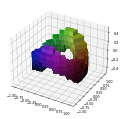

In [412]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=======================================================
3D voxel / volumetric plot with cylindrical coordinates
=======================================================

Demonstrates using the *x*, *y*, *z* parameters of `.Axes3D.voxels`.
"""

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.colors


def midpoints(x):
    sl = ()
    for i in range(x.ndim):
        x = (x[sl + np.index_exp[:-1]] + x[sl + np.index_exp[1:]]) / 2.0
        sl += np.index_exp[:]
    return x

# prepare some coordinates, and attach rgb values to each
r, theta, z = np.mgrid[0:1:11j, 0:np.pi*2:25j, -0.5:0.5:11j]
x = r*np.cos(theta)
y = r*np.sin(theta)

rc, thetac, zc = midpoints(r), midpoints(theta), midpoints(z)

# define a wobbly torus about [0.7, *, 0]
sphere = (rc - 0.7)**2 + (zc + 0.2*np.cos(thetac*2))**2 < 0.2**2

# combine the color components
hsv = np.zeros(sphere.shape + (3,))
hsv[..., 0] = thetac / (np.pi*2)
hsv[..., 1] = rc
hsv[..., 2] = zc + 0.5
colors = matplotlib.colors.hsv_to_rgb(hsv)

# and plot everything
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(x, y, z, sphere,
          facecolors=colors,
          edgecolors=np.clip(2*colors - 0.5, 0, 1),  # brighter
          linewidth=0.5)

plt.show()


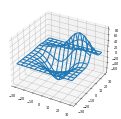

In [413]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=================
3D wireframe plot
=================

A very basic demonstration of a wireframe plot.
"""

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()


Average FPS: 224.018800


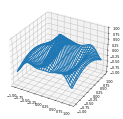

In [414]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===========================
Animate a 3D wireframe plot
===========================

A very simple "animation" of a 3D plot.  See also :doc:`rotate_axes3d_sgskip`.

(This example is skipped when building the documentation gallery because it
intentionally takes a long time to run.)
"""

import time

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Make the X, Y meshgrid.
xs = np.linspace(-1, 1, 50)
ys = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(xs, ys)

# Set the z axis limits, so they aren't recalculated each frame.
ax.set_zlim(-1, 1)

# Begin plotting.
wframe = None
tstart = time.time()
for phi in np.linspace(0, 180. / np.pi, 100):
    # If a line collection is already remove it before drawing.
    if wframe:
        wframe.remove()
    # Generate data.
    Z = np.cos(2 * np.pi * X + phi) * (1 - np.hypot(X, Y))
    # Plot the new wireframe and pause briefly before continuing.
    wframe = ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2)
    plt.pause(.001)

print('Average FPS: %f' % (100 / (time.time() - tstart)))


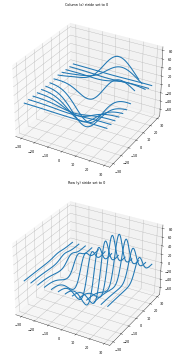

In [415]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===================================
3D wireframe plots in one direction
===================================

Demonstrates that setting *rstride* or *cstride* to 0 causes wires to not be
generated in the corresponding direction.
"""

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d

fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(8, 12), subplot_kw={'projection': '3d'})

# Get the test data
X, Y, Z = axes3d.get_test_data(0.05)

# Give the first plot only wireframes of the type y = c
ax1.plot_wireframe(X, Y, Z, rstride=10, cstride=0)
ax1.set_title("Column (x) stride set to 0")

# Give the second plot only wireframes of the type x = c
ax2.plot_wireframe(X, Y, Z, rstride=0, cstride=10)
ax2.set_title("Row (y) stride set to 0")

plt.tight_layout()
plt.show()


In [416]:
ChapterConfig.set_chapter_name("18scales")

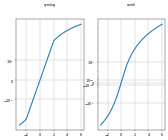

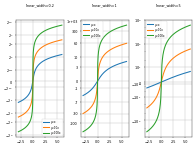

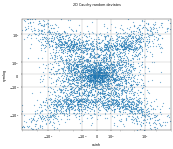

In [417]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
============
Asinh Demo
============

Illustration of the `asinh <.scale.AsinhScale>` axis scaling,
which uses the transformation

.. math::

    a \\rightarrow a_0 \\sinh^{-1} (a / a_0)

For coordinate values close to zero (i.e. much smaller than
the "linear width" :math:`a_0`), this leaves values essentially unchanged:

.. math::

    a \\rightarrow a + \\mathcal{O}(a^3)

but for larger values (i.e. :math:`|a| \\gg a_0`, this is asymptotically

.. math::

    a \\rightarrow a_0 \\, \\mathrm{sgn}(a) \\ln |a| + \\mathcal{O}(1)

As with the `symlog <.scale.SymmetricalLogScale>` scaling,
this allows one to plot quantities
that cover a very wide dynamic range that includes both positive
and negative values. However, ``symlog`` involves a transformation
that has discontinuities in its gradient because it is built
from *separate* linear and logarithmic transformations.
The ``asinh`` scaling uses a transformation that is smooth
for all (finite) values, which is both mathematically cleaner
and reduces visual artifacts associated with an abrupt
transition between linear and logarithmic regions of the plot.

.. note::
   `.scale.AsinhScale` is experimental, and the API may change.

See `~.scale.AsinhScale`, `~.scale.SymmetricalLogScale`.
"""

import matplotlib.pyplot as plt
import numpy as np

# Prepare sample values for variations on y=x graph:
x = np.linspace(-3, 6, 500)

# %%
# Compare "symlog" and "asinh" behaviour on sample y=x graph,
# where there is a discontinuous gradient in "symlog" near y=2:
fig1 = plt.figure()
ax0, ax1 = fig1.subplots(1, 2, sharex=True)

ax0.plot(x, x)
ax0.set_yscale('symlog')
ax0.grid()
ax0.set_title('symlog')

ax1.plot(x, x)
ax1.set_yscale('asinh')
ax1.grid()
ax1.set_title('asinh')


# %%
# Compare "asinh" graphs with different scale parameter "linear_width":
fig2 = plt.figure(layout='constrained')
axs = fig2.subplots(1, 3, sharex=True)
for ax, (a0, base) in zip(axs, ((0.2, 2), (1.0, 0), (5.0, 10))):
    ax.set_title(f'linear_width={a0:.3g}')
    ax.plot(x, x, label='y=x')
    ax.plot(x, 10*x, label='y=10x')
    ax.plot(x, 100*x, label='y=100x')
    ax.set_yscale('asinh', linear_width=a0, base=base)
    ax.grid()
    ax.legend(loc='best', fontsize='small')


# %%
# Compare "symlog" and "asinh" scalings
# on 2D Cauchy-distributed random numbers,
# where one may be able to see more subtle artifacts near y=2
# due to the gradient-discontinuity in "symlog":
fig3 = plt.figure()
ax = fig3.subplots(1, 1)
r = 3 * np.tan(np.random.uniform(-np.pi / 2.02, np.pi / 2.02,
                                 size=(5000,)))
th = np.random.uniform(0, 2*np.pi, size=r.shape)

ax.scatter(r * np.cos(th), r * np.sin(th), s=4, alpha=0.5)
ax.set_xscale('asinh')
ax.set_yscale('symlog')
ax.set_xlabel('asinh')
ax.set_ylabel('symlog')
ax.set_title('2D Cauchy random deviates')
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)
ax.grid()

plt.show()

# %%
#
# .. admonition:: References
#
#    - `matplotlib.scale.AsinhScale`
#    - `matplotlib.ticker.AsinhLocator`
#    - `matplotlib.scale.SymmetricalLogScale`


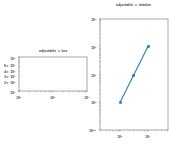

In [418]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=============
Loglog Aspect
=============

"""
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlim(1e1, 1e3)
ax1.set_ylim(1e2, 1e3)
ax1.set_aspect(1)
ax1.set_title("adjustable = box")

ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_adjustable("datalim")
ax2.plot([1, 3, 10], [1, 9, 100], "o-")
ax2.set_xlim(1e-1, 1e2)
ax2.set_ylim(1e-1, 1e3)
ax2.set_aspect(1)
ax2.set_title("adjustable = datalim")

plt.show()


In [419]:
# THIS __name__ EXAMPLE WAS REMOVED

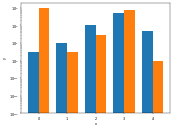

In [420]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=======
Log Bar
=======

Plotting a bar chart with a logarithmic y-axis.
"""
import matplotlib.pyplot as plt
import numpy as np

data = ((3, 1000), (10, 3), (100, 30), (500, 800), (50, 1))

dim = len(data[0])
w = 0.75
dimw = w / dim

fig, ax = plt.subplots()
x = np.arange(len(data))
for i in range(len(data[0])):
    y = [d[i] for d in data]
    b = ax.bar(x + i * dimw, y, dimw, bottom=0.001)

ax.set_xticks(x + dimw / 2, labels=map(str, x))
ax.set_yscale('log')

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()


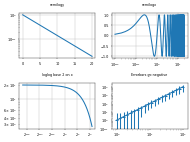

In [421]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
========
Log Demo
========

Examples of plots with logarithmic axes.
"""

import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.01, 20.0, 0.01)

# Create figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

# log y axis
ax1.semilogy(t, np.exp(-t / 5.0))
ax1.set(title='semilogy')
ax1.grid()

# log x axis
ax2.semilogx(t, np.sin(2 * np.pi * t))
ax2.set(title='semilogx')
ax2.grid()

# log x and y axis
ax3.loglog(t, 20 * np.exp(-t / 10.0))
ax3.set_xscale('log', base=2)
ax3.set(title='loglog base 2 on x')
ax3.grid()

# With errorbars: clip non-positive values
# Use new data for plotting
x = 10.0**np.linspace(0.0, 2.0, 20)
y = x**2.0

ax4.set_xscale("log", nonpositive='clip')
ax4.set_yscale("log", nonpositive='clip')
ax4.set(title='Errorbars go negative')
ax4.errorbar(x, y, xerr=0.1 * x, yerr=5.0 + 0.75 * y)
# ylim must be set after errorbar to allow errorbar to autoscale limits
ax4.set_ylim(bottom=0.1)

fig.tight_layout()
plt.show()


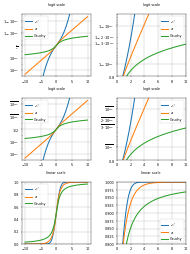

In [422]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
================
Logit Demo
================

Examples of plots with logit axes.
"""

import math

import matplotlib.pyplot as plt
import numpy as np

xmax = 10
x = np.linspace(-xmax, xmax, 10000)
cdf_norm = [math.erf(w / np.sqrt(2)) / 2 + 1 / 2 for w in x]
cdf_laplacian = np.where(x < 0, 1 / 2 * np.exp(x), 1 - 1 / 2 * np.exp(-x))
cdf_cauchy = np.arctan(x) / np.pi + 1 / 2

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(6.4, 8.5))

# Common part, for the example, we will do the same plots on all graphs
for i in range(3):
    for j in range(2):
        axs[i, j].plot(x, cdf_norm, label=r"$\mathcal{N}$")
        axs[i, j].plot(x, cdf_laplacian, label=r"$\mathcal{L}$")
        axs[i, j].plot(x, cdf_cauchy, label="Cauchy")
        axs[i, j].legend()
        axs[i, j].grid()

# First line, logitscale, with standard notation
axs[0, 0].set(title="logit scale")
axs[0, 0].set_yscale("logit")
axs[0, 0].set_ylim(1e-5, 1 - 1e-5)

axs[0, 1].set(title="logit scale")
axs[0, 1].set_yscale("logit")
axs[0, 1].set_xlim(0, xmax)
axs[0, 1].set_ylim(0.8, 1 - 5e-3)

# Second line, logitscale, with survival notation (with `use_overline`), and
# other format display 1/2
axs[1, 0].set(title="logit scale")
axs[1, 0].set_yscale("logit", one_half="1/2", use_overline=True)
axs[1, 0].set_ylim(1e-5, 1 - 1e-5)

axs[1, 1].set(title="logit scale")
axs[1, 1].set_yscale("logit", one_half="1/2", use_overline=True)
axs[1, 1].set_xlim(0, xmax)
axs[1, 1].set_ylim(0.8, 1 - 5e-3)

# Third line, linear scale
axs[2, 0].set(title="linear scale")
axs[2, 0].set_ylim(0, 1)

axs[2, 1].set(title="linear scale")
axs[2, 1].set_xlim(0, xmax)
axs[2, 1].set_ylim(0.8, 1)

fig.tight_layout()
plt.show()


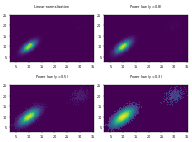

In [423]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
========================
Exploring normalizations
========================

Various normalization on a multivariate normal distribution.

"""

import matplotlib.pyplot as plt
import numpy as np
from numpy.random import multivariate_normal

import matplotlib.colors as mcolors

# Fixing random state for reproducibility.
np.random.seed(19680801)

data = np.vstack([
    multivariate_normal([10, 10], [[3, 2], [2, 3]], size=100000),
    multivariate_normal([30, 20], [[3, 1], [1, 3]], size=1000)
])

gammas = [0.8, 0.5, 0.3]

fig, axs = plt.subplots(nrows=2, ncols=2)

axs[0, 0].set_title('Linear normalization')
axs[0, 0].hist2d(data[:, 0], data[:, 1], bins=100)

for ax, gamma in zip(axs.flat[1:], gammas):
    ax.set_title(r'Power law $(\gamma=%1.1f)$' % gamma)
    ax.hist2d(data[:, 0], data[:, 1], bins=100, norm=mcolors.PowerNorm(gamma))

fig.tight_layout()

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.colors`
#    - `matplotlib.colors.PowerNorm`
#    - `matplotlib.axes.Axes.hist2d`
#    - `matplotlib.pyplot.hist2d`


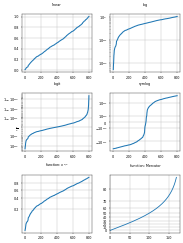

In [424]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
======
Scales
======

Illustrate the scale transformations applied to axes, e.g. log, symlog, logit.

The last two examples are examples of using the ``'function'`` scale by
supplying forward and inverse functions for the scale transformation.
"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.ticker import FixedLocator, NullFormatter

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
fig, axs = plt.subplots(3, 2, figsize=(6, 8), layout='constrained')

# linear
ax = axs[0, 0]
ax.plot(x, y)
ax.set_yscale('linear')
ax.set_title('linear')
ax.grid(True)


# log
ax = axs[0, 1]
ax.plot(x, y)
ax.set_yscale('log')
ax.set_title('log')
ax.grid(True)


# symmetric log
ax = axs[1, 1]
ax.plot(x, y - y.mean())
ax.set_yscale('symlog', linthresh=0.02)
ax.set_title('symlog')
ax.grid(True)

# logit
ax = axs[1, 0]
ax.plot(x, y)
ax.set_yscale('logit')
ax.set_title('logit')
ax.grid(True)


# Function x**(1/2)
def forward(x):
    return x**(1/2)


def inverse(x):
    return x**2


ax = axs[2, 0]
ax.plot(x, y)
ax.set_yscale('function', functions=(forward, inverse))
ax.set_title('function: $x^{1/2}$')
ax.grid(True)
ax.yaxis.set_major_locator(FixedLocator(np.arange(0, 1, 0.2)**2))
ax.yaxis.set_major_locator(FixedLocator(np.arange(0, 1, 0.2)))


# Function Mercator transform
def forward(a):
    a = np.deg2rad(a)
    return np.rad2deg(np.log(np.abs(np.tan(a) + 1.0 / np.cos(a))))


def inverse(a):
    a = np.deg2rad(a)
    return np.rad2deg(np.arctan(np.sinh(a)))

ax = axs[2, 1]

t = np.arange(0, 170.0, 0.1)
s = t / 2.

ax.plot(t, s, '-', lw=2)

ax.set_yscale('function', functions=(forward, inverse))
ax.set_title('function: Mercator')
ax.grid(True)
ax.set_xlim([0, 180])
ax.yaxis.set_minor_formatter(NullFormatter())
ax.yaxis.set_major_locator(FixedLocator(np.arange(0, 90, 10)))

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.set_xscale`
#    - `matplotlib.axes.Axes.set_yscale`
#    - `matplotlib.axis.Axis.set_major_locator`
#    - `matplotlib.scale.LinearScale`
#    - `matplotlib.scale.LogScale`
#    - `matplotlib.scale.SymmetricalLogScale`
#    - `matplotlib.scale.LogitScale`
#    - `matplotlib.scale.FuncScale`


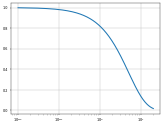

In [425]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
========
Log Axis
========

.. redirect-from:: /gallery/scales/log_test

This is an example of assigning a log-scale for the x-axis using
`~.axes.Axes.semilogx`.
"""

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

dt = 0.01
t = np.arange(dt, 20.0, dt)

ax.semilogx(t, np.exp(-t / 5.0))
ax.grid()

plt.show()


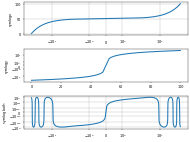

In [426]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===========
Symlog Demo
===========

Example use of symlog (symmetric log) axis scaling.
"""
import matplotlib.pyplot as plt
import numpy as np

dt = 0.01
x = np.arange(-50.0, 50.0, dt)
y = np.arange(0, 100.0, dt)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3)

ax0.plot(x, y)
ax0.set_xscale('symlog')
ax0.set_ylabel('symlogx')
ax0.grid()
ax0.xaxis.grid(which='minor')  # minor grid on too

ax1.plot(y, x)
ax1.set_yscale('symlog')
ax1.set_ylabel('symlogy')

ax2.plot(x, np.sin(x / 3.0))
ax2.set_xscale('symlog')
ax2.set_yscale('symlog', linthresh=0.015)
ax2.grid()
ax2.set_ylabel('symlog both')

fig.tight_layout()
plt.show()

# %%
# It should be noted that the coordinate transform used by ``symlog``
# has a discontinuous gradient at the transition between its linear
# and logarithmic regions. The ``asinh`` axis scale is an alternative
# technique that may avoid visual artifacts caused by these discontinuities.

# %%
#
# .. admonition:: References
#
#    - `matplotlib.scale.SymmetricalLogScale`
#    - `matplotlib.ticker.SymmetricalLogLocator`
#    - `matplotlib.scale.AsinhScale`


In [427]:
ChapterConfig.set_chapter_name("19specialty_plots")

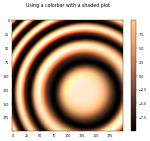

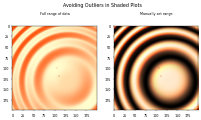

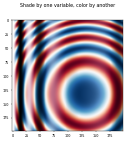

In [428]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===========
Hillshading
===========

Demonstrates a few common tricks with shaded plots.
"""
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import LightSource, Normalize


def display_colorbar():
    """Display a correct numeric colorbar for a shaded plot."""
    y, x = np.mgrid[-4:2:200j, -4:2:200j]
    z = 10 * np.cos(x**2 + y**2)

    cmap = plt.cm.copper
    ls = LightSource(315, 45)
    rgb = ls.shade(z, cmap)

    fig, ax = plt.subplots()
    ax.imshow(rgb, interpolation='bilinear')

    # Use a proxy artist for the colorbar...
    im = ax.imshow(z, cmap=cmap)
    im.remove()
    fig.colorbar(im, ax=ax)

    ax.set_title('Using a colorbar with a shaded plot', size='x-large')


def avoid_outliers():
    """Use a custom norm to control the displayed z-range of a shaded plot."""
    y, x = np.mgrid[-4:2:200j, -4:2:200j]
    z = 10 * np.cos(x**2 + y**2)

    # Add some outliers...
    z[100, 105] = 2000
    z[120, 110] = -9000

    ls = LightSource(315, 45)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4.5))

    rgb = ls.shade(z, plt.cm.copper)
    ax1.imshow(rgb, interpolation='bilinear')
    ax1.set_title('Full range of data')

    rgb = ls.shade(z, plt.cm.copper, vmin=-10, vmax=10)
    ax2.imshow(rgb, interpolation='bilinear')
    ax2.set_title('Manually set range')

    fig.suptitle('Avoiding Outliers in Shaded Plots', size='x-large')


def shade_other_data():
    """Demonstrates displaying different variables through shade and color."""
    y, x = np.mgrid[-4:2:200j, -4:2:200j]
    z1 = np.sin(x**2)  # Data to hillshade
    z2 = np.cos(x**2 + y**2)  # Data to color

    norm = Normalize(z2.min(), z2.max())
    cmap = plt.cm.RdBu

    ls = LightSource(315, 45)
    rgb = ls.shade_rgb(cmap(norm(z2)), z1)

    fig, ax = plt.subplots()
    ax.imshow(rgb, interpolation='bilinear')
    ax.set_title('Shade by one variable, color by another', size='x-large')

display_colorbar()
avoid_outliers()
shade_other_data()
plt.show()


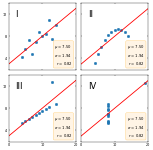

In [429]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==================
Anscombe's quartet
==================

`Anscombe's quartet`_ is a group of datasets (x, y) that have the same mean,
standard deviation, and regression line, but which are qualitatively different.

It is often used to illustrate the importance of looking at a set of data
graphically and not only relying on basic statistic properties.

.. _Anscombe's quartet: https://en.wikipedia.org/wiki/Anscombe%27s_quartet
"""

import matplotlib.pyplot as plt
import numpy as np

x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)  # slope, intercept
    ax.axline(xy1=(0, p0), slope=p1, color='r', lw=2)

    # add text box for the statistics
    stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
             f'$\\sigma$ = {np.std(y):.2f}\n'
             f'$r$ = {np.corrcoef(x, y)[0][1]:.2f}')
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    ax.text(0.95, 0.07, stats, fontsize=9, bbox=bbox,
            transform=ax.transAxes, horizontalalignment='right')

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axes.Axes.axline` / `matplotlib.pyplot.axline`
#    - `matplotlib.axes.Axes.text` / `matplotlib.pyplot.text`
#    - `matplotlib.axes.Axes.tick_params` / matplotlib.pyplot.tick_params`


In [430]:
# THIS __name__ EXAMPLE WAS REMOVED

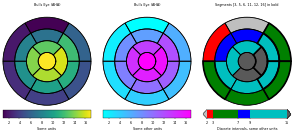

In [431]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=======================
Left ventricle bullseye
=======================

This example demonstrates how to create the 17 segment model for the left
ventricle recommended by the American Heart Association (AHA).

.. redirect-from:: /gallery/specialty_plots/leftventricle_bulleye

See also the :doc:`/gallery/pie_and_polar_charts/nested_pie` example.
"""

import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl


def bullseye_plot(ax, data, seg_bold=None, cmap="viridis", norm=None):
    """
    Bullseye representation for the left ventricle.

    Parameters
    ----------
    ax : axes
    data : list[float]
        The intensity values for each of the 17 segments.
    seg_bold : list[int], optional
        A list with the segments to highlight.
    cmap : colormap, default: "viridis"
        Colormap for the data.
    norm : Normalize or None, optional
        Normalizer for the data.

    Notes
    -----
    This function creates the 17 segment model for the left ventricle according
    to the American Heart Association (AHA) [1]_

    References
    ----------
    .. [1] M. D. Cerqueira, N. J. Weissman, V. Dilsizian, A. K. Jacobs,
        S. Kaul, W. K. Laskey, D. J. Pennell, J. A. Rumberger, T. Ryan,
        and M. S. Verani, "Standardized myocardial segmentation and
        nomenclature for tomographic imaging of the heart",
        Circulation, vol. 105, no. 4, pp. 539-542, 2002.
    """

    data = np.ravel(data)
    if seg_bold is None:
        seg_bold = []
    if norm is None:
        norm = mpl.colors.Normalize(vmin=data.min(), vmax=data.max())

    r = np.linspace(0.2, 1, 4)

    ax.set(ylim=[0, 1], xticklabels=[], yticklabels=[])
    ax.grid(False)  # Remove grid

    # Fill segments 1-6, 7-12, 13-16.
    for start, stop, r_in, r_out in [
            (0, 6, r[2], r[3]),
            (6, 12, r[1], r[2]),
            (12, 16, r[0], r[1]),
            (16, 17, 0, r[0]),
    ]:
        n = stop - start
        dtheta = 2*np.pi / n
        ax.bar(np.arange(n) * dtheta + np.pi/2, r_out - r_in, dtheta, r_in,
               color=cmap(norm(data[start:stop])))

    # Now, draw the segment borders.  In order for the outer bold borders not
    # to be covered by inner segments, the borders are all drawn separately
    # after the segments have all been filled.  We also disable clipping, which
    # would otherwise affect the outermost segment edges.
    # Draw edges of segments 1-6, 7-12, 13-16.
    for start, stop, r_in, r_out in [
            (0, 6, r[2], r[3]),
            (6, 12, r[1], r[2]),
            (12, 16, r[0], r[1]),
    ]:
        n = stop - start
        dtheta = 2*np.pi / n
        ax.bar(np.arange(n) * dtheta + np.pi/2, r_out - r_in, dtheta, r_in,
               clip_on=False, color="none", edgecolor="k", linewidth=[
                   4 if i + 1 in seg_bold else 2 for i in range(start, stop)])
    # Draw edge of segment 17 -- here; the edge needs to be drawn differently,
    # using plot().
    ax.plot(np.linspace(0, 2*np.pi), np.linspace(r[0], r[0]), "k",
            linewidth=(4 if 17 in seg_bold else 2))


# Create the fake data
data = np.arange(17) + 1


# Make a figure and axes with dimensions as desired.
fig = plt.figure(figsize=(10, 5), layout="constrained")
fig.get_layout_engine().set(wspace=.1, w_pad=.2)
axs = fig.subplots(1, 3, subplot_kw=dict(projection='polar'))
fig.canvas.manager.set_window_title('Left Ventricle Bulls Eyes (AHA)')


# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=1, vmax=17)
# Create an empty ScalarMappable to set the colorbar's colormap and norm.
# The following gives a basic continuous colorbar with ticks and labels.
fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
             cax=axs[0].inset_axes([0, -.15, 1, .1]),
             orientation='horizontal', label='Some units')


# And again for the second colorbar.
cmap2 = mpl.cm.cool
norm2 = mpl.colors.Normalize(vmin=1, vmax=17)
fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap2, norm=norm2),
             cax=axs[1].inset_axes([0, -.15, 1, .1]),
             orientation='horizontal', label='Some other units')


# The second example illustrates the use of a ListedColormap, a
# BoundaryNorm, and extended ends to show the "over" and "under"
# value colors.
cmap3 = (mpl.colors.ListedColormap(['r', 'g', 'b', 'c'])
         .with_extremes(over='0.35', under='0.75'))
# If a ListedColormap is used, the length of the bounds array must be
# one greater than the length of the color list.  The bounds must be
# monotonically increasing.
bounds = [2, 3, 7, 9, 15]
norm3 = mpl.colors.BoundaryNorm(bounds, cmap3.N)
fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap3, norm=norm3),
             cax=axs[2].inset_axes([0, -.15, 1, .1]),
             extend='both',
             ticks=bounds,  # optional
             spacing='proportional',
             orientation='horizontal',
             label='Discrete intervals, some other units')


# Create the 17 segment model
bullseye_plot(axs[0], data, cmap=cmap, norm=norm)
axs[0].set_title('Bulls Eye (AHA)')

bullseye_plot(axs[1], data, cmap=cmap2, norm=norm2)
axs[1].set_title('Bulls Eye (AHA)')

bullseye_plot(axs[2], data, seg_bold=[3, 5, 6, 11, 12, 16],
              cmap=cmap3, norm=norm3)
axs[2].set_title('Segments [3, 5, 6, 11, 12, 16] in bold')

plt.show()


In [432]:
# THIS cbook EXAMPLE WAS REMOVED

In [433]:
# THIS cbook EXAMPLE WAS REMOVED

In [434]:
# THIS __name__ EXAMPLE WAS REMOVED

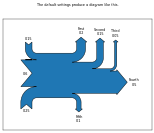

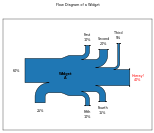

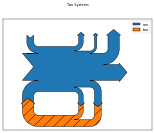

In [435]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
================
The Sankey class
================

Demonstrate the Sankey class by producing three basic diagrams.
"""

import matplotlib.pyplot as plt

from matplotlib.sankey import Sankey

# %%
# Example 1 -- Mostly defaults
#
# This demonstrates how to create a simple diagram by implicitly calling the
# Sankey.add() method and by appending finish() to the call to the class.

Sankey(flows=[0.25, 0.15, 0.60, -0.20, -0.15, -0.05, -0.50, -0.10],
       labels=['', '', '', 'First', 'Second', 'Third', 'Fourth', 'Fifth'],
       orientations=[-1, 1, 0, 1, 1, 1, 0, -1]).finish()
plt.title("The default settings produce a diagram like this.")

# %%
# Notice:
#
# 1. Axes weren't provided when Sankey() was instantiated, so they were
#    created automatically.
# 2. The scale argument wasn't necessary since the data was already
#    normalized.
# 3. By default, the lengths of the paths are justified.


# %%
# Example 2
#
# This demonstrates:
#
# 1. Setting one path longer than the others
# 2. Placing a label in the middle of the diagram
# 3. Using the scale argument to normalize the flows
# 4. Implicitly passing keyword arguments to PathPatch()
# 5. Changing the angle of the arrow heads
# 6. Changing the offset between the tips of the paths and their labels
# 7. Formatting the numbers in the path labels and the associated unit
# 8. Changing the appearance of the patch and the labels after the figure is
#    created

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
                     title="Flow Diagram of a Widget")
sankey = Sankey(ax=ax, scale=0.01, offset=0.2, head_angle=180,
                format='%.0f', unit='%')
sankey.add(flows=[25, 0, 60, -10, -20, -5, -15, -10, -40],
           labels=['', '', '', 'First', 'Second', 'Third', 'Fourth',
                   'Fifth', 'Hurray!'],
           orientations=[-1, 1, 0, 1, 1, 1, -1, -1, 0],
           pathlengths=[0.25, 0.25, 0.25, 0.25, 0.25, 0.6, 0.25, 0.25,
                        0.25],
           patchlabel="Widget\nA")  # Arguments to matplotlib.patches.PathPatch
diagrams = sankey.finish()
diagrams[0].texts[-1].set_color('r')
diagrams[0].text.set_fontweight('bold')

# %%
# Notice:
#
# 1. Since the sum of the flows is nonzero, the width of the trunk isn't
#    uniform.  The matplotlib logging system logs this at the DEBUG level.
# 2. The second flow doesn't appear because its value is zero.  Again, this is
#    logged at the DEBUG level.


# %%
# Example 3
#
# This demonstrates:
#
# 1. Connecting two systems
# 2. Turning off the labels of the quantities
# 3. Adding a legend

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[], title="Two Systems")
flows = [0.25, 0.15, 0.60, -0.10, -0.05, -0.25, -0.15, -0.10, -0.35]
sankey = Sankey(ax=ax, unit=None)
sankey.add(flows=flows, label='one',
           orientations=[-1, 1, 0, 1, 1, 1, -1, -1, 0])
sankey.add(flows=[-0.25, 0.15, 0.1], label='two',
           orientations=[-1, -1, -1], prior=0, connect=(0, 0))
diagrams = sankey.finish()
diagrams[-1].patch.set_hatch('/')
plt.legend()

# %%
# Notice that only one connection is specified, but the systems form a
# circuit since: (1) the lengths of the paths are justified and (2) the
# orientation and ordering of the flows is mirrored.

plt.show()


# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.sankey`
#    - `matplotlib.sankey.Sankey`
#    - `matplotlib.sankey.Sankey.add`
#    - `matplotlib.sankey.Sankey.finish`


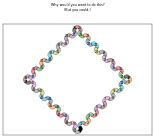

In [436]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
======================================
Long chain of connections using Sankey
======================================

Demonstrate/test the Sankey class by producing a long chain of connections.
"""

import matplotlib.pyplot as plt

from matplotlib.sankey import Sankey

links_per_side = 6


def side(sankey, n=1):
    """Generate a side chain."""
    prior = len(sankey.diagrams)
    for i in range(0, 2*n, 2):
        sankey.add(flows=[1, -1], orientations=[-1, -1],
                   patchlabel=str(prior + i),
                   prior=prior + i - 1, connect=(1, 0), alpha=0.5)
        sankey.add(flows=[1, -1], orientations=[1, 1],
                   patchlabel=str(prior + i + 1),
                   prior=prior + i, connect=(1, 0), alpha=0.5)


def corner(sankey):
    """Generate a corner link."""
    prior = len(sankey.diagrams)
    sankey.add(flows=[1, -1], orientations=[0, 1],
               patchlabel=str(prior), facecolor='k',
               prior=prior - 1, connect=(1, 0), alpha=0.5)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
                     title="Why would you want to do this?\n(But you could.)")
sankey = Sankey(ax=ax, unit=None)
sankey.add(flows=[1, -1], orientations=[0, 1],
           patchlabel="0", facecolor='k',
           rotation=45)
side(sankey, n=links_per_side)
corner(sankey)
side(sankey, n=links_per_side)
corner(sankey)
side(sankey, n=links_per_side)
corner(sankey)
side(sankey, n=links_per_side)
sankey.finish()
# Notice:
# 1. The alignment doesn't drift significantly (if at all; with 16007
#    subdiagrams there is still closure).
# 2. The first diagram is rotated 45 deg, so all other diagrams are rotated
#    accordingly.

plt.show()


# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.sankey`
#    - `matplotlib.sankey.Sankey`
#    - `matplotlib.sankey.Sankey.add`
#    - `matplotlib.sankey.Sankey.finish`


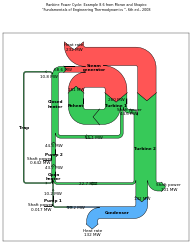

In [437]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===================
Rankine power cycle
===================

Demonstrate the Sankey class with a practical example of a Rankine power cycle.
"""

import matplotlib.pyplot as plt

from matplotlib.sankey import Sankey

fig = plt.figure(figsize=(8, 9))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
                     title="Rankine Power Cycle: Example 8.6 from Moran and "
                     "Shapiro\n\x22Fundamentals of Engineering Thermodynamics "
                     "\x22, 6th ed., 2008")
Hdot = [260.431, 35.078, 180.794, 221.115, 22.700,
        142.361, 10.193, 10.210, 43.670, 44.312,
        68.631, 10.758, 10.758, 0.017, 0.642,
        232.121, 44.559, 100.613, 132.168]  # MW
sankey = Sankey(ax=ax, format='%.3G', unit=' MW', gap=0.5, scale=1.0/Hdot[0])
sankey.add(patchlabel='\n\nPump 1', rotation=90, facecolor='#37c959',
           flows=[Hdot[13], Hdot[6], -Hdot[7]],
           labels=['Shaft power', '', None],
           pathlengths=[0.4, 0.883, 0.25],
           orientations=[1, -1, 0])
sankey.add(patchlabel='\n\nOpen\nheater', facecolor='#37c959',
           flows=[Hdot[11], Hdot[7], Hdot[4], -Hdot[8]],
           labels=[None, '', None, None],
           pathlengths=[0.25, 0.25, 1.93, 0.25],
           orientations=[1, 0, -1, 0], prior=0, connect=(2, 1))
sankey.add(patchlabel='\n\nPump 2', facecolor='#37c959',
           flows=[Hdot[14], Hdot[8], -Hdot[9]],
           labels=['Shaft power', '', None],
           pathlengths=[0.4, 0.25, 0.25],
           orientations=[1, 0, 0], prior=1, connect=(3, 1))
sankey.add(patchlabel='Closed\nheater', trunklength=2.914, fc='#37c959',
           flows=[Hdot[9], Hdot[1], -Hdot[11], -Hdot[10]],
           pathlengths=[0.25, 1.543, 0.25, 0.25],
           labels=['', '', None, None],
           orientations=[0, -1, 1, -1], prior=2, connect=(2, 0))
sankey.add(patchlabel='Trap', facecolor='#37c959', trunklength=5.102,
           flows=[Hdot[11], -Hdot[12]],
           labels=['\n', None],
           pathlengths=[1.0, 1.01],
           orientations=[1, 1], prior=3, connect=(2, 0))
sankey.add(patchlabel='Steam\ngenerator', facecolor='#ff5555',
           flows=[Hdot[15], Hdot[10], Hdot[2], -Hdot[3], -Hdot[0]],
           labels=['Heat rate', '', '', None, None],
           pathlengths=0.25,
           orientations=[1, 0, -1, -1, -1], prior=3, connect=(3, 1))
sankey.add(patchlabel='\n\n\nTurbine 1', facecolor='#37c959',
           flows=[Hdot[0], -Hdot[16], -Hdot[1], -Hdot[2]],
           labels=['', None, None, None],
           pathlengths=[0.25, 0.153, 1.543, 0.25],
           orientations=[0, 1, -1, -1], prior=5, connect=(4, 0))
sankey.add(patchlabel='\n\n\nReheat', facecolor='#37c959',
           flows=[Hdot[2], -Hdot[2]],
           labels=[None, None],
           pathlengths=[0.725, 0.25],
           orientations=[-1, 0], prior=6, connect=(3, 0))
sankey.add(patchlabel='Turbine 2', trunklength=3.212, facecolor='#37c959',
           flows=[Hdot[3], Hdot[16], -Hdot[5], -Hdot[4], -Hdot[17]],
           labels=[None, 'Shaft power', None, '', 'Shaft power'],
           pathlengths=[0.751, 0.15, 0.25, 1.93, 0.25],
           orientations=[0, -1, 0, -1, 1], prior=6, connect=(1, 1))
sankey.add(patchlabel='Condenser', facecolor='#58b1fa', trunklength=1.764,
           flows=[Hdot[5], -Hdot[18], -Hdot[6]],
           labels=['', 'Heat rate', None],
           pathlengths=[0.45, 0.25, 0.883],
           orientations=[-1, 1, 0], prior=8, connect=(2, 0))
diagrams = sankey.finish()
for diagram in diagrams:
    diagram.text.set_fontweight('bold')
    diagram.text.set_fontsize('10')
    for text in diagram.texts:
        text.set_fontsize('10')
# Notice that the explicit connections are handled automatically, but the
# implicit ones currently are not.  The lengths of the paths and the trunks
# must be adjusted manually, and that is a bit tricky.

plt.show()


# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.sankey`
#    - `matplotlib.sankey.Sankey`
#    - `matplotlib.sankey.Sankey.add`
#    - `matplotlib.sankey.Sankey.finish`


In [438]:
# THIS __name__ EXAMPLE WAS REMOVED

In [439]:
# THIS dem EXAMPLE WAS REMOVED

In [440]:
ChapterConfig.set_chapter_name("20spines")

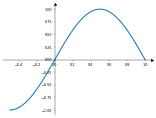

In [441]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===========================
Centered spines with arrows
===========================

This example shows a way to draw a "math textbook" style plot, where the
spines ("axes lines") are drawn at ``x = 0`` and ``y = 0``, and have arrows at
their ends.
"""

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
# Move the left and bottom spines to x = 0 and y = 0, respectively.
ax.spines[["left", "bottom"]].set_position(("data", 0))
# Hide the top and right spines.
ax.spines[["top", "right"]].set_visible(False)

# Draw arrows (as black triangles: ">k"/"^k") at the end of the axes.  In each
# case, one of the coordinates (0) is a data coordinate (i.e., y = 0 or x = 0,
# respectively) and the other one (1) is an axes coordinate (i.e., at the very
# right/top of the axes).  Also, disable clipping (clip_on=False) as the marker
# actually spills out of the axes.
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

# Some sample data.
x = np.linspace(-0.5, 1., 100)
ax.plot(x, np.sin(x*np.pi))

plt.show()


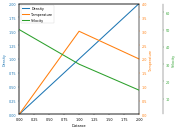

In [442]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
r"""
===========================
Multiple y-axis with Spines
===========================

Create multiple y axes with a shared x-axis. This is done by creating
a `~.axes.Axes.twinx` axes, turning all spines but the right one invisible
and offset its position using `~.spines.Spine.set_position`.

Note that this approach uses `matplotlib.axes.Axes` and their
`~matplotlib.spines.Spine`\s.  Alternative approaches using non-standard axes
are shown in the :doc:`/gallery/axisartist/demo_parasite_axes` and
:doc:`/gallery/axisartist/demo_parasite_axes2` examples.
"""

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin2.spines.right.set_position(("axes", 1.2))

p1, = ax.plot([0, 1, 2], [0, 1, 2], "C0", label="Density")
p2, = twin1.plot([0, 1, 2], [0, 3, 2], "C1", label="Temperature")
p3, = twin2.plot([0, 1, 2], [50, 30, 15], "C2", label="Velocity")

ax.set(xlim=(0, 2), ylim=(0, 2), xlabel="Distance", ylabel="Density")
twin1.set(ylim=(0, 4), ylabel="Temperature")
twin2.set(ylim=(1, 65), ylabel="Velocity")

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())

ax.tick_params(axis='y', colors=p1.get_color())
twin1.tick_params(axis='y', colors=p2.get_color())
twin2.tick_params(axis='y', colors=p3.get_color())

ax.legend(handles=[p1, p2, p3])

plt.show()


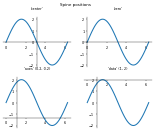

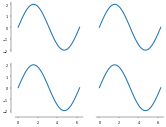

In [443]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===============
Spine placement
===============

The position of the axis spines can be influenced using `~.Spine.set_position`.

Note: If you want to obtain arrow heads at the ends of the axes, also check
out the :doc:`/gallery/spines/centered_spines_with_arrows` example.
"""
import matplotlib.pyplot as plt
import numpy as np

# %%

x = np.linspace(0, 2*np.pi, 100)
y = 2 * np.sin(x)

fig, ax_dict = plt.subplot_mosaic(
    [['center', 'zero'],
     ['axes', 'data']]
)
fig.suptitle('Spine positions')


ax = ax_dict['center']
ax.set_title("'center'")
ax.plot(x, y)
ax.spines[['left', 'bottom']].set_position('center')
ax.spines[['top', 'right']].set_visible(False)

ax = ax_dict['zero']
ax.set_title("'zero'")
ax.plot(x, y)
ax.spines[['left', 'bottom']].set_position('zero')
ax.spines[['top', 'right']].set_visible(False)

ax = ax_dict['axes']
ax.set_title("'axes' (0.2, 0.2)")
ax.plot(x, y)
ax.spines.left.set_position(('axes', 0.2))
ax.spines.bottom.set_position(('axes', 0.2))
ax.spines[['top', 'right']].set_visible(False)

ax = ax_dict['data']
ax.set_title("'data' (1, 2)")
ax.plot(x, y)
ax.spines.left.set_position(('data', 1))
ax.spines.bottom.set_position(('data', 2))
ax.spines[['top', 'right']].set_visible(False)

# %%
# Define a method that adjusts the location of the axis spines


def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))  # outward by 10 points
        else:
            spine.set_color('none')  # don't draw spine

    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        # no yaxis ticks
        ax.yaxis.set_ticks([])

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
        # no xaxis ticks
        ax.xaxis.set_ticks([])


# %%
# Create another figure using our new ``adjust_spines`` method

fig = plt.figure()

x = np.linspace(0, 2 * np.pi, 100)
y = 2 * np.sin(x)

ax = fig.add_subplot(2, 2, 1)
ax.plot(x, y, clip_on=False)
adjust_spines(ax, ['left'])

ax = fig.add_subplot(2, 2, 2)
ax.plot(x, y, clip_on=False)
adjust_spines(ax, [])

ax = fig.add_subplot(2, 2, 3)
ax.plot(x, y, clip_on=False)
adjust_spines(ax, ['left', 'bottom'])

ax = fig.add_subplot(2, 2, 4)
ax.plot(x, y, clip_on=False)
adjust_spines(ax, ['bottom'])

plt.show()


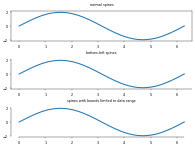

In [444]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
======
Spines
======

This demo compares:

- normal Axes, with spines on all four sides;
- an Axes with spines only on the left and bottom;
- an Axes using custom bounds to limit the extent of the spine.

Each `.axes.Axes` has a list of `.Spine` objects, accessible
via the container ``ax.spines``.

.. redirect-from:: /gallery/spines/spines_bounds

"""
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2 * np.pi, 100)
y = 2 * np.sin(x)

# Constrained layout makes sure the labels don't overlap the axes.
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, layout='constrained')

ax0.plot(x, y)
ax0.set_title('normal spines')

ax1.plot(x, y)
ax1.set_title('bottom-left spines')

# Hide the right and top spines
ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)

ax2.plot(x, y)
ax2.set_title('spines with bounds limited to data range')

# Only draw spines for the data range, not in the margins
ax2.spines.bottom.set_bounds(x.min(), x.max())
ax2.spines.left.set_bounds(y.min(), y.max())
# Hide the right and top spines
ax2.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)

plt.show()

# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.spines.Spine.set_visible`
#    - `matplotlib.spines.Spine.set_bounds`


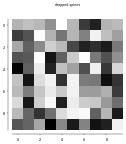

In [445]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==============
Dropped spines
==============

Demo of spines offset from the axes (a.k.a. "dropped spines").
"""
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()

image = np.random.uniform(size=(10, 10))
ax.imshow(image, cmap=plt.cm.gray)
ax.set_title('dropped spines')

# Move left and bottom spines outward by 10 points
ax.spines[['left', 'bottom']].set_position(('outward', 10))
# Hide the right and top spines
ax.spines[['top', 'right']].set_visible(False)

plt.show()


In [446]:
ChapterConfig.set_chapter_name("21ticks")

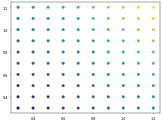

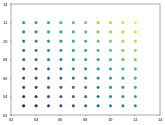

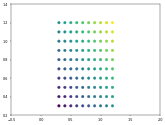

In [447]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
====================================
Automatically setting tick positions
====================================

Setting the behavior of tick auto-placement.

By default, Matplotlib will choose the number of ticks and tick positions so
that there is a reasonable number of ticks on the axis and they are located
at "round" numbers.

As a result, there may be no ticks on the edges of the plot.
"""

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)

fig, ax = plt.subplots()
dots = np.linspace(0.3, 1.2, 10)
X, Y = np.meshgrid(dots, dots)
x, y = X.ravel(), Y.ravel()
ax.scatter(x, y, c=x+y)
plt.show()

# %%
# If you want to keep ticks at round numbers, and also have ticks at the edges
# you can switch :rc:`axes.autolimit_mode` to 'round_numbers'. This expands the
# axis limits to the next round number.

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'

# Note: The limits are calculated at draw-time. Therefore, when using
# :rc:`axes.autolimit_mode` in a context manager, it is important that
# the ``show()`` command is within the context.

fig, ax = plt.subplots()
ax.scatter(x, y, c=x+y)
plt.show()

# %%
# The round numbers autolimit_mode is still respected if you set an additional
# margin around the data using `.Axes.set_xmargin` / `.Axes.set_ymargin`:

fig, ax = plt.subplots()
ax.scatter(x, y, c=x+y)
ax.set_xmargin(0.8)
plt.show()


In [448]:
# THIS cbook EXAMPLE WAS REMOVED

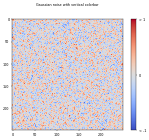

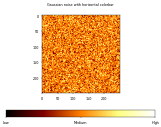

In [449]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=======================
Colorbar Tick Labelling
=======================

Produce custom labelling for a colorbar.

Contributed by Scott Sinclair
"""

import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randn

from matplotlib import cm

# Fixing random state for reproducibility
np.random.seed(19680801)

# %%
# Make plot with vertical (default) colorbar

fig, ax = plt.subplots()

data = np.clip(randn(250, 250), -1, 1)

cax = ax.imshow(data, cmap=cm.coolwarm)
ax.set_title('Gaussian noise with vertical colorbar')

# Add colorbar, make sure to specify tick locations to match desired ticklabels
cbar = fig.colorbar(cax, ticks=[-1, 0, 1])
cbar.ax.set_yticklabels(['< -1', '0', '> 1'])  # vertically oriented colorbar

# %%
# Make plot with horizontal colorbar

fig, ax = plt.subplots()

data = np.clip(randn(250, 250), -1, 1)

cax = ax.imshow(data, cmap=cm.afmhot)
ax.set_title('Gaussian noise with horizontal colorbar')

cbar = fig.colorbar(cax, ticks=[-1, 0, 1], orientation='horizontal')
cbar.ax.set_xticklabels(['Low', 'Medium', 'High'])  # horizontal colorbar

plt.show()


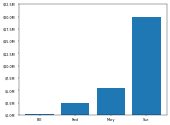

In [450]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=============
Custom Ticker
=============

The :mod:`matplotlib.ticker` module defines many preset tickers, but was
primarily designed for extensibility, i.e., to support user customized ticking.

In this example, a user defined function is used to format the ticks in
millions of dollars on the y-axis.
"""

import matplotlib.pyplot as plt


def millions(x, pos):
    """The two arguments are the value and tick position."""
    return f'${x*1e-6:1.1f}M'


fig, ax = plt.subplots()
# set_major_formatter internally creates a FuncFormatter from the callable.
ax.yaxis.set_major_formatter(millions)
money = [1.5e5, 2.5e6, 5.5e6, 2.0e7]
ax.bar(['Bill', 'Fred', 'Mary', 'Sue'], money)
plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axis.Axis.set_major_formatter`


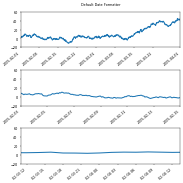

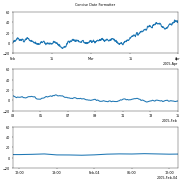

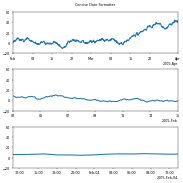

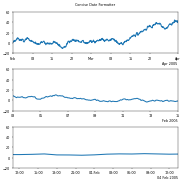

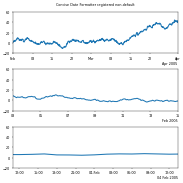

In [451]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
================================================
Formatting date ticks using ConciseDateFormatter
================================================

Finding good tick values and formatting the ticks for an axis that
has date data is often a challenge.  `~.dates.ConciseDateFormatter` is
meant to improve the strings chosen for the ticklabels, and to minimize
the strings used in those tick labels as much as possible.

.. note::

    This formatter is a candidate to become the default date tick formatter
    in future versions of Matplotlib.  Please report any issues or
    suggestions for improvement to the GitHub repository or mailing list.

"""
import datetime

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.dates as mdates

# %%
# First, the default formatter.

base = datetime.datetime(2005, 2, 1)
dates = [base + datetime.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
    # rotate_labels...
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
axs[0].set_title('Default Date Formatter')
plt.show()

# %%
# The default date formatter is quite verbose, so we have the option of
# using `~.dates.ConciseDateFormatter`, as shown below.  Note that
# for this example the labels do not need to be rotated as they do for the
# default formatter because the labels are as small as possible.

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))
for nn, ax in enumerate(axs):
    locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
axs[0].set_title('Concise Date Formatter')

plt.show()

# %%
# If all calls to axes that have dates are to be made using this converter,
# it is probably most convenient to use the units registry where you do
# imports:

import matplotlib.units as munits

converter = mdates.ConciseDateConverter()
munits.registry[np.datetime64] = converter
munits.registry[datetime.date] = converter
munits.registry[datetime.datetime] = converter

fig, axs = plt.subplots(3, 1, figsize=(6, 6), layout='constrained')
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
axs[0].set_title('Concise Date Formatter')

plt.show()

# %%
# Localization of date formats
# ============================
#
# Dates formats can be localized if the default formats are not desirable by
# manipulating one of three lists of strings.
#
# The ``formatter.formats`` list of formats is for the normal tick labels,
# There are six levels: years, months, days, hours, minutes, seconds.
# The ``formatter.offset_formats`` is how the "offset" string on the right
# of the axis is formatted.  This is usually much more verbose than the tick
# labels. Finally, the ``formatter.zero_formats`` are the formats of the
# ticks that are "zeros".  These are tick values that are either the first of
# the year, month, or day of month, or the zeroth hour, minute, or second.
# These are usually the same as the format of
# the ticks a level above.  For example if the axis limits mean the ticks are
# mostly days, then we label 1 Mar 2005 simply with a "Mar".  If the axis
# limits are mostly hours, we label Feb 4 00:00 as simply "Feb-4".
#
# Note that these format lists can also be passed to `.ConciseDateFormatter`
# as optional keyword arguments.
#
# Here we modify the labels to be "day month year", instead of the ISO
# "year month day":

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))

for nn, ax in enumerate(axs):
    locator = mdates.AutoDateLocator()
    formatter = mdates.ConciseDateFormatter(locator)
    formatter.formats = ['%y',  # ticks are mostly years
                         '%b',       # ticks are mostly months
                         '%d',       # ticks are mostly days
                         '%H:%M',    # hrs
                         '%H:%M',    # min
                         '%S.%f', ]  # secs
    # these are mostly just the level above...
    formatter.zero_formats = [''] + formatter.formats[:-1]
    # ...except for ticks that are mostly hours, then it is nice to have
    # month-day:
    formatter.zero_formats[3] = '%d-%b'

    formatter.offset_formats = ['',
                                '%Y',
                                '%b %Y',
                                '%d %b %Y',
                                '%d %b %Y',
                                '%d %b %Y %H:%M', ]
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
axs[0].set_title('Concise Date Formatter')

plt.show()

# %%
# Registering a converter with localization
# =========================================
#
# `.ConciseDateFormatter` doesn't have rcParams entries, but localization can
# be accomplished by passing keyword arguments to `.ConciseDateConverter` and
# registering the datatypes you will use with the units registry:

import datetime

formats = ['%y',          # ticks are mostly years
           '%b',     # ticks are mostly months
           '%d',     # ticks are mostly days
           '%H:%M',  # hrs
           '%H:%M',  # min
           '%S.%f', ]  # secs
# these can be the same, except offset by one level....
zero_formats = [''] + formats[:-1]
# ...except for ticks that are mostly hours, then it's nice to have month-day
zero_formats[3] = '%d-%b'
offset_formats = ['',
                  '%Y',
                  '%b %Y',
                  '%d %b %Y',
                  '%d %b %Y',
                  '%d %b %Y %H:%M', ]

converter = mdates.ConciseDateConverter(
    formats=formats, zero_formats=zero_formats, offset_formats=offset_formats)

munits.registry[np.datetime64] = converter
munits.registry[datetime.date] = converter
munits.registry[datetime.datetime] = converter

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
axs[0].set_title('Concise Date Formatter registered non-default')

plt.show()


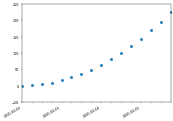

In [452]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=================
Date Demo Convert
=================

"""
import datetime

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.dates import DateFormatter, DayLocator, HourLocator, drange

date1 = datetime.datetime(2000, 3, 2)
date2 = datetime.datetime(2000, 3, 6)
delta = datetime.timedelta(hours=6)
dates = drange(date1, date2, delta)

y = np.arange(len(dates))

fig, ax = plt.subplots()
ax.plot(dates, y**2, 'o')

# this is superfluous, since the autoscaler should get it right, but
# use date2num and num2date to convert between dates and floats if
# you want; both date2num and num2date convert an instance or sequence
ax.set_xlim(dates[0], dates[-1])

# The hour locator takes the hour or sequence of hours you want to
# tick, not the base multiple

ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_minor_locator(HourLocator(range(0, 25, 6)))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

ax.fmt_xdata = DateFormatter('%Y-%m-%d %H:%M:%S')
fig.autofmt_xdate()

plt.show()


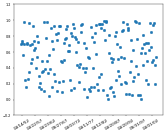

In [453]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=========================================
Placing date ticks using recurrence rules
=========================================

The `iCalender RFC`_ specifies *recurrence rules* (rrules), that define
date sequences. You can use rrules in Matplotlib to place date ticks.

This example sets custom date ticks on every 5th easter.

See https://dateutil.readthedocs.io/en/stable/rrule.html for help with rrules.

.. _iCalender RFC: https://tools.ietf.org/html/rfc5545
"""
import datetime

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.dates import (YEARLY, DateFormatter, RRuleLocator, drange,
                              rrulewrapper)

# Fixing random state for reproducibility
np.random.seed(19680801)


# tick every 5th easter
rule = rrulewrapper(YEARLY, byeaster=1, interval=5)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')
date1 = datetime.date(1952, 1, 1)
date2 = datetime.date(2004, 4, 12)
delta = datetime.timedelta(days=100)

dates = drange(date1, date2, delta)
s = np.random.rand(len(dates))  # make up some random y values


fig, ax = plt.subplots()
plt.plot(dates, s, 'o')
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)

plt.show()


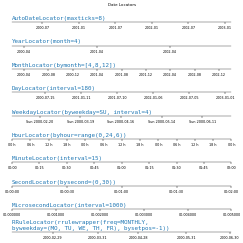

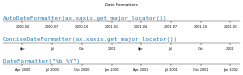

In [454]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=================================
Date tick locators and formatters
=================================

This example illustrates the usage and effect of the various date locators and
formatters.
"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.dates import (FR, MO, MONTHLY, SA, SU, TH, TU, WE,
                              AutoDateFormatter, AutoDateLocator,
                              ConciseDateFormatter, DateFormatter, DayLocator,
                              HourLocator, MicrosecondLocator, MinuteLocator,
                              MonthLocator, RRuleLocator, SecondLocator,
                              WeekdayLocator, YearLocator, rrulewrapper)
import matplotlib.ticker as ticker

locators = [
    ('AutoDateLocator(maxticks=8)', '2003-02-01', '%Y-%m'),
    ('YearLocator(month=4)', '2003-02-01', '%Y-%m'),
    ('MonthLocator(bymonth=[4,8,12])', '2003-02-01', '%Y-%m'),
    ('DayLocator(interval=180)', '2003-02-01', '%Y-%m-%d'),
    ('WeekdayLocator(byweekday=SU, interval=4)', '2000-07-01', '%a %Y-%m-%d'),
    ('HourLocator(byhour=range(0,24,6))', '2000-02-04', '%H h'),
    ('MinuteLocator(interval=15)', '2000-02-01 02:00', '%H:%M'),
    ('SecondLocator(bysecond=(0,30))', '2000-02-01 00:02', '%H:%M:%S'),
    ('MicrosecondLocator(interval=1000)', '2000-02-01 00:00:00.005', '%S.%f'),
    ('RRuleLocator(rrulewrapper(freq=MONTHLY, \nbyweekday=(MO, TU, WE, TH,' +
     ' FR), bysetpos=-1))', '2000-07-01', '%Y-%m-%d')
]

formatters = [
    ('AutoDateFormatter(ax.xaxis.get_major_locator())'),
    ('ConciseDateFormatter(ax.xaxis.get_major_locator())'),
    ('DateFormatter("%b %Y")')
]


def plot_axis(ax, locator=None, xmax='2002-02-01', fmt=None, formatter=None):
    """Set up common parameters for the Axes in the example."""
    ax.spines.right.set_visible(False)
    ax.spines.left.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.tick_params(which='major', width=1.00, length=5)
    ax.tick_params(which='minor', width=0.75, length=2.5)
    ax.set_xlim(np.datetime64('2000-02-01'), np.datetime64(xmax))
    if locator:
        ax.xaxis.set_major_locator(eval(locator))
        ax.xaxis.set_major_formatter(DateFormatter(fmt))
    else:
        ax.xaxis.set_major_formatter(eval(formatter))
    ax.text(0.0, 0.2, locator or formatter, transform=ax.transAxes,
            fontsize=14, fontname='Monospace', color='tab:blue')


fig, ax = plt.subplots(len(locators), 1, figsize=(8, len(locators) * .8),
                       layout='constrained')
fig.suptitle('Date Locators')
for i, loc in enumerate(locators):
    plot_axis(ax[i], *loc)

fig, ax = plt.subplots(len(formatters), 1, figsize=(8, len(formatters) * .8),
                       layout='constrained')
fig.suptitle('Date Formatters')
for i, fmt in enumerate(formatters):
    plot_axis(ax[i], formatter=fmt)


# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.dates.AutoDateLocator`
#    - `matplotlib.dates.YearLocator`
#    - `matplotlib.dates.MonthLocator`
#    - `matplotlib.dates.DayLocator`
#    - `matplotlib.dates.WeekdayLocator`
#    - `matplotlib.dates.HourLocator`
#    - `matplotlib.dates.MinuteLocator`
#    - `matplotlib.dates.SecondLocator`
#    - `matplotlib.dates.MicrosecondLocator`
#    - `matplotlib.dates.RRuleLocator`
#    - `matplotlib.dates.rrulewrapper`
#    - `matplotlib.dates.DateFormatter`
#    - `matplotlib.dates.AutoDateFormatter`
#    - `matplotlib.dates.ConciseDateFormatter`


In [455]:
# THIS cbook EXAMPLE WAS REMOVED

Before Roundtrip:  2000-01-01 00:10:00.000012+00:00 Matplotlib date: 730120.0069444446
After Roundtrip:   2000-01-01 00:10:00.000020+00:00
Before Roundtrip:  0010-01-01 00:10:00.000012+00:00 Matplotlib date: 3288.006944444583
After Roundtrip:   0010-01-01 00:10:00.000012+00:00
RuntimeError: set_epoch must be called before dates plotted.
Before Roundtrip:  2020-01-01 00:10:00.000012+00:00 Matplotlib date: 18262.006944444583
After Roundtrip:   2020-01-01 00:10:00.000012+00:00
Before Roundtrip:  2000-01-01T00:10:00.000012 Matplotlib date: 10957.006944444583
After Roundtrip:   2000-01-01 00:10:00.000012+00:00


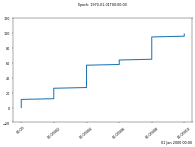

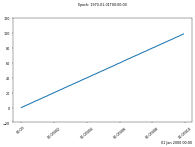

In [456]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=========================
Date Precision and Epochs
=========================

Matplotlib can handle `.datetime` objects and `numpy.datetime64` objects using
a unit converter that recognizes these dates and converts them to floating
point numbers.

Before Matplotlib 3.3, the default for this conversion returns a float that was
days since "0000-12-31T00:00:00".  As of Matplotlib 3.3, the default is
days from "1970-01-01T00:00:00".  This allows more resolution for modern
dates.  "2020-01-01" with the old epoch converted to 730120, and a 64-bit
floating point number has a resolution of 2^{-52}, or approximately
14 microseconds, so microsecond precision was lost.  With the new default
epoch "2020-01-01" is 10957.0, so the achievable resolution is 0.21
microseconds.

"""
import datetime

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.dates as mdates


def _reset_epoch_for_tutorial():
    """
    Users (and downstream libraries) should not use the private method of
    resetting the epoch.
    """
    mdates._reset_epoch_test_example()


# %%
# Datetime
# --------
#
# Python `.datetime` objects have microsecond resolution, so with the
# old default matplotlib dates could not round-trip full-resolution datetime
# objects.

old_epoch = '0000-12-31T00:00:00'
new_epoch = '1970-01-01T00:00:00'

_reset_epoch_for_tutorial()  # Don't do this.  Just for this tutorial.
mdates.set_epoch(old_epoch)  # old epoch (pre MPL 3.3)

date1 = datetime.datetime(2000, 1, 1, 0, 10, 0, 12,
                          tzinfo=datetime.timezone.utc)
mdate1 = mdates.date2num(date1)
print('Before Roundtrip: ', date1, 'Matplotlib date:', mdate1)
date2 = mdates.num2date(mdate1)
print('After Roundtrip:  ', date2)

# %%
# Note this is only a round-off error, and there is no problem for
# dates closer to the old epoch:

date1 = datetime.datetime(10, 1, 1, 0, 10, 0, 12,
                          tzinfo=datetime.timezone.utc)
mdate1 = mdates.date2num(date1)
print('Before Roundtrip: ', date1, 'Matplotlib date:', mdate1)
date2 = mdates.num2date(mdate1)
print('After Roundtrip:  ', date2)

# %%
# If a user wants to use modern dates at microsecond precision, they
# can change the epoch using `.set_epoch`.  However, the epoch has to be
# set before any date operations to prevent confusion between different
# epochs. Trying to change the epoch later will raise a `RuntimeError`.

try:
    mdates.set_epoch(new_epoch)  # this is the new MPL 3.3 default.
except RuntimeError as e:
    print('RuntimeError:', str(e))

# %%
# For this tutorial, we reset the sentinel using a private method, but users
# should just set the epoch once, if at all.

_reset_epoch_for_tutorial()  # Just being done for this tutorial.
mdates.set_epoch(new_epoch)

date1 = datetime.datetime(2020, 1, 1, 0, 10, 0, 12,
                          tzinfo=datetime.timezone.utc)
mdate1 = mdates.date2num(date1)
print('Before Roundtrip: ', date1, 'Matplotlib date:', mdate1)
date2 = mdates.num2date(mdate1)
print('After Roundtrip:  ', date2)

# %%
# datetime64
# ----------
#
# `numpy.datetime64` objects have microsecond precision for a much larger
# timespace than `.datetime` objects.  However, currently Matplotlib time is
# only converted back to datetime objects, which have microsecond resolution,
# and years that only span 0000 to 9999.

_reset_epoch_for_tutorial()  # Don't do this.  Just for this tutorial.
mdates.set_epoch(new_epoch)

date1 = np.datetime64('2000-01-01T00:10:00.000012')
mdate1 = mdates.date2num(date1)
print('Before Roundtrip: ', date1, 'Matplotlib date:', mdate1)
date2 = mdates.num2date(mdate1)
print('After Roundtrip:  ', date2)

# %%
# Plotting
# --------
#
# This all of course has an effect on plotting.  With the old default epoch
# the times were rounded during the internal ``date2num`` conversion, leading
# to jumps in the data:

_reset_epoch_for_tutorial()  # Don't do this.  Just for this tutorial.
mdates.set_epoch(old_epoch)

x = np.arange('2000-01-01T00:00:00.0', '2000-01-01T00:00:00.000100',
              dtype='datetime64[us]')
# simulate the plot being made using the old epoch
xold = np.array([mdates.num2date(mdates.date2num(d)) for d in x])
y = np.arange(0, len(x))

# resetting the Epoch so plots are comparable
_reset_epoch_for_tutorial()  # Don't do this.  Just for this tutorial.
mdates.set_epoch(new_epoch)

fig, ax = plt.subplots(layout='constrained')
ax.plot(xold, y)
ax.set_title('Epoch: ' + mdates.get_epoch())
ax.xaxis.set_tick_params(rotation=40)
plt.show()

# %%
# For dates plotted using the more recent epoch, the plot is smooth:

fig, ax = plt.subplots(layout='constrained')
ax.plot(x, y)
ax.set_title('Epoch: ' + mdates.get_epoch())
ax.xaxis.set_tick_params(rotation=40)
plt.show()

_reset_epoch_for_tutorial()  # Don't do this.  Just for this tutorial.

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.dates.num2date`
#    - `matplotlib.dates.date2num`
#    - `matplotlib.dates.set_epoch`


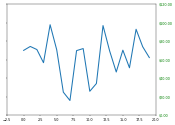

In [457]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
============
Dollar ticks
============

Use a `~.ticker.FormatStrFormatter` to prepend dollar signs on y-axis labels.

.. redirect-from:: /gallery/pyplots/dollar_ticks
"""
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()
ax.plot(100*np.random.rand(20))

# Use automatic StrMethodFormatter
ax.yaxis.set_major_formatter('${x:1.2f}')

ax.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=False, labelright=True)

plt.show()


# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.pyplot.subplots`
#    - `matplotlib.axis.Axis.set_major_formatter`
#    - `matplotlib.axis.Axis.set_tick_params`
#    - `matplotlib.axis.Tick`
#    - `matplotlib.ticker.StrMethodFormatter`


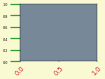

In [458]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=========================
Fig Axes Customize Simple
=========================

Customize the background, labels and ticks of a simple plot.

.. redirect-from:: /gallery/pyplots/fig_axes_customize_simple
"""

import matplotlib.pyplot as plt

# %%
# `.pyplot.figure` creates a `matplotlib.figure.Figure` instance.

fig = plt.figure()
rect = fig.patch  # a rectangle instance
rect.set_facecolor('lightgoldenrodyellow')

ax1 = fig.add_axes([0.1, 0.3, 0.4, 0.4])
rect = ax1.patch
rect.set_facecolor('lightslategray')

ax1.tick_params(axis='x', labelcolor='tab:red', labelrotation=45, labelsize=16)
ax1.tick_params(axis='y', color='tab:green', size=25, width=3)

plt.show()

# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.axis.Axis.get_ticklabels`
#    - `matplotlib.axis.Axis.get_ticklines`
#    - `matplotlib.text.Text.set_rotation`
#    - `matplotlib.text.Text.set_fontsize`
#    - `matplotlib.text.Text.set_color`
#    - `matplotlib.lines.Line2D`
#    - `matplotlib.lines.Line2D.set_markeredgecolor`
#    - `matplotlib.lines.Line2D.set_markersize`
#    - `matplotlib.lines.Line2D.set_markeredgewidth`
#    - `matplotlib.patches.Patch.set_facecolor`


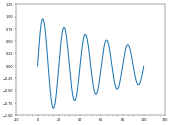

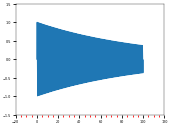

In [459]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
r"""
=====================
Major and minor ticks
=====================

Demonstrate how to use major and minor tickers.

The two relevant classes are `.Locator`\s and `.Formatter`\s.  Locators
determine where the ticks are, and formatters control the formatting of tick
labels.

Minor ticks are off by default (using `.NullLocator` and `.NullFormatter`).
Minor ticks can be turned on without labels by setting the minor locator.
Minor tick labels can be turned on by setting the minor formatter.

`.MultipleLocator` places ticks on multiples of some base.
`.StrMethodFormatter` uses a format string (e.g., ``'{x:d}'`` or ``'{x:1.2f}'``
or ``'{x:1.1f} cm'``) to format the tick labels (the variable in the format
string must be ``'x'``).  For a `.StrMethodFormatter`, the string can be passed
directly to `.Axis.set_major_formatter` or
`.Axis.set_minor_formatter`.  An appropriate `.StrMethodFormatter` will
be created and used automatically.

`.pyplot.grid` changes the grid settings of the major ticks of the x- and
y-axis together.  If you want to control the grid of the minor ticks for a
given axis, use for example ::

  ax.xaxis.grid(True, which='minor')

Note that a given locator or formatter instance can only be used on a single
axis (because the locator stores references to the axis data and view limits).
"""

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.ticker import AutoMinorLocator, MultipleLocator

t = np.arange(0.0, 100.0, 0.1)
s = np.sin(0.1 * np.pi * t) * np.exp(-t * 0.01)

fig, ax = plt.subplots()
ax.plot(t, s)

# Make a plot with major ticks that are multiples of 20 and minor ticks that
# are multiples of 5.  Label major ticks with '.0f' formatting but don't label
# minor ticks.  The string is used directly, the `StrMethodFormatter` is
# created automatically.
ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_major_formatter('{x:.0f}')

# For the minor ticks, use no labels; default NullFormatter.
ax.xaxis.set_minor_locator(MultipleLocator(5))

plt.show()

# %%
# Automatic tick selection for major and minor ticks.
#
# Use interactive pan and zoom to see how the tick intervals change. There will
# be either 4 or 5 minor tick intervals per major interval, depending on the
# major interval.
#
# One can supply an argument to `.AutoMinorLocator` to specify a fixed number
# of minor intervals per major interval, e.g. ``AutoMinorLocator(2)`` would
# lead to a single minor tick between major ticks.

t = np.arange(0.0, 100.0, 0.01)
s = np.sin(2 * np.pi * t) * np.exp(-t * 0.01)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4, color='r')

plt.show()


# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.pyplot.subplots`
#    - `matplotlib.axis.Axis.set_major_formatter`
#    - `matplotlib.axis.Axis.set_major_locator`
#    - `matplotlib.axis.Axis.set_minor_locator`
#    - `matplotlib.ticker.AutoMinorLocator`
#    - `matplotlib.ticker.MultipleLocator`
#    - `matplotlib.ticker.StrMethodFormatter`


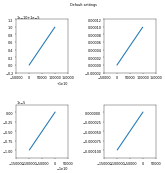

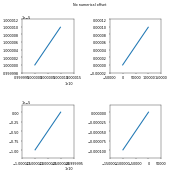

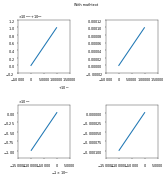

In [460]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==========================
The default tick formatter
==========================

The example shows use of the default `.ScalarFormatter` with different
settings.

Example 1 : Default

Example 2 : With no Numerical Offset

Example 3 : With Mathtext
"""

import matplotlib.pyplot as plt
import numpy as np

# %%
# Example 1

x = np.arange(0, 1, .01)
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(6, 6))
fig.text(0.5, 0.975, 'Default settings',
         horizontalalignment='center',
         verticalalignment='top')

ax1.plot(x * 1e5 + 1e10, x * 1e-10 + 1e-5)

ax2.plot(x * 1e5, x * 1e-4)

ax3.plot(-x * 1e5 - 1e10, -x * 1e-5 - 1e-10)

ax4.plot(-x * 1e5, -x * 1e-4)

fig.subplots_adjust(wspace=0.7, hspace=0.6)

# %%
# Example 2

x = np.arange(0, 1, .01)
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(6, 6))
fig.text(0.5, 0.975, 'No numerical offset',
         horizontalalignment='center',
         verticalalignment='top')

ax1.plot(x * 1e5 + 1e10, x * 1e-10 + 1e-5)
ax1.ticklabel_format(useOffset=False)

ax2.plot(x * 1e5, x * 1e-4)
ax2.ticklabel_format(useOffset=False)

ax3.plot(-x * 1e5 - 1e10, -x * 1e-5 - 1e-10)
ax3.ticklabel_format(useOffset=False)

ax4.plot(-x * 1e5, -x * 1e-4)
ax4.ticklabel_format(useOffset=False)

fig.subplots_adjust(wspace=0.7, hspace=0.6)

# %%
# Example 3

x = np.arange(0, 1, .01)
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(6, 6))
fig.text(0.5, 0.975, 'With mathtext',
         horizontalalignment='center',
         verticalalignment='top')

ax1.plot(x * 1e5 + 1e10, x * 1e-10 + 1e-5)
ax1.ticklabel_format(useMathText=True)

ax2.plot(x * 1e5, x * 1e-4)
ax2.ticklabel_format(useMathText=True)

ax3.plot(-x * 1e5 - 1e10, -x * 1e-5 - 1e-10)
ax3.ticklabel_format(useMathText=True)

ax4.plot(-x * 1e5, -x * 1e-4)
ax4.ticklabel_format(useMathText=True)

fig.subplots_adjust(wspace=0.7, hspace=0.6)

plt.show()


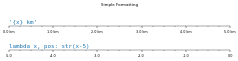

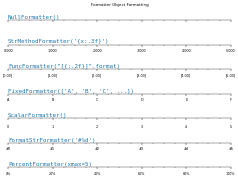

In [461]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===============
Tick formatters
===============

Tick formatters define how the numeric value associated with a tick on an axis
is formatted as a string.

This example illustrates the usage and effect of the most common formatters.

"""

import matplotlib.pyplot as plt

from matplotlib import ticker


def setup(ax, title):
    """Set up common parameters for the Axes in the example."""
    # only show the bottom spine
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines[['left', 'right', 'top']].set_visible(False)

    # define tick positions
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))

    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00, length=5)
    ax.tick_params(which='minor', width=0.75, length=2.5, labelsize=10)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    ax.text(0.0, 0.2, title, transform=ax.transAxes,
            fontsize=14, fontname='Monospace', color='tab:blue')


# %%
# Tick formatters can be set in one of two ways, either by passing a ``str``
# or function to `~.Axis.set_major_formatter` or `~.Axis.set_minor_formatter`,
# or by creating an instance of one of the various `~.ticker.Formatter` classes
# and providing that to `~.Axis.set_major_formatter` or
# `~.Axis.set_minor_formatter`.
#
# The first two examples directly pass a ``str`` or function.

fig0, axs0 = plt.subplots(2, 1, figsize=(8, 2))
fig0.suptitle('Simple Formatting')

# A ``str``, using format string function syntax, can be used directly as a
# formatter.  The variable ``x`` is the tick value and the variable ``pos`` is
# tick position.  This creates a StrMethodFormatter automatically.
setup(axs0[0], title="'{x} km'")
axs0[0].xaxis.set_major_formatter('{x} km')

# A function can also be used directly as a formatter. The function must take
# two arguments: ``x`` for the tick value and ``pos`` for the tick position,
# and must return a ``str``. This creates a FuncFormatter automatically.
setup(axs0[1], title="lambda x, pos: str(x-5)")
axs0[1].xaxis.set_major_formatter(lambda x, pos: str(x-5))

fig0.tight_layout()


# %%
# The remaining examples use `.Formatter` objects.

fig1, axs1 = plt.subplots(7, 1, figsize=(8, 6))
fig1.suptitle('Formatter Object Formatting')

# Null formatter
setup(axs1[0], title="NullFormatter()")
axs1[0].xaxis.set_major_formatter(ticker.NullFormatter())

# StrMethod formatter
setup(axs1[1], title="StrMethodFormatter('{x:.3f}')")
axs1[1].xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.3f}"))


# FuncFormatter can be used as a decorator
@ticker.FuncFormatter
def major_formatter(x, pos):
    return f'[{x:.2f}]'


setup(axs1[2], title='FuncFormatter("[{:.2f}]".format)')
axs1[2].xaxis.set_major_formatter(major_formatter)

# Fixed formatter
setup(axs1[3], title="FixedFormatter(['A', 'B', 'C', ...])")
# FixedFormatter should only be used together with FixedLocator.
# Otherwise, one cannot be sure where the labels will end up.
positions = [0, 1, 2, 3, 4, 5]
labels = ['A', 'B', 'C', 'D', 'E', 'F']
axs1[3].xaxis.set_major_locator(ticker.FixedLocator(positions))
axs1[3].xaxis.set_major_formatter(ticker.FixedFormatter(labels))

# Scalar formatter
setup(axs1[4], title="ScalarFormatter()")
axs1[4].xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

# FormatStr formatter
setup(axs1[5], title="FormatStrFormatter('#%d')")
axs1[5].xaxis.set_major_formatter(ticker.FormatStrFormatter("#%d"))

# Percent formatter
setup(axs1[6], title="PercentFormatter(xmax=5)")
axs1[6].xaxis.set_major_formatter(ticker.PercentFormatter(xmax=5))

fig1.tight_layout()
plt.show()


# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.pyplot.subplots`
#    - `matplotlib.axes.Axes.text`
#    - `matplotlib.axis.Axis.set_major_formatter`
#    - `matplotlib.axis.Axis.set_major_locator`
#    - `matplotlib.axis.Axis.set_minor_locator`
#    - `matplotlib.axis.XAxis.set_ticks_position`
#    - `matplotlib.axis.YAxis.set_ticks_position`
#    - `matplotlib.ticker.FixedFormatter`
#    - `matplotlib.ticker.FixedLocator`
#    - `matplotlib.ticker.FormatStrFormatter`
#    - `matplotlib.ticker.FuncFormatter`
#    - `matplotlib.ticker.MultipleLocator`
#    - `matplotlib.ticker.NullFormatter`
#    - `matplotlib.ticker.NullLocator`
#    - `matplotlib.ticker.PercentFormatter`
#    - `matplotlib.ticker.ScalarFormatter`
#    - `matplotlib.ticker.StrMethodFormatter`


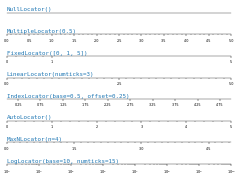

In [462]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=============
Tick locators
=============

Tick locators define the position of the ticks.

This example illustrates the usage and effect of the most common locators.
"""

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.ticker as ticker


def setup(ax, title):
    """Set up common parameters for the Axes in the example."""
    # only show the bottom spine
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines[['left', 'right', 'top']].set_visible(False)

    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00, length=5)
    ax.tick_params(which='minor', width=0.75, length=2.5)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    ax.text(0.0, 0.2, title, transform=ax.transAxes,
            fontsize=14, fontname='Monospace', color='tab:blue')


fig, axs = plt.subplots(8, 1, figsize=(8, 6))

# Null Locator
setup(axs[0], title="NullLocator()")
axs[0].xaxis.set_major_locator(ticker.NullLocator())
axs[0].xaxis.set_minor_locator(ticker.NullLocator())

# Multiple Locator
setup(axs[1], title="MultipleLocator(0.5)")
axs[1].xaxis.set_major_locator(ticker.MultipleLocator(0.5))
axs[1].xaxis.set_minor_locator(ticker.MultipleLocator(0.1))

# Fixed Locator
setup(axs[2], title="FixedLocator([0, 1, 5])")
axs[2].xaxis.set_major_locator(ticker.FixedLocator([0, 1, 5]))
axs[2].xaxis.set_minor_locator(ticker.FixedLocator(np.linspace(0.2, 0.8, 4)))

# Linear Locator
setup(axs[3], title="LinearLocator(numticks=3)")
axs[3].xaxis.set_major_locator(ticker.LinearLocator(3))
axs[3].xaxis.set_minor_locator(ticker.LinearLocator(31))

# Index Locator
setup(axs[4], title="IndexLocator(base=0.5, offset=0.25)")
axs[4].plot(range(0, 5), [0]*5, color='white')
axs[4].xaxis.set_major_locator(ticker.IndexLocator(base=0.5, offset=0.25))

# Auto Locator
setup(axs[5], title="AutoLocator()")
axs[5].xaxis.set_major_locator(ticker.AutoLocator())
axs[5].xaxis.set_minor_locator(ticker.AutoMinorLocator())

# MaxN Locator
setup(axs[6], title="MaxNLocator(n=4)")
axs[6].xaxis.set_major_locator(ticker.MaxNLocator(4))
axs[6].xaxis.set_minor_locator(ticker.MaxNLocator(40))

# Log Locator
setup(axs[7], title="LogLocator(base=10, numticks=15)")
axs[7].set_xlim(10**3, 10**10)
axs[7].set_xscale('log')
axs[7].xaxis.set_major_locator(ticker.LogLocator(base=10, numticks=15))

plt.tight_layout()
plt.show()

# %%
#
# .. admonition:: References
#
#    The following functions, methods, classes and modules are used in this example:
#
#    - `matplotlib.axis.Axis.set_major_locator`
#    - `matplotlib.axis.Axis.set_minor_locator`
#    - `matplotlib.ticker.NullLocator`
#    - `matplotlib.ticker.MultipleLocator`
#    - `matplotlib.ticker.FixedLocator`
#    - `matplotlib.ticker.LinearLocator`
#    - `matplotlib.ticker.IndexLocator`
#    - `matplotlib.ticker.AutoLocator`
#    - `matplotlib.ticker.MaxNLocator`
#    - `matplotlib.ticker.LogLocator`


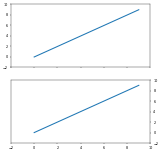

In [463]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
============================================
Set default y-axis tick labels on the right
============================================

We can use :rc:`ytick.labelright`, :rc:`ytick.right`, :rc:`ytick.labelleft`,
and :rc:`ytick.left` to control where on the axes ticks and their labels
appear. These properties can also be set in ``.matplotlib/matplotlibrc``.

"""
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = True
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False

x = np.arange(10)

fig, (ax0, ax1) = plt.subplots(2, 1, sharex=True, figsize=(6, 6))

ax0.plot(x)
ax0.yaxis.tick_left()

# use default parameter in rcParams, not calling tick_right()
ax1.plot(x)

plt.show()


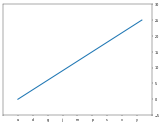

In [464]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=========================================
Setting tick labels from a list of values
=========================================

Using `.Axes.set_xticks` causes the tick labels to be set on the currently
chosen ticks. However, you may want to allow matplotlib to dynamically
choose the number of ticks and their spacing.

In this case it may be better to determine the tick label from the
value at the tick. The following example shows how to do this.

NB: The `.ticker.MaxNLocator` is used here to ensure that the tick values
take integer values.

"""

import matplotlib.pyplot as plt

from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()
xs = range(26)
ys = range(26)
labels = list('abcdefghijklmnopqrstuvwxyz')


def format_fn(tick_val, tick_pos):
    if int(tick_val) in xs:
        return labels[int(tick_val)]
    else:
        return ''


# A FuncFormatter is created automatically.
ax.xaxis.set_major_formatter(format_fn)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(xs, ys)
plt.show()


# %%
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.pyplot.subplots`
#    - `matplotlib.axis.Axis.set_major_formatter`
#    - `matplotlib.axis.Axis.set_major_locator`
#    - `matplotlib.ticker.FuncFormatter`
#    - `matplotlib.ticker.MaxNLocator`


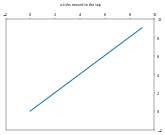

In [465]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
==================================
Move x-axis tick labels to the top
==================================

`~.axes.Axes.tick_params` can be used to configure the ticks. *top* and
*labeltop* control the visibility tick lines and labels at the top x-axis.
To move x-axis ticks from bottom to top, we have to activate the top ticks
and deactivate the bottom ticks::

    ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

.. note::

    If the change should be made for all future plots and not only the current
    Axes, you can adapt the respective config parameters

    - :rc:`xtick.top`
    - :rc:`xtick.labeltop`
    - :rc:`xtick.bottom`
    - :rc:`xtick.labelbottom`

"""

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(range(10))
ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.set_title('x-ticks moved to the top')

plt.show()


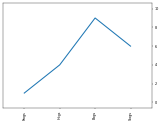

In [466]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
===========================
Rotating custom tick labels
===========================

Demo of custom tick-labels with user-defined rotation.
"""
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [1, 4, 9, 6]
labels = ['Frogs', 'Hogs', 'Bogs', 'Slogs']

plt.plot(x, y)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()


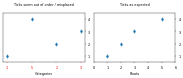

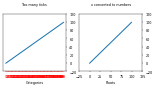

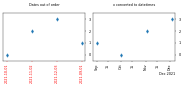

In [467]:
%%capture_png -p Example.png --celltype Normal --style "width:120px"
"""
=====================
Fixing too many ticks
=====================

One common cause for unexpected tick behavior is passing a list of strings
instead of numbers or datetime objects. This can easily happen without notice
when reading in a comma-delimited text file. Matplotlib treats lists of strings
as *categorical* variables
(:doc:`/gallery/lines_bars_and_markers/categorical_variables`), and by default
puts one tick per category, and plots them in the order in which they are
supplied.  If this is not desired, the solution is to convert the strings to
a numeric type as in the following examples.

"""

# %%
# Example 1: Strings can lead to an unexpected order of number ticks
# ------------------------------------------------------------------

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(6, 2.5))
x = ['1', '5', '2', '3']
y = [1, 4, 2, 3]
ax[0].plot(x, y, 'd')
ax[0].tick_params(axis='x', color='r', labelcolor='r')
ax[0].set_xlabel('Categories')
ax[0].set_title('Ticks seem out of order / misplaced')

# convert to numbers:
x = np.asarray(x, dtype='float')
ax[1].plot(x, y, 'd')
ax[1].set_xlabel('Floats')
ax[1].set_title('Ticks as expected')

# %%
# Example 2: Strings can lead to very many ticks
# ----------------------------------------------
# If *x* has 100 elements, all strings, then we would have 100 (unreadable)
# ticks, and again the solution is to convert the strings to floats:

fig, ax = plt.subplots(1, 2, figsize=(6, 2.5))
x = [f'{xx}' for xx in np.arange(100)]
y = np.arange(100)
ax[0].plot(x, y)
ax[0].tick_params(axis='x', color='r', labelcolor='r')
ax[0].set_title('Too many ticks')
ax[0].set_xlabel('Categories')

ax[1].plot(np.asarray(x, float), y)
ax[1].set_title('x converted to numbers')
ax[1].set_xlabel('Floats')

# %%
# Example 3: Strings can lead to an unexpected order of datetime ticks
# --------------------------------------------------------------------
# A common case is when dates are read from a CSV file, they need to be
# converted from strings to datetime objects to get the proper date locators
# and formatters.

fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(6, 2.75))
x = ['2021-10-01', '2021-11-02', '2021-12-03', '2021-09-01']
y = [0, 2, 3, 1]
ax[0].plot(x, y, 'd')
ax[0].tick_params(axis='x', labelrotation=90, color='r', labelcolor='r')
ax[0].set_title('Dates out of order')

# convert to datetime64
x = np.asarray(x, dtype='datetime64[s]')
ax[1].plot(x, y, 'd')
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set_title('x converted to datetimes')

plt.show()


In [468]:
ChapterConfig.set_chapter_name("22units")

In [469]:
# 22units THIS Chapter WAS REMOVED

In [470]:
# 22units THIS Chapter WAS REMOVED

In [471]:
# 22units THIS Chapter WAS REMOVED

In [472]:
# 22units THIS Chapter WAS REMOVED

In [473]:
# 22units THIS Chapter WAS REMOVED

In [474]:
# 22units THIS Chapter WAS REMOVED

In [475]:
# 22units THIS Chapter WAS REMOVED

In [476]:
# 22units THIS Chapter WAS REMOVED

In [477]:
# 22units THIS Chapter WAS REMOVED

In [478]:
# 22units THIS Chapter WAS REMOVED

In [479]:
ChapterConfig.set_chapter_name("23user_interfaces")

In [480]:
# 23user_interfaces THIS Chapter WAS REMOVED

In [481]:
# 23user_interfaces THIS Chapter WAS REMOVED

In [482]:
# 23user_interfaces THIS Chapter WAS REMOVED

In [483]:
# 23user_interfaces THIS Chapter WAS REMOVED

In [484]:
# 23user_interfaces THIS Chapter WAS REMOVED

In [485]:
# 23user_interfaces THIS Chapter WAS REMOVED

In [486]:
# 23user_interfaces THIS Chapter WAS REMOVED

In [487]:
# 23user_interfaces THIS Chapter WAS REMOVED

In [488]:
# 23user_interfaces THIS Chapter WAS REMOVED

In [489]:
# 23user_interfaces THIS Chapter WAS REMOVED

In [490]:
# 23user_interfaces THIS Chapter WAS REMOVED

In [491]:
# 23user_interfaces THIS Chapter WAS REMOVED

In [492]:
# 23user_interfaces THIS Chapter WAS REMOVED

In [493]:
# 23user_interfaces THIS Chapter WAS REMOVED

In [494]:
# 23user_interfaces THIS Chapter WAS REMOVED

In [495]:
# 23user_interfaces THIS Chapter WAS REMOVED

In [496]:
# 23user_interfaces THIS Chapter WAS REMOVED

In [497]:
# 23user_interfaces THIS Chapter WAS REMOVED

In [498]:
# 23user_interfaces THIS Chapter WAS REMOVED

In [499]:
# 23user_interfaces THIS Chapter WAS REMOVED

In [500]:
# 23user_interfaces THIS Chapter WAS REMOVED

In [501]:
# 23user_interfaces THIS Chapter WAS REMOVED

In [502]:
# 23user_interfaces THIS Chapter WAS REMOVED

In [503]:
# 23user_interfaces THIS Chapter WAS REMOVED

In [504]:
# 23user_interfaces THIS Chapter WAS REMOVED

In [505]:
ChapterConfig.set_chapter_name("24widgets")

In [506]:
# 24widgets THIS Chapter WAS REMOVED

In [507]:
# 24widgets THIS Chapter WAS REMOVED

In [508]:
# 24widgets THIS Chapter WAS REMOVED

In [509]:
# 24widgets THIS Chapter WAS REMOVED

In [510]:
# 24widgets THIS Chapter WAS REMOVED

In [511]:
# 24widgets THIS Chapter WAS REMOVED

In [512]:
# 24widgets THIS Chapter WAS REMOVED

In [513]:
# 24widgets THIS Chapter WAS REMOVED

In [514]:
# 24widgets THIS Chapter WAS REMOVED

In [515]:
# 24widgets THIS Chapter WAS REMOVED

In [516]:
# 24widgets THIS Chapter WAS REMOVED

In [517]:
# 24widgets THIS Chapter WAS REMOVED

In [518]:
# 24widgets THIS Chapter WAS REMOVED

In [519]:
# 24widgets THIS Chapter WAS REMOVED

In [520]:
# 24widgets THIS Chapter WAS REMOVED

In [521]:
# 24widgets THIS Chapter WAS REMOVED

In [522]:
# 24widgets THIS Chapter WAS REMOVED

In [523]:
ChapterConfig.set_chapter_name("25userdemo")

In [524]:
# 25userdemo THIS Chapter WAS REMOVED

In [525]:
# 25userdemo THIS Chapter WAS REMOVED

In [526]:
# 25userdemo THIS Chapter WAS REMOVED

In [527]:
# 25userdemo THIS Chapter WAS REMOVED

In [528]:
# 25userdemo THIS Chapter WAS REMOVED

In [529]:
# 25userdemo THIS Chapter WAS REMOVED

In [530]:
# 25userdemo THIS Chapter WAS REMOVED

In [531]:
# 25userdemo THIS Chapter WAS REMOVED

In [532]:
# 25userdemo THIS Chapter WAS REMOVED

In [533]:
# 25userdemo THIS Chapter WAS REMOVED

In [534]:
# 25userdemo THIS Chapter WAS REMOVED

In [535]:
# 25userdemo THIS Chapter WAS REMOVED

In [536]:
# 25userdemo THIS Chapter WAS REMOVED

In [537]:
# 25userdemo THIS Chapter WAS REMOVED

In [538]:
# 25userdemo THIS Chapter WAS REMOVED